# Correlation and Timeline Analysis
<hr>
<i><font size="2">Fabio Annovazzi - All rights reserved

## How to use
<hr>
<br>
1. This notebook runs better on a Chrome browser. If it has opened under another default browser such as Internet Explorer, copy the content of the IE address bar and paste it into a new Chrome tab.
<br><img src="https://www.dropbox.com/s/kbjaaxmn0zxm7ky/Internet_Explorer.png?dl=1", width="40%", style="align:left"><br>
<br><img src="https://www.dropbox.com/s/ypk760r3qx8uxl3/chrome.png?dl=1", width="40%", style="align:left"><br>
2. Click "<i>Cell</i>" and then "<i>Run All</i>" above
<br><img src="https://www.dropbox.com/s/ts6dioas6itko47/run_all.png?dl=1", width="10%", style="align:left"><br>
3. Wait until the notebook has finished securely loading the most recent files. It will show the date up to when the data is updated. When it is done, the black dot on the upper right will turn back to white
<br><img src="https://www.dropbox.com/s/45ymb7zm63v8yeo/loading.png?dl=1", width="30%", style="align:left">
<br><img src="https://www.dropbox.com/s/asif8kfj76vscz9/working.png?dl=1", width="40%", style="align:left"><br>
4. Go to the <i>Menu Section</i> below and select chart options


In [268]:
# -*- coding: utf-8 -*-
import sys
import csv
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import collections
import datetime
import ast
import copy
from ipywidgets import *
from IPython.display import Javascript
from IPython.display import display
from IPython.display import HTML
try:
    from mizani.breaks import date_breaks
    from mizani.formatters import date_format
except:
    !pip install mizani
    from mizani.breaks import date_breaks
    from mizani.formatters import date_format        
try:
    from plotnine import *
except:
    !pip install plotnine
    from plotnine import *
    display(HTML('<p style="font-size:15px">successfully installed plotnine module</p>'))  
try:
    
    from bqplot import (
    Axis,Bars,CATEGORY10,ColorAxis, ColorScale,DateScale,
    DateColorScale,Figure,FlexLine,GridHeatMap,HeatMap,Label,
    Lines,LinearScale,LogScale,OrdinalColorScale,OrdinalScale,
    Scatter,Toolbar,Tooltip
)
    from bqplot.interacts import (
    BrushIntervalSelector,BrushSelector,
    FastIntervalSelector,IndexSelector,MultiSelector,PanZoom,
)
except:
    !pip install bqplot
    from bqplot import (
    Axis,Bars,CATEGORY10,ColorAxis, ColorScale,DateScale,
    DateColorScale,Figure,FlexLine,GridHeatMap,HeatMap,Label,
    Lines,LinearScale,LogScale,OrdinalColorScale,OrdinalScale,
    Scatter,Toolbar,Tooltip
)
    from bqplot.interacts import (
    BrushIntervalSelector,BrushSelector,
    FastIntervalSelector,IndexSelector,MultiSelector,PanZoom,
)    
    display(HTML('<p style="font-size:15px">successfully installed bqplot module</p>'))      
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.stats.stats import pearsonr
from scipy.stats import probplot
plt.rcParams.update({'figure.max_open_warning': 0})
%matplotlib inline
import urllib.request

In [269]:
def get_market_and_category():
    datasetDict={
                0:"small",
                1:"UK_Coloring",
                2:"Mexico_Coloring_Scan",
                3:"Mexico_Coloring_Scan_top_cities",
                4:"Mexico_Coloring_Retail",
                5:"Saudi_Coloring",
                6:"US_Coloring",
                7:"UK_Styling",
                8:"UK_Coloring_No_Retailers",        
                9:"UK_Styling_No_Retailers",
                10:"UK_Styling_Qty_Units",
        
                }
    marketAndCategory=datasetDict[0]
    return marketAndCategory



def get_file_params():
    """ creates dictionary with file parameters
    """    
    marketAndCategory=get_market_and_category()
    fileParams={
            "dropboxLink":"https://www.dropbox.com/s/",
            "dropboxSuffix":"?dl=1",
            "dropboxCode":{
                "small":
                        {
                        "dataFile":"kgohv1daucc3lc1", 
                        "mostRecentData":"5zbfc8kbnwyn4ps", 
                          },                  
                "UK_Coloring":
                        {
                        "dataFile":"", 
                        "mostRecentData":"9qb9lhhg6qm9ygg"   
                          }, 
                "Mexico_Coloring_Scan":
                        {
                        "dataFile":"", 
                        "mostRecentData":"jzpf3f8cug36y82",  
                          },                 
            "Mexico_Coloring_Scan_top_cities":
                        {
                       "dataFile":"",  
                        "mostRecentData":"twp6it6pjvbwfzm",  
                          },             
                "Mexico_Coloring_Retail":
                        {
                            "dataFile":"", 
                        "mostRecentData":"bq63ld1atgbqxuf",   
                          },  
                "Saudi_Coloring":
                        {
                            "dataFile":"", 
                        "mostRecentData":"v80m4ior0mlqlv4",   
                          },  
                "US_Coloring":
                        {
                             "dataFile":"", 
                             "mostRecentData":"wws9727ykmzxdx7",
                          }, 
                "UK_Styling":
                        {
                            "dataFile":"", 
                        "mostRecentData":"",   
                          },     
                "UK_Coloring_No_Retailers":
                        {
                        "dataFile":"", 
                        "mostRecentData":"18oi9wgsbew14p0", 
                          }, 
                "UK_Styling_No_Retailers":
                        {
                            "dataFile":"", 
                        "mostRecentData":"3xh0n8ljfxt8ccj",   
                          },
                "UK_Styling_Qty_Units":
                        {
                            "dataFile":"", 
                        "mostRecentData":"7ux4y3r1x57ach4",   
                          },                
                          },
            "batchPlotFileName":"batch_plot",
            "batchPlotSheetName":"toPlot",  
            "mostRecentDataFileName":"most_recent_period",
            "mostRecentDataFileNameLocal":"most_recent_period_pricing",
            "numberOfWeekDataPeriods":
                    { 
                    "small":100,    
                    "UK_Coloring":66, 
                    "Mexico_Coloring_Scan":105,    
                    "Mexico_Coloring_Scan_top_cities":105,
                    "Mexico_Coloring_Retail":37,
                    "Saudi_Coloring":36,
                     "US_Coloring":156,     
                    "UK_Styling":66,
                    "UK_Coloring_No_Retailers":104,                  
                    "UK_Styling_No_Retailers":104,  
                    "UK_Styling_Qty_Units":104,      
                    },     
            "filterMostRecentWeeks":
                    {         
                    "small":False,      
                    "UK_Coloring":True, 
                    "Mexico_Coloring_Scan":False,
                    "Mexico_Coloring_Scan_top_cities":False,
                    "Mexico_Coloring_Retail":False,
                    "Saudi_Coloring":False,
                    "US_Coloring":False,  
                    "UK_Styling":False,
                    "UK_Coloring_No_Retailers":False,  
                    "UK_Styling_No_Retailers":False, 
                     "UK_Styling_Qty_Units":False,    
                    },     
            "directory":"tidy_data",
            "fileName":
                    {     
                    "small":"small",    
                    "UK_Coloring":"Value_Units_Retailers_Shades_coloring",
                    "Mexico_Coloring_Scan":"MexicoScan_coloring",    
                    "Mexico_Coloring_Scan_top_cities":"MexicoScan_top_cities_coloring",
                    "Mexico_Coloring_Retail":"MexicoRetail_coloring",
                    "Saudi_Coloring":"SaudiRetail_coloring",
                     "US_Coloring":"US-TotalCountry-Months_coloring",
                    "UK_Styling":"",   
                     "UK_Coloring_No_Retailers":"UK_Coloring_No_Retailers_coloring",  
                    "UK_Styling_No_Retailers":"UK_Styling_No_Retailers_styling", 
                    "UK_Styling_Qty_Units":"UK_Styling_SKU_level_qty_styling",            
                    },
            "outDirectory":"pricing_charts", 
            "batchPlotFileName":"batch_plot_pricing",
            "batchPlotSheetName":"sheet",  
                }             
    return fileParams

def define_names():
    marketAndCategory=get_market_and_category()
    firmName={
           "small":"Company",
            "UK_Coloring":"Company",
            "Mexico_Coloring_Scan":"Company",
            "Mexico_Coloring_Scan_top_cities":"Company",
            "Mexico_Coloring_Retail":"Company",        
            "Saudi_Coloring":"Company",
            "US_Coloring":"Company",
           # "US_Coloring":None,
            "UK_Styling":"Company",   
           # "UK_Coloring_No_Retailers":None,
            "UK_Coloring_No_Retailers":"Company",
            "UK_Styling_No_Retailers":"Company",
            "UK_Styling_Qty_Units":"Company",
            }
    firstFeatureName={
            "small":"Color",
            "UK_Coloring":"Color",
            "Mexico_Coloring_Scan":None,
            "Mexico_Coloring_Scan_top_cities":None,
            "Mexico_Coloring_Retail":"Form",        
            "Saudi_Coloring":"Color",
            "US_Coloring":"Color",
            "UK_Styling":"Color", 
            "UK_Coloring_No_Retailers":"Pack_Type",
            "UK_Styling_No_Retailers":"Pack_Type",        
            "UK_Styling_Qty_Units":"Pack_Type",        
    }
    lineName={
            "small":"Brand",
            "UK_Coloring":"Brand",
            "Mexico_Coloring_Scan":None,
            "Mexico_Coloring_Scan_top_cities":None,
            "Mexico_Coloring_Retail":None,        
            "Saudi_Coloring":None,
            #"US_Coloring":None,
            "US_Coloring":"Brand",
            "UK_Styling":"Brand", 
            #"UK_Coloring_No_Retailers":None,   
            "UK_Coloring_No_Retailers":"Brand",
            "UK_Styling_No_Retailers":None,   
            "UK_Styling_Qty_Units":None,   
    }
    marqueName={
            "small":"Sub_brand",
            "UK_Coloring":"Sub Brand" ,
            "Mexico_Coloring_Scan":"Brand" ,
            "Mexico_Coloring_Scan_top_cities":"Brand" ,
            "Mexico_Coloring_Retail":"Brand" ,
            "Saudi_Coloring":"Brand",
            #"US_Coloring":"Company",
            #"US_Coloring":"Brand",
            "US_Coloring":"Sub_brand",
            "UK_Styling":"Sub Brand", 
            #"UK_Coloring_No_Retailers":"Company",
            #"UK_Coloring_No_Retailers":"Brand",
            "UK_Coloring_No_Retailers":"Sub_brand",
            "UK_Styling_No_Retailers":"Brand",
            "UK_Styling_Qty_Units":"Brand",  
    }
    secondFeatureName={
            "small":"Sub_type",
            "UK_Coloring":"Shade",
            "Mexico_Coloring_Scan":"Form",
            "Mexico_Coloring_Scan_top_cities":"Form",
            "Mexico_Coloring_Retail":None,
            "Saudi_Coloring":"Form",
            "US_Coloring":"Sub_type",
            "UK_Styling":"Shade", 
            "UK_Coloring_No_Retailers":"Form",
            "UK_Styling_No_Retailers":"Form", 
            "UK_Styling_Qty_Units":"Form",          
    }
    shopName={
            "small":"Type",
            "UK_Coloring":"Retailer",
            "Mexico_Coloring_Scan":"Channel",
            "Mexico_Coloring_Scan_top_cities":"Channel",
            "Mexico_Coloring_Retail":"Channel",
            "Saudi_Coloring":"Channel",
            "US_Coloring":"Type",
            "UK_Styling":"Retailer", 
            "UK_Coloring_No_Retailers":"Type",#
            "UK_Styling_No_Retailers":"Size",#
            "UK_Styling_Qty_Units":"Size", #     
    }
    timePeriodName={
            "small":"Date",
            "UK_Coloring":"Date",
            "Mexico_Coloring_Scan":"Date",
            "Mexico_Coloring_Scan_top_cities":"Date",
            "Mexico_Coloring_Retail":"Date",
            "Saudi_Coloring":"Date",
            "US_Coloring":"Date",
            "UK_Styling":"Date", 
            "UK_Coloring_No_Retailers":"Date",
            "UK_Styling_No_Retailers":"Date",  
            "UK_Styling_Qty_Units":"Date",          
    }
    timePeriodType={
            "small":"Week",
            "UK_Coloring":"Week",
            "Mexico_Coloring_Scan":"Week",
            "Mexico_Coloring_Scan_top_cities":"Week",
            "Mexico_Coloring_Retail":"Month",
            "Saudi_Coloring":"Month",
            "US_Coloring":"Week",
            "UK_Styling":"Month",
            "UK_Coloring_No_Retailers":"Week",
            "UK_Styling_No_Retailers":"Week",   
            "UK_Styling_Qty_Units":"Week",          
    }
    typeName={
            "small":"Type",
            "UK_Coloring":"Type",
            "Mexico_Coloring_Scan":"Type",
            "Mexico_Coloring_Scan_top_cities":"Type",
            "Mexico_Coloring_Retail":"Type",
            "Saudi_Coloring":"Channel",
            "US_Coloring":"Type",
            "UK_Styling":"Type", 
            "UK_Coloring_No_Retailers":"Type",
            "UK_Styling_No_Retailers":"Segment", 
            "UK_Styling_Qty_Units":"Segment",          
    }
    excludeFeatureName={
            "small":"Type",
            "UK_Coloring":"Type",
            "Mexico_Coloring_Scan":"Type",
            "Mexico_Coloring_Scan_top_cities":"Type",
            "Mexico_Coloring_Retail":"Type",
            "Saudi_Coloring":"Channel",
            "US_Coloring":"Type",
            "UK_Styling":"Type", 
            "UK_Coloring_No_Retailers":"Type",
            "UK_Styling_No_Retailers":"Segment", 
            "UK_Styling_Qty_Units":"Segment",          
    }    
    valueMetricName={
            "small":"Value_LC",
            "UK_Coloring":"Value_LC" ,
            "Mexico_Coloring_Scan":"Value_LC" ,
            "Mexico_Coloring_Scan_top_cities":"Value_LC" ,
            "Mexico_Coloring_Retail":"Value_LC" ,
            "Saudi_Coloring":"Value_LC",
            "US_Coloring":"Value_LC",
            "UK_Styling":"",
            "UK_Coloring_No_Retailers":"Value_LC",
            "UK_Styling_No_Retailers":"Value_LC", 
            "UK_Styling_Qty_Units":"Value_LC",          
    }
    valuePromoMetricName={
            "small":"Value_promo_LC",
            "UK_Coloring":"Value_promo_LC",
            "Mexico_Coloring_Scan":None,
            "Mexico_Coloring_Scan_top_cities":"Value_promo_LC",
            "Mexico_Coloring_Retail":None,
            "Saudi_Coloring":None,
            "US_Coloring":"Value_promo_LC",
            "UK_Styling":"Value_promo_LC", 
            "UK_Coloring_No_Retailers":"Value_promo_LC",
            "UK_Styling_No_Retailers":"Value_promo_LC",
            "UK_Styling_Qty_Units":"Value_promo_LC",          
    }
    valueNoPromoMetricName={
            "small":"Value_no_promo_LC",
            "UK_Coloring":"Value_no_promo_LC",
            "Mexico_Coloring_Scan":None,
            "Mexico_Coloring_Scan_top_cities":"Value_no_promo_LC",
            "Mexico_Coloring_Retail":None,
            "Saudi_Coloring":None,
            "US_Coloring":"Value_no_promo_LC",
            "UK_Styling":"Value_no_promo_LC", 
            "UK_Coloring_No_Retailers":"Value_no_promo_LC", 
            "UK_Styling_No_Retailers":"Value_no_promo_LC",  
            "UK_Styling_Qty_Units":"Value_no_promo_LC",          
    }
    volumeMetricName={
            "small":"Units",
            "UK_Coloring":"Units",
            "Mexico_Coloring_Scan":"Units",
            "Mexico_Coloring_Scan_top_cities":"Units",
             "Mexico_Coloring_Retail":"Units",
            "Saudi_Coloring":"Units",
            "US_Coloring":"Units",
            "UK_Styling":"Units", 
            "UK_Coloring_No_Retailers":"Units", 
            "UK_Styling_No_Retailers":"Units",  
            "UK_Styling_Qty_Units":"Units_Qty",          
    }
    volumePromoMetricName={
            "small":"Units_promo",
            "UK_Coloring":"Units_promo",
            "Mexico_Coloring_Scan":None,
             "Mexico_Coloring_Scan_top_cities":"Units_promo",
             "Mexico_Coloring_Retail":None,
            "Saudi_Coloring":None,
            "US_Coloring":"Units_promo",
            "UK_Styling":"Units_promo",  
            "UK_Coloring_No_Retailers":"Units_promo",
            "UK_Styling_No_Retailers":"Units_promo", 
            "UK_Styling_Qty_Units":"Units_promo_Qty",          
    }
    volumeNoPromoMetricName={
            "small":"Units_no_promo",
            "UK_Coloring":"Units_no_promo",
            "Mexico_Coloring_Scan":None,
            "Mexico_Coloring_Scan_top_cities":"Units_no_promo",
            "Mexico_Coloring_Retail":None,
            "Saudi_Coloring":None,
            "US_Coloring":"Units_no_promo",
            "UK_Styling":"Units_no_promo",
            "UK_Coloring_No_Retailers":"Units_no_promo",
            "UK_Styling_No_Retailers":"Units_no_promo",     
            "UK_Styling_Qty_Units":"Units_no_promo_Qty",          
    }  
    cwdMetricName={
            "small":"CWD",
            "UK_Coloring":"CWD",
            "Mexico_Coloring_Scan":"CWD",
            "Mexico_Coloring_Scan_top_cities":"CWD",
            "Mexico_Coloring_Retail":"CWD",
            "Saudi_Coloring":"CWD",
            "US_Coloring":"CWD",
            "UK_Styling":"CWD", 
            "UK_Coloring_No_Retailers":None,
            "UK_Styling_No_Retailers":None, 
            "UK_Styling_Qty_Units":None,          
    }
    tdpMetricName={
            "small":"TDP",
            "UK_Coloring":"TDP",
            "Mexico_Coloring_Scan":None,
            "Mexico_Coloring_Scan_top_cities":None,
            "Mexico_Coloring_Retail":None,
            "Saudi_Coloring":None,
            "US_Coloring":"TDP",
            "UK_Styling":"TDP", 
            "UK_Coloring_No_Retailers":None,
            "UK_Styling_No_Retailers":None,  
            "UK_Styling_Qty_Units":None,          
    }
    baselineValueMetricName={
            "small":None,
            "UK_Coloring":"Baseline_Value",
            "Mexico_Coloring_Scan":None,
             "Mexico_Coloring_Scan_top_cities":None,
            "Mexico_Coloring_Retail":None,
            "Saudi_Coloring":None,
            "US_Coloring":None,
            "UK_Styling":"Baseline_Value", 
            "UK_Coloring_No_Retailers":None,
            "UK_Styling_No_Retailers":None,  
            "UK_Styling_Qty_Units":None,          
    }
    baselineVolumeMetricName={
            "small":None,
            "UK_Coloring":"Baseline_Units",
            "Mexico_Coloring_Scan":None,
            "Mexico_Coloring_Scan_top_cities":None,
            "Mexico_Coloring_Retail":None,
            "Saudi_Coloring":None,
            "US_Coloring":None,
            "UK_Styling":"Baseline_Units", 
            "UK_Coloring_No_Retailers":None,
            "UK_Styling_No_Retailers":None,   
            "UK_Styling_Qty_Units":None,          
    }
    facets={
            "small":["Color","Type","Sub_type"],
            "UK_Coloring":["Color","Retailer"],
            "Mexico_Coloring_Scan":["Form","Channel"],
            "Mexico_Coloring_Scan_top_cities":["Form","Channel"],
            "Mexico_Coloring_Retail":["Form","Channel"],
            "Saudi_Coloring":["Color","Channel","Form"],
            "US_Coloring":["Color","Type","Sub_type"],
            "UK_Styling":["Color","Retailer",], 
            "UK_Coloring_No_Retailers":["Form","Pack_Type","Type"],
            "UK_Styling_No_Retailers":["Form","Pack_Type","Segment","Size"],  
            "UK_Styling_Qty_Units":["Form","Pack_Type","Segment","Size"],          
    }
    featureArray=[firmName[marketAndCategory],firstFeatureName[marketAndCategory],
                  lineName[marketAndCategory],marqueName[marketAndCategory],secondFeatureName[marketAndCategory],
                  shopName[marketAndCategory],timePeriodName[marketAndCategory],
                  typeName[marketAndCategory],timePeriodType[marketAndCategory],
                  excludeFeatureName[marketAndCategory],  
                 ]
    measureArray=[valueMetricName[marketAndCategory],valuePromoMetricName[marketAndCategory],
                  valueNoPromoMetricName[marketAndCategory],volumeMetricName[marketAndCategory],
                  volumePromoMetricName[marketAndCategory],volumeNoPromoMetricName[marketAndCategory],
                  cwdMetricName[marketAndCategory],tdpMetricName[marketAndCategory],
                  baselineValueMetricName[marketAndCategory],baselineVolumeMetricName[marketAndCategory],
                  facets[marketAndCategory]]
    nameArray=featureArray+measureArray
    return nameArray

def get_market_specific_params():
    """ 
    creates dictionary with market/category specific parameters
    """
    nameArray=define_names()
    firmName,firstFeatureName=nameArray[0],nameArray[1],
    lineName,marqueName,secondFeatureName=nameArray[2],nameArray[3],nameArray[4]
    shopName,timePeriodName=nameArray[5],nameArray[6]
    typeName,timePeriodType=nameArray[7],nameArray[8]
    excludeFeatureName=nameArray[9]  
    valueMetricName,valuePromoMetricName,valueNoPromoMetricName=nameArray[10],nameArray[11],nameArray[12]
    volumeMetricName,volumePromoMetricName,volumeNoPromoMetricName=nameArray[13],nameArray[14],nameArray[15]
    cwdMetricName,tdpMetricName,baselineValueMetricName=nameArray[16],nameArray[17],nameArray[18]
    baselineVolumeMetricName,facetArray=nameArray[19],nameArray[20]
    facets=[]
    for element in facetArray:
        if element:
            facets.append(element)
    marketSpecificParams={
            "shades":{
            "Brown":["Brown","Dark Brown","Light Brown","Light Medium Brown",
                         "Medium Brown","Medium Dark Brown","Red Brown","Mid Brown"],            
            "Blonde":["Blonde","Copper","Dark Blonde","Light Blonde",
                          "Medium Blonde","Sandy Blonde","Golden"],
            "Black":["Black","Blue/Black","Dark Brown/Black",],
            "Other":["Fashion","Grey","Others","Purple","Red","Violet"],
                     },  
        "filterProductType":False,
        "productType":["Artistry","Bleach","Demi-Permanent","Non-Permanent","Not Applicable","Permanent","Root","Semi-Permanent",
                       "Temporary","Tone On Tone"],
        "deleteUselessColumns":True,
        "completeName":False,        
        "numberOfTop":{
            "bySubBrand":9,
            #"bySubBrand":17,            
            #"bySubBrand":28,
            #"bySubBrand":36,
            "byRetailer":5,
            "byType":4,
                    },
        "controlChartRuleDict":{
            "overThreeStd":{"breakCol":"breakoverThreeStd","breakValue":1},
            "underThreeStd":{"breakCol":"breakunderThreeStd","breakValue":1}, 
            "overTwoStd":{"breakCol":"breakoverTwoStd","breakValue":2},
            "underTwoStd":{"breakCol":"breakunderTwoStd","breakValue":2},
            "overOneStd":{"breakCol":"breakoverOneStd","breakValue":4},
            "underOneStd":{"breakCol":"breakunderOneStd","breakValue":4}, 
            "overAvg":{"breakCol":"breakoverAvg","breakValue":9}, 
            "underAvg":{"breakCol":"breakunderAvg","breakValue":9},         
                      },   
        }             
    return marketSpecificParams

nameArray=define_names()

In [270]:
def get_general_params(chosenFacet):
    """ 
    creates dictionary with general parameters
    """
    nameArray=define_names()
    firmName,firstFeatureName=nameArray[0],nameArray[1],
    lineName,marqueName,secondFeatureName=nameArray[2],nameArray[3],nameArray[4]
    shopName,timePeriodName=nameArray[5],nameArray[6]
    typeName,timePeriodType=nameArray[7],nameArray[8]
    excludeFeatureName=nameArray[9]  
    valueMetricName,valuePromoMetricName,valueNoPromoMetricName=nameArray[10],nameArray[11],nameArray[12]
    volumeMetricName,volumePromoMetricName,volumeNoPromoMetricName=nameArray[13],nameArray[14],nameArray[15]
    cwdMetricName,tdpMetricName,baselineValueMetricName=nameArray[16],nameArray[17],nameArray[18]
    baselineVolumeMetricName,facetArray=nameArray[19],nameArray[20]
    facets=[]
    for element in facetArray:
        if element:
            facets.append(element)
    translateDict={"Sub_brand":marqueName}
    generalParams={
            "firmName":firmName,
            "firstFeatureName":firstFeatureName,
            "lineName":lineName,
            "marqueName":marqueName,
            "secondFeatureName":secondFeatureName,        
            "shopName":shopName,
            "timePeriodName":timePeriodName,  
            "timePeriodType":timePeriodType,     
            "typeName":typeName,
            "excludeFeatureName":excludeFeatureName,
            "valueMetricName":valueMetricName,
            "valuePromoMetricName":valuePromoMetricName,
            "valueNoPromoMetricName":valueNoPromoMetricName,
            "volumeMetricName":volumeMetricName,
            "volumePromoMetricName":volumePromoMetricName,
            "volumeNoPromoMetricName":volumePromoMetricName,
            "cwdMetricName":cwdMetricName,
            "tdpMetricName":tdpMetricName,
            "baselineValueMetricName":baselineValueMetricName,
            "baselineVolumeMetricName":baselineVolumeMetricName,           
            "allCols":["A Company","A Brand","A Name","B Company","B Brand",marqueName,
                           "A Value",  "B Value", 
                            "A Volume",  "B Volume", 
                             "A Promo Value","B Promo Value",                   
                         "A Value Category Share", "A Volume Category Share",
                       "B Value Category Share", "B Volume Category Share",
                            "A Value Type Share","A Volume Type Share", 
                            "B Value Type Share","B Volume Type Share",                        
                           "A AB Share", "A AB Volume Share",  "A AB Promo Share","A AB No Promo Share",
                       "A AB Incremental Volume Share",
                       "A AB Promo Volume Share","A AB No Promo Volume Share","A AB Promo Value Share",
                       "A Price", "B Price", 
                             "A No Promo Value", "B No Promo Value",
                               "A No Promo Volume", "B No Promo Volume",
                             "A No Promo Price", "B No Promo Price", 
                               "A Promo Price","B Promo Price", 
                               "A Price Index", "A Promo Price Index", "A No Promo Price Index",
                              "A Baseline Value", "B Baseline Value",
                               "A Baseline Volume", "B Baseline Volume",
                                "A CWD", "B CWD",
                                "A TDP", "B TDP",
                                "A CWD Category Share","A TDP Category Share",
                                "A AB CWD Category", "A AB TDP Category",
                            "Total Category Value LC", "Total Category Volume", 
                           "Total Category Promo Value LC","Total Category Promo Volume",                          
                       "Total Category CWD", "Total Category TDP", 
                            "Total Type Value LC", "Total Type Volume", 
                           "Total Type Promo Value LC","Total Type Promo Volume",
                      ],
            "facets":facets,
            "indexCols":{
                "byWeek":[firmName,lineName,marqueName,firstFeatureName,secondFeatureName,shopName,timePeriodName], 
                "byWeekTopBrands":[firmName,lineName,marqueName,timePeriodName], 
                "byWeekFacet":    [firmName,lineName,marqueName,chosenFacet,timePeriodName],  
                "byTotalWeek":[timePeriodName],
                "byTotalWeekFacet":[timePeriodName,chosenFacet],            
                "byCategoryTotalWeek":[timePeriodName],
                "byCategoryTotalWeekFacet":[timePeriodName,chosenFacet],   
                "byTypeTotalWeek":[timePeriodName],
                "byTypeTotalWeekFacet":[timePeriodName,chosenFacet],                   
                "bySubBrand":[marqueName],
                "byRetailer":[shopName],
                "byType":[typeName],
                "joinSubBrandDfs":[timePeriodName,chosenFacet],
                "byFacet":[timePeriodName,"A Company", "A Brand", "A Sub Brand","A Name", 
                           "B Company", "B Brand", "B Sub Brand","B Name" ],  
                "versusType":[firmName,lineName,marqueName,timePeriodName]
                    },
            "valueCols":{
              "byWeekFacet":[valueMetricName,volumeMetricName, valuePromoMetricName,volumePromoMetricName,
                         baselineValueMetricName,baselineVolumeMetricName,
                          cwdMetricName,tdpMetricName,
                         "Total Category Value LC", "Total Category Volume",
                         "Total Category No Promo Value LC","Total Category No Promo Volume", 
                             "Total Category CWD","Total Category TDP"
                        "Total Category Promo Value LC","Total Category Promo Volume", 
                              "Total Category by Facet CWD","Total Category by Facet TDP",
                         "Total Category by Facet Value LC", "Total Category by Facet Volume",
                         "Total Category by Facet No Promo Value LC","Total Category by Facet No Promo Volume",  
                        "Total Category by Facet Promo Value LC","Total Category by Facet Promo Volume",                                                    
                         ],
               "byWeek":[valueMetricName,volumeMetricName, valuePromoMetricName,volumePromoMetricName,
                         baselineValueMetricName,baselineVolumeMetricName,
                          cwdMetricName,tdpMetricName,
                         "Total Category Value LC", "Total Category Volume",
                         "Total Category No Promo Value LC","Total Category No Promo Volume",  
                        "Total Category Promo Value LC","Total Category Promo Volume",  
                         "Total Category CWD","Total Category TDP"
                         ],
                "byWeekTopBrands":[valueMetricName,volumeMetricName, valuePromoMetricName,volumePromoMetricName,
                         baselineValueMetricName,baselineVolumeMetricName,
                          cwdMetricName,tdpMetricName,                                      
                            "Total Category Value LC", "Total Category Volume", 
                         "Total Category No Promo Value LC","Total Category No Promo Volume",  
                        "Total Category Promo Value LC","Total Category Promo Volume", 
                                   "Total Category CWD","Total Category TDP"
                         ],
                "byTotalWeek":[valueMetricName,volumeMetricName,valuePromoMetricName,volumePromoMetricName,
                               cwdMetricName,tdpMetricName,],
                "byTotalWeekFacet":[valueMetricName,volumeMetricName,valuePromoMetricName,volumePromoMetricName,
                                    cwdMetricName,tdpMetricName],
                 "byCategoryTotalWeek":[valueMetricName,volumeMetricName,valuePromoMetricName,volumePromoMetricName,
                               cwdMetricName,tdpMetricName,],
                "byCategoryTotalWeekFacet":[valueMetricName,volumeMetricName,valuePromoMetricName,volumePromoMetricName,
                                    cwdMetricName,tdpMetricName],
                "byTypeTotalWeek":[valueMetricName,volumeMetricName,valuePromoMetricName,volumePromoMetricName,
                               cwdMetricName,tdpMetricName,],
                "byTypeTotalWeekFacet":[valueMetricName,volumeMetricName,valuePromoMetricName,volumePromoMetricName,
                                    cwdMetricName,tdpMetricName],
                "bySubBrand":valueMetricName,
                "byRetailer":valueMetricName,
                "byType":valueMetricName,
                "byFacet":["A Volume", "A Value", "A Promo Value", 
                           "A Promo Volume", "B Volume", "B Value", 
                           "B Promo Value", "B Promo Volume",
                          "A Baseline Value","B Baseline Value",
                           "A Baseline Volume","B Baseline Volume",
                           "A CWD","B CWD",
                           "A TDP","B TDP",], 
                "versusType": [volumePromoMetricName, valuePromoMetricName, volumeMetricName, valueMetricName, 
                                    cwdMetricName,tdpMetricName,
                                  "Total Category Value LC", "Total Category Volume",
                             "Total Category No Promo Value LC","Total Category No Promo Volume",  
                            "Total Category Promo Value LC","Total Category Promo Volume",                                
                                    "Total Type Value LC","Total Type Volume", 
                                 "Total Type Promo Value LC","Total Type Promo Volume",
                                  "Total Category CWD", "Total Category TDP",
                                   ]
                     },
            "aggDict":{
                "byWeekFacet":{volumeMetricName:"sum", valueMetricName:"sum",
                          valuePromoMetricName:"sum", volumePromoMetricName:"sum",
                            baselineValueMetricName:"sum",baselineVolumeMetricName:"sum",
                          cwdMetricName:"sum",tdpMetricName:"sum", 
                            "Total Category TDP":"sum",                          
                          "Total Category Value LC":"mean",
                            "Total Category Volume":"mean",
                           "Total Category Promo Value LC":"mean",
                           "Total Category Promo Volume":"mean",   
                            "Total Category No Promo Value LC":"mean",
                           "Total Category No Promo Volume":"mean", 
                            "Total Category CWD":"sum",
                            "Total Category TDP":"sum",
                           "Total Type Value LC":"mean",
                            "Total Type Volume":"mean",
                           "Total Type Promo Value LC":"mean",
                           "Total Type Promo Volume":"mean",    
                              "Total Category by Facet CWD":"sum",
                               "Total Category by Facet TDP":"sum",
                         "Total Category by Facet Value LC":"mean",
                               "Total Category by Facet Volume":"mean",
                         "Total Category by Facet No Promo Value LC":"mean",
                               "Total Category by Facet No Promo Volume":"mean",  
                        "Total Category by Facet Promo Value LC":"mean",
                               "Total Category by Facet Promo Volume":"mean",                                                                   
                           },
                "byWeek":{volumeMetricName:"sum", valueMetricName:"sum",
                          valuePromoMetricName:"sum", volumePromoMetricName:"sum",
                            baselineValueMetricName:"sum",baselineVolumeMetricName:"sum",
                          cwdMetricName:"sum",tdpMetricName:"sum",                        
                          "Total Category Value LC":"mean",
                            "Total Category Volume":"mean",
                           "Total Category Promo Value LC":"mean",
                           "Total Category Promo Volume":"mean",   
                            "Total Category No Promo Value LC":"mean",
                           "Total Category No Promo Volume":"mean",
                             "Total Category CWD":"mean",
                            "Total Category TDP":"mean",
                           },
                "byWeekTopBrands":{volumeMetricName:"sum", valueMetricName:"sum",
                          valuePromoMetricName:"sum", volumePromoMetricName:"sum",
                            baselineValueMetricName:"sum",baselineVolumeMetricName:"sum",
                          cwdMetricName:"sum",tdpMetricName:"sum",                                   
                            "Total Category Value LC":"mean",
                            "Total Category Volume":"mean",
                           "Total Category Promo Value LC":"mean",
                           "Total Category Promo Volume":"mean",   
                            "Total Category No Promo Value LC":"mean",
                           "Total Category No Promo Volume":"mean", 
                            "Total Category CWD":"sum",
                            "Total Category TDP":"sum",
                           "Total Type Value LC":"mean",
                            "Total Type Volume":"mean",
                           "Total Type Promo Value LC":"mean",
                           "Total Type Promo Volume":"mean",                                    
                           },
                "byTotalWeek":{volumeMetricName:"sum", valueMetricName:"sum",
                          valuePromoMetricName:"sum", volumePromoMetricName:"sum",
                            cwdMetricName:"sum",tdpMetricName:"sum",                
                              },
                "byTotalWeekFacet":{valueMetricName:"sum",volumeMetricName:"sum",
                                    valuePromoMetricName:"sum", volumePromoMetricName:"sum",
                                    cwdMetricName:"sum",tdpMetricName:"sum",}, 
                "byCategoryTotalWeek":{volumeMetricName:"sum", valueMetricName:"sum",
                          valuePromoMetricName:"sum", volumePromoMetricName:"sum",
                            cwdMetricName:"sum",tdpMetricName:"sum",                
                              },
                "byCategoryTotalWeekFacet":{valueMetricName:"sum",volumeMetricName:"sum",
                                    valuePromoMetricName:"sum", volumePromoMetricName:"sum",
                                    cwdMetricName:"sum",tdpMetricName:"sum",},                 
                "byTypeTotalWeek":{volumeMetricName:"sum", valueMetricName:"sum",
                          valuePromoMetricName:"sum", volumePromoMetricName:"sum",
                            cwdMetricName:"sum",tdpMetricName:"sum",                
                              },
                "byTypeTotalWeekFacet":{valueMetricName:"sum",volumeMetricName:"sum",
                                    valuePromoMetricName:"sum", volumePromoMetricName:"sum",
                                    cwdMetricName:"sum",tdpMetricName:"sum",},                 
                
                "bySubBrand":{valueMetricName:"sum"},
                "byRetailer":{valueMetricName:"sum"},
                "byType":{valueMetricName:"sum"},
                "byFacet":{"A Volume":"sum", "A Value":"sum", 
                           "A Promo Value":"sum", "A Promo Volume":"sum", 
                           "B Volume":"sum", "B Value":"sum", 
                           "B Promo Value":"sum", "B Promo Volume":"sum",
                           "A Baseline Value":"sum","A Baseline Volume":"sum",
                           "B Baseline Value":"sum","B Baseline Volume":"sum",
                           "A CWD":"sum","B CWD":"sum",
                           "A TDP":"sum","B TDP":"sum",                                                          
                           "Total Category Value LC":"mean",
                            "Total Category Volume":"mean",
                           "Total Category No Promo Value LC":"mean",
                           "Total Category No Promo Volume":"mean",                            
                           "Total Category Promo Value LC":"mean",
                           "Total Category Promo Volume":"mean",
                            "Total Category CWD":"sum",
                            "Total Category TDP":"sum",
                           "Total Type Value LC":"mean",
                            "Total Type Volume":"mean",
                           "Total Type Promo Value LC":"mean",
                           "Total Type Promo Volume":"mean",                          
                                }, 
                "versusType":{volumePromoMetricName:"sum", 
                                valuePromoMetricName:"sum", 
                                volumeMetricName:"sum", 
                                valueMetricName:"sum", 
                                 baselineValueMetricName:"sum",baselineVolumeMetricName:"sum",
                                    cwdMetricName:"sum",tdpMetricName:"sum",                                   
                                "Total Category CWD":"sum","Total Category TDP":"sum",
                                "Total Category Value LC":"mean","Total Category Volume":"mean",
                                   "Total Category No Promo Value LC":"mean","Total Category No Promo Volume":"mean",                            
                           "Total Category Promo Value LC":"mean","Total Category Promo Volume":"mean",                            
                                "Total Type Volume":"mean","Total Type Value LC":"mean",
                                "Total Type Promo Value LC":"mean","Total Type Promo Volume":"mean",
                               },
                            },       
        "totalsRenameDict":{
                            "byTotalWeek":{valueMetricName:"Total Type Value LC",
                                volumeMetricName:"Total Type Volume",
                               valuePromoMetricName:"Total Type Promo Value LC",
                              volumePromoMetricName:"Total Type Promo Volume",    
                                cwdMetricName:"Total Type CWD",
                                tdpMetricName:"Total Type TDP",                                                       
                              },
                            "byTotalWeekFacet":{valueMetricName:"Total Type Value LC",
                                    volumeMetricName:"Total Type Volume",
                                   valuePromoMetricName:"Total Type Promo Value LC",
                                  volumePromoMetricName:"Total Type Promo Volume",                                                 
                                     cwdMetricName:"Total Type CWD",
                                    tdpMetricName:"Total Type TDP" ,                                                           
                                               },
                    "byCategoryTotalWeek":{valueMetricName:"Total Category Value LC",
                                volumeMetricName:"Total Category Volume",
                               valuePromoMetricName:"Total Category Promo Value LC",
                              volumePromoMetricName:"Total Category Promo Volume",    
                                cwdMetricName:"Total Category CWD",#
                                tdpMetricName:"Total Category TDP", #                                                      
                              },
                    "byCategoryTotalWeekFacet":{valueMetricName:"Total Category Value LC",
                                    volumeMetricName:"Total Category Volume",
                                   valuePromoMetricName:"Total Category Promo LC",
                                  volumePromoMetricName:"Total Category Promo Volume",                                                 
                                     cwdMetricName:"Total Category CWD",#
                                    tdpMetricName:"Total Category TDP" , #                                                          
                                               },                        
                    "byTypeTotalWeek":{valueMetricName:"Total Type Value LC",
                                volumeMetricName:"Total Type Volume",
                               valuePromoMetricName:"Total Type Promo Value LC",
                              volumePromoMetricName:"Total Type Promo Volume",    
                                cwdMetricName:"Total Type CWD",
                                tdpMetricName:"Total Type TDP",                                                       
                              },
                    "byTypeTotalWeekFacet":{valueMetricName:"Total Type Value LC",
                                    volumeMetricName:"Total Type Volume",
                                   valuePromoMetricName:"Total Type Promo Value LC",
                                  volumePromoMetricName:"Total Type Promo Volume",                                                 
                                     cwdMetricName:"Total Type CWD",
                                    tdpMetricName:"Total Type TDP" ,                                                           
                                               },
                "byWeekTopBrands":{valueMetricName:"Total Type Value LC",
                                volumeMetricName:"Total Type Volume",
                               valuePromoMetricName:"Total Type Promo Value LC",
                              volumePromoMetricName:"Total Type Promo Volume",    
                                cwdMetricName:"Total Type CWD",
                                tdpMetricName:"Total Type TDP",   
                                baselineValueMetricName:"Total Type Baseline Value",
                                baselineVolumeMetricName:"Total Type Baseline Volume",  
                              },   
                               },
        "totalTypeDict":{
                                    valueMetricName:"Total Type Value LC",
                                    volumeMetricName:"Total Type Volume",
                                        valuePromoMetricName:"Total Type Promo Value LC",
                                      volumePromoMetricName:"Total Type Promo Volume",                                                                            
                                     cwdMetricName:"Total Type CWD",
                                      tdpMetricName:"Total Type TDP",                       
                                     },
        "totalCategoryDict":{
                                    valueMetricName:"Total Category Value LC",
                                      volumeMetricName:"Total Category Volume",
                                        valuePromoMetricName:"Total Category Promo Value LC",
                                      volumePromoMetricName:"Total Category Promo Volume",                                                                            
                                     cwdMetricName:"Total Category CWD",#
                                      tdpMetricName:"Total Category TDP",#                       
                                     },

            "toDropCols":[],
        "joinRenameDict":{"firstBrand":
                                  {valueMetricName:"A Value",valuePromoMetricName:"A Promo Value",
                                  volumeMetricName:"A Volume",volumePromoMetricName:"A Promo Volume",
                                 firmName:"A Company",lineName:"A Brand",marqueName:"A Sub Brand",
                                     "completeName":"A Name",
                                    baselineVolumeMetricName:"A Baseline Volume",baselineValueMetricName:"A Baseline Value", 
                                  cwdMetricName:"A CWD",
                                    tdpMetricName:"A TDP",  
                                  },
                            "secondBrand":
                                      {valueMetricName:"B Value",valuePromoMetricName:"B Promo Value",
                                    volumeMetricName:"B Volume",volumePromoMetricName:"B Promo Volume",
                                    firmName:"B Company",lineName:"B Brand",marqueName:"B Sub Brand",
                                   "completeName":"B Name",
                                     baselineVolumeMetricName:"B Baseline Volume",baselineValueMetricName:"B Baseline Value", 
                                     cwdMetricName:"B CWD",
                                    tdpMetricName:"B TDP",  
                                      }, 
                                 },                              
        "facetTotalsRenameDict": {                                   
                                   "Total Type Value LC":"Total Type Value LC",
                                    "Total Type Volume":"Total Type Volume",
                                    "Total Type CWD":"Total Type CWD",
                                    "Total Type TDP":"Total Type TDP" , 
                           },                              
        "joinToDrop":[
             "Total Type CWD","Total Type TDP",
                    "Total Type Value LC", "Total Type Volume",
                      "Total Type Promo Value LC", "Total Type Promo Volume", 
                      "Total Category CWD","Total Category TDP",                      
                        "Total Category Value LC", "Total Category Volume",
                       "Total Category Promo Value LC","Total Category Promo Volume",  
                         "Total Category No Promo Value LC","Total Category No Promo Volume",  
                       ],       
        "priceToDrop":[
                         "Total Type CWD","Total Type TDP",
                        "Total Type Volume","Total Type Value LC",
                        "Total Type Promo Volume","Total Type Promo Value LC",
                         "Total Category CWD","Total Category TDP",
                       "Total Category Value LC", "Total Category Volume",
                        "Total Category Promo Value LC","Total Category Promo Volume",  
                      ],    
        "standardizeRenameDict":translateDict,          
        "chartRenameDict":{"B Name":marqueName},        
        "dfRenameDict":{"completeName":"Name",marqueName:marqueName, volumePromoMetricName:"Promo Volume", 
                        valuePromoMetricName:"Promo Value LC", valueMetricName:"Value LC",
                       baselineVolumeMetricName:"Baseline Volume",baselineValueMetricName:"Baseline Value", 
                        cwdMetricName:cwdMetricName,tdpMetricName:tdpMetricName,
                       },
        "vsTypeRenameDict":   {valueMetricName:"A Value",valuePromoMetricName:"A Promo Value",
                                  volumeMetricName:"A Volume",volumePromoMetricName:"A Promo Volume",
                                baselineVolumeMetricName:"A Baseline Volume",baselineValueMetricName:"A Baseline Value",
                                    cwdMetricName:"A CWD",
                                    tdpMetricName:"A TDP",                          
                                 }, 
        "controlChartMetrics":[ 'Break', 'overAvg', 'breakoverAvg', 'overOneStd', 'breakoverOneStd',
                               'overTwoStd', 'breakoverTwoStd', 'overThreeStd', 'breakoverThreeStd', 
                               'underAvg', 'breakunderAvg', 'underOneStd', 
                               'breakunderOneStd', 'underTwoStd', 'breakunderTwoStd', 
                               'underThreeStd', 'breakunderThreeStd'],
        "overLimitDict":{"avg":"overAvg","plusOneStd":"overOneStd",
                           "plusTwoStd":"overTwoStd","plusThreeStd":"overThreeStd",},
        "underLimitDict":{"avg":"underAvg","minusOneStd":"underOneStd",
                        "minusTwoStd":"underTwoStd","minusThreeStd":"underThreeStd",},
        "subBrandFilterDict":{
            firstFeatureName:"B Sub Brand",
            shopName:"B Sub Brand",
            secondFeatureName:marqueName,  
             "subBrandDetail":"B Sub Brand",
            "AllCompetitorDetail":marqueName,
            "AllRowsExceptOtherSubBrands":marqueName,
        },       
        }
    for element in facets:
        generalParams["subBrandFilterDict"][element]="B Sub Brand"       
    return generalParams   

In [271]:
def get_widget_params():
    """ creates dictionary with widget parameters
    """
    nameArray=define_names()
    firmName,firstFeatureName=nameArray[0],nameArray[1],
    lineName,marqueName,secondFeatureName=nameArray[2],nameArray[3],nameArray[4]
    shopName,timePeriodName=nameArray[5],nameArray[6]
    typeName,timePeriodType=nameArray[7],nameArray[8]
    excludeFeatureName=nameArray[9]  
    valueMetricName,valuePromoMetricName,valueNoPromoMetricName=nameArray[10],nameArray[11],nameArray[12]
    volumeMetricName,volumePromoMetricName,volumeNoPromoMetricName=nameArray[13],nameArray[14],nameArray[15]
    cwdMetricName,tdpMetricName,baselineValueMetricName=nameArray[16],nameArray[17],nameArray[18]
    baselineVolumeMetricName,facetArray=nameArray[19],nameArray[20]
    facets=[]
    for element in facetArray:
        if element:
            facets.append(element)
    widgetParams={
            "secondFeatureMulti":True,
            "intSliderParams":{
                    "groups":["stdDeviations","perplexity","learning_rate"],
                    "value":{
                            "stdDeviations":3.0,
                            "perplexity":30,
                        "learning_rate":200,
                            },        
                    "minValue":{
                            "stdDeviations":1.0,
                         "perplexity":5,
                        "learning_rate":10,
                            },  
                    "maxValue":{
                            "stdDeviations":5,
                           "perplexity":50,
                        "learning_rate":510,
                            },                  
                    "step":{
                            "stdDeviations":0.5,
                            "perplexity":5,
                        "learning_rate":50,
                            },   
                "titleDict":{
                            "stdDeviations":"Std dev",
                            "perplexity":"Neighbors",
                        "learning_rate":"Learning rate",                    
                            },
                    "orientation":{
                            "stdDeviations":"horizontal",
                        "perplexity":"horizontal",
                        "learning_rate":"horizontal",
                            }            
                            },
        "selSliderParams":{
                    "groups":["resampleRule"],
                    "value":{
                            "resampleRule":{
                                "Week":"2 weeks",
                                "Month":"2 months",
                            }
                            },        
                    "options":{
                            "resampleRule":{
                                "Week":["2 weeks","3 weeks","1 month","2 months","3 months",
                                            "4 months","6 months","8 months","16 months"],
                                 "Month":["2 months","3 months",
                                            "4 months","6 months","8 months","16 months"],
                            },
                            },               
                    "titleDict":{
                            "resampleRule":"Rule",
                            },
                    "orientation":{
                            "resampleRule":"horizontal",
                                } ,
                    "resampleRuleDict":{
                        "2 weeks":"2W","3 weeks":"3W","1 month":"M",
                        "2 months":"2M","3 months":"3M", "4 months":"4M", "6 months":"6M", 
                        "8 months":"33W","16 months":"66W",
                            },            
                            }, 
        "radioButtonParams":{
            "groups":["plotType","faceted",],
            "elementOrder":{                    
                    "plotType":[
                                "Time Series vs Competitors",   
                                "Paired Time Series", 
                                "Motion Chart vs Competitors",
                                "Motion Chart per Sub Brand",
                                "Unsupervised Clustering" ,                       
                                "Paired Distribution",   
                                "Correlation Matrix vs Comp.",
                                "Paired Correlation Matrix",                                                     
                                "Correlation vs Competitors",
                                "Paired Correlation",
                                "Price Correlation Matrix",
                                "Multiple Regression",
                                ],
                    "plotTypeProcessing":{
                        "first":[  
                                "Paired Time Series", 
                                "Motion Chart per Sub Brand",
                                "Unsupervised Clustering" ,                       
                                "Paired Distribution",   
                                "Paired Correlation Matrix",                                                     
                                "Paired Correlation",
                                "Price Correlation Matrix",
                                "Multiple Regression",
                                ],
                        "second":[
                                "Time Series vs Competitors",   
                                "Correlation Matrix vs Comp.",                                                  
                                "Correlation vs Competitors",
                            "Motion Chart vs Competitors",
                                ],
                        "third":[
                                "Motion Chart vs Competitors",
                                "Motion Chart per Sub Brand",
    
                                ],
                        "forth":[
                                "Unsupervised Clustering" , 
                                ],
                    }, 
                    "faceted":["Not Faceted","Faceted"],
                             },         
            "titleDict":{
                   "plotType":"Show",
                   "faceted":"Plot type",
                    },                
            "plotNameDict":{
                   "Paired Correlation":"pairedCorrelationFaceted",
                   "Correlation vs Competitors":"correlationVsCompetitors",
                   "Paired Correlation Matrix":"pairedCorrelationMatrixFaceted",
                    "Correlation Matrix vs Comp.":"correlationMatrixVsCompetitors",
                    "Price Correlation Matrix":"priceCorrelationMatrix",
                   "Paired Distribution":"pairedDistributionFaceted",
                   "Paired Time Series":"pairedTimeSeriesFaceted",
                  "Time Series vs Competitors":"timeSeriesVsCompetitors", 
                  "Motion Chart vs Competitors":"motionChartvsCompetitors",
                  "Motion Chart per Sub Brand":"motionChartperSubBrand",
                "Multiple Regression":"multipleRegression",
                "Unsupervised Clustering":"unsupervisedClustering",
            },
            "plotTypeDict":{
                    "clusteringPlots":["unsupervisedClustering"],
                    "correlationMatrixPlots":["pairedCorrelationMatrixFaceted","pairedCorrelationMatrixStandard",
                                              "correlationMatrixVsCompetitors", "priceCorrelationMatrix"],
                    "correlationScatterPlots":["pairedCorrelationFaceted","pairedCorrelationStandard","correlationVsCompetitors",] , 
                    "distributionPlots":["pairedDistributionFaceted","pairedDistributionStandard",]    ,              
                    "motionChartPlots":["motionChartvsCompetitors","motionChartperSubBrand"] , 
                    "multipleRegressionPlots":["multipleRegression","priceCorrelationMatrix"],
                    "timeSeriesPlots":["timeSeriesVsCompetitors","pairedTimeSeriesFaceted","pairedTimeSeriesStandard"],
                    "facetedPlots":["pairedCorrelationFaceted","pairedCorrelationMatrixFaceted",
                                     "pairedDistributionFaceted","pairedTimeSeriesFaceted",],
                    "facetedWithDiscontinuityAnalysisPlots":["pairedCorrelationFaceted","pairedTimeSeriesFaceted",],
                    "withDiscontinuityAnalysisPlots":["pairedCorrelationFaceted","correlationVsCompetitors", 
                                                         "pairedTimeSeriesFaceted","timeSeriesVsCompetitors"]
                        },
           "plotDatasetDict":{
                    "correlationVsCompetitors":"AllCompetitorDetail",
                    "correlationMatrixVsCompetitors":"AllCompetitorDetail",
                    "motionChartvsCompetitors":"TopVsType",
                  "motionChartperSubBrand":"TopSubBrands",
                   "pairedCorrelationFaceted":"subBrandDetail",
                   "pairedCorrelationMatrixFaceted":"subBrandDetail",
                   "pairedDistributionFaceted":"subBrandDetail",
                    "pairedTimeSeriesFaceted":"subBrandDetail",
                   "multipleRegression":"subBrandDetail",               
                  "priceCorrelationMatrix":"subBrandDetail",
                  "timeSeriesVsCompetitors":"AllCompetitorDetail", 
               "unsupervisedClustering":"AllRowsExceptOtherSubBrands", 
            },          
            "plotNameYLabelDict":{
                                "Time Series vs Competitors":[None],
                        "Correlation vs Competitors":[
                                            "Category Value",
                                            "Category Value Share",
                                            "Category Volume",
                                         "Category Volume Share",
                                            "Competitor Category Volume Share",
                                            "No Promo Category Value Share",
                                             "No Promo Category Volume Share",                            
                                           "No Promo Price",
                                            "No Promo Type Value Share",
                                             "No Promo Type Volume Share",
                                            "No Promo Value",
                                            "No Promo Volume",
                                        "Price",        
                                       "Promo Discount", 
                                            "Promo Elasticity",                                           
                                            "Promo Price",  
                                            "Promo Category Value Share",
                                             "Promo Category Volume Share",                          
                                          "Promo Type Value Share",
                                             "Promo Type Volume Share",                               
                                            "Promo Value Elasticity",
                                            "Promo Value",
                                            "Promo Volume",     
                                            "Type Value",
                                            "Type Value Share",
                                            "Type Volume Share",
                                             "Type Volume",
                                                "Value",
                                                "Volume"
                        ],                   
                            "Paired Correlation":[
                                        "% Incremental Volume",
                                        "Category Value Share",
                                        "Category Volume Share",
                                        "No Promo Price",
                                           "Other Brand % Incremental Volume",
                                          "Other Brand Promo Elasticity",
                                             "Other Brand No Promo Price",
                                           "Other Brand No Promo Value",
                                         "Other Brand No Promo Volume",                               
                                             "Other Brand Promo Price",
                                          "Other Brand Promo Value Elasticity",
                                            "Other Brand Promo Value",
                                         "Other Brand Promo Volume",
                                        "Other Brand Rate of Sales",
                                          "Other Brand Value",
                                          "Price",
                                          "Promo Discount",
                                         "Promo Price",
                                            "Promo Category Value Share",
                                             "Promo Category Volume Share",                                   
                                          "Promo Type Value Share",
                                          "Promo Type Volume Share",                              
                                        "Type Value Share",                                             
                                            "Type Volume Share",
                                         "Share of Combined Incremental Volume",
                                        "Share of Combined No Promo Value Sales",
                                        "Share of Combined No Promo Volume Sales",                                
                                        "Share of Combined Promo Value Sales",
                                        "Share of Combined Promo Volume Sales",
                                          "Share of Combined Value Sales",
                                         "Share of Combined Volume Sales",                  
                                                "Value", 
                                           "Volume",
                                                 ],
                   "Motion Chart per Sub Brand":[
                                        "% Incremental Volume",
                                       "% Promo Value",
                                        "% Promo Volume",
                                       "Category Value Share",
                                         "Category Volume Share",  
                                            "No Promo Category Value Share",
                                             "No Promo Category Volume Share",                        
                                         "No Promo Price",
                                            "No Promo Type Value Share",
                                             "No Promo Type Volume Share",
                                               "Price",
                                            "Promo Category Value Share",
                                             "Promo Category Volume Share",                          
                                           "Promo Elasticity",                                           
                                            "Promo Price",  
                                            "Promo Type Value Share",
                                            "Promo Type Volume Share",
                                            "Promo Value Elasticity",                            
                                            "Type Value Share",
                                        "Type Volume Share",                    
                                                "Value",  
                                              "Volume",
                                                 ],
                   "Motion Chart vs Competitors":[
                                        "% Incremental Volume",
                                        "% Promo Value",
                                        "% Promo Volume",
                                           "Category Value Share",
                                         "Category Volume Share",
                                            "No Promo Category Value Share",
                                             "No Promo Category Volume Share",                        
                                           "No Promo Price",
                                            "No Promo Type Value Share",
                                             "No Promo Type Volume Share",
                                               "Price",
                                            "Promo Category Value Share",
                                             "Promo Category Volume Share",                            
                                            "Promo Elasticity",                                           
                                            "Promo Price",  
                                            "Promo Type Value Share",
                                          "Promo Type Volume Share",
                                            "Promo Value Elasticity",
                                         "Type Value Share",
                                         "Type Volume Share",
                                                 "Value",                                            
                                              "Volume",
                                           ],                
                 "Correlation Matrix vs Comp.":[None],
                "Paired Correlation Matrix":[None],
                   "Paired Distribution":[None],
                   "Paired Time Series":[None],
                "Price Correlation Matrix":[
                                          "Category Value Share","Category Volume Share",
                                            "No Promo Category Value Share","No Promo Category Volume Share",                     
                                            "No Promo Value","No Promo Volume",
                                            "Promo Category Value Share", "Promo Category Volume Share",                     
                                            "Promo Value","Promo Volume",
                                           "Type Value Share","Type Volume Share", 
                                            "Value", "Volume",
                                            ],
                "Multiple Regression":["% Incremental Value",
                                           "% Incremental Volume",
                                           "Category Value Share",
                                         "Category Volume Share",                                       
                                           "Incremental Value",
                                           "Incremental Volume",
                                             "No Promo Category Value Share",
                                             "No Promo Category Volume Share",                                       
                                           "No Promo Value",
                                           "No Promo Volume",
                                             "Promo Category Value Share",
                                             "Promo Category Volume Share",                                          
                                            "Promo Value",
                                           "Promo Volume",
                                           "Type Value Share",
                                           "Type Volume Share",
                                           "Value", 
                                           "Volume",
                                            ],
                 "Unsupervised Clustering":["% Promo Value","% Promo Volume",
                                            "% Incremental Volume",
                                            "Category CWD Share",
                                            "Category TDP Share",                                            
                                            "Promo Value","Promo Volume",
                                            "Value","Volume", ],              
                                        },
            "plotNameYLabelMultiDict":{
                "Time Series vs Competitors":[
                                           "% Promo Value", 
                                          "% Promo Volume",
                                          "Category No Promo Price",
                                            "Category No Promo Value",
                                            "Category No Promo Volume",                        
                                            "Category Price",  
                                            "Category Promo Discount",
                                         "Category Promo Price", 
                                            "Category Promo Value",
                                            "Category Promo Volume",                    
                                        "Category Value",
                                        "Category Value Share",
                                        "Category Volume", 
                                        "Category Volume Share",                    
                                         "Competitor No Promo Price",                                           
                                            "Competitor Price",
                                             "Competitor Promo Price",             
                                             "Competitor Promo Discount",
                                           "Competitor Promo Price",
                                         "Competitor Weighted Promo Investment",
                                           "No Promo Price",
                                            "No Promo Category Value Share",
                                             "No Promo Category Volume Share",                     
                                            "No Promo Price Index vs Category", 
                                            "No Promo Price Index vs Competitors", 
                                            "No Promo Price Index vs Type", 
                                        "No Promo Type Value Share",
                                         "No Promo Type Volume Share",  
                                             "No Promo Value",  
                                             "No Promo Volume",  
                                            "Price",
                                            "Price Index vs Category",
                                            "Price Index vs Competitors",
                                             "Price Index vs Type",
                                            "Promo Category Value Share",
                                             "Promo Category Volume Share",                          
                                            "Promo Discount",  
                                            "Promo Elasticity",                                           
                                            "Promo Price", 
                                            "Promo Price Index vs Category",
                                            "Promo Price Index vs Competitors",
                                            "Promo Price Index vs Type",
                                             "Promo Type Value Share",
                                             "Promo Type Volume Share",
                                            "Promo Value Elasticity",
                                              "Promo Volume",
                                            "Type No Promo Price",
                                            "Type Price",      
                                         "Type Promo Price",
                                            "Type Value",
                                            "Type Value Share",
                                            "Type Volume", 
                                            "Type Volume Share", 
                                              "Value",  
                                            "Volume",  
                                            "Weighted Promo Investment",
                                           ],                
                   "Paired Correlation":[None],
                   "Correlation vs Competitors":[None],
                   "Paired Distribution":[                                         
                                            "No Promo Price",
                                           "No Promo Price Index",
                                           "No Promo Price Index vs Category", 
                                            "No Promo Price Index vs Type", 
                                          "Other Brand No Promo Price",
                                               "Other Brand Price",                                         
                                              "Other Brand Promo Price",                                 
                                               "Price",
                                               "Promo Price",
                                            "Price Index",
                                            "Price Index vs Category",
                                            "Price Index vs Type",
                                          "Promo Price Index",
                                           "Promo Price Index vs Category", 
                                            "Promo Price Index vs Type", 
                                              ],
                "Motion Chart vs Competitors":[None],
                  "Motion Chart per Sub Brand":[None],
                   "Paired Time Series":[
                                           "% Incremental Value",
                                           "% Incremental Volume",
                                           "% Promo Value", 
                                           "% Promo Volume",
                                           "Category CWD Share",                      
                                           "Category TDP Share",                        
                                        "Category Value Share",
                                         "Category Volume Share",
                                            "No Promo Category Value Share",
                                             "No Promo Category Volume Share",                        
                                           "No Promo Price",                           
                                           "No Promo Price Index",  
                                           "No Promo Type Value Share",
                                           "No Promo Type Volume Share",
                                           "Other Brand % Incremental Value",                        
                                           "Other Brand % Incremental Volume",
                                           "Other Brand % Promo Value",
                                       "Other Brand % Promo Volume",                          
                                         "Other Brand Category CWD Share", 
                                       "Other Brand Category TDP Share",                    
                                        "Other Brand Category Value Share",
                                         "Other Brand Category Volume Share",
                                           "Other Brand No Promo Price",  
                                          "Other Brand No Promo Value", 
                                          "Other Brand No Promo Volume", 
                                           "Other Brand Price",
                                           "Other Brand Price Index vs Category",  
                                           "Other Brand Promo Discount",        
                                           "Other Brand Promo Elasticity",                      
                                           "Other Brand Promo Price",                       
                                           "Other Brand Promo Value",                                            
                                           "Other Brand Promo Value Elasticity",  
                                           "Other Brand Promo Volume",                          
                                           "Other Brand Rate of Sales",
                                        "Other Brand Type Value Share",
                                         "Other Brand Type Volume Share",
                                           "Other Brand Trade Deal Effectiveness",   
                                           "Other Brand Trade Deal Efficiency",                       
                                           "Other Brand Value",  
                                           "Other Brand Volume", 
                                        "Other Brand Weighted Promo Investment",
                                           "Price",                       
                                           "Price Index",
                                            "Promo Category Value Share",
                                             "Promo Category Volume Share",                           
                                           "Promo Discount",
                                           "Promo Elasticity",                           
                                           "Promo Price",                  
                                           "Promo Price Index", 
                                           "Promo Value Elasticity",  
                                           "Promo Type Value Share",
                                           "Promo Type Volume Share", 
                                           "Rate of Sales",                       
                                           "Share of Combined CWD",
                                           "Share of Combined TDP",  
                                            "Share of Combined Incremental Volume",
                                          "Share of Combined No Promo Value Sales",
                                           "Share of Combined No Promo Volume Sales",                       
                                           "Share of Combined Promo Value Sales",
                                           "Share of Combined Promo Volume Sales",
                                           "Share of Combined Volume Sales", 
                                           "Share of Combined Value Sales",                       
                                           "Trade Deal Effectiveness",    
                                           "Trade Deal Efficiency",                   
                                           "Type Value Share",
                                            "Type Volume Share",  
                                           "Value",  
                                           "Volume",
                                       "Weighted Promo Investment",
                                 ],
                "Correlation Matrix vs Comp.":[    
                                            "% Incremental Volume", 
                                            "Category Price",
                                            "Category Value Share",
                                             "Category Volume Share",      
                                             "Competitor Category Volume Share",
                                            "Competitor Price",
                                            "No Promo Price Index vs Category",
                                            "No Promo Price Index vs Competitors",
                                            "No Promo Price Index vs Type",
                                            "Price",  
                                           "Price Index vs Category",  
                                            "Price Index vs Competitors",   
                                             "Price Index vs Type",   
                                            "Promo Discount",  
                                            "Promo Price Index vs Category",  
                                            "Promo Price Index vs Competitors",  
                                            "Promo Price Index vs Type",
                                                "Type Price",
                                            "Type Value Share",     
                                            "Type Volume Share", 
                                           "Value",  
                                           "Volume",                      
                    
                                           ],
                "Paired Correlation Matrix":[  
                                            "Category Volume Share",
                                            "No Promo Price Index",
                                            "No Promo Price",
                                            "Price Index vs Category",
                                            "Other Brand Category Value Share",
                                             "Other Brand Category Volume Share",
                                            "Other Brand No Promo Price",
                                             "Other Brand Price",
                                            "Other Brand Promo Discount",
                                            "Other Brand Promo Price",
                                            "Other Brand Price Index vs Category",  
                                            "Other Brand Price Index vs Competitors",   
                                             "Other Brand Price Index vs Type",    
                                            "Other Brand Type Value Share",     
                                            "Other Brand Type Volume Share",  
                                            "Price",
                                            "Price Index",                      
                                            "Promo Discount", 
                                            "Promo Price", 
                                            "Promo Price Index", 
                                            "Share of Combined Incremental Volume", 
                                            "Share of Combined TDP", 
                                            "Share of Combined Value Sales", 
                                            "Share of Combined Volume Sales", 
                                 ],
                "Price Correlation Matrix":[
                                            "Category CWD Share",
                                            "No Promo Price","Price",
                                            "Promo Price","Promo Discount",                                          
                                           ],
                "Multiple Regression":[
                                         "Category CWD Share",
                                        "No Promo Price","Price",
                                       "Promo Price","Promo Discount",                                     
                ],
                "Unsupervised Clustering":[None],   
                                        },
            "plotNameXLabelDict":{
                                "Time Series vs Competitors":[None],
                 "Correlation vs Competitors":[
                                            "Category CWD Share",                                           
                                             "Category TDP Share",  
                                             "Category No Promo Price",
                                             "Category Price",
                                            "Category Promo Discount",
                                            "Category Promo Price",
                                             "Competitor No Promo Price",                                           
                                              "Competitor Price",
                                            "Competitor Promo Discount",
                                              "Competitor Promo Price",             
                                               "No Promo Price",
                                              "No Promo Price Index vs Category", 
                                               "No Promo Price Index vs Competitors",  
                                            "No Promo Price Index vs Type", 
                                               "Price",     
                                            "Price Index vs Category",
                                           "Price Index vs Competitors",
                                           "Price Index vs Type",
                                             "Promo Discount",                      
                                             "Promo Price",     
                                           "Promo Price Index vs Category",
                                            "Promo Price Index vs Competitors",
                                           "Promo Price Index vs Type",                     
                                             "Type No Promo Price",
                                             "Type Price",
                                            "Type Promo Price",                                            
                                              ],
                   "Paired Correlation":[
                                                "Category CWD Share",
                                             "Category TDP Share",                         
                                        "No Promo Price",                             
                                         "No Promo Price Index",
                                      "Other Brand No Promo Price", 
                                        "Other Brand No Promo Value",
                                        "Other Brand No Promo Volume",
                                        "Other Brand Price",
                                        "Other Brand Promo Price",
                                        "Other Brand Promo Discount", 
                                        "Other Brand Promo Value",
                                        "Other Brand Promo Volume",
                                        "Other Brand Value",                  
                                        "Other Brand Volume",                           
                                                "Price",
                                                "Price Index",
                                               "Promo Discount",
                                               "Promo Price",
                                            "Promo Price Index",
                                             "Rate of Sales",                     
                                              "Share of Combined CWD",
                                              "Share of Combined TDP", 
                                              ],
                   "Motion Chart per Sub Brand":[                      
                                            "% Promo Volume",  
                                               "% Promo Value",
                                            "Category CWD Share",                                           
                                             "Category TDP Share",                                                                                       
                                        "No Promo Price",                                                  
                                                "Price",
                                               "Promo Discount",
                                               "Promo Price",
                                             "Rate of Sales",

                                              ],                
                "Motion Chart vs Competitors":[
                                        "% Promo Value",
                                        "% Promo Volume",                    
                                            "Category CWD Share",                                           
                                             "Category TDP Share",                       
                                             "No Promo Price",                                                  
                                                "Price",
                                               "Promo Discount",
                                               "Promo Price",
                                             "Rate of Sales",
                               
                                              ],
                   "Paired Distribution":[None],
                   "Paired Time Series":[None],
                "Correlation Matrix vs Comp.":[None],
                    "Paired Correlation Matrix":[None],
                "Price Correlation Matrix":[None],
                "Multiple Regression":[None],
                 "Unsupervised Clustering":[None],   
                                        },
            "plotNameBubbleSizeLabelDict":{ 
                            "Time Series vs Competitors":[
                                             None,
                                           "% Promo Value", 
                                          "% Promo Volume",
                                            "Category No Promo Price",
                                            "Category Price",  
                                         "Category Promo Price",
                                        "Category Value Share",
                                         "Category Volume Share",                                
                                         "Competitor No Promo Price",                                           
                                            "Competitor Price",
                                           "Competitor Promo Price",
                                           "No Promo Price",
                                            "No Promo Category Value Share",
                                                "No Promo Category Volume Share",                                 
                                             "No Promo Price Index vs Category", 
                                            "No Promo Price Index vs Competitors", 
                                            "No Promo Price Index vs Type",
                                        "No Promo Type Value Share",
                                         "No Promo Type Volume Share",                    
                                            "Price",
                                            "Price Index vs Category",
                                            "Price Index vs Competitors",
                                              "Price Index vs Type",
                                            "Promo Category Value Share",
                                             "Promo Category Volume Share",                                   
                                            "Promo Discount",  
                                            "Promo Elasticity",                                           
                                            "Promo Price", 
                                            "Promo Price Index vs Category",
                                            "Promo Price Index vs Competitors",
                                            "Promo Price Index vs Type",
                                            "Promo Value Elasticity",
                                             "Promo Type Value Share",
                                             "Promo Type Volume Share",
                                            "Type No Promo Price",
                                            "Type Price",  
                                         "Type Promo Price", 
                                            "Type Value Share",
                                             "Type Volume Share",     
                                             "Value",  
                                            "Volume",              
                                           ],
                
                   "Motion Chart per Sub Brand":[
                                         None,
                                       "% Incremental Volume",
                                             "Category CWD Share",                                           
                                             "Category TDP Share",                       
                                       "Category Value Share",
                                         "Category Volume Share",
                                            "No Promo Category Value Share",
                                   "No Promo Category Volume Share",                        
                                           "No Promo Price",
                                            "No Promo Type Value Share",
                                             "No Promo Type Volume Share",
                                               "Price",
                                            "Promo Category Value Share",
                                             "Promo Category Volume Share",                           
                                            "Promo Discount",
                                            "Promo Elasticity",                                           
                                            "Promo Price",  
                                            "Promo Type Value Share",
                                              "Promo Type Volume Share",
                                            "Promo Value Elasticity",
                                            "Promo Volume",
                                             "Rate of Sales",                       
                                            "Type Value Share",
                                            "Type Volume Share",
                                              "Value",   
                                              "Volume",
                                              ],  
                "Paired Correlation": [None],
                   "Correlation vs Competitors": [None],
                "Motion Chart vs Competitors":[
                                           None,
                                        "% Incremental Volume",
                                            "Category CWD Share",                                           
                                             "Category TDP Share",                      
                                        "Category Value Share",
                                         "Category Volume Share", 
                                            "No Promo Category Value Share",
                                        "No Promo Category Volume Share",                     
                                           "No Promo Price",
                                            "No Promo Type Value Share",
                                             "No Promo Type Volume Share",
                                               "Price",
                                            "Promo Category Value Share",
                                             "Promo Category Volume Share",                      
                                            "Promo Discount",
                                            "Promo Elasticity",                                           
                                            "Promo Price",  
                                            "Promo Type Value Share",
                                          "Promo Type Volume Share",
                                            "Promo Value Elasticity",
                                            "Promo Volume",
                                             "Rate of Sales",                                     
                                            "Type Value Share",
                                             "Type Volume Share",
                                                 "Value",    
                                              "Volume",
                                           ],
                   "Paired Distribution": [None],
                   "Paired Time Series":[
                                                None,
                                           "% Incremental Value",
                                           "% Incremental Volume",
                                           "% Promo Value", 
                                           "% Promo Volume",
                                           "Category CWD Share", 
                                           "Category TDP Share",                        
                                           "Category Value Share",
                                         "Category Volume Share", 
                                            "No Promo Category Value Share",
                                           "No Promo Category Volume Share",                        
                                           "No Promo Price",                           
                                           "No Promo Price Index",  
                                           "No Promo Type Value Share",
                                           "No Promo Type Volume Share",
                                           "Other Brand % Incremental Value",                        
                                           "Other Brand % Incremental Volume",
                                           "Other Brand % Promo Value",
                                           "Other Brand % Promo Volume", 
                                            "Other Brand Category Value Share",
                                         "Other Brand Category Volume Share", 
                                           "Other Brand No Promo Price",  
                                            "Other Brand No Promo Value",   
                                            "Other Brand No Promo Volume",                   
                                           "Other Brand Price",
                                           "Other Brand Promo Discount",        
                                           "Other Brand Promo Elasticity",                      
                                           "Other Brand Promo Price",                       
                                           "Other Brand Promo Value",                                            
                                           "Other Brand Promo Value Elasticity",  
                                           "Other Brand Promo Volume",                          
                                           "Other Brand Rate of Sales",
                                            "Other Brand Type Value Share",
                                         "Other Brand Type Volume Share",                        
                                           "Other Brand Trade Deal Effectiveness",   
                                           "Other Brand Trade Deal Efficiency",                       
                                           "Other Brand Value",  
                                           "Other Brand Volume",                           
                                           "Price",                       
                                           "Price Index",
                                            "Promo Category Value Share",
                                             "Promo Category Volume Share",                          
                                           "Promo Discount",
                                           "Promo Elasticity",                           
                                           "Promo Price",                  
                                           "Promo Price Index",     
                                           "Promo Value Elasticity",  
                                           "Promo Type Value Share",
                                           "Promo Type Volume Share", 
                                           "Rate of Sales",                     
                                           "Share of Combined CWD",
                                           "Share of Combined TDP", 
                                            "Share of Combined Incremental Volume",
                                          "Share of Combined No Promo Value Sales",
                                           "Share of Combined No Promo Volume Sales",                       
                                           "Share of Combined Promo Value Sales",
                                           "Share of Combined Promo Volume Sales",
                                           "Share of Combined Volume Sales", 
                                           "Share of Combined Value Sales",                                        
                                           "Trade Deal Effectiveness",    
                                           "Trade Deal Efficiency",                 
                                           "Type Value Share",
                                           "Type Volume Share", 
                                            "Value",         
                                           "Volume",                          
                                 ],
                "Correlation Matrix vs Comp.":[None],
                    "Paired Correlation Matrix":[None],
                "Price Correlation Matrix":[None],
                "Multiple Regression":[None],
                "Unsupervised Clustering":[None],  
                                        },     
           "plotNameBubbleColorLabelDict":{
                    "Time Series vs Competitors":[None],               
                   "Motion Chart per Sub Brand":[
                                         marqueName,
                                           lineName,
                                           firmName,
                                            None,
                                       "% Incremental Volume",
                                            "% Promo Value",
                                        "% Promo Volume",
                                             "Category CWD Share",                                           
                                             "Category TDP Share",                      
                                           "Category Value Share",
                                         "Category Volume Share", 
                                            "No Promo Category Value Share",
                                           "No Promo Category Volume Share",                        
                                           "No Promo Price",
                                            "No Promo Type Value Share",
                                             "No Promo Type Volume Share",
                                               "Price",
                                            "Promo Category Value Share",
                                             "Promo Category Volume Share",                          
                                            "Promo Discount",
                                            "Promo Elasticity",                                           
                                            "Promo Price",  
                                            "Promo Type Value Share",
                                            "Promo Value Elasticity",
                                            "Promo Type Volume Share",
                                             "Rate of Sales",
                                            "Type Value Share",
                                           "Type Volume Share", 
                                            "Value",         
                                           "Volume", 
                                              ],  
                "Paired Correlation": [None, timePeriodName],
                   "Correlation vs Competitors": [None, timePeriodName],
                "Motion Chart vs Competitors":[
                                         marqueName,
                                           lineName,
                                           firmName,
                                        "% Incremental Volume",
                                        "% Promo Value",
                                        "% Promo Volume",
                                            "Category CWD Share",                                           
                                             "Category TDP Share",                    
                                            "Category Value Share",
                                         "Category Volume Share",                                           
                                            "No Promo Category Value Share",
                                        "No Promo Category Volume Share", 
                                            "No Promo Price",
                                            "No Promo Type Value Share",
                                             "No Promo Type Volume Share",
                                               "Price",
                                             "Promo Category Value Share",
                                             "Promo Category Volume Share",                   
                                            "Promo Discount",
                                            "Promo Elasticity",                                           
                                            "Promo Price",  
                                            "Promo Type Value Share",
                                            "Promo Value Elasticity",
                                            "Promo Type Volume Share",
                                             "Rate of Sales",
                                           "Type Value Share",
                                           "Type Volume Share", 
                                            "Value",         
                                           "Volume", 
                                           ],
                   "Paired Distribution": [None],
                   "Paired Time Series":[None],
                "Correlation Matrix vs Comp.":[None],
                    "Paired Correlation Matrix":[None],
                    "Price Correlation Matrix":[None],
                    "Multiple Regression":[None],
                    "Unsupervised Clustering":[marqueName,shopName,firmName],  
                                        },       
                                     },    
            "checkBoxParams":{
            "groups":[
                       "plotInteractive", #0
                      "discontinuityAnalysis",#1
                      "plotConfidenceIntervals",#2
                      "shareAxis",#3
                    "plotResiduals",#4
                      "fitQuadratic",#5
                     "fitCubic",#6
                        "filterOnMetric",#7
                      "fitRobust",#8
                      "fitLowess",#9
                       "logLogTransform",#10
                     "ridgeRegularization",#11
                          "autoRegress",#12 
                            "normalize",#13
                            "noZero",#14
                                "pca",#15
                    "resampleTimeSeries",#16
                      "excludeOutliers",#17
                            ],     
            "titleDict":{
                 "plotInteractive":"Interactive",
                   "discontinuityAnalysis":"Discontinuity Analysis",
                    "plotResiduals":"Residuals",
                   "plotConfidenceIntervals":"Confidence intervals",
                   "shareAxis":"Share axes",
                    "fitQuadratic":"Quadratic",
                        "fitCubic":"Cubic",
                "filterOnMetric":"Filter on Metric",
                      "fitRobust":"Robust",
                      "fitLowess":"Lowess",
                "logLogTransform": "Log-log elasticity",
                "ridgeRegularization":"Ridge regularization",
                 "autoRegress":"1st order autoregression",
                "normalize":"Normalize",   
                "noZero":"Delete all zero rows",
                "pca":"Use PCA algorithm",             
                    "excludeOutliers":"Drop outliers",
                    "resampleTimeSeries":"Resample",                
            },
            "valueDict":{
                 "plotInteractive":False,
                    "discontinuityAnalysis":False,
                     "plotResiduals":False,
                   "plotConfidenceIntervals":False,
                    "fitQuadratic":False,
                     "fitCubic":False,
                      "filterOnMetric":False,
                      "fitRobust":False,
                      "fitLowess":False,             
                "logLogTransform":False,
                "ridgeRegularization":False,
                 "autoRegress":False,
                "normalize":False,
                "noZero":False,
                "pca":False,
                    "excludeOutliers":False,
                   "shareAxis":False,
                "resampleTimeSeries":False
            },           
            "disableDictOnChange":{
                "Time Series vs Competitors":              
                {
                    "plotInteractive":False,
                    "chosenFacet":False,
                    "discontinuityAnalysis":False,
                    "plotResiduals":True,
                    "plotConfidenceIntervals":True,
                    "fitQuadratic":True,
                     "fitCubic":True,
                        "filterOnMetric":True,
                    "fitRobust":True,
                    "fitLowess":True, 
                    "logLogTransform":True,
                    "ridgeRegularization":True,
                      "autoRegress":True,
                    "normalize":True,
                    "noZero":True,
                    "pca":True,
                    "excludeOutliers":False,
                    "shareAxis":True,
                    "resampleTimeSeries":False,
                    "plotNameYLabelDict":True,
                    "plotNameXLabelDict":True,                   
                    "plotNameBubbleSizeLabelDict":False,
                    "plotNameBubbleColorLabelDict":True,
                    "plotNameYLabelMultiDict":False,
                    "stdDeviations":False,
                    "perplexity":True,
                     "resampleRule":False,
                    "learning_rate":True,                    
                                        },            
                "Correlation vs Competitors":              
                {
                   "plotInteractive":False,
                    "chosenFacet":True,
                    "discontinuityAnalysis":False,
                    "plotResiduals":False,
                    "plotConfidenceIntervals":False,
                    "fitQuadratic":True,
                     "fitCubic":True,
                        "filterOnMetric":True,
                    "fitRobust":False,
                    "fitLowess":False,  
                     "logLogTransform":True,
                    "ridgeRegularization":True,
                    "autoRegress":True,
                    "normalize":True,
                    "noZero":True,
                    "pca":True,
                    "excludeOutliers":False,
                    "shareAxis":True,
                    "resampleTimeSeries":True,
                    "plotNameYLabelDict":False,
                    "plotNameXLabelDict":False,                   
                    "plotNameBubbleSizeLabelDict":True,
                    "plotNameBubbleColorLabelDict":False,
                    "plotNameYLabelMultiDict":True,                   
                    "stdDeviations":False,
                    "perplexity":True,
                    "resampleRule":True,
                    "learning_rate":True,
                                        },            
                "Paired Correlation":              
                {
                    "plotInteractive":False,
                     "chosenFacet":False,
                    "discontinuityAnalysis":False,
                    "plotResiduals":False,
                    "plotConfidenceIntervals":False,
                    "fitQuadratic":True,
                     "fitCubic":True,
                     "filterOnMetric":True,
                    "fitRobust":False,
                    "fitLowess":False, 
                     "logLogTransform":True,
                    "ridgeRegularization":True,
                      "autoRegress":True,
                    "normalize":True,
                    "noZero":True,
                    "pca":True,
                    "excludeOutliers":False,
                    "shareAxis":False,
                    "resampleTimeSeries":True,
                    "plotNameYLabelDict":False,
                    "plotNameXLabelDict":False,                   
                    "plotNameBubbleSizeLabelDict":True,
                    "plotNameBubbleColorLabelDict":False,
                    "plotNameYLabelMultiDict":True,                    
                    "stdDeviations":False,
                    "perplexity":True,
                     "resampleRule":True,
                    "learning_rate":True,                    
                                        },            
                "Correlation Matrix vs Comp.":              
                {
                    "plotInteractive":False,
                     "chosenFacet":True,
                    "discontinuityAnalysis":True,
                    "plotResiduals":True,
                    "plotConfidenceIntervals":True,
                    "fitQuadratic":True,
                     "fitCubic":True,
                         "filterOnMetric":True,
                    "fitRobust":True,
                    "fitLowess":True, 
                    "logLogTransform":True,
                    "ridgeRegularization":True,
                      "autoRegress":True,
                    "normalize":True,
                    "noZero":True,
                    "pca":True,
                    "excludeOutliers":True,
                    "shareAxis":True,
                    "resampleTimeSeries":True,
                    "plotNameYLabelDict":True,
                    "plotNameXLabelDict":True,                    
                    "plotNameBubbleSizeLabelDict":True,
                    "plotNameBubbleColorLabelDict":True,
                    "plotNameYLabelMultiDict":False,                    
                    "stdDeviations":True,
                    "perplexity":True,
                     "resampleRule":True,
                    "learning_rate":True,                    
                                        },            
                "Paired Correlation Matrix":              
                {
                    "plotInteractive":False,
                     "chosenFacet":True,
                    "discontinuityAnalysis":True,
                    "plotResiduals":True,
                    "plotConfidenceIntervals":True,
                    "fitQuadratic":True,
                     "fitCubic":True,
                         "filterOnMetric":True,
                    "fitRobust":True,
                    "fitLowess":True, 
                    "logLogTransform":True,
                    "ridgeRegularization":True,
                      "autoRegress":True,
                    "normalize":True,
                    "noZero":True,                
                    "pca":True,
                    "excludeOutliers":True,
                    "shareAxis":True,
                    "resampleTimeSeries":True,
                    "plotNameYLabelDict":True,
                    "plotNameXLabelDict":True,                    
                    "plotNameBubbleSizeLabelDict":True,
                    "plotNameBubbleColorLabelDict":True,
                    "plotNameYLabelMultiDict":False,                    
                    "stdDeviations":True,
                    "perplexity":True,
                     "resampleRule":True,
                    "learning_rate":True,                    
                                        },
                "Paired Time Series":              
                {
                    "plotInteractive":False,
                     "chosenFacet":False,
                    "discontinuityAnalysis":False,
                    "plotResiduals":True,
                    "plotConfidenceIntervals":True,
                    "fitQuadratic":True,
                     "fitCubic":True,
                         "filterOnMetric":True,
                    "fitRobust":True,
                    "fitLowess":True, 
                    "logLogTransform":True,
                    "ridgeRegularization":True,
                      "autoRegress":True,
                    "normalize":True,
                      "noZero":True,                  
                    "pca":True,
                    "excludeOutliers":False,
                    "shareAxis":False,
                    "resampleTimeSeries":False,
                    "plotNameYLabelDict":True,
                    "plotNameXLabelDict":True,                    
                    "plotNameBubbleSizeLabelDict":False,
                    "plotNameBubbleColorLabelDict":True,
                    "plotNameYLabelMultiDict":False,                    
                    "stdDeviations":False,
                    "perplexity":True,
                     "resampleRule":False,
                    "learning_rate":True,                    
                                        },            
                "Paired Distribution":              
                {
                    "plotInteractive":True,
                     "chosenFacet":False,
                    "discontinuityAnalysis":True,
                    "plotResiduals":True,
                    "plotConfidenceIntervals":True,
                    "fitQuadratic":True,
                     "fitCubic":True,
                         "filterOnMetric":True,
                    "fitRobust":True,
                    "fitLowess":True, 
                    "logLogTransform":True,
                    "ridgeRegularization":True,
                      "autoRegress":True,
                    "normalize":True,
                    "noZero":True,                    
                    "pca":True,
                    "excludeOutliers":True,
                    "shareAxis":False,
                    "resampleTimeSeries":True,
                    "plotNameYLabelDict":True,
                    "plotNameXLabelDict":True,                  
                    "plotNameBubbleSizeLabelDict":True,
                    "plotNameBubbleColorLabelDict":True,
                    "plotNameYLabelMultiDict":False,                    
                    "stdDeviations":True,
                    "perplexity":True,
                     "resampleRule":True,
                    "learning_rate":True,                    
                                        },  
                "Motion Chart per Sub Brand":              
                {
                    "plotInteractive":True,
                     "chosenFacet":True,
                    "discontinuityAnalysis":True,
                    "plotResiduals":True,
                    "plotConfidenceIntervals":True,
                    "fitQuadratic":True,
                     "fitCubic":True,
                         "filterOnMetric":True,
                    "fitRobust":True,
                    "fitLowess":True, 
                    "logLogTransform":True,
                    "ridgeRegularization":True,
                      "autoRegress":True,
                    "normalize":True,
                    "noZero":True,                    
                    "pca":True,
                    "excludeOutliers":True,
                    "shareAxis":True,
                    "resampleTimeSeries":False,
                    "plotNameYLabelDict":False,
                    "plotNameXLabelDict":False,                   
                    "plotNameBubbleSizeLabelDict":False,
                    "plotNameBubbleColorLabelDict":False,
                    "plotNameYLabelMultiDict":True,                    
                    "stdDeviations":True,
                    "perplexity":True,
                     "resampleRule":False,
                    "learning_rate":True,                    
                                        },  
                 "Motion Chart vs Competitors":              
                {
                    "plotInteractive":True,
                     "chosenFacet":True,
                    "discontinuityAnalysis":True,
                    "plotResiduals":True,
                    "plotConfidenceIntervals":True,
                    "fitQuadratic":True,
                     "fitCubic":True,
                         "filterOnMetric":True,
                    "fitRobust":True,
                    "fitLowess":True,  
                    "logLogTransform":True,
                    "ridgeRegularization":True,
                      "autoRegress":True,
                    "normalize":True,
                     "noZero":True,                   
                    "pca":True,
                    "excludeOutliers":True,
                    "shareAxis":True,
                    "resampleTimeSeries":False,
                    "plotNameYLabelDict":False,
                    "plotNameXLabelDict":False,                    
                    "plotNameBubbleSizeLabelDict":False,
                    "plotNameBubbleColorLabelDict":False,
                    "plotNameYLabelMultiDict":True,
                    "stdDeviations":True,
                    "perplexity":True,
                     "resampleRule":False,
                    "learning_rate":True,                    
                                        },                   
           "Price Correlation Matrix":  
                {
                    "plotInteractive":False,
                     "chosenFacet":True,
                    "discontinuityAnalysis":True,
                    "plotResiduals":True,
                    "plotConfidenceIntervals":True,
                    "fitQuadratic":True,
                     "fitCubic":True,
                         "filterOnMetric":True,
                    "fitRobust":True,
                    "fitLowess":True, 
                    "logLogTransform":True,
                    "ridgeRegularization":True,
                      "autoRegress":True,
                    "normalize":True,
                    "noZero":True,                    
                    "pca":True,
                    "excludeOutliers":True,
                    "shareAxis":True,
                    "resampleTimeSeries":True,
                    "plotNameYLabelDict":False,
                    "plotNameXLabelDict":True,                    
                    "plotNameBubbleSizeLabelDict":True,
                    "plotNameBubbleColorLabelDict":True,
                    "plotNameYLabelMultiDict":False,                    
                    "stdDeviations":True,
                    "perplexity":True,
                     "resampleRule":True,
                    "learning_rate":True,                    
                                        },             
                "Multiple Regression":
                {
                    "plotInteractive":True,
                     "chosenFacet":False,
                    "discontinuityAnalysis":True,
                    "plotResiduals":False,
                    "plotConfidenceIntervals":False,
                    "fitQuadratic":False,
                     "fitCubic":False,
                         "filterOnMetric":False,
                    "fitRobust":True,
                    "fitLowess":True, 
                    "logLogTransform":False,
                    "ridgeRegularization":False,
                      "autoRegress":False,
                    "normalize":False,
                     "noZero":True,                   
                    "pca":True,
                    "excludeOutliers":True,
                    "shareAxis":True,
                    "resampleTimeSeries":True,
                    "plotNameYLabelDict":False,
                    "plotNameXLabelDict":True,
                    "plotNameBubbleSizeLabelDict":True,
                    "plotNameBubbleColorLabelDict":True,
                    "plotNameYLabelMultiDict":False,                    
                    "stdDeviations":True,
                    "perplexity":True,
                     "resampleRule":True,
                    "learning_rate":True,                    
                                        },
                "Unsupervised Clustering":
                {
                    "plotInteractive":True,
                     "chosenFacet":True,
                    "discontinuityAnalysis":True,
                    "plotResiduals":True,
                    "plotConfidenceIntervals":True,
                    "fitQuadratic":True,
                     "fitCubic":True,
                         "filterOnMetric":True,
                    "fitRobust":True,
                    "fitLowess":True, 
                    "logLogTransform":True,
                    "ridgeRegularization":True,
                      "autoRegress":True,
                    "normalize":False,
                     "noZero":False,                   
                    "pca":False,
                    "excludeOutliers":True,
                    "shareAxis":False,
                    "resampleTimeSeries":True,
                    "plotNameYLabelDict":False,
                    "plotNameXLabelDict":True,                    
                    "plotNameBubbleSizeLabelDict":True,
                    "plotNameBubbleColorLabelDict":False,
                    "plotNameYLabelMultiDict":True,                   
                    "stdDeviations":True,
                    "perplexity":False,
                     "resampleRule":True,
                    "learning_rate":False,                    
                                        },                
                
            },       
        },
        "otherBrandMetricMarkers":["Other","Index","Combined"], 
        
     }             
    return widgetParams       

In [272]:
def get_metricDict_params():
    """ creates dictionary with widget parameters
    """
    nameArray=define_names()
    firmName,firstFeatureName=nameArray[0],nameArray[1],
    lineName,marqueName,secondFeatureName=nameArray[2],nameArray[3],nameArray[4]
    shopName,timePeriodName=nameArray[5],nameArray[6]
    typeName,timePeriodType=nameArray[7],nameArray[8]
    excludeFeatureName=nameArray[9]  
    valueMetricName,valuePromoMetricName,valueNoPromoMetricName=nameArray[10],nameArray[11],nameArray[12]
    volumeMetricName,volumePromoMetricName,volumeNoPromoMetricName=nameArray[13],nameArray[14],nameArray[15]
    cwdMetricName,tdpMetricName,baselineValueMetricName=nameArray[16],nameArray[17],nameArray[18]
    baselineVolumeMetricName,facetArray=nameArray[19],nameArray[20]
    facets=[]
    for element in facetArray:
        if element:
            facets.append(element)
    metricDictParams={        
        "metricDict":{
                            "% Incremental Value":"A Incremental Value %", 
                            "% Incremental Volume":"A Incremental Volume %",
                            "% Promo Value":"A % Promo Value",
                            "% Promo Volume":"A % Promo Volume",  
                             "Category CWD":"Total Category CWD",                 
                            "Category CWD by Facet":"Total Category CWD",  
                            "Category CWD Share":"A CWD Category Share",
                            "Category TDP Share":"A TDP Category Share",            
                            "Category No Promo Price": "Category No Promo Price",
                            "Category No Promo Value":"Total Category No Promo Value LC",
                            "Category No Promo Volume":"Total Category No Promo Volume",            
                            "Category Price":"Category Price",
                            "Category Promo Discount":"Category Promo Discount", 
                            "Category Promo Price": "Category Promo Price",
                            "Category Promo Value":"Total Category Promo Value LC",
                            "Category Promo Volume":"Total Category Promo Volume",
                            "Category Value":"Total Category Value LC",
                            "Category Value Share":"A Value Category Share",
                            "Category Volume":"Total Category Volume",
                            "Category Volume Share":"A Volume Category Share",    
                             "Competitor Category Volume Share":"A Volume Category Competitor Share",    
                            "Competitor No Promo Price": "Competitor No Promo Price",   
                             "Competitor Price":"Competitor Price",                 
                              "Competitor Promo Discount":"Competitor Promo Discount",  
                             "Competitor Promo Price": "Competitor Promo Price",      
                           "Competitor Weighted Promo Investment":"Competitor Weighted Promo Investment",                                            
                            "Incremental Value":"A Incremental Value", 
                            "Incremental Volume":"A Incremental Volume",
                             "No Promo Category Value Share":"A No Promo Value Category Share",  
                             "No Promo Category Volume Share":"A No Promo Volume Category Share",              
                            "No Promo Price":"A No Promo Price", 
                            "No Promo Price Index":"A No Promo Price Index",
                           "No Promo Price Index vs Category":"A No Promo Price Index vs Cat",
                            "No Promo Price Index vs Competitors":"A No Promo Price Index vs Comp",
                            "No Promo Price Index vs Type":"A No Promo Price Index vs Seg", 
                             "No Promo Type Value Share":"A No Promo Value Type Share",  
                             "No Promo Type Volume Share":"A No Promo Volume Type Share",
                           "No Promo Value":"A No Promo Value", 
                            "No Promo Volume":"A No Promo Volume", 
                            "Other Brand % Incremental Volume":"B Incremental Volume %",
                            "Other Brand % Incremental Value":"B Incremental Value %", 
                            "Other Brand % Promo Value":"B % Promo Value",           
                            "Other Brand % Promo Volume":"B % Promo Volume", 
                            "Other Brand Category CWD Share":"B CWD Category Share",
                            "Other Brand Category TDP Share":"B TDP Category Share",              
                                "Other Brand Category Value Share":"B Value Category Share",
                                "Other Brand Category Volume Share":"B Volume Category Share",           
                            "Other Brand No Promo Price":"B No Promo Price", 
                            "Other Brand No Promo Value":"B No Promo Value",  
                            "Other Brand No Promo Volume":"B No Promo Volume",     
                            "Other Brand Price":"B Price", 
                            "Other Brand Price Index vs Category":"B Price Index vs Cat",  
                            "Other Brand Price Index vs Competitors":"B Price Index vs Comp",   
                            "Other Brand Price Index vs Type":"B Price Index vs Seg",   
                            "Other Brand Promo Discount":"B Promo Discount", 
                            "Other Brand Promo Elasticity":"B Promo Elasticity",            
                            "Other Brand Promo Price":"B Promo Price",             
                           "Other Brand Promo Value":"B Promo Value",       
                            "Other Brand Promo Value Elasticity":"B Promo Value Elasticity",             
                           "Other Brand Promo Volume":"B Promo Volume",                                     
                            "Other Brand Rate of Sales":"B Rate of Sales",               
                            "Other Brand Type Value Share":"B Value Type Share",    
                            "Other Brand Type Volume Share":"B Volume Type Share",                   
                            "Other Brand Trade Deal Effectiveness":"B Trade Deal Effectiveness",                 
                            "Other Brand Trade Deal Efficiency":"B Trade Deal Efficiency",
                           "Other Brand Value":"B Value",              
                            "Other Brand Volume":"B Volume",
                              "Other Brand Weighted Promo Investment":"B Weighted Promo Investment",
                            "Price":"A Price",    
                            "Price Index":"A Price Index",  
                            "Price Index vs Category":"A Price Index vs Cat", 
                            "Price Index vs Competitors":"A Price Index vs Comp", 
                            "Price Index vs Type":"A Price Index vs Seg", 
                            "Promo Category Value Share":"A Promo Value Category Share",  
                            "Promo Category Volume Share":"A Promo Volume Category Share",    
                            "Promo Discount":"A Promo Discount",
                            "Promo Elasticity":"A Promo Elasticity",
                             "Promo Price":"A Promo Price",   
                            "Promo Price Index":"A Promo Price Index",
                            "Promo Price Index vs Category":"A Promo Price Index vs Cat",
                            "Promo Price Index vs Competitors":"A Promo Price Index vs Comp", 
                            "Promo Price Index vs Type":"A Promo Price Index vs Seg", 
                             "Promo Elasticity":"Promo Elasticity" , 
                            "Promo Elasticity":"A Promo Elasticity",
                             "Promo Value Elasticity":"Promo Value Elasticity", 
                            "Promo Value Elasticity":"A Promo Value Elasticity", 
                            "Promo Type Value Share":"A Promo Value Type Share",  
                            "Promo Type Volume Share":"A Promo Volume Type Share",  
                            "Promo Type Volume Share":"A Promo Volume Type Share",  
                            "Promo Value":valuePromoMetricName,           
                            "Promo Volume":"A Promo Volume", 
                             "Rate of Sales":"A Rate of Sales",   
                            "Type No Promo Price": "Type No Promo Price",
                            "Type Price":"Type Price",
                            "Type Promo Price": "Type Promo Price",
                            "Type Value":"Total Type Value LC",
                             "Type Value Share":"A Value Type Share",
                            "Type Value LC": "Total Type Value LC",
                            "Type Volume":"Total Type Volume",
                            "Type Volume":"Total Type Volume",
                            "Type Volume Share":"A Volume Type Share",  
                            "Share of Combined CWD":"A AB CWD Share",  
                            "Share of Combined Incremental Volume":"A AB Incremental Volume Share",  
                            "Share of Combined No Promo Value Sales":"A AB No Promo Share", 
                            "Share of Combined No Promo Volume Sales":"A AB No Promo Volume Share",             
                            "Share of Combined Promo Value Sales":"A AB Promo Share", 
                            "Share of Combined Promo Volume Sales":"A AB Promo Volume Share", 
                            "Share of Combined TDP":"A AB TDP Share", 
                            "Share of Combined Value Sales":"A AB Share",                         
                            "Share of Combined Volume Sales":"A AB Volume Share",      
                            "Trade Deal Efficiency":"A Trade Deal Efficiency", 
                            "Trade Deal Effectiveness":"A Trade Deal Effectiveness", 
                             "Volume":"A Volume", 
                            "Value":"A Value", 
                            "Weighted Promo Investment":"A Weighted Promo Investment",
        },
            "metricDictShort":{
                            "% Incremental Value":"% Incr. Val.", 
                            "% Incremental Volume":"% Incr. Vol.",                                 
                            "% Promo Value":"% Promo Val.",
                            "% Promo Volume":"% Promo Vol.",
                            "Category CWD Share":"CWD Category Share",
                            "Category TDP Share":"TDP Category Share",                
                            "Category No Promo Price": "Cat. No Promo Pr.",
                            "Category No Promo Value":"Cat. No Promo Value",    
                            "Category No Promo Volume":"Cat. No Promo Volume",                 
                            "Category Price":"Cat. Pr.",
                            "Category Promo Discount":"Cat. Promo Ds.",
                            "Category Promo Price": "Cat. Promo Pr.",
                            "Category Promo Value":"Cat. Promo Value",    
                            "Category Promo Volume":"Cat. Promo Volume",     
                            "Category Value":"Cat. Value",      
                            "Category Value Share":"Cat. Value Share",   
                            "Category Volume":"Cat. Volume",      
                            "Category Volume Share":"Cat. Volume Share", 
                            "Competitor Category Volume Share":"Comp. Cat. Volume Share", 
                            "Competitor No Promo Price": "Comp. No Promo Pr.",
                             "Competitor Price":"Comp. Pr.",
                            "Competitor Promo Discount":"Comp. Promo Ds.",
                            "Competitor Promo Price":"Comp. Promo Pr.",  
                             "Competitor Weighted Promo Investment":"Competitor Weighted Investment",
                             "No Promo Category Value Share":"No Pr. Cat. Val. Share",  
                             "No Promo Category Volume Share":"No Pr. Cat. Vol. Share",                    
                            "No Promo Price":"No Promo Pr.",    
                            "No Promo Price Index":"No Promo Pr. Idx.",    
                             "No Promo Price Index vs Category":"No Promo Pr. Idx.",  
                            "No Promo Price Index vs Competitors":"No Promo Pr. Idx.",  
                            "No Promo Price Index vs Type":"No Promo Pr. Idx.",  
                             "No Promo Type Value Share":"No Pr. Seg. Val. Share",  
                             "No Promo Type Volume Share":"No Pr. Seg. Vol. Share", 
                            "No Promo Value":"No Promo Value",                  
                           "No Promo Volume":"No Promo Volume",   
                            "Other Brand % Incremental Volume":"OB % Incr. Vol.",
                            "Other Brand % Incremental Value":"OB % Incr. Val.", 
                            "Other Brand % Promo Value":"OB % Promo Val",            
                            "Other Brand % Promo Volume":"OB % Promo Vol." , 
                            "Other Brand Category CWD Share":"CWD Category Share",
                            "Other Brand Category TDP Share":"TDP Category Share",                   
                                "Other Brand Category Value Share":"OB Cat. Val. Share",
                                "Other Brand Category Volume Share":"OB. Cat. Vol. Share",
                "Other Brand No Promo Price":"OB No Promo Pr.",             
                           "Other Brand No Promo Value":"OB No Promo Val.",    
                         "Other Brand No Promo Volume":"OB No Promo Vol.",    
                            "Other Brand Price":"OB Price", 
                                "Other Brand Price Index vs Category":"OB Price Index",  
                                "Other Brand Price Index vs Competitors":"OB Price Index",    
                              "Other Brand Price Index vs Type":"OB Price Index",       
                            "Other Brand Promo Discount":"OB Promo Disc.",
                            "Other Brand Promo Elasticity":"OB Promo Elast.",  
                           "Other Brand Promo Price":"OB Promo Pr.", 
                           "Other Brand Promo Value":"OB Promo Val.",             
                            "Other Brand Promo Value Elasticity":"OB Val. Promo Elast.", 
                            "Other Brand Promo Volume":"OB Promo Vol.",                       
                            "Other Brand Rate of Sales":"OB Rate of Sales",    
                            "Other Brand Trade Deal Efficiency":"OB Deal Effic.",               
                            "Other Brand Type Value Share":"Seg. Value Share",    
                            "Other Brand Type Volume Share":"Seg. Volume Share",                 
                           "Other Brand Trade Deal Effectiveness":"OB Deal Effec.",                                
                           "Other Brand Value":"OB Val.",                
                           "Other Brand Volume":"OB Vol.", 
                              "Other Brand Weighted Promo Investment":"OB Weighted Investment",
                            "Price":"Price",   
                            "Price Index vs Category":"Price Index vs Cat", 
                            "Price Index vs Competitors":"Price Index vs Comp", 
                            "Price Index vs Type":"Price Index vs Type", 
                            "Price Index":"Price Index",                     
                             "Promo Category Value Share":"Promo Cat. Val. Share",       
                              "Promo Category Volume Share":"Promo Cat. Vol. Share",                 
                        "Promo Discount":"Promo Discount",   
                            "Promo Elasticity":"Promo Elasticity",                     
                            "Promo Price":"Promo Price",                  
                            "Promo Price Index":"Promo Price Index",
                            "Promo Price Index vs Category":"Promo Price Index",    
                            "Promo Price Index vs Competitors":"Promo Price Index",    
                            "Promo Price Index vs Type":"Promo Price Index",    
                           "Promo Value":"Promo Value", 
                            "Promo Value Elasticity":"Promo Value Elast.", 
                             "Promo Type Value Share":"Promo Seg. Val. Share",       
                              "Promo Type Volume Share":"Promo Seg. Vol. Share",                   
                             "Promo Type Volume Share":"Promo Seg. Vol. Share",
                             "Promo Value":"Promo Value",                  
                           "Promo Volume":"Promo Volume",               
                            "Rate of Sales":"Rate of Sales", 
                            "Type No Promo Price": "Seg. No Promo Pr.",
                            "Type Price":"Seg. Pr.",
                            "Type Promo Price": "Seg. Promo Pr.",
                            "Type Value":"Seg. Value",    
                            "Type Value Share":"Seg. Value Share",    
                            "Type Volume Share":"Seg. Volume Share",     
                             "Type Volume":"Seg. Volume",   
                            "Share of Combined CWD":"Comb. CWD Share",  
                            "Share of Combined TDP":"Comb. TDP Share", 
                             "Share of Combined Incremental Volume":"Comb. Inc. Vol. Share", 
                            "Share of Combined No Promo Value Sales":"Comb. No Pr. Val. Share", 
                            "Share of Combined No Promo Volume Sales":"Comb. No Pr. Vol. Share",                 
                            "Share of Combined Promo Value Sales":"Comb. Pr. Val. Share", 
                            "Share of Combined Promo Volume Sales":"Comb. Pr. Vol. Share", 
                            "Share of Combined Volume Sales":"Comb. Volume Share",  
                            "Share of Combined Value Sales":"Comb. Value Share",  
                            "Trade Deal Effectiveness":"Deal Effec",  
                            "Trade Deal Efficiency":"Deal Effic",                               
                            "Value":"Value",                  
                            "Volume":"Volume",  
                            "Weighted Promo Investment":"Weighted Investment",
        },
            "metricDictVeryShort":{
                             "% Incremental Value":"%InVa",  
                            "% Incremental Volume":"%InVo",                                
                            "% Promo Value":"%ProVa",
                            "% Promo Volume":"%ProVo",
                              "Category No Promo Price":"CaNoProPr",
                             "Category No Promo Value":"CaNoProVa",      
                            "Category No Promo Volume":"CaNoProVo",  
                "Category Price":"CaPr",
                              "Category Promo Discount":"CaProDs",    
                              "Category Promo Price":"CaProPr",
                            "Category Promo Value":"CaProVa",      
                            "Category Promo Volume":"CaProVo",  
                                "Category Volume":"CaVa",  
                             "Category Value Share":"CaShrVa", 
                                "Category Volume":"CaVo",  
                            "Category Volume Share":"CaShrVo", 
                            "Competitor Category Volume Share":"Comp. Cat. Volume Share", 
                            "Competitor No Promo Price": "CoNoProPr",
                            "Competitor Price":"CoPr",
                            "Competitor Promo Discount":"CoProDs",                 
                            "Competitor Promo Price":"CoProPr", 
                              "Competitor Weighted Promo Investment":"CoWtdInv",
                            "No Promo Category Value Share":"NoProValShrCat",
                            "No Promo Category Volume Share":"NoProVolShrCat",             
                            "No Promo Price":"NoProPr",    
                            "No Promo Price Index":"NoProPrIdx", 
                            "No Promo Price Index vs Category":"NoProPrIdx", 
                            "No Promo Price Index vs Competitors":"NoProPrIdx",  
                            "No Promo Price Index vs Type":"NoProPrIdx",
                            "No Promo Type Value Share":"NoProValShrSeg",
                            "No Promo Type Volume Share":"NoProVolShrSeg",
                            "No Promo Value":"NoProVa",  
                             "No Promo Volume":"NoProVo",  
                            "Other Brand % Incremental Volume":"OB%InVo",
                            "Other Brand % Incremental Value":"OB%InVa", 
                            "Other Brand % Promo Value":"OB%ProVa",            
                            "Other Brand % Promo Volume":"OB%ProVo" ,
                            "Other Brand Category CWD Share":"OBCwdSh",
                            "Other Brand Category TDP Share":"OBTdpSh",                 
                            "Other Brand Category Value Share":"OBCaShrVa",
                            "Other Brand Category Volume Share":"OBCaShrVa",                
                           "Other Brand No Promo Price":"OBNoProPr",  
                            "Other Brand No Promo Value":"OBNoProVa",   
                            "Other Brand No Promo Volume":"OBNoProVo",   
                            "Other Brand Price":"OBPr", 
                            "Other Brand Price Index vs Category":"OBPrIdx",  
                            "Other Brand Price Index vs Competitors":"OBPrIdx",   
                             "Other Brand Price Index vs Type":"OBPrIdx",   
                            "Other Brand Promo Discount":"OBProDs",
                            "Other Brand Promo Elasticity":"OBProEl",  
                           "Other Brand Promo Price":"OBProPr", 
                           "Other Brand Promo Value":"OBProVa",             
                            "Other Brand Promo Value Elasticity":"OBVaProEl", 
                            "Other Brand Promo Volume":"OBProVo",                       
                            "Other Brand Rate of Sales":"OBRtOfSl",
                            "Other Brand Share of Type CWD":"OBCwdSh",
                            "Other Brand Share of Type TDP":"OBTdpSh",                     
                            "Other Brand Type Value Share":"OBSgShrVa",    
                            "Other Brand Type Volume Share":"OBSgShrVo",                                
                           "Other Brand Trade Deal Effectiveness":"OBDlEffe",                   
                            "Other Brand Trade Deal Efficiency":"OBDlEffi",                             
                           "Other Brand Value":"OBVa",                
                           "Other Brand Volume":"OBVo",
                           "Other Brand Weighted Promo Investment":"ObWtdInv",
                            "Price":"Pr",    
                             "Price Index vs Category":"PrIdxvsCat", 
                            "Price Index vs Competitors":"PrIdxvsComp",
                            "Price Index vs Type":"PrIdxvsType", 
                            "Price Index":"PrIdx",                     
                            "Promo Category Value Share":"ProCatValShr",
                            "Promo Category Volume Share":"ProCatValShr",   
                            "Promo Discount":"ProDs",   
                            "Promo Elasticity":"ProEl",                     
                            "Promo Price":"ProPr",                  
                            "Promo Price Index":"ProPrIdx",
                            "Promo Price Index vs Category":"ProPrIdx",
                            "Promo Price Index vs Competitors":"ProPrIdx",  
                        "Promo Price Index vs Type":"ProPrIdx",
                           "Promo Value":"ProVa",   
                            "Promo Value Elasticity":"VaProEl", 
                            "Promo Type Value Share":"ProSegValShr",
                            "Promo Type Volume Share":"ProSegValShr",                
                            "Promo Type Volume Share":"ShrProVol", 
                             "Promo Value":"ProVa",                       
                             "Promo Volume":"ProVo",                  
                            "Rate of Sales":"RtOfSl",    
                            "Type No Promo Price":"SgNoProPr",
                            "Type Price":"SgPr",
                              "Type Promo Price":"SgProPr",
                            "Type Value":"SgVa",     
                            "Type Value Share":"SgShrVa",
                             "Type Volume":"SgVo",                  
                            "Type Volume Share":"SgShrVo",  
                            "Category CWD Share":"ShrCatCWD",        
                            "Category TDP Share":"ShrCatTDP",         
                            "Share of Combined CWD":"ShrCmbCWD",  
                            "Share of Combined TDP":"ShrCmbTDP", 
                            "Share of Combined Incremental Volume":"ShrCmbInVo",
                            "Share of Combined No Promo Value Sales":"ShrCmbNoPrVa",
                            "Share of Combined No Promo Volume Sales":"ShrCmbNoPrVo",                
                            "Share of Combined Promo Value Sales":"ShrCmbPrVa",
                            "Share of Combined Promo Volume Sales":"ShrCmbPrVo",
                            "Share of Combined Volume Sales":"ShrCmbVo",  
                            "Share of Combined Value Sales":"ShrCmbVa",                    
                            "Trade Deal Effectiveness":"DlEffe",  
                            "Trade Deal Efficiency":"DlEffi",                           
                            "Value":"Va",                  
                            "Volume":"Vo",  
                            "Weighted Promo Investment":"WtdInv",
        },
        "matrixChoiceDict":{
        "Not Faceted":{
            "changeLabel":{
                "limits":[10,14,100],
                "changeMetric":[False,"metricDictShort","metricDictVeryShort",] ,
                "changeFormat":[".2f",".1f",".1f",],
                "changeAnnotation":[True,True,False],
                    },
                    },
        "Faceted":{
            "changeLabel":{
                "limits":[2,6,100],
                "changeMetric":[False,"metricDictShort","metricDictVeryShort",] ,
                "changeFormat":[".1f",".1f",".1f",],
                "changeAnnotation":[True,True,False],
                    },
                    },
        }
    }             
    return metricDictParams

In [273]:
def make_directories():
    """ makes working folders if they do not already exist
    """
    !IF NOT EXIST tidy_data mkdir tidy_data
    !IF NOT EXIST pricing_charts mkdir pricing_charts
    return None

def save_downloaded_input_file(url,fileName):
    fileParams=get_file_params()
    directory=fileParams["directory"]
    u = urllib.request.urlopen(url)
    data = u.read()
    u.close()
    with open(directory+"/"+fileName, "wb") as f :
        f.write(data)
    return None

def drop_columns(df,to_drop):
    columns=list(df.columns.values)       
    for column in columns:
        if column in to_drop:
            df.drop(column, axis=1, inplace=True)
    return df

def reorder_columns(df,columnOrder):
    columnOrder=check_Column_Presence(df,columnOrder)
    df = df[columnOrder] 
    return df


def delete_useless_columns(df): 
    """ drops colums that have only one distinct data element
    """    
    nameArray=define_names()
    columns=list(df.columns.values)
    toDrop=[]
    marketSpecificParams=get_market_specific_params()
    deleteUselessColumns=marketSpecificParams["deleteUselessColumns"]
    if deleteUselessColumns:
        for column in columns:
            if column not in nameArray and len(df[column].value_counts())<= 1:
                toDrop.append(column)
        df=drop_columns(df,toDrop)
    return df

def check_if_local_data_is_uptodate(dropboxMostRecentDataPath,localMostRecentDataPath):
    fileParams=get_file_params()
    marketAndCategory=get_market_and_category()
    fileName=fileParams["fileName"][marketAndCategory]
    mostRecentDataFileName=fileParams["mostRecentDataFileName"]+"_"+fileName 
    mostRecentDataFileNameLocal=fileParams["mostRecentDataFileNameLocal"]+"_"+fileName     
    dropboxMostRecentInfo=""
    localMostRecentInfo=""
    try:
        localMostRecentInfo=pd.read_csv(localMostRecentDataPath)
        localWeeks=localMostRecentInfo.loc[(localMostRecentInfo["Time Period"]=="Weeks")]
        localWeeks=localWeeks["Most Recent Data"].tolist()[0]
        try:
            dropboxMostRecentInfo=pd.read_csv(dropboxMostRecentDataPath)
            dropboxWeeks=dropboxMostRecentInfo.loc[(dropboxMostRecentInfo["Time Period"]=="Weeks")]
            dropboxWeeks=dropboxWeeks["Most Recent Data"].tolist()[0]
            if localWeeks==dropboxWeeks: 
                choice="local"
            else:
                choice="dropbox"
                save_downloaded_input_file(dropboxMostRecentDataPath,mostRecentDataFileNameLocal+".csv")
        except:
            choice="local"
    except:
        try:
            dropboxMostRecentInfo=pd.read_csv(dropboxMostRecentDataPath)
            save_downloaded_input_file(dropboxMostRecentDataPath,mostRecentDataFileNameLocal+".csv")
            choice="dropbox" 
        except:
            choice=None
    return choice,dropboxMostRecentInfo,localMostRecentInfo  


def lookup(s):
    """
    This is an extremely fast approach to datetime parsing.
    For large data, the same dates are often repeated. Rather than
    re-parse these, we store all unique dates, parse them, and
    use a lookup to convert all dates.
    """
    dates = {date:pd.to_datetime(date) for date in s.unique()}
    return s.map(dates)

def open_input_files(): 
    """ opens input files. Checks if local data is updated vs Dropbox data.  
        If local data updated, tries get data locally, otherwise from Dropbox. 
        If error getting local data, downloads from Dropbox. 
    """    
    generalParams=get_general_params("") 
    timePeriodName=generalParams["timePeriodName"]     
    progress=1
    progress=make_progress_bar(progress)    
    fileParams=get_file_params() 
    marketAndCategory=get_market_and_category()
    directory=fileParams["directory"]
    fileName=fileParams["fileName"][marketAndCategory]
    mostRecentDataFileName=fileParams["mostRecentDataFileName"]+"_"+fileName
    mostRecentDataFileNameLocal=fileParams["mostRecentDataFileNameLocal"]+"_"+fileName 
    dropboxCode=fileParams["dropboxCode"][marketAndCategory]
    dropboxLink=fileParams["dropboxLink"]
    dropboxSuffix=fileParams["dropboxSuffix"] 
    dataFileCode=dropboxCode["dataFile"]
    mostRecentDataCode=dropboxCode["mostRecentData"]
    dropboxMostRecentDataPath=dropboxLink+mostRecentDataCode+"/"+mostRecentDataFileName+".csv"+dropboxSuffix
    dropboxDataFilePath=dropboxLink+dataFileCode+"/"+fileName+".csv"+dropboxSuffix
    localMostRecentDataPath=directory+"/"+mostRecentDataFileNameLocal+".csv"
    localDataFilePath=directory+"/"+fileName+".csv"
    choice,dropboxMostRecentInfo,localMostRecentInfo=check_if_local_data_is_uptodate(dropboxMostRecentDataPath,localMostRecentDataPath)    
    if choice == "dropbox":
        message='<p style="font-size:15px">Please be patient.......Loading data from the cloud.......should not take too long....</p>'
        dataFilePath=dropboxDataFilePath
        mostRecentInfo=dropboxMostRecentInfo
        save_downloaded_input_file(dataFilePath,fileName+".csv")        
    elif choice=="local":
        message='<p style="font-size:15px">Please be patient.......Loading data from disk.....Will be done in a moment.....</p>'
        dataFilePath=localDataFilePath
        mostRecentInfo=localMostRecentInfo
    else:
        mostRecentInfo=None
        message='<p style="font-size:15px">Cannot load local or remote data</p>'
        sys.exit(HTML(message))  
    display(HTML(message)) 
    df=pd.read_csv(dataFilePath)
    df[timePeriodName] = lookup(df[timePeriodName])
    progress.value+=9
    printLog=stop_printing()
    if printLog:
        print("opened",fileName," file..............")
    return df,progress,mostRecentInfo

def filter_product_type(df,chosenType):
    marketSpecificParams=get_market_specific_params()
    productType=marketSpecificParams["productType"]
    filterProductType=marketSpecificParams["filterProductType"]
    generalParams=get_general_params("")
    typeName=generalParams["typeName"]
    printLog=stop_printing()
    if chosenType:
        df=df.loc[(df[typeName]==chosenType)]
        if printLog:
            print("keeping only "+chosenType+" product type.........")
    elif filterProductType:
        df=df.loc[(df[typeName].isin(productType))]
        if printLog:
            print("keeping only "+' '.join(productType)+" product types.........")
    return df

def filter_time(df,chosenTime):
    generalParams=get_general_params("") 
    timePeriodName=generalParams["timePeriodName"]   
    if chosenTime:
        df=df.loc[(df[timePeriodName]>=chosenTime)]
    return df


def filter_to_exclude(df,chosenChannel,toExcludeValues):
    printLog=stop_printing()
    if chosenChannel in toExcludeValues:
        toExcludeValues.remove(chosenChannel)
    if chosenChannel:
        df=df.loc[(df["AllExcludeFeatureName"]==chosenChannel)]
        if printLog :
            print("keeping only "+chosenChannel+"retailer.........")
    if len(toExcludeValues)>=1:
        df=df.loc[(~df["AllExcludeFeatureName"].isin(toExcludeValues))]
        if printLog:
            print("filtering out "+toExcludeValues+"retailers.........")
    return df

def filter_feature(df,chosenFeature,feature):
    generalParams=get_general_params("")
    featureName=generalParams[feature]
    printLog=stop_printing()
    choices=[]
    if chosenFeature:
        if not isinstance(chosenFeature, list):
            choices[0]=chosenFeature
        else:           
            for element in chosenFeature:
                if element:
                    choices.append(element)
        df=df.loc[(df[featureName].isin(chosenFeature))]
        if printLog:
            print("keeping only "+chosenFeature+".........")
    return df

def filter_feature_by_brand(df,featureSubBrand,subBrand,featurePairedSubBrand,pairedBrand,feature):
    generalParams=get_general_params("")
    featureName=generalParams[feature]
    marqueName=generalParams["marqueName"]
    printLog=stop_printing()
    subBrandChoices=[]
    pairedSubBrandChoices=[]
    if not isinstance(featureSubBrand, list):
        subBrandChoices[0]=featureSubBrand
    else:
        subBrandChoices=featureSubBrand
    if not isinstance(featurePairedSubBrand, list):
        pairedSubBrandChoices[0]=featurePairedSubBrand
    else:
        pairedSubBrandChoices=featurePairedSubBrand       
    if len(subBrandChoices)>=1 and len(pairedSubBrandChoices)>=1:
        df=df.loc[((df[featureName].isin(subBrandChoices))&(df[marqueName]==subBrand))|((df[featureName].isin(pairedSubBrandChoices))&(df[marqueName]==pairedBrand))]
    elif len(subBrandChoices)>=1:       
        df=df.loc[((df[featureName].isin(subBrandChoices))&(df[marqueName]==subBrand))|((df[marqueName]!=subBrand))]
    elif len(pairedSubBrandChoices)>=1:             
        df=df.loc[((df[marqueName]!=pairedBrand))|((df[featureName].isin(pairedSubBrandChoices))&(df[marqueName]==pairedBrand))]    
    if printLog:
        try:
            print("keeping only "+featurePairedSubBrand+".........")
        except:
            pass
    return df




def group_shades(df):
    generalParams=get_general_params("")  
    firstFeatureName=generalParams["firstFeatureName"]    
    marketSpecificParams=get_market_specific_params()  
    shades=marketSpecificParams["shades"] 
    if firstFeatureName == "Color":
        for productColor in shades:
            for shade in shades[productColor]:
                df.loc[df[firstFeatureName]==shade,firstFeatureName]=productColor
    printLog=stop_printing()
    if printLog:
        print("aggregated shades in Brown, Black, Blonde and Other.........")
    return df




In [274]:
def get_category_totals(choiceDict,df):
    generalParams=get_general_params(choiceDict["chosenFacet"]) 
    marqueName=generalParams["marqueName"]
    timePeriodName=generalParams["timePeriodName"]  
    valueMetricName=generalParams["valueMetricName"]
    priceToDrop=generalParams["priceToDrop"]
    dfTotalCategory=df.copy()
    valueMetric=valueMetricName
    valueCols=[
                "Total Type Value LC","Total Type Promo Value LC",
               "Total Type Volume","Total Type Promo Volume",
                "Total Type CWD","Total Type TDP",
              ]
    dfTotalCategory=drop_columns(dfTotalCategory,priceToDrop) 
    if choiceDict["chosenFacet"]:
        groupbyParams=["byTotalWeekFacet"]
        dfTotalCategoryFacet=get_weekly_type_total(choiceDict,dfTotalCategory,valueMetric,choiceDict["chosenFacet"],groupbyParams)
        valueCols=clean_array(valueCols,dfTotalCategoryFacet)
        dfTotalCategoryFacet=dfTotalCategoryFacet.groupby([timePeriodName, choiceDict["chosenFacet"]],as_index=False)[valueCols].mean()
        renameDict={
                "Total Type Value LC":"Total Category by Facet Value LC",
                    "Total Type Promo Value LC":"Total Category by Facet Promo Value LC",
                   "Total Type Volume":"Total Category by Facet Volume",
                    "Total Type Promo Volume":"Total Category by Facet Promo Volume",
                    "Total Type CWD":"Total Category by Facet CWD",
                    "Total Type TDP":"Total Category by Facet TDP",
                   }
        dfTotalCategoryFacet.rename(columns=renameDict, inplace=True)
    groupbyParams=["byTotalWeek"]
    dfTotalCategory=get_weekly_type_total(choiceDict,dfTotalCategory,valueMetric,"",groupbyParams)    
    valueCols=clean_array(valueCols,dfTotalCategory)
    dfTotalCategory=dfTotalCategory.groupby(timePeriodName,as_index=False)[valueCols].mean()
    renameDict={"Total Type Value LC":"Total Category Value LC","Total Type Promo Value LC":"Total Category Promo Value LC",
               "Total Type Volume":"Total Category Volume","Total Type Promo Volume":"Total Category Promo Volume",
               "Total Type CWD":"Total Category CWD","Total Type TDP":"Total Category TDP"
               }
    dfTotalCategory.rename(columns=renameDict, inplace=True)      
    columns=list(df.columns.values)
    hasPromoData=False   
    for element in columns:
        if "promo" in element or "Promo" in element:
            hasPromoData=True
    if hasPromoData:
        dfTotalCategory["Total Category No Promo Value LC"]=dfTotalCategory["Total Category Value LC"]-dfTotalCategory["Total Category Promo Value LC"]
        dfTotalCategory["Total Category No Promo Volume"]=dfTotalCategory["Total Category Volume"]-dfTotalCategory["Total Category Promo Volume"]
        if choiceDict["chosenFacet"]:
            dfTotalCategoryFacet["Total Category by Facet No Promo Value LC"]=dfTotalCategoryFacet["Total Category by Facet Value LC"]-dfTotalCategoryFacet["Total Category by Facet Promo Value LC"]
            dfTotalCategoryFacet["Total Category by Facet No Promo Volume"]=dfTotalCategoryFacet["Total Category by Facet Volume"]-dfTotalCategoryFacet["Total Category by Facet Promo Volume"]            
    if choiceDict["chosenFacet"]:
        df=df.set_index([timePeriodName,choiceDict["chosenFacet"]])
        dfTotalCategoryFacet=dfTotalCategoryFacet.set_index([timePeriodName,choiceDict["chosenFacet"]])
        df=df.join(dfTotalCategoryFacet) 
        df=df.reset_index()    
    df=df.set_index(timePeriodName)
    dfTotalCategory=dfTotalCategory.set_index(timePeriodName)
    df=df.join(dfTotalCategory)
    df=df.reset_index(timePeriodName)
    return df


def delete_overlapping_columns(df,df2):
    columns=list(df.columns.values)
    columnsTwo=list(df2.columns.values)
    toDrop=[]
    for column in columns:
        if column in columnsTwo:
            toDrop.append(column)
    df2=drop_columns(df2,toDrop)
    return df2


def get_weekly_type_total(choiceDict,df,metric,facet,groupbyParams):
    generalParams=get_general_params(facet) 
    totalsRenameDict=generalParams["totalsRenameDict"]
    count=0
    if choiceDict and not choiceDict["chosenFacet"]:
        for element in groupbyParams:
            if "Facet" in element:
                del groupbyParams[count]
            count=count+1
    for groupbyParam in groupbyParams:
        indexCols=generalParams["indexCols"][groupbyParam] 
        indexCols=clean_array(indexCols,df)           
        dfTotals=groupby_dataframe(df,groupbyParam,facet).copy()               
        totalsRenameDict[groupbyParam]=rid_dictionary_of_None_keys(totalsRenameDict[groupbyParam])
        dfTotals.rename(columns=totalsRenameDict[groupbyParam], inplace=True)        
        dfTotals=dfTotals.set_index(indexCols)               
        dfTotals=delete_overlapping_columns(df,dfTotals)
        df=df.set_index(indexCols)
        df=df.join(dfTotals)
        df=df.reset_index() 
        dfTotals=dfTotals.reset_index() 
    return df

def groupby_dataframe(df,groupbyParam,chosenFacet): 
    generalParams=get_general_params(chosenFacet)
    indexCols=generalParams["indexCols"][groupbyParam] 
    valueCols=generalParams["valueCols"][groupbyParam] 
    aggDict=generalParams["aggDict"][groupbyParam] 
    indexCols=clean_array(indexCols,df)
    valueCols=clean_array(valueCols,df)
    aggDict=clean_dictionary(aggDict,df) 
    df=df.groupby(indexCols,as_index=False)[valueCols].agg(aggDict)
    printLog=stop_printing()
    if printLog:    
        print("grouped datasets by"+indexCols[0]+" columns.........")
    return df

def clean_array(array,df):
    toKeep=[]
    columns=list(df.columns.values) 
    for element in array:
        if not element:
            pass
        else:
            if element in columns:
                toKeep.append(element)
    return toKeep

def clean_dictionary(dictionary,df):
    toKeep={}
    columns=list(df.columns.values) 
    for element in dictionary:
        if not element:
            pass
        else:
            if element in columns:
                toKeep[element]=dictionary[element]
    return toKeep

def rid_dictionary_of_None_keys(dictionary):
    newDict={}
    for element in dictionary:
        if not element:
            pass
        else:
            newDict[element]=dictionary[element]
    return newDict


In [275]:
 
def filter_most_recent_period_data(df,timeColumn,autoregression):
    fileParams=get_file_params()
    marketAndCategory=get_market_and_category()
    numberOfWeekDataPeriods=fileParams["numberOfWeekDataPeriods"][marketAndCategory]
    filterMostRecentWeeks=fileParams["filterMostRecentWeeks"][marketAndCategory]
    filterTime=False
    if filterMostRecentWeeks or autoregression:
        filterTime=True
    if numberOfWeekDataPeriods and filterTime:
        dates=df[timeColumn].unique()
        if len(dates) == numberOfWeekDataPeriods:
            numberOfWeekDataPeriods=numberOfWeekDataPeriods-1
        dates.sort()
        oldestWeekDataPeriod=dates[-numberOfWeekDataPeriods]
        df=df.loc[(df[timeColumn]>=oldestWeekDataPeriod)] 
        printLog=stop_printing()
        if printLog:
            print("filtered out 4 week period data...........")
    return df

def get_top_sub_brands_by_type(df,topTypes):
    generalParams=get_general_params("") 
    marqueName=generalParams["marqueName"]
    typeName=generalParams["typeName"]
    topSubBrandsPerType={}
    dfFiltered=df.copy()
    topSubBrands=get_top_elements(dfFiltered,"bySubBrand",marqueName) 
    topSubBrandsPerType["All"]=topSubBrands
    for element in topTypes:
        dfFiltered=df.loc[(df[typeName]==element)].copy()
        topSubBrands=get_top_elements(dfFiltered,"bySubBrand",marqueName) 
        topSubBrandsPerType[element]=topSubBrands
    return topSubBrandsPerType

def delete_None_columns(df):
    columns=list(df.columns.values) 
    toDrop=[]
    for element in columns:
        if element:
            pass
        else:
            toDrop.append(element)
    df=drop_columns(df,toDrop)  
    return df
        

def open_and_prepare_files():
    """ opens files and does initial cleaning (only done at initial file load)
    """    
    generalParams=get_general_params("") 
    timePeriodName=generalParams["timePeriodName"] 
    marqueName=generalParams["marqueName"]
    shopName=generalParams["shopName"]
    typeName=generalParams["typeName"]    
    excludeFeatureName=generalParams["excludeFeatureName"]    
    make_directories()
    try:
        df,progress,mostRecentInfo=open_input_files() 
        display(HTML('<p style="font-size:15px">Data loaded successfully.....</p>'))   
    except: 
        sys.exit("Unable to get file neither locally nor from cloud. Check internet connection and data folder")
    display(HTML('<p style="font-size:15px">Most recent data as follows:</p>')) 
    display(mostRecentInfo) 
    df=delete_useless_columns(df)
    df=standardize_column_names(df)
    progress.value+=1 
    df=filter_most_recent_period_data(df,timePeriodName,False)    
    df=duplicate_grouped_columns(df)
    topRetailers=get_top_elements(df,"byRetailer",shopName)
    other="Other "+shopName+"s"
    df,topRetailers=rename_smaller_to_rest_of_type(df,topRetailers,shopName,other,None,None)  
    topTypes=get_top_elements(df,"byType",typeName) 
    toExcludeDict={shopName:topRetailers,typeName:topTypes}
    toExcludeArray=toExcludeDict[excludeFeatureName]
    toExclude=[]
    for element in toExcludeArray:
        if element not in toExclude:
            toExclude.append(element)
    other="Other "+typeName+"s" 
    df,topTypes=rename_smaller_to_rest_of_type(df,topTypes,typeName,other,None,None) 
    topSubBrandsPerType=get_top_sub_brands_by_type(df,topTypes) 
    OtherSubBrandsLabel="Other Sub Brands"
    for productType in topSubBrandsPerType:
        df,topTypes=rename_smaller_to_rest_of_type(df,topSubBrandsPerType[productType],
                                                     marqueName,OtherSubBrandsLabel,typeName,productType)
        if OtherSubBrandsLabel in topSubBrandsPerType[productType]:
            topSubBrandsPerType[productType].remove(OtherSubBrandsLabel)
    df=group_shades(df) 
    df=delete_None_columns(df)
    progress.value + 1
    progress.close()
    return df,topRetailers,topSubBrandsPerType,toExclude

def standardize_column_names(df):
    generalParams=get_general_params("") 
    standardizeRenameDict=generalParams["standardizeRenameDict"]
    columns=list(df.columns.values) 
    renameDict={}
    for element in standardizeRenameDict:
        if standardizeRenameDict[element] not in columns:
            renameDict[element]=standardizeRenameDict[element]
    if len(renameDict)>=1:
        df.rename(columns=renameDict, inplace=True)
    return df


def duplicate_grouped_columns(df):
    generalParams=get_general_params("") 
    marqueName=generalParams["marqueName"]
    excludeFeatureName=generalParams["excludeFeatureName"]  
    firstFeatureName=generalParams["firstFeatureName"]  
    secondFeatureName=generalParams["secondFeatureName"]
    if firstFeatureName == "Color" and secondFeatureName == "Shade": 
        df[secondFeatureName]=df[firstFeatureName]
    else:
        df["AllSecondFeature"]=df[secondFeatureName]
    df["AllExcludeFeatureName"]=df[excludeFeatureName]
    df["AllSubBrands"]=df[marqueName]
    return df

def get_top_elements(df,groupbyParam,groupbyCol):
    marketSpecificParams=get_market_specific_params()        
    numberOfTop= marketSpecificParams["numberOfTop"][groupbyParam]
    generalParams=get_general_params("")    
    valueCols=generalParams["valueCols"][groupbyParam]       
    dfGrouped=groupby_dataframe(df,groupbyParam,"")     
    dfGrouped.sort_values(by=valueCols,ascending=False,inplace=True)
    dfGrouped=dfGrouped.head(numberOfTop+1)
    topElements=dfGrouped[groupbyCol].head(numberOfTop+1).tolist()
    OtherToRemove=["Other Brands","Other Sub Brands"]
    removedElement=False
    for element in OtherToRemove:
        if element in topElements:
            topElements.remove(element)
            removedElement=True
    if not removedElement:
        del topElements[-1]    
    printLog=stop_printing()
    if printLog:
        print("identified top",numberOfTop,groupbyCol+"s :",topElements)
    return topElements

def rename_smaller_to_rest_of_type(df,topElements,groupbyCol,restName,filterColumn,filterString):
    if not filterString:
        df.loc[~df[groupbyCol].isin(topElements),groupbyCol]=restName 
    elif filterString:
         df.loc[(~df[groupbyCol].isin(topElements)) & (df[filterColumn]==filterString),groupbyCol]=restName 
    printLog=stop_printing()
    if printLog:
        print("aggregated smaller ",groupbyCol+"s .........")
    topElements.append(restName)
    return df,topElements

def keep_top_sub_brands(df,topSubBrands,filterColumn):
    df=df.loc[df[filterColumn].isin(topSubBrands)]
    printLog=stop_printing()
    if printLog:
        print("kept only top sub brands records.........")   
    return df

def make_sub_brand_dfs(df,topSubBrands):
    generalParams=get_general_params("") 
    marqueName=generalParams["marqueName"]
    brandsDict={}
    for subBrand in topSubBrands:
        dfSubBrand=df.loc[(df[marqueName]==subBrand)].copy() 
        brandsDict[subBrand]=dfSubBrand
    return brandsDict
 
def make_top_subrand_list(topSubBrandsPerType,chosenType,otherName):
    types=[]
    if not chosenType:
        for element in topSubBrandsPerType:
            types.append(element)
        chosenType=types[0]        
    topSubBrands=topSubBrandsPerType[chosenType]
    if otherName in topSubBrands:
        topSubBrands.remove(otherName)
    return topSubBrands    
    
def join_sub_brand_dfs(brandsDict,choiceDict,chosenSubBrand,dfTotals,facet,topSubBrands): 
    dfDict={}
    generalParams=get_general_params(facet)
    renameDict=generalParams["joinRenameDict"]
    indexCols=generalParams["indexCols"]["joinSubBrandDfs"]
    joinToDrop=generalParams["joinToDrop"]
    verifiedIndexCols=[]
    for element in indexCols:
        if element:
            verifiedIndexCols.append(element)
    dfTotals=dfTotals.set_index(verifiedIndexCols)
    count=0
    totalCols=[]
    for firstBrand in topSubBrands:
        if firstBrand==chosenSubBrand:
            dfFirstBrand=brandsDict[firstBrand].copy()
            dfFirstBrand.rename(columns=renameDict["firstBrand"], inplace=True)
            dfFirstBrand=dfFirstBrand.set_index(verifiedIndexCols)     
            dfFirstBrand=drop_columns(dfFirstBrand,joinToDrop)
            for secondBrand in topSubBrands:
                if firstBrand != secondBrand :                
                    dfSecondBrand=brandsDict[secondBrand].copy()
                    dfSecondBrand=drop_columns(dfSecondBrand,joinToDrop)
                    dfSecondBrand.rename(columns=renameDict["secondBrand"], inplace=True)
                    dfSecondBrand=dfSecondBrand.set_index(verifiedIndexCols)
                    dfSecondBrand=delete_overlapping_columns(dfFirstBrand,dfSecondBrand)
                    dfJoined=pd.concat([dfFirstBrand, dfSecondBrand], axis=1)
                    dfJoined=dfJoined.join(dfTotals)
                    objectdf = dfJoined.select_dtypes(include=['object']).copy()
                    objectColumns=list(objectdf.columns.values)
                    for element in objectColumns:
                        uniqueValues=dfJoined[element].unique().tolist()
                        for value in uniqueValues:
                            if value and not pd.isnull(value):
                                uniqueValue=value
                                dfJoined.loc[(dfJoined[element].isnull()), element] = uniqueValue
                    if count==0:
                        df=dfJoined
                    else:
                        df=df.append(dfJoined)                           
                    count=count+1 
    df=df.reset_index() 
    return df

def get_rest_of_type_price(choiceDict,df,chosenSubBrand,chosenFacet):
    generalParams=get_general_params("") 
    marqueName=generalParams["marqueName"]
    timePeriodName=generalParams["timePeriodName"]  
    valueMetricName=generalParams["valueMetricName"]
    priceToDrop=generalParams["priceToDrop"]
    dfRestOfType=df.loc[(df[marqueName]!=chosenSubBrand)].copy()
    valueMetric=valueMetricName
    valueCols=[
                "Total Type Value LC",
               "Total Type Promo Value LC",
                "Total Type Volume",
                "Total Type Promo Volume",
                "Total Type CWD",
                "Total Type TDP",
                ]
    dfRestOfType=drop_columns(dfRestOfType,priceToDrop) 
    if choiceDict["chosenFacet"]:
        groupbyParams=["byTotalWeekFacet"]
    else:
        groupbyParams=["byTotalWeek"]
    dfRestOfType=get_weekly_type_total(choiceDict,dfRestOfType,valueMetric,choiceDict["chosenFacet"],groupbyParams) 
    valueCols=clean_array(valueCols,df)   
    dfRestOfType=dfRestOfType.groupby(timePeriodName,as_index=False)[valueCols].sum()
    columns=list(dfRestOfType.columns.values) 
    dfRestOfType["Competitor Price"]=dfRestOfType["Total Type Value LC"]/dfRestOfType["Total Type Volume"]
    if "Total Type Promo Value LC" in columns:
        dfRestOfType["Total Type No Promo Value LC"]=dfRestOfType["Total Type Value LC"]-dfRestOfType["Total Type Promo Value LC"]
        dfRestOfType["Total Type No Promo Volume"]=dfRestOfType["Total Type Volume"]-dfRestOfType["Total Type Promo Volume"]
        dfRestOfType["Competitor % Promo Volume"]=dfRestOfType["Total Type Promo Volume"]/dfRestOfType["Total Type Volume"]*100       
        dfRestOfType["Competitor Promo Price"]=dfRestOfType["Total Type Promo Value LC"]/dfRestOfType["Total Type Promo Volume"]        
        dfRestOfType["Competitor No Promo Price"]=dfRestOfType["Total Type No Promo Value LC"]/dfRestOfType["Total Type No Promo Volume"]        
        dfRestOfType["Competitor Promo Discount"]=(dfRestOfType["Competitor No Promo Price"]-dfRestOfType["Competitor Promo Price"])/dfRestOfType["Competitor No Promo Price"]*100  
        dfRestOfType["Competitor Weighted Promo Investment"]=(dfRestOfType["Competitor % Promo Volume"]*dfRestOfType["Competitor Promo Discount"])
    dfRestOfType=drop_columns(dfRestOfType,valueCols)
    dfRestOfType=dfRestOfType.set_index(timePeriodName)
    return dfRestOfType

def calculate_total_type_metrics(choiceDict,df):
    generalParams=get_general_params("")
    valueMetricName=generalParams["valueMetricName"]  
    valuePromoMetricName=generalParams["valuePromoMetricName"] 
    volumeMetricName=generalParams["volumeMetricName"]
    volumePromoMetricName=generalParams["volumePromoMetricName"]
    cwdMetricName=generalParams["cwdMetricName"]   
    tdpMetricName=generalParams["tdpMetricName"]       
    baselineValueMetricName=generalParams["baselineValueMetricName"] 
    baselineVolumeMetricName=generalParams["baselineVolumeMetricName"] 
    columns=list(df.columns.values)    
    prova=True
    if prova:
    #try:
        if valueMetricName in columns:   
            if choiceDict["chosenFacet"]:
                df["Category Price"]=df["Total Category by Facet Value LC"]/df["Total Category by Facet Volume"]
            else:
                df["Category Price"]=df["Total Category Value LC"]/df["Total Category Volume"]
            df["Type Price"]=df["Total Type Value LC"]/df["Total Type Volume"]
            df["A Value Type Share"]=df[valueMetricName]/(df["Total Type Value LC"])*100
            df["A Volume Type Share"]=df[volumeMetricName]/(df["Total Type Volume"])*100
            df["A Value Category Share"]=df[valueMetricName]/(df["Total Category Value LC"])*100
            df["A Volume Category Share"]=df[volumeMetricName]/(df["Total Category Volume"])*100              
            df["A Volume Category Competitor Share"]=100-df["A Volume Category Share"]
            df["A Price"]=df[valueMetricName]/df[volumeMetricName]
            df["A Price Index vs Cat"]=df["A Price"]/df["Category Price"]*100
            df["A Price Index vs Comp"]=df["A Price"]/df["Competitor Price"]*100
            df["A Price Index vs Seg"]=df["A Price"]/df["Type Price"]*100
        if valuePromoMetricName in columns:  
            if valueMetricName not in columns:
                valueMetricName,volumeMetricName="A Value","A Volume"
            df["Category Promo Price"]=df["Total Category Promo Value LC"]/df["Total Category Promo Volume"]   
            df["Category No Promo Price"]=df["Total Category No Promo Value LC"]/df["Total Category No Promo Volume"] 
            df["Category Promo Discount"]=(df["Category No Promo Price"]-df["Category Promo Price"])/df["Category No Promo Price"]*100
            df["Type Promo Price"]=df["Total Type Promo Value LC"]/df["Total Type Promo Volume"]
            df["Type No Promo Price"]=(df["Total Type Value LC"]-df["Total Type Promo Value LC"])/(df["Total Type Volume"]-df["Total Type Promo Volume"])
            df["A Promo Value Type Share"]=df[valuePromoMetricName]/(df["Total Type Promo Value LC"])*100    
            df["A Promo Volume Type Share"]=df[volumePromoMetricName]/(df["Total Type Promo Volume"])*100     
            df["A No Promo Value Type Share"]=(df[valueMetricName]-df[valuePromoMetricName])/(df["Total Type Value LC"]-df["Total Type Promo Value LC"])*100
            df["A No Promo Volume Type Share"]=(df[volumeMetricName]-df[volumePromoMetricName])/(df["Total Type Volume"]-df["Total Type Promo Volume"])*100        
            df["A Promo Value Category Share"]=df[valuePromoMetricName]/(df["Total Category Promo Value LC"])*100    
            df["A Promo Volume Category Share"]=df[volumePromoMetricName]/(df["Total Category Promo Volume"])*100     
            df["A No Promo Value Category Share"]=(df[valueMetricName]-df[valuePromoMetricName])/(df["Total Category Value LC"]-df["Total Category Promo Value LC"])*100
            df["A No Promo Volume Category Share"]=(df[volumeMetricName]-df[volumePromoMetricName])/(df["Total Category Volume"]-df["Total Category Promo Volume"])*100       
            df["A No Promo Value"]=df[valueMetricName]-df[valuePromoMetricName]
            df["A No Promo Volume"]=df[volumeMetricName]-df[volumePromoMetricName]                  
            df["A % Promo Value"]=df[valuePromoMetricName]/df[valueMetricName]*100
            df["A % Promo Volume"]=df[volumePromoMetricName]/df[volumeMetricName]*100
            df["A No Promo Price"]=((df[valueMetricName]-df[valuePromoMetricName])/(df[volumeMetricName]-df[volumePromoMetricName]))
            df["A Promo Price"]=df[valuePromoMetricName]/df[volumePromoMetricName]  
            df["A Promo Price Index vs Cat"]=df["A Promo Price"]/df["Category Promo Price"]*100
            df["A Promo Price Index vs Comp"]=df["A Promo Price"]/df["Competitor Promo Price"]*100
            df["A Promo Price Index vs Seg"]=df["A Promo Price"]/df["Type Promo Price"]*100
            df["A No Promo Price Index vs Cat"]=df["A No Promo Price"]/df["Category No Promo Price"]*100 
            df["A No Promo Price Index vs Comp"]=df["A No Promo Price"]/df["Competitor No Promo Price"]*100             
            df["A No Promo Price Index vs Seg"]=df["A No Promo Price"]/df["Type No Promo Price"]*100 
            df["A Promo Discount"]=(df["A No Promo Price"]-df["A Promo Price"])/df["A No Promo Price"]*100 
            df["A Weighted Promo Investment"]=(df["A % Promo Volume"]*df["A Promo Discount"])
        if cwdMetricName in columns:
            df["A CWD Category Share"]=df[cwdMetricName]/(df["Total Category CWD"])*100
            df["A Rate of Sales"]=df["A Value Category Share"]/df["A CWD Category Share"]            
        if tdpMetricName  in columns:             
            df["A TDP Category Share"]=df[tdpMetricName]/(df["Total Category TDP"])*100
        if baselineValueMetricName  in columns:   
            df["A Incremental Value"]=df[valueMetricName]-df[baselineValueMetricName]
            df["A Incremental Volume"]=df[volumeMetricName]-df[baselineVolumeMetricName]
            df["A Incremental Value %"]=df["A Incremental Value"]/df[valueMetricName]*100    
            df["A Incremental Volume %"]=df["A Incremental Volume"]/df[volumeMetricName]*100 
            df["A Trade Deal Efficiency"]=df["A Incremental Volume"]/df[volumePromoMetricName]*100 
            df["A Trade Deal Effectiveness"]=df["A Incremental Value"]/df[valuePromoMetricName]*100  
        if baselineValueMetricName in columns and valuePromoMetricName in columns :              
            df["A Promo Elasticity"]=df["A Incremental Volume %"]/df["A Promo Discount"]            
            df["A Promo Value Elasticity"]=df["A Incremental Value %"]/df["A Promo Discount"] 
        if valueMetricName in columns:   
            if choiceDict["chosenFacet"]:     
                df["Total Category Value LC"]=df["Total Category by Facet Value LC"]
                df["Total Category Volume"]=df["Total Category by Facet Volume"]
                df["Total Category CWD"]=df["Total Category by Facet CWD"]
                df["Total Category TDP"]=df["Total Category by Facet TDP"]
                
    else:
    #except:
        printLog=stop_printing()
        if printLog:
            display(HTML('<p style="font-size:15px">Error on calculating dataframe</p>'))   
        pass 
    return df
    

    
    
def prepare_vs_market_dataframe(choiceDict,chosenSubBrand,dataset,df):
    marketSpecificParams=get_market_specific_params()
    completeName=marketSpecificParams["completeName"]
    facet=choiceDict["chosenFacet"]
    generalParams=get_general_params(facet)
    marqueName=generalParams["marqueName"]
    firmName=generalParams["firmName"]
    timePeriodName=generalParams["timePeriodName"]  
    valueMetricName=generalParams["valueMetricName"]      
    valueMetric=valueMetricName    
    groupbyParams=["byTotalWeek","byTotalWeekFacet"]
    df=get_weekly_type_total(choiceDict,df,valueMetric,"",groupbyParams)  
    if dataset == "AllCompetitorDetail":
        dfRestOfType=get_rest_of_type_price(choiceDict,df,chosenSubBrand,"")
        if facet:
            groupbyParam="byWeekFacet"
        else:    
            groupbyParam="byWeekTopBrands"
        df=groupby_dataframe(df,groupbyParam,facet)
        if completeName:
            df.insert(0,"completeName",df[firmName]+" "+df[marqueName]) 
        else:
            df.insert(0,"completeName",df[marqueName]) 
        df=df.set_index(timePeriodName)
        df=df.join(dfRestOfType)
        df=calculate_total_type_metrics(choiceDict,df)
    toDrop=generalParams["toDropCols"]
    df=drop_columns(df,toDrop)
    return df  


def calculate_paired_metrics(choiceDict,df):
    generalParams=get_general_params("")
    totalTypeDict=generalParams["totalTypeDict"]
    totalCategoryDict=generalParams["totalCategoryDict"]
    valuePromoMetricName=generalParams["valuePromoMetricName"]
    cwdMetricName=generalParams["cwdMetricName"]
    tdpMetricName=generalParams["tdpMetricName"]
    valueMetricName=generalParams["valueMetricName"]
    volumeMetricName=generalParams["volumeMetricName"]
    volumePromoMetricName=generalParams["volumePromoMetricName"]
    columns=list(df.columns.values)
    if not choiceDict["chosenFacet"]:
        element="subBrandDetail"
    if totalTypeDict[valueMetricName] and totalTypeDict[valueMetricName] in columns:        
        df["Category Price"]=df["Total Category Value LC"]/df["Total Category Volume"] 
        df["Type Price"]=df["Total Type Value LC"]/df["Total Type Volume"]       
        df["A Value Category Share"]=df["A Value"]/(df[totalCategoryDict[valueMetricName]])*100
        df["A Volume Category Share"]=df["A Volume"]/(df[totalCategoryDict[volumeMetricName]])*100       
        df["B Value Category Share"]=df["B Value"]/(df[totalCategoryDict[valueMetricName]])*100
        df["B Volume Category Share"]=df["B Volume"]/(df[totalCategoryDict[volumeMetricName]])*100                 
        df["A Value Type Share"]=df["A Value"]/(df[totalTypeDict[valueMetricName]])*100
        df["A Volume Type Share"]=df["A Volume"]/(df[totalTypeDict[volumeMetricName]])*100        
        df["B Value Type Share"]=df["B Value"]/(df[totalTypeDict[valueMetricName]])*100
        df["B Volume Type Share"]=df["B Volume"]/(df[totalTypeDict[volumeMetricName]])*100           
        df["A AB Share"]=df["A Value"]/(df["A Value"]+df["B Value"])*100        
        df["A AB Volume Share"]=df["A Volume"]/(df["A Volume"]+df["B Volume"])*100   
        df["A Price"]=df["A Value"]/df["A Volume"]    
        df["B Price"]=df["B Value"]/df["B Volume"]
        df["A Price Index"]=df["A Price"]/df["B Price"]*100
        df["A Price Index vs Cat"]=df["A Price"]/df["Category Price"]*100
        df["A Price Index vs Seg"]=df["A Price"]/df["Type Price"]*100
        df["B Price Index vs Cat"]=df["B Price"]/df["Category Price"]*100
        df["B Price Index vs Seg"]=df["B Price"]/df["Type Price"]*100
    if "A CWD" in columns:
        df["A CWD Category Share"]=df["A CWD"]/(df[totalCategoryDict[cwdMetricName]])*100
        df["B CWD Category Share"]=df["B CWD"]/(df[totalCategoryDict[cwdMetricName]])*100
        df["A Rate of Sales"]=df["A Value Category Share"]/df["A CWD Category Share"]     
        df["B Rate of Sales"]=df["B Value Category Share"]/df["B CWD Category Share"]
        df["A AB CWD Share"]=df["A CWD"]/(df["A CWD"]+df["B CWD"])*100    
    if "A TDP" in columns:    
        df["A TDP Category Share"]=df["A TDP"]/(df[totalCategoryDict[tdpMetricName]])*100
        df["B TDP Category Share"]=df["B TDP"]/(df[totalCategoryDict[tdpMetricName]])*100
        df["A AB TDP Share"]=df["A TDP"]/(df["A TDP"]+df["B TDP"])*100      
    if "A Promo Value" in columns: 
        df["Category Promo Price"]=df["Total Category Promo Value LC"]/df["Total Category Promo Volume"]  
        df["Category No Promo Price"]=df["Total Category No Promo Value LC"]/df["Total Category No Promo Volume"] 
        df["Type Promo Price"]=df["Total Type Promo Value LC"]/df["Total Type Promo Volume"]
        df["Type No Promo Price"]=(df["Total Type Value LC"]-df["Total Type Promo Value LC"])/(df["Total Type Value LC"]-df["Total Type Promo Volume"])
        df["A AB Promo Share"]=df["A Promo Value"]/(df["A Promo Value"]+df["B Promo Value"])*100   
        df["A AB No Promo Share"]=100-df["A AB Promo Share"]
        df["A AB Promo Volume Share"]=df["A Promo Volume"]/(df["A Promo Volume"]+df["B Promo Volume"])*100     
        df["A AB No Promo Volume Share"]=100-df["A AB Promo Volume Share"]
        df["A No Promo Value"]=df["A Value"]-df["A Promo Value"]        
        df["B No Promo Value"]=df["B Value"]-df["B Promo Value"]
        df["A No Promo Volume"]=df["A Volume"]-df["A Promo Volume"]
        df["B No Promo Volume"]=df["B Volume"]-df["B Promo Volume"]      
        df["A Promo Value Type Share"]=df["A Promo Value"]/(df[totalTypeDict[valuePromoMetricName]])*100
        df["A Promo Volume Type Share"]=df["A Promo Volume"]/(df[totalTypeDict[volumePromoMetricName]])*100        
        df["A No Promo Value Type Share"]=(df["A No Promo Value"]/(df[totalTypeDict[valueMetricName]]-df[totalTypeDict[valuePromoMetricName]]))*100
        df["A No Promo Volume Type Share"]=(df["A No Promo Volume"]/(df[totalTypeDict[volumeMetricName]]-df[totalTypeDict[volumePromoMetricName]]))*100    
        df["A Promo Value Category Share"]=df["A Promo Value"]/(df[totalCategoryDict[valuePromoMetricName]])*100
        df["A Promo Volume Category Share"]=df["A Promo Volume"]/(df[totalCategoryDict[volumePromoMetricName]])*100        
        df["A No Promo Value Category Share"]=(df["A No Promo Value"]/(df[totalCategoryDict[valueMetricName]]-df[totalCategoryDict[valuePromoMetricName]]))*100
        df["A No Promo Volume Category Share"]=(df["A No Promo Volume"]/(df[totalCategoryDict[volumeMetricName]]-df[totalCategoryDict[volumePromoMetricName]]))*100      
        df["A % Promo Value"]=df["A Promo Value"]/df["A Value"]*100
        df["B % Promo Value"]=df["B Promo Value"]/df["B Value"]*100 
        df["A % Promo Volume"]=df["A Promo Volume"]/df["A Volume"]*100
        df["B % Promo Volume"]=df["B Promo Volume"]/df["B Volume"]*100  
        df["A No Promo Price"]=df["A No Promo Value"]/df["A No Promo Volume"]
        df["B No Promo Price"]=df["B No Promo Value"]/df["B No Promo Volume"]       
        df["A Promo Price"]=df["A Promo Value"]/df["A Promo Volume"]
        df["B Promo Price"]=df["B Promo Value"]/df["B Promo Volume"]
        df["A Promo Price Index"]=df["A Promo Price"]/df["B Promo Price"]*100
        df["A Promo Price Index vs Cat"]=df["B Promo Price"]/df["Category Promo Price"]*100
        df["A Promo Price Index vs Seg"]=df["B Promo Price"]/df["Type Promo Price"]*100
        df["A No Promo Price Index"]=df["A No Promo Price"]/df["B No Promo Price"]*100     
        df["A No Promo Price Index vs Cat"]=df["B No Promo Price"]/df["Category No Promo Price"]*100
        df["A No Promo Price Index vs Seg"]=df["B No Promo Price"]/df["Type No Promo Price"]*100
        df["A Promo Discount"]=(df["A No Promo Price"]-df["A Promo Price"])/df["A No Promo Price"]*100 
        df["B Promo Discount"]=(df["B No Promo Price"]-df["B Promo Price"])/df["B No Promo Price"]*100
        df["A Weighted Promo Investment"]=(df["A % Promo Volume"]*df["A Promo Discount"])
        df["B Weighted Promo Investment"]=(df["B % Promo Volume"]*df["B Promo Discount"])  
    if "A Baseline_Value" in columns:           
        df["A Incremental Value"]=df["A Value"]-df["A Baseline_Value"]
        df["A Incremental Volume"]=df["A Volume"]-df["A Baseline_Volume"]
        df["A Incremental Value %"]=df["A Incremental Value"]/df["A Value"]*100    
        df["A Incremental Volume %"]=df["A Incremental Volume"]/df["A Volume"]*100 
        df["A Trade Deal Efficiency"]=df["A Incremental Volume"]/df["A Promo Volume"]*100 
        df["A Trade Deal Effectiveness"]=df["A Incremental Value"]/df["A Promo Value"]*100 
        df["B Incremental Value"]=df["B Value"]-df["B Baseline_Value"]
        df["B Incremental Volume"]=df["B Volume"]-df["B Baseline Volume"]
        df["B Incremental Value %"]=df["B Incremental Value"]/df["B Value"]*100    
        df["B Incremental Volume %"]=df["B Incremental Volume"]/df["B Volume"]*100 
        df["A AB Incremental Volume Share"]=df["A Incremental Volume"]/(df["A Incremental Volume"]+df["B Incremental Volume"])*100         
    if "A Baseline_Value" in columns and "A Promo Value" in columns:      
        df["A Promo Elasticity"]=df["A Incremental Volume %"]/df["A Promo Discount"]    
        df["A Promo Value Elasticity"]=df["A Incremental Value %"]/df["A Promo Discount"]            
        df["B Trade Deal Efficiency"]=df["B Incremental Volume"]/df["B Promo Volume"]*100 
        df["B Trade Deal Effectiveness"]=df["B Incremental Value"]/df["B Promo Value"]*100    
        df["B Promo Elasticity"]=df["B Incremental Volume %"]/df["B Promo Discount"]  
        df["B Promo Value Elasticity"]=df["B Incremental Value %"]/df["B Promo Discount"]     
    return df
        

def setup_df_to_calculate_paired_metrics(choiceDict,df):
    generalParams=get_general_params("")
    timePeriodName=generalParams["timePeriodName"]     
    toDrop=generalParams["toDropCols"]
    df=calculate_paired_metrics(choiceDict,df)
    df=drop_columns(df,toDrop) 
    df=df.set_index(timePeriodName)
    return df

def drop_outliers(df,metrics,choiceDict):
    if choiceDict["excludeOutliers"]:
        stdDeviations=choiceDict["stdDeviations"]
        columns=list(df.columns.values)         
        for metric in metrics:
            if metric in columns:
                df=df[((df[metric] - df[metric].mean()) / df[metric].std()).abs() < stdDeviations]
    return df
    
def filterDfs(df,chosenSubBrand):
    df=df.loc[(df["A Sub Brand"]==chosenSubBrand)].copy()
    return df

def make_totals_dataframe(df,facet):    
    generalParams=get_general_params(facet)
    indexCols=generalParams["indexCols"]["joinSubBrandDfs"]
    joinToDrop=generalParams["joinToDrop"]
    verifiedIndexCols=[]
    for element in indexCols:
        if element:
            verifiedIndexCols.append(element)
    totalCols=[]
    columns=list(df.columns.values)
    for columnName in joinToDrop:
        if columnName in columns:
            totalCols.append(columnName)
            
    dfTotals=df.groupby(verifiedIndexCols,as_index=False)[totalCols].agg("mean")
    return dfTotals
    
def prepare_pairwise_dataframe(choiceDict,chosenSubBrand,df,dfDict,facet,marqueName,resultDict,topSubBrands):
    if len(topSubBrands)<=1:
        display(HTML('<p style="font-size:15px">Cannot facet. Only one brand filtered</p>'))
        display(HTML('<p style="font-size:15px">Check filters</p>'))
    else:
        if choiceDict["chosenFacet"]: 
            groupbyParams=["byCategoryTotalWeek","byTypeTotalWeek","byTypeTotalWeekFacet"]
            dfFacet=calculate_facet_totals(choiceDict,df,facet,groupbyParams,"byWeekFacet")
            dfFacet=keep_top_sub_brands(dfFacet,topSubBrands,marqueName)  
            dfTotals=make_totals_dataframe(dfFacet,facet)
            brandsDict=make_sub_brand_dfs(dfFacet,topSubBrands)
            df=join_sub_brand_dfs(brandsDict,choiceDict,chosenSubBrand,dfTotals,facet,topSubBrands)
            df=setup_df_to_calculate_paired_metrics(choiceDict,df) 
            df=filterDfs(df,chosenSubBrand) 
            resultDict[facet]=df
        else:
            groupbyParams=["byCategoryTotalWeek","byTypeTotalWeek",]   
            dfNoFacet=calculate_facet_totals(choiceDict,df,facet,groupbyParams,"byWeekTopBrands")    
            dfNoFacet=keep_top_sub_brands(dfNoFacet,topSubBrands,marqueName)        
            dfTotals=make_totals_dataframe(dfNoFacet,"")
            brandsDict=make_sub_brand_dfs(dfNoFacet,topSubBrands)
            df=join_sub_brand_dfs(brandsDict,choiceDict,chosenSubBrand,dfTotals,"",topSubBrands)  
            df=setup_df_to_calculate_paired_metrics(choiceDict,df) 
            df=filterDfs(df,chosenSubBrand)             
            resultDict["subBrandDetail"]=df           
    resultDict=get_dataframes_and_rename_columns(resultDict,df,"AllCompetitorDetail") 
    return resultDict

    
    
def prepare_and_transform_data(df,choiceDict,topSubBrands): 
    generalParams=get_general_params("") 
    marqueName=generalParams["marqueName"]
    valueMetricName=generalParams["valueMetricName"]  
    facets=generalParams["facets"] 
    widgetParams=get_widget_params()
    choices=widgetParams["radioButtonParams"]["elementOrder"]["plotTypeProcessing"]
    printLog=stop_printing()
    if printLog:
        print("started preparing data..............")   
    chosenChannel,chosenType=choiceDict["chosenChannel"],choiceDict["chosenType"]
    chosenSubBrand,chosenPairedBrand=choiceDict["chosenBrand"],choiceDict["chosenPairedBrand"]
    chosenTime,toExcludeValues=choiceDict["chosenTime"],choiceDict["toExcludeValues"]
    chosenFirstFeature,chosenSecondFeature=choiceDict["chosenFirstFeature"],choiceDict["chosenSecondFeature"]
    chosenSecondFeatureSubBrand,chosenSecondFeaturePairedSubBrand=choiceDict["chosenSecondFeatureSubBrand"],choiceDict["chosenSecondFeaturePairedSubBrand"]    
    df=filter_to_exclude(df,chosenChannel,toExcludeValues) 
    df=get_category_totals(choiceDict,df)
    df=filter_product_type(df,chosenType)  
    df=filter_time(df,chosenTime) 
    df=filter_feature(df,chosenFirstFeature,"firstFeatureName") 
    df=filter_feature(df,chosenSecondFeature,"secondFeatureName")
    df=filter_feature_by_brand(df,chosenSecondFeatureSubBrand,chosenSubBrand,chosenSecondFeaturePairedSubBrand,chosenPairedBrand,"secondFeatureName")
    valueMetric=valueMetricName    
    dfDict={}
    resultDict={}  
    if not choiceDict["chosenFacet"]:
        facet=facets[0]
        datasetName="AllCompetitorDetail"
    else:
        facet=choiceDict["chosenFacet"]   
        datasetName=facet
    if choiceDict["plotType"] in choices["first"]:  
        resultDict=prepare_pairwise_dataframe(choiceDict,chosenSubBrand,df,dfDict,facet,marqueName,resultDict,topSubBrands)
        toDelete=["AllCompetitorDetail"]
        for element in toDelete:
            if element in resultDict:
                del resultDict[element]             
    if choiceDict["plotType"] in choices["second"]:        
        dfNew=prepare_vs_market_dataframe(choiceDict,chosenSubBrand,"AllCompetitorDetail",df)    
        resultDict=get_dataframes_and_rename_columns(resultDict,dfNew,datasetName) 
    if choiceDict["plotType"] in choices["third"]:
        resultDict["TopSubBrands"],resultDict["TopVsType"]=make_top_brands_df(choiceDict,df,topSubBrands,chosenSubBrand,facet)            
        toDelete=["AllCompetitorDetail","subBrandDetail"]
        for element in toDelete:
            if  element in resultDict:
                del resultDict[element]       
    if choiceDict["plotType"] in choices["forth"]:
        df=prepare_vs_market_dataframe(choiceDict,chosenSubBrand,"AllRowsExceptOtherSubBrands",df)
        resultDict=get_dataframes_and_rename_columns(resultDict,df,"AllRowsExceptOtherSubBrands")           
    if printLog:
        print("finished preparing data..............")
    return resultDict 


def calculate_metrics_for_cluster_df(df): 
    generalParams=get_general_params("")
    valueMetricName=generalParams["valueMetricName"]  
    valuePromoMetricName=generalParams["valuePromoMetricName"]
    volumeMetricName=generalParams["volumeMetricName"]
    volumePromoMetricName=generalParams["volumePromoMetricName"]
    cwdMetricName=generalParams["cwdMetricName"]
    tdpMetricName=generalParams["tdpMetricName"]      
    baselineValueMetricName=generalParams["baselineValueMetricName"]
    baselineVolumeMetricName=generalParams["baselineVolumeMetricName"] 
    columns=list(df.columns.values) 
    if valuePromoMetricName in columns:
        if valueMetricName not in columns:
            valueMetricName,volumeMetricName="A Value","A Volume"
        df["No Promo Value"]=df[valueMetricName]-df[valuePromoMetricName]
        df["No Promo Volume"]=df[volumeMetricName]-df[volumePromoMetricName]                                     
        df["% Promo Value"]=df[valuePromoMetricName]/(df[valueMetricName])*100
        df["% Promo Volume"]=df[volumePromoMetricName]/(df[volumeMetricName])*100 
        df["No Promo Price"]=df["No Promo Value"]/df["No Promo Volume"]    
        df["Promo Price"]=df[valuePromoMetricName]/df[volumePromoMetricName]      
        df["Promo Discount"]=(df["No Promo Price"]-df["Promo Price"])/df["No Promo Price"]*100        
    if valueMetricName in columns:        
        df["Price"]=df[valueMetricName]/df[volumeMetricName]
    if baselineValueMetricName in columns:
        df["Incremental Value"]=df[valueMetricName]-df[baselineValueMetricName]
        df["Incremental Volume"]=df[volumeMetricName]-df[baselineVolumeMetricName]
        df["Incremental Value %"]=df["Incremental Value"]/df[valueMetricName]*100    
        df["Incremental Volume %"]=df["Incremental Volume"]/df[volumeMetricName]*100 
    if cwdMetricName  in columns: 
        df["A CWD Category Share"]=df[cwdMetricName]/(df["Total Category CWD"])*100
    if tdpMetricName  in columns:   
        df["A TDP Category Share"]=df[tdpMetricName]/(df["Total Category TDP"])*100
    return df

def groupby_cluster_df(df,objects,datetime,numerics):
    objectsAndDatetime=objects+datetime
    newdf = df.select_dtypes(include=objectsAndDatetime).copy()
    indexCols=list(newdf.columns.values)
    newdf = df.select_dtypes(include=numerics).copy()
    valueCols=list(newdf.columns.values)  
    df=df.groupby(indexCols,as_index=False)[valueCols].agg("sum")
    return df

def delete_unnecessary_value_columns_from_cluster_df(choiceDict,df,numerics):
    labelDict=get_label_dict()
    columns=list(df.columns.values)
    yMetric=labelDict[choiceDict["chosenYLabel"]]["metric"]
    if yMetric not in columns:
        yMetric=labelDict[choiceDict["chosenYLabel"]]["metricAll"]
    newdf = df.select_dtypes(include=numerics).copy()
    toDrop=list(newdf.columns.values)
    if yMetric in toDrop:
        toDrop.remove(yMetric)
    df=drop_columns(df,toDrop)
    return df,yMetric

def unmelt_cluster_df(df,objects,yMetric):
    generalParams=get_general_params("")
    timePeriodName=generalParams["timePeriodName"]      
    newdf = df.select_dtypes(include=objects).copy()
    nonNumericColumns=list(newdf.columns.values)  
    df=df.fillna(0) 
    df2=df.pivot_table(values=yMetric, index=nonNumericColumns, columns=timePeriodName).copy()
    df2=df2.reset_index().fillna(0)    
    columns=list(df2.columns.values)
    toSumCols=[]
    for element in columns:
        if element not in nonNumericColumns:
            toSumCols.append(element)
    toSumCols=list(range(len(toSumCols)))
    newColNames=nonNumericColumns+toSumCols
    df2.columns = newColNames
    return df2,nonNumericColumns,toSumCols

def normalize_cluster_df_values(choiceDict,df):   
    if choiceDict["normalize"]:
        df=df.div(df.sum(axis=1), axis=0)
        df.replace([np.inf, -np.inf], np.nan)
        df.fillna(0, inplace=True)
    return df   


def make_cluster_df(df,choiceDict):  
    generalParams=get_general_params("") 
    marqueName=generalParams["marqueName"]
    df=df.loc[(df[marqueName]!="Other Sub Brands")]
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    objects = ['object']
    datetime=["datetime64"]
    df=groupby_cluster_df(df,objects,datetime,numerics)    
    df=calculate_metrics_for_cluster_df(df)
    df,yMetric=delete_unnecessary_value_columns_from_cluster_df(choiceDict,df,numerics)
    
    df,nonNumericColumns,toSumCols=unmelt_cluster_df(df,objects,yMetric)
    return df,choiceDict,nonNumericColumns
    

def make_top_brands_df(choiceDict,df,topSubBrands,chosenSubBrand,facet):
    generalParams=get_general_params("") 
    marqueName=generalParams["marqueName"]
    firmName=generalParams["firmName"]  
    lineName=generalParams["lineName"]
    valueMetricName=generalParams["valueMetricName"]  
    groupbyParam="byWeekTopBrands"
    filterColumn=marqueName
    df=keep_top_sub_brands(df,topSubBrands,filterColumn)
    dfRestOfType=df.copy()
    dfRestOfType.loc[dfRestOfType[filterColumn]!=chosenSubBrand,filterColumn]="Others"
    dfRestOfType.loc[dfRestOfType[filterColumn]=="Others",firmName]="Others"
    dfRestOfType.loc[dfRestOfType[filterColumn]=="Others",lineName]="Others"
    frames=[df,dfRestOfType]
    resultFrame=[]
    count=0
    for df in frames:
        df=groupby_dataframe(df,groupbyParam,"")
        df=get_weekly_type_total(choiceDict,df,valueMetricName,facet,["byTotalWeek"])
        df=calculate_top_brand_metrics(df)
        resultFrame.append(df)
    return resultFrame[0],resultFrame[1]


def calculate_top_brand_metrics(df): 
    generalParams=get_general_params("")
    totalTypeDict=generalParams["totalTypeDict"]
    valueMetricName=generalParams["valueMetricName"]  
    valuePromoMetricName=generalParams["valuePromoMetricName"]  
    volumeMetricName=generalParams["volumeMetricName"]
    volumePromoMetricName=generalParams["volumePromoMetricName"]
    cwdMetricName=generalParams["cwdMetricName"]
    tdpMetricName=generalParams["tdpMetricName"]      
    baselineValueMetricName=generalParams["baselineValueMetricName"] 
    baselineVolumeMetricName=generalParams["baselineVolumeMetricName"] 
    columns=list(df.columns.values)
    if valueMetricName not in columns:
        valueMetricName,volumeMetricName="A Value","A Volume"
    if valueMetricName in columns:
        df["Value Type Share"]=df[valueMetricName]/(df["Total Type Value LC"])*100
        df["Volume Type Share"]=df[volumeMetricName]/(df["Total Type Volume"])*100 
        df["Value Category Share"]=df[valueMetricName]/(df["Total Category Value LC"])*100
        df["Volume Category Share"]=df[volumeMetricName]/(df["Total Category Volume"])*100           
        df["Volume Category Competitor Share"]=100-df["Volume Category Share"] 
        df["Price"]=df[valueMetricName]/df[volumeMetricName]      
    if valuePromoMetricName in columns:
        df["No Promo Value"]=df[valueMetricName]-df[valuePromoMetricName]
        df["No Promo Volume"]=df[volumeMetricName]-df[volumePromoMetricName]      
        df["Total Type No Promo Value LC"]=df["Total Type Value LC"]-df["Total Type Promo Value LC"]
        df["Total Type No Promo Volume"]=df["Total Type Volume"]-df["Total Type Promo Volume"]  
        df["Promo Value Type Share"]=df[valuePromoMetricName]/(df["Total Type Promo Value LC"])*100
        df["Promo Volume Type Share"]=df[volumePromoMetricName]/(df["Total Type Promo Volume"])*100     
        df["No Promo Value Type Share"]=df["No Promo Value"]/(df["Total Type No Promo Value LC"])*100
        df["No Promo Volume Type Share"]=df["No Promo Volume"]/(df["Total Type No Promo Volume"])*100
        df["Total Category No Promo Value LC"]=df["Total Category Value LC"]-df["Total Category Promo Value LC"]
        df["Total Category No Promo Volume"]=df["Total Category Volume"]-df["Total Category Promo Volume"]  
        df["Promo Value Category Share"]=df[valuePromoMetricName]/(df["Total Category Promo Value LC"])*100
        df["Promo Volume Category Share"]=df[volumePromoMetricName]/(df["Total Category Promo Volume"])*100     
        df["No Promo Value Category Share"]=df["No Promo Value"]/(df["Total Category No Promo Value LC"])*100
        df["No Promo Volume Category Share"]=df["No Promo Volume"]/(df["Total Category No Promo Volume"])*100        
        df["% Promo Value"]=df[valuePromoMetricName]/(df[valueMetricName])*100
        df["% Promo Volume"]=df[volumePromoMetricName]/(df[volumeMetricName])*100 
        df["No Promo Price"]=df["No Promo Value"]/df["No Promo Volume"]  
        df["Promo Price"]=df[valuePromoMetricName]/df[volumePromoMetricName] 
        df["Promo Discount"]=(df["No Promo Price"]-df["Promo Price"])/df["No Promo Price"]*100 
        df["Weighted Promo Investment"]=(df["% Promo Volume"]*df["Promo Discount"])        
    if cwdMetricName  in columns:  
        df["CWD Category Share"]=df[cwdMetricName]/(df["Total Category CWD"])*100
        df["Rate of Sales"]=df["Value Category Share"]/(df["CWD Category Share"])*100
    if tdpMetricName  in columns:         
        df["TDP Category Share"]=df[tdpMetricName]/(df["Total Category TDP"])*100
    if baselineValueMetricName  in columns:            
        df["Incremental Value"]=df[valueMetricName]-df[baselineValueMetricName]
        df["Incremental Volume"]=df[volumeMetricName]-df[baselineVolumeMetricName]
        df["Incremental Value %"]=df["Incremental Value"]/df[valueMetricName]*100    
        df["Incremental Volume %"]=df["Incremental Volume"]/df[volumeMetricName]*100     
        df["Trade Deal Efficiency"]=df["Incremental Volume"]/df[volumePromoMetricName]*100 
        df["Trade Deal Effectiveness"]=df["Incremental Value"]/df[valuePromoMetricName]*100    
        df["Promo Elasticity"]=df["Incremental Volume %"]/df["Promo Discount"]    
        df["Promo Value Elasticity"]=df["Incremental Value %"]/df["Promo Discount"]
    return df


def calculate_facet_totals(choiceDict,df,facet,groupbyParams,indexColsKey): 
    marketSpecificParams=get_market_specific_params()
    completeName=marketSpecificParams["completeName"]
    generalParams=get_general_params(facet)
    valueMetricName=generalParams["valueMetricName"]  
    marqueName=generalParams["marqueName"]
    firmName=generalParams["firmName"]    
    valueCols=generalParams["valueCols"]["byWeek"]
    aggDict=generalParams["aggDict"]["byWeek"]
    indexCols=generalParams["indexCols"][indexColsKey]
    indexCols=clean_array(indexCols,df)
    valueCols=clean_array(valueCols,df)
    aggDict=clean_dictionary(aggDict,df)     
    df=df.groupby(indexCols,as_index=False)[valueCols].agg(aggDict)      
    df=get_weekly_type_total(choiceDict,df,valueMetricName,facet,groupbyParams)
    if completeName:
        df.insert(0,"completeName",df[firmName]+" "+df[marqueName]) 
    else:
        df.insert(0,"completeName",df[marqueName])
    return df

def make_col_order_list(df,topSubBrands,chosenSubBrand):
    generalParams=get_general_params("")  
    newColName=generalParams["chartRenameDict"]["B Name"]
    colOrder=[]
    companyAndBrandOrdered=[]
    df=df.dropna(subset = [newColName])
    companyAndBrandNames=df[newColName].unique()
    for element in topSubBrands:
        if element!=chosenSubBrand:
             colOrder.append(element)
    for element in colOrder:
        for name in companyAndBrandNames:
            if element in name:
                companyAndBrandOrdered.append(name)
    return colOrder,companyAndBrandOrdered

def sortDfByXMetric(df,xMetric):
    df.sort_values(by=xMetric,ascending=True,inplace=True)
    df=df.reset_index()
    return df

In [276]:
def get_label_dict():
    nameArray=define_names()
    firmName,firstFeatureName=nameArray[0],nameArray[1],
    lineName,marqueName,secondFeatureName=nameArray[2],nameArray[3],nameArray[4]
    shopName,timePeriodName=nameArray[5],nameArray[6]
    typeName,timePeriodType=nameArray[7],nameArray[8]
    excludeFeatureName=nameArray[9]  
    valueMetricName,valuePromoMetricName,valueNoPromoMetricName=nameArray[10],nameArray[11],nameArray[12]
    volumeMetricName,volumePromoMetricName,volumeNoPromoMetricName=nameArray[13],nameArray[14],nameArray[15]
    cwdMetricName,tdpMetricName,baselineValueMetricName=nameArray[16],nameArray[17],nameArray[18]
    baselineVolumeMetricName,facetArray=nameArray[19],nameArray[20]
    facets=[]
    for element in facetArray:
        if element:
            facets.append(element)
    labelDict={
                "% Incremental Volume":{
                               "metric":"A Incremental Volume %",
                               "metricAll":"Incremental Volume %",
                               "title":"% Incremental Volume", 
                               "label":"% Incremental Volume",
                            },                
                "% Incremental Value":{
                               "metric":"A Incremental Value %",
                               "metricAll":"Incremental Value %",
                               "title":"% Incremental Value", 
                               "label":"% Incremental Value",
                            }, 
               "% Promo Value":{
                               "metric":"A % Promo Value",
                               "metricAll":"% Promo Value",
                               "title":"% Promo Value",  
                               "label":"% Promo Value",  
                                    },
                "% Promo Volume":{
                               "metric":"A % Promo Volume",
                               "metricAll":"% Promo Volume",
                               "title":"% Promo Volume",  
                               "label":"% Promo Volume",  
                                    },
                "Category No Promo Price":{
                               "metric":"Category No Promo Price",
                                "metricAll":"Category No Promo Price",
                               "title":"Category No Promo Price", 
                               "label":"Category No Promo Price",
                                    },
                "Category No Promo Value":{
                               "metric":"Total Category No Promo Value LC",
                                "metricAll":"Total Category No Promo Value LC",
                               "title":"Category No Promo Value",
                               "label":"Category No Promo Value",                      
                                },
                    "Category No Promo Volume":{
                               "metric":"Total Category No Promo Volume",
                                "metricAll":"Total Category No Promo Volume",
                               "title":"Category No Promo Volume",
                               "label":"Category No Promo Volume",                                
                                },                   
        "Category Price":{
                               "metric":"Category Price",
                                "metricAll":"Category Price",
                               "title":"Category Price", 
                               "label":"Category Price",
                                    },
                "Category Promo Discount":{
                               "metric":"Category Promo Discount",
                                "metricAll":"Category Promo Discount",
                               "title":"Category Promo Discount", 
                               "label":"Category Promo Discount", 
                                        },  
            "Category Promo Price":{
                               "metric":"Category Promo Price",
                                "metricAll":"Category Promo Price",
                               "title":"Category Promo Price", 
                               "label":"Category Promo Price",
                                 },
                "Category Promo Value":{
                               "metric":"Total Category Promo Value LC",
                                "metricAll":"Total Category Promo Value LC",
                               "title":"Category Promo Value",
                               "label":"Category Promo Value",                      
                                },
                    "Category Promo Volume":{
                               "metric":"Total Category Promo Volume",
                                "metricAll":"Total Category Promo Volume",
                               "title":"Category Promo Volume",
                               "label":"Category Promo Volume",                                
                                },                 
                "Category Value":{
                               "metric":"Total Category Value LC",
                                "metricAll":"Total Category Value LC",
                               "title":"Category Value",
                               "label":"Category Value",                      
                                },

                "Category Value Share":{
                               "metric":"A Value Category Share",
                                "metricAll":"Value Category Share",
                               "title":"Category Value Share",
                                "label":"Category Value Share",                    
                                },
                    "Category Volume":{
                               "metric":"Total Category Volume",
                                "metricAll":"Total Category Volume",
                               "title":"Category Volume",
                               "label":"Category Volume",                                
                                },  
                "Category Volume Share":{
                               "metric":"A Volume Category Share",
                                "metricAll":"Volume Category Share",
                               "title":"Category Volume Share",
                               "label":"Category Volume Share",                                
                                },  
                "Competitor Category Volume Share":{
                               "metric":"A Volume Category Competitor Share",
                                "metricAll":"Volume Category Competitor Share",
                               "title":"Competitor Category Volume Share",
                               "label":"Competitor Category Volume Share",                                
                                },        
                "Competitor Price":{
                               "metric":"Competitor Price",
                                "metricAll":"Competitor Price",
                               "title":"Competitor Price", 
                               "label":"Competitor Price",
                                    },
                "Competitor No Promo Price":{
                               "metric":"Competitor No Promo Price",
                                "metricAll":"Competitor No Promo Price",
                               "title":"Competitor No Promo Price", 
                               "label":"Competitord No Promo Price", 
                                    },
                "Competitor Promo Price":{
                               "metric":"Competitor Promo Price",
                                "metricAll":"Competitor Promo Price",
                               "title":"Competitor Promo Price", 
                               "label":"Competitor Promo Price", 
                                        },
                "Competitor Promo Discount":{
                               "metric":"Competitor Promo Discount",
                                "metricAll":"Competitor Promo Discount",
                               "title":"Competitor Promo Discount", 
                               "label":"Competitor Promo Discount", 
                                        },  
                "Competitor Weighted Promo Investment":{
                               "metric":"Competitor Promo Investment",
                                 "metricAll":"Competitor Promo Investment",
                               "title":"Competitor Weighted Investment",
                               "label":"Competitor Weighted Investment",
                                },        
                cwdMetricName:{
                               "metric":cwdMetricName,
                                "metricAll":cwdMetricName,
                               "title":cwdMetricName,
                               "label":cwdMetricName,
                                        },        

        
                "Do not map bubble color":{
                                "metricAll":None,
                                "metric":None,
                                        },        
                "Do not map bubble size":{
                                "metricAll":None,
                                "metric":None,
                                        },
                "Do not map line width":{
                                "metric":None,
                                "metricAll":None,
                                        },
                firmName:{
                        "metricAll":firmName,
                         "metric":firmName,
                        "title":firmName,  
                    "label":firmName,
                        "filter":firmName,
                                        },        
                "Incremental Volume":{
                               "metric":"A Incremental Volume",
                               "metricAll":"Incremental Volume",
                               "title":"Incremental Volume", 
                               "label":"Incremental Volume",
                            },                
                "Incremental Value":{
                               "metric":"A Incremental Value",
                               "metricAll":"Incremental Value",
                               "title":"Incremental Value", 
                               "label":"Incremental Value",
                                },
                lineName:{
                                "metricAll":lineName,
                                "metric":lineName,
                                "title":lineName,  
                            "label":lineName,
                                "filter":lineName,                    
                                        },  
                marqueName:{
                                "metricAll":marqueName,
                                "metric":marqueName,
                                "title":marqueName,
                               "label":marqueName,
                           "filter":marqueName,
                                        },        
                "No Promo Category Value Share":{
                               "metric":"A No Promo Value Category Share",
                                "metricAll":"No Promo Value Category Share",
                               "title":"No Promo Category Value Share",
                                "label":"No Promo Category Value Share",                    
                                },      
                "No Promo Category Volume Share":{
                               "metric":"A No Promo Volume Category Share",
                                 "metricAll":"No Promo Volume Category Share",
                               "title":"No Promo Category Volume Share",
                                "label":"No Promo Category Volume Share",                    
                                },  
            "No Promo Price":{
                               "metric":"A No Promo Price",
                                "metricAll":"No Promo Price",
                               "title":"No Promo Price",  
                               "label":"No Promo Price",                                  
                                },
                "No Promo Price Index":{
                               "metric":"A No Promo Price Index",
                                "metricAll":"No Promo Price Index",
                               "title":"No Promo Price Index", 
                               "label":"No Promo Price Index", 
                                    }, 
            "No Promo Price Index vs Category":{
                               "metric":"A No Promo Price Index vs Cat",
                                "metricAll":"No Promo Price Index vs Cat",
                               "title":"No Promo Price Index vs Category", 
                               "label":"No Promo Price Index vs Category", 
                                    }, 
        "No Promo Price Index vs Competitors":{
                               "metric":"A No Promo Price Index vs Comp",
                                "metricAll":"No Promo Price Index vs Comp",
                               "title":"No Promo Price Index vs Competitors", 
                               "label":"No Promo Price Index vs Competitors", 
                                    },   
            "No Promo Price Index vs Type":{
                               "metric":"A No Promo Price Index vs Seg",
                                "metricAll":"No Promo Price Index vs Seg",
                               "title":"No Promo Price Index vs Type", 
                               "label":"No Promo Price Index vs Type", 
                                    }, 
                "No Promo Type Value Share":{
                               "metric":"A No Promo Value Type Share",
                                "metricAll":"No Promo Value Type Share",
                               "title":"No Promo Type Value Share",
                                "label":"No Promo Type Value Share",                    
                                },      
                "No Promo Type Volume Share":{
                               "metric":"A No Promo Volume Type Share",
                                 "metricAll":"No Promo Volume Type Share",
                               "title":"No Promo Type Volume Share",
                                "label":"No Promo Type Volume Share",                    
                                },  
                "No Promo Value":{
                               "metric":"A No Promo Value",
                             "metricAll":"No Promo Value",
                               "title":"No Promo Value",  
                               "label":"No Promo Value",  
                                    },
                "No Promo Volume":{
                               "metric":"A No Promo Volume",
                             "metricAll":"No Promo Volume",
                               "title":"No Promo Volume",  
                               "label":"No Promo Volume",  
                                    },          
                None:{
                               "metric":None,
                                "metricAll":None,
                                "title":"", 
                               "label":"",  
                                        },
                np.nan:{
                               "metric":None,
                                 "metricAll":None,
                               "title":"", 
                               "label":"", 
                                        },   
                "Other Brand % Incremental Value":{
                               "metric":"B Incremental Value %",
                                 "metricAll":"Incremental Value %",
                               "title":"Other Brand % Incremental Value", 
                               "label":"Other Brand % Incremental Value",
                            },                        
                "Other Brand % Incremental Volume":{
                               "metric":"B Incremental Volume %",
                                 "metricAll":"Incremental Volume %",
                               "title":"Other Brand % Incremental Volume", 
                               "label":"Other Brand % Incremental Volume",
                            }, 
                "Other Brand % Promo Value":{
                               "metric":"B % Promo Value",
                                "metricAll":"% Promo Value",
                               "title":"Other Brand % Promo Value",  
                               "label":"Other Brand % Promo Value",  
                                    },
                "Other Brand % Promo Volume":{
                               "metric":"B % Promo Volume",
                                "metricAll":"% Promo Volume",
                               "title":"Other Brand % Promo Volume",  
                               "label":"Other Brand % Promo Volume",
                                    },
                "Other Brand Category CWD Share":{
                               "metric":"B CWD Category Share",
                             "metricAll":"CWD Category Share",
                               "title":"Category CWD Share",
                                "label":"Category CWD Share",                    
                                },
                "Other Brand Category TDP Share":{
                               "metric":"B TDP Category Share",
                             "metricAll":"TDP Category Share",
                               "title":"Category TDP Share",
                               "label":"Category TDP Share",                                
                                },         
                "Other Brand Category Value Share":{
                               "metric":"B Value Category Share",
                                "metricAll":"Value Category Share",
                               "title":"Other Brand Category Value Share",
                                "label":"Other Brand Category Value Share",                    
                                },
                "Other Brand Category Volume Share":{
                               "metric":"B Volume Category Share",
                                "metricAll":"Volume Category Share",
                               "title":"Other Brand Category Volume Share",
                               "label":"Other Brand Category Volume Share",                                
                                },         
        
                "Other Brand No Promo Price":{
                               "metric":"B No Promo Price",
                                "metricAll":"No Promo Price",
                               "title":"Other Brand No Promo Price", 
                               "label":"Other Brand No Promo Price", 
                                    },  
                "Other Brand No Promo Value":{
                               "metric":"B No Promo Value",
                                "metricAll":"No Promo Value",
                               "title":"Other Brand No Promo Value",  
                               "label":"Other Brand No Promo Value",  
                                    },
            "Other Brand No Promo Volume":{
                               "metric":"B No Promo Volume",
                                 "metricAll":"No Promo Volume",
                               "title":"Other Brand No Promo Value",  
                               "label":"Other Brand No Promo Value",  
                                    },
        "Other Brand Price":{
                               "metric":"B Price",
                                "metricAll":"Price",
                               "title":"Other Brand Price", 
                               "label":"Other Brand Price",
                                    },      
            "Other Brand Price Index vs Category":{
                               "metric":"B Price Index vs Cat",
                                "metricAll":"Price Index vs Cat",
                               "title":"Other Brand Price Index vs Category", 
                               "label":"Other Brand Price Index vs Category", 
                                    },  
                "Other Brand Price Index vs Competitors":{
                               "metric":"B Price Index vs Comp",
                                "metricAll":"Price Index vs Comp",
                               "title":"Other Brand Price Index vs Competitors", 
                               "label":"Other Brand Price Index vs Competitors", 
                                    },    
            "Other Brand Price Index vs Type":{
                               "metric":"B Price Index vs Seg",
                                "metricAll":"Price Index vs Seg",
                               "title":"Other Brand Price Index vs Type", 
                               "label":"Other Brand Price Index vs Type", 
                                    },          
                "Other Brand Promo Price":{
                               "metric":"B Promo Price",
                                "metricAll":"Promo Price",
                               "title":"Other Brand Promo Price", 
                               "label":"Other Brand Promo Price", 
                                        },         
                "Other Brand Promo Discount":{
                               "metric":"B Promo Discount",
                                "metricAll":"Promo Discount",
                               "title":"Other Brand Promo Discount",  
                               "label":"Other Brand Promo Discount",  
                                    },  
                "Other Brand Promo Elasticity":{
                               "metric":"B Promo Elasticity",
                                 "metricAll":"Promo Elasticity",
                               "title":"Other Brand Promo Elasticity", 
                               "label":"Other Brand Promo Elasticity",
                            },
                "Other Brand Promo Value":{
                               "metric":"B Promo Value",
                                "metricAll":"Promo Value",
                               "title":"Other Brand Promo Value",  
                               "label":"Other Brand Promo Value",  
                                    },
            "Other Brand Promo Volume":{
                               "metric":"B Promo Volume",
                                 "metricAll":"Promo Volume",
                               "title":"Other Brand Promo Value",  
                               "label":"Other Brand Promo Value",  
                                    },
            "Other Brand Promo Value Elasticity":{
                               "metric":"B Promo Value Elasticity",
                                "metricAll":"Promo Value Elasticity",
                               "title":"Other Brand Promo Value Elasticity", 
                               "label":"Other Brand Promo Value Elasticity",
                            },               
                "Other Brand Rate of Sales":{
                               "metric":"B Rate of Sales",
                                "metricAll":"Rate of Sales",
                               "title":"Other Brand Rate of Sales",
                               "label":"Other Brand Rate of Sales",                                
                                },        
                "Other Brand Type Value Share":{
                               "metric":"B Value Type Share",
                                "metricAll":"Value Type Share",
                               "title":"Other Brand Type Value Share",
                                "label":"Other Brand Type Value Share",                    
                                },
                "Other Brand Type Volume Share":{
                               "metric":"B Volume Type Share",
                                "metricAll":"Volume Type Share",
                               "title":"Other Brand Type Volume Share",
                               "label":"Other Brand Type Volume Share",                                
                                },
       
        
                "Other Brand Trade Deal Effectiveness":{
                               "metric":"B Trade Deal Effectiveness",
                                "metricAll":"Trade Deal Effectiveness",
                               "title":"Other Brand Trade Deal Effectiveness",  
                               "label":"Other Brand Trade Deal Effectiveness",  
                                    },
                "Other Brand Trade Deal Efficiency":{
                               "metric":"B Trade Deal Efficiency",
                                 "metricAll":"Trade Deal Efficiency",
                               "title":"Other Brand Trade Deal Efficiency", 
                               "label":"Other Brand Trade Deal Efficiency",
                            },          
                   "Other Brand Value":{
                               "metric":"B Value",
                                "metricAll":"Value",
                               "title":"Other Brand Value",
                               "label":"Other Brand Value",
                                },
                "Other Brand Volume":{
                               "metric":"B Volume",
                                 "metricAll":volumeMetricName,
                               "title":"Other Brand Volume",
                               "label":"Other Brand Volume",
                                },                       
                "Other Brand Weighted Promo Investment":{
                               "metric":"B Weighted Promo Investment",
                                 "metricAll":"Weighted Promo Investment",
                               "title":"Other Brand Weighted Investment",
                               "label":"Other Brand Weighted Investment",
                                },
                 "Price":{
                               "metric":"A Price",
                                  "metricAll":"Price",
                               "title":"Price",
                               "label":"Price",                                
                                },
                "Price Index":{
                               "metric":"A Price Index",
                                "metricAll":"Price Index",
                               "title":"Price Index", 
                               "label":"Price Index", 
                                    },
            "Price Index vs Category":{
                               "metric":"A Price Index vs Cat",
                                "metricAll":"Price Index vs Cat",
                               "title":"Price Index vs Category", 
                               "label":"Price Index vs Category", 
                                    },  
                "Price Index vs Competitors":{
                               "metric":"A Price Index vs Comp",
                                "metricAll":"Price Index vs Comp",
                               "title":"Price Index vs Competitors", 
                               "label":"Price Index vs Competitors", 
                                    },    
            "Price Index vs Type":{
                               "metric":"A Price Index vs Seg",
                                "metricAll":"Price Index vs Seg",
                               "title":"Price Index vs Type", 
                               "label":"Price Index vs Type", 
                                    },  
                "Promo Category Value Share":{
                               "metric":"A Promo Value Category Share",
                                "metricAll":"Promo Value Category Share",
                               "title":"Promo Category Value Share",
                                "label":"Promo Category Value Share",                    
                                },
                "Promo Category Volume Share":{
                               "metric":"A Promo Volume Category Share",
                                "metricAll":"Promo Volume Category Share",
                               "title":"Promo Category Volume Share",
                               "label":"Promo Category Volume Share",
                                },  
        "Promo Discount":{
                               "metric":"A Promo Discount",
                                 "metricAll":"Promo Discount",
                               "title":"Promo Discount",
                               "label":"Promo Discount",
                                },
            "Promo Elasticity":{
                               "metric":"A Promo Elasticity",
                            "metricAll":"Promo Elasticity",
                               "title":"Promo Elasticity", 
                               "label":"Promo Elasticity",
                            }, 
                "Promo Price":{
                               "metric":"A Promo Price",
                                 "metricAll":"Promo Price",
                               "title":"Promo Price",
                               "label":"Promo Price",
                                },        
                "Promo Price Index":{
                               "metric":"A Promo Price Index",
                             "metricAll":"Promo Price Index",
                               "title":"Promo Price Index",
                               "label":"Promo Price Index",
                                }, 
            "Promo Price Index vs Category":{
                               "metric":"A Promo Price Index vs Cat",
                                "metricAll":"Promo Price Index vs Cat",
                               "title":"Promo Price Index vs Category", 
                               "label":"Promo Price Index vs Category", 
                                    },         
                "Promo Price Index vs Competitors":{
                               "metric":"A Promo Price Index vs Comp",
                                "metricAll":"Promo Price Index vs Comp",
                               "title":"Promo Price Index vs Competitors",
                               "label":"Promo Price Index vs Competitors",
                                },    
                "Promo Price Index vs Type":{
                               "metric":"A Promo Price Index vs Seg",
                                "metricAll":"Promo Price Index vs Seg",
                               "title":"Promo Price Index vs Type",
                               "label":"Promo Price Index vs Type",
                                },   
        
                "Promo Value Elasticity":{
                               "metric":"A Promo Value Elasticity",
                             "metricAll":"Promo Value Elasticity",
                               "title":"Promo Value Elasticity", 
                               "label":"Promo Value Elasticity",
                            }, 
        
                "Promo Type Value Share":{
                               "metric":"A Promo Value Type Share",
                                "metricAll":"Promo Value Type Share",
                               "title":"Promo Type Value Share",
                                "label":"Promo Type Value Share",                    
                                },
                "Promo Type Volume Share":{
                               "metric":"A Promo Volume Type Share",
                                "metricAll":"Promo Volume Type Share",
                               "title":"Promo Type Volume Share",
                               "label":"Promo Type Volume Share",
                                },                 
                "Promo Value":{
                               "metric":"A Promo Value",
                             "metricAll":valuePromoMetricName,
                               "title":"Promo Value",  
                               "label":"Promo Value",  
                                    },
                "Promo Volume":{
                               "metric":"A Promo Volume",
                             "metricAll":volumePromoMetricName,
                               "title":"Promo Volume",  
                               "label":"Promo Volume",  
                                    },       
                "Rate of Sales":{
                               "metric":"A Rate of Sales",
                                "metricAll":"Rate of Sales",
                               "title":"Rate of Sales",
                               "label":"Rate of Sales",                                
                                },
                "Type No Promo Price":{
                               "metric":"Type No Promo Price",
                                "metricAll":"Type No Promo Price",
                               "title":"Type No Promo Price", 
                               "label":"Type No Promo Price",
                                    },
                "Type Price":{
                               "metric":"Type Price",
                                "metricAll":"Type Price",
                               "title":"Type Price", 
                               "label":"Type Price",
                                    },
                "Type Promo Price":{
                               "metric":"Type Promo Price",
                                "metricAll":"Type Promo Price",
                               "title":"Type Promo Price", 
                               "label":"Type Promo Price",
                              },
                "Category CWD Share":{
                               "metric":"A CWD Category Share",
                             "metricAll":"CWD Category Share",
                               "title":"Category CWD Share",
                                "label":"Category CWD Share",                    
                                },
                "Category TDP Share":{
                               "metric":"A TDP Category Share",
                             "metricAll":"TDP Category Share",
                               "title":"Category TDP Share",
                               "label":"Category TDP Share",                                
                                },            
                "Share of Combined CWD":{
                               "metric":"A AB CWD Share",
                             "metricAll":"AB CWD Share",
                               "title":"Share of Combined CWD",
                               "label":"Share of Combined CWD",                                
                                },        
                "Share of Combined TDP":{
                               "metric":"A AB TDP Share",
                             "metricAll":"AB TDP Share",
                               "title":"Share of Combined TDP", 
                               "label":"Share of Combined TDP",                                 
                                },        
                "Share of Combined Incremental Volume":{
                               "metric":"A AB Incremental Volume Share",
                                 "metricAll":"AB Incremental Volume Share",
                               "title":"Share of Combined Incremental Volume",
                               "label":"Share of Combined Incremental Volume",                                
                                },
                "Share of Combined No Promo Value Sales":{
                               "metric":"A AB No Promo Share",
                                 "metricAll":"AB No Promo Share",
                               "title":"Share of Combined No Promo Value Sales",
                               "label":"Share of Combined No Promo Value Sales",                                
                                },
                "Share of Combined No Promo Volume Sales":{
                               "metric":"A AB No Promo Volume Share",
                                 "metricAll":"AB No Promo Volume Share",
                               "title":"Share of Combined No Promo Volume Sales",
                               "label":"Share of Combined No Promo Volume Sales",                                
                                },          
                "Share of Combined Promo Value Sales":{
                               "metric":"A AB Promo Share",
                                 "metricAll":"AB Promo Share",
                               "title":"Share of Combined Promo Value Sales",
                               "label":"Share of Combined Promo Value Sales",                                
                                },
                "Share of Combined Promo Volume Sales":{
                               "metric":"A AB Promo Volume Share",
                                 "metricAll":"AB Promo Volume Share",
                               "title":"Share of Combined Promo Volume Sales",
                               "label":"Share of Combined Promo Volume Sales",                                
                                },         
                "Share of Combined Value Sales":{
                               "metric":"A AB Share",
                                 "metricAll":"AB Share",
                               "title":"Share of Combined Value Sales",
                               "label":"Share of Combined Value Sales",                                
                                },
                "Share of Combined Volume Sales":{
                               "metric":"A AB Volume Share",
                                 "metricAll":"AB Volume Share",
                               "title":"Share of Combined Volume Sales", 
                               "label":"Share of Combined Volume Sales",                                 
                                },        
                shopName:{
                               "metric":shopName,
                                "metricAll":shopName,
                               "title":shopName,
                               "label":shopName,  
                                "filter":"AllExcludeFeatureName"
                                },        

                "Type Value":{
                               "metric":"Total Type Value LC",
                                "metricAll":"Total Type Value LC",
                               "title":"Type Value",
                               "label":"Type Value",                      
                                },
                "Type Value Share":{
                               "metric":"A Value Type Share",
                                "metricAll":"Value Type Share",
                               "title":"Type Value Share",
                                "label":"Type Value Share",                    
                                },
                "Type Volume Share":{
                               "metric":"A Volume Type Share",
                                "metricAll":"Volume Type Share",
                               "title":"Type Volume Share",
                               "label":"Type Volume Share",                                
                                },
                "Type Volume":{
                               "metric":"Total Type Volume",
                                "metricAll":"Total Type Volume",
                               "title":"Type Volume",
                               "label":"Type Volume",                                
                                },        
                    tdpMetricName:{
                               "metric":tdpMetricName,
                                "metricAll":tdpMetricName,
                               "title":tdpMetricName,
                               "label":tdpMetricName,
                                        }, 
                timePeriodName:{
                                "metric":timePeriodName,
                                "metricAll":timePeriodName,
                                        }, 
                timePeriodName+"Int":{
                                "metric":timePeriodName+"Int",
                                "metricAll":timePeriodName+"Int",
                                        },      
                "Trade Deal Effectiveness":{
                               "metric":"A Trade Deal Effectiveness",
                             "metricAll":"Trade Deal Effectiveness",
                               "title":"Trade Deal Effectiveness",
                               "label":"Trade Deal Effectiveness",
                                },            
                "Trade Deal Efficiency":{
                               "metric":"A Trade_Deal_Efficiency",
                            "metricAll":"Trade Deal Efficiency",
                               "title":"Trade Deal Efficiency", 
                               "label":"Trade Deal Efficiency",
                            }, 

        "Value":{
                               "metric":"A Value",
                             "metricAll":valueMetricName,
                               "title":"Value",
                               "label":"Value",
                                },       
                "Volume":{
                               "metric":"A Volume",
                                 "metricAll":volumeMetricName,
                               "title":"Volume",
                               "label":"Volume",
                                },    
                "Weighted Promo Investment":{
                               "metric":"A Weighted Promo Investment",
                                 "metricAll":"Weighted Promo Investment",
                               "title":"Weighted Investment",
                               "label":"Weighted Investment",
                                },
        
       }
    return labelDict

In [277]:
def get_chart_params(companyAndBrandOrdered,topRetailers,chosenFacet,topSubBrands,choiceDict,subBrands):        
    nameArray=define_names()
    firmName,firstFeatureName=nameArray[0],nameArray[1],
    lineName,marqueName,secondFeatureName=nameArray[2],nameArray[3],nameArray[4]
    shopName,timePeriodName=nameArray[5],nameArray[6]
    typeName,timePeriodType=nameArray[7],nameArray[8]
    excludeFeatureName=nameArray[9]  
    valueMetricName,valuePromoMetricName,valueNoPromoMetricName=nameArray[10],nameArray[11],nameArray[12]
    volumeMetricName,volumePromoMetricName,volumeNoPromoMetricName=nameArray[13],nameArray[14],nameArray[15]
    cwdMetricName,tdpMetricName,baselineValueMetricName=nameArray[16],nameArray[17],nameArray[18]
    baselineVolumeMetricName,facetArray=nameArray[19],nameArray[20]
    facets=[]
    for element in facetArray:
        if element:
            facets.append(element)
    chosenSubBrand,chosenChannel=choiceDict["chosenBrand"],choiceDict["chosenChannel"]
    if subBrands=="NA":
        subBrands=chosenSubBrand 
    chosenFirstFeature,chosenSecondFeature=choiceDict["chosenFirstFeature"],choiceDict["chosenSecondFeature"]
    chosenSecondFeatureSubBrand,chosenSecondFeaturePairedSubBrand=choiceDict["chosenSecondFeatureSubBrand"],choiceDict["chosenSecondFeaturePairedSubBrand"]
    chosenYLabel,chosenXLabel=choiceDict["chosenYLabel"],choiceDict["chosenXLabel"]
    chosenBubbleSize,chosenBubbleColor=choiceDict["chosenBubbleSize"],choiceDict["chosenBubbleColor"]
    plotConfidenceIntervals=choiceDict["plotConfidenceIntervals"] 
    plotResiduals,fitQuadratic,fitCubic=choiceDict["plotResiduals"],choiceDict["fitQuadratic"],choiceDict["fitCubic"]
    fitRobust,fitLowess,filterOnMetric=choiceDict["fitRobust"],choiceDict["fitLowess"],choiceDict["filterOnMetric"]
    shareAxis=choiceDict["shareAxis"]
    brandB=subBrands.split("-")
    if chosenChannel:
        chosenChannel=". Channel: "+chosenChannel
    else:
        chosenChannel=""
    if chosenFirstFeature:
        chosenFirstFeature=". Color: "+chosenFirstFeature
    else:
        chosenFirstFeature=""
    if len(brandB) == 2:
        brandB=brandB[1]
    else:
        brandB=brandB[0]
    if plotConfidenceIntervals:
        plotConfidenceIntervals=95
    
    if fitQuadratic:
        order=2
    elif fitCubic:
        order=3             
    else:
        order=1       
    labelDict=get_label_dict() 
    for element in labelDict:
        try:
            if not labelDict[element]["title"]:
                labelDict[element]["title"]=""
                labelDict[element]["label"]=""
        except:
            pass
    generalParams=get_general_params("") 
    newColName=generalParams["chartRenameDict"]["B Name"] 
    
    features=[firstFeatureName,secondFeatureName,    
                shopName]
    
    facetDict={
               "subBrandDetail":{
                   "title":"",},
                "AllCompetitorDetail":{
                   "title":"",},
                "TopVsType":{
                   "title":"",},
                "TopSubBrands":{
                   "title":"",},
                "AllRowsExceptOtherSubBrands":{
                   "title":"",},   
                None:{
                   "title":"",},  
              }  
    
    hueDict={
            "subBrandDetail":None,
            "AllCompetitorDetail":None,
             "TopVsType":None,
             "TopSubBrands":None,
             "AllRowsExceptOtherSubBrands":None,   
            }    
 

    for element in facets:
        if element:
            facetDict[element]={"title":" by "+element}
    for element in features:
        if element:
            facetDict[element]={"title":" by "+element}    
            hueDict[element]=element
   
    
    
    chartParams={"pairedCorrelationFaceted":{
                                "xMetric":labelDict[chosenXLabel]["metric"],
                                "xMetricAll":labelDict[chosenXLabel]["metricAll"],
                                "xLabel":chosenXLabel,
                                "yMetric":labelDict[chosenYLabel]["metric"],
                                "yMetricAll":labelDict[chosenYLabel]["metricAll"],
                                "yLabel":chosenYLabel,
                               "bubbleSizeMetric":labelDict[chosenBubbleSize]["metric"],
                                "bubbleColorMetric":labelDict[chosenBubbleColor]["metric"], 
                               "bubbleSizeMetricAll":labelDict[chosenBubbleSize]["metricAll"],
                                "bubbleColorMetricAll":labelDict[chosenBubbleColor]["metricAll"],          
                                "bubbleSizeLabel":chosenBubbleSize,
                                "bubbleColorLabel":chosenBubbleColor,
                                "colName":newColName,
                               "rowName":None,
                               "colOrder":companyAndBrandOrdered,
                               "rowOrder":None,
                                "title":chosenSubBrand+": "+labelDict[chosenYLabel]["title"]+" vs "+labelDict[chosenXLabel]["title"]+facetDict[chosenFacet]["title"]+chosenChannel+chosenFirstFeature,
    },}

  
    chartParams["pairedCorrelationStandard"]=chartParams["pairedCorrelationFaceted"].copy()
    chartParams["pairedCorrelationStandard"]["colName"]=None
    chartParams["pairedCorrelationStandard"]["colOrder"]=None
    chartParams["pairedCorrelationStandard"]["title"]=subBrands+": "+labelDict[chosenYLabel]["title"]+" vs "+labelDict[chosenXLabel]["title"]+""+facetDict[chosenFacet]["title"]+chosenChannel+chosenFirstFeature 
    
      
    chartParams["pairedDistributionFaceted"]=chartParams["pairedCorrelationFaceted"].copy()
    chartParams["pairedDistributionFaceted"]["title"]=chosenSubBrand+" vs Peers"

    chartParams["pairedDistributionStandard"]=chartParams["pairedDistributionFaceted"].copy()    
    chartParams["pairedDistributionStandard"]["title"]=subBrands+" "
    
    chartParams["pairedTimeSeriesFaceted"]=chartParams["pairedCorrelationFaceted"].copy()
    chartParams["pairedTimeSeriesFaceted"]["yLabel"]=""
    chartParams["pairedTimeSeriesFaceted"]["xMetric"]=timePeriodName
    chartParams["pairedTimeSeriesFaceted"]["xLabel"]=timePeriodType

    chartParams["pairedTimeSeriesFaceted"]["title"]=chosenSubBrand+": "
    
    chartParams["pairedTimeSeriesStandard"]=chartParams["pairedTimeSeriesFaceted"].copy()
    chartParams["pairedTimeSeriesStandard"]["xMetric"]=timePeriodName
    chartParams["pairedTimeSeriesStandard"]["xLabel"]=timePeriodType
    chartParams["pairedTimeSeriesStandard"]["colName"]=None
    chartParams["pairedTimeSeriesStandard"]["title"]=subBrands+": "


    chartParams["pairedCorrelationMatrixFaceted"]=chartParams["pairedCorrelationFaceted"].copy()
    chartParams["pairedCorrelationMatrixFaceted"]["vmin"]=-1
    chartParams["pairedCorrelationMatrixFaceted"]["vmax"]=1
    chartParams["pairedCorrelationMatrixFaceted"]["fontScale"]=1.35
    chartParams["pairedCorrelationMatrixFaceted"]["cbar"]=True
    chartParams["pairedCorrelationMatrixFaceted"]["square"]=True
    chartParams["pairedCorrelationMatrixFaceted"]["annot"]=True    
    chartParams["pairedCorrelationMatrixFaceted"]["format"]=".1f"
    chartParams["pairedCorrelationMatrixFaceted"]["title"]=chosenSubBrand+": Correlation Matrix"
        
    chartParams["correlationMatrixStandard"]=chartParams["pairedCorrelationFaceted"].copy()
    chartParams["correlationMatrixStandard"]["yLimLow"]=None
    chartParams["correlationMatrixStandard"]["yLimHigh"]=None
    chartParams["correlationMatrixStandard"]["colName"]=None
    chartParams["correlationMatrixStandard"]["colOrder"]=None
    chartParams["correlationMatrixStandard"]["colWrap"]=None
    chartParams["correlationMatrixStandard"]["saturation"]=0.75
    chartParams["correlationMatrixStandard"]["fontScale"]=1.1
    chartParams["correlationMatrixStandard"]["size"]=9
    chartParams["correlationMatrixStandard"]["format"]=".2f"
    chartParams["correlationMatrixStandard"]["titleSize"]=18
    chartParams["correlationMatrixStandard"]["topSpace"]=.90
    chartParams["correlationMatrixStandard"]["vmin"]=-1
    chartParams["correlationMatrixStandard"]["vmax"]=1
    chartParams["correlationMatrixStandard"]["cbar"]=True
    chartParams["correlationMatrixStandard"]["square"]=True
    chartParams["correlationMatrixStandard"]["annot"]=True
    chartParams["correlationMatrixStandard"]["title"]=subBrands+" Correlation Matrix"
   
   
    
    return chartParams   

In [278]:

def save_df_extract(df,path,xMetric,yMetric):
    """ saves dataframe used to generate a given plot to csv
    """
    generalParams=get_general_params("") 
    fileParams=get_file_params() 
    marketAndCategory=get_market_and_category()
    fileName=fileParams["fileName"][marketAndCategory]
    toDrop=[]
    keep=[]
    columns=list(df.columns.values)
    xAndYMetrics=[xMetric,yMetric]
    for element in xAndYMetrics:
        if element:
            keep.append(element)
    for column in columns:
        if len(keep)>1:
            if column not in keep:
                toDrop.append(column)  
    df=drop_columns(df,toDrop)
    path=path+fileName
    df.to_csv(path+".csv", index=False)
    return None


def ggplot_save_plots(chartDict,choiceDict,df,fileName,g):
    try:
        fileParams=get_file_params()
        outDirectory=fileParams["outDirectory"]
        path=outDirectory+"/"+fileName
        try:
            g.save(path) 
        except:
            display(HTML('<p style="font-size:15px">Error in saving csv extract file</p>'))
            display(HTML('<p style="font-size:15px">Check if "pricing_charts" directory exists or if csv file is open</p>'))
        try:
            save_df_extract(df,path,chartDict["xMetric"],chartDict["yMetric"])
        except:
            display(HTML('<p style="font-size:15px">Error in saving csv extract file</p>'))
            display(HTML('<p style="font-size:15px">Check if "pricing_charts" directory exists or if csv file is open</p>'))
        try:
            choiceDict=json_normalize(choiceDict)
            dfchoice=pd.DataFrame.from_dict(choiceDict)
            dfchoice.to_csv(path+"_batch.csv", index=False)    
        except:
            display(HTML('<p style="font-size:15px">Error in saving csv extract file</p>'))
            display(HTML('<p style="font-size:15px">Check if "pricing_charts" directory exists or if csv file is open</p>'))            
    except:
        display(HTML('<p style="font-size:15px">Error in saving chart image or csv extract file</p>'))
        display(HTML('<p style="font-size:15px">Check if "pricing_charts" directory exists or if csv file is open</p>'))
        pass
    return None

def replace_bad_chars_in_filename(title,chartName):
    fileName=title.replace(" ","_").replace("-","_").replace(":","_").replace(")","_").replace("(","_")
    fileName=fileName+"_"+chartName    
    return fileName

def rename_columns_and_make_title(multipleYMetrics,df):
    metricDictParams=get_metricDict_params()
    renameDict=metricDictParams["metricDict"]
    reverseDict=reverse_dict(renameDict)  
    title=""   
    renamedMetrics=[]
    numberOfElements=len(multipleYMetrics)
    count=1
    for element in multipleYMetrics:
        if count==1:
            sep=""
        elif count==numberOfElements:
            sep=" and "
        else:
            sep=", "
        title=title+sep+reverseDict[element]
        renamedMetrics.append(reverseDict[element])
        count=count+1
    df.rename(columns=reverseDict, inplace=True)
    return df,title,renamedMetrics


def make_title(multipleYMetrics):
    metricDictParams=get_metricDict_params()
    renameDict=metricDictParams["metricDict"]
    reverseDict=reverse_dict(renameDict)
    title=""   
    renamedMetrics=[]
    numberOfElements=len(multipleYMetrics)
    count=1
    for element in multipleYMetrics:
        if count==1:
            sep=""
        elif count==numberOfElements:
            sep=" and "
        else:
            sep=", "
        title=title+sep+reverseDict[element]
        renamedMetrics.append(reverseDict[element])
        count=count+1
    return title,renamedMetrics

def prepare_time_series_data(df,multipleYMetrics):
    df=df.reset_index()
    if not isinstance(multipleYMetrics, list):
        multipleYMetrics = ast.literal_eval(multipleYMetrics)
    return df,multipleYMetrics              
                  
def timeFormatter(x, pos):
    return pd.to_datetime(x)  

def check_if_metrics_facetable(metrics):
    """
    Checks if metrics for plotting are facetable, if they relate also to the other brand
    or if they only related to the chosen brand, and in that case faceting would return
    identical plots
    """
    widgetParams=get_widget_params()
    otherBrandMetricMarkers=widgetParams["otherBrandMetricMarkers"]
    facetable=False
    for marker in otherBrandMetricMarkers:
        for metric in metrics:
            if marker in metric:
                facetable = True
    sameMetrics=False
    noMetrics=False
    if len(metrics)==2:
        if metrics[0]== None or metrics[1]==None:
            noMetrics=True
        if metrics[0]==metrics[1]:
            sameMetrics=True  
    return facetable,noMetrics,sameMetrics


def get_right_label(chartDict):  
    metricDictParams=get_metricDict_params()
    renameDict=metricDictParams["metricDict"]
    reverseDict=reverse_dict(renameDict)  
    chartDict["yLabel"]=reverseDict[chartDict["yMetric"]]
    return chartDict



In [279]:
def prepare_residuals_and_qqplot_data(chartDict,choiceDict,df):
    dfDict={}
    dfDict["standard"]=df
    model = linear_model.LinearRegression()
    if choiceDict["plotResiduals"]:
        if choiceDict["faceted"]=='Faceted':
            facetElements=df[chartDict["colName"]].unique()
            frames=[]
            for element in facetElements:
                try:
                    dfBrand=df.loc[(df[chartDict["colName"]]==element)].copy()
                    model.fit(dfBrand[chartDict["xMetric"]].values.reshape(-1,1), dfBrand[chartDict["yMetric"]].values)           
                    dfBrand["predicted"]=model.predict(dfBrand[chartDict["xMetric"]].values.reshape(-1,1))
                    dfBrand["residuals"]=dfBrand["predicted"]-dfBrand[chartDict["yMetric"]] 
                    series1 = probplot(dfBrand[chartDict["yMetric"]], dist="norm")
                    dfBrand["yQqplot"]=series1[0][1]
                    dfBrand["xQqplot"]=series1[0][0]
                    frames.append(dfBrand)
                except:
                    pass
            df=pd.concat(frames)    
        else:
            model.fit(df[chartDict["xMetric"]].values.reshape(-1,1), df[chartDict["yMetric"]].values)           
            df["predicted"]=model.predict(df[chartDict["xMetric"]].values.reshape(-1,1))
            df["residuals"]=df["predicted"]-df[chartDict["yMetric"]]     
            series1 = probplot(df[chartDict["yMetric"]], dist="norm")
            df["yQqplot"]=series1[0][1]
            df["xQqplot"]=series1[0][0]
        dfDict["residuals"]=df        
        dfDict["qqplot"]=dfDict["residuals"]
    return dfDict


def make_correlation_matrix_df(chartDict,choiceDict,df,metrics):
    valueMetric="value"
    if choiceDict["faceted"]=='Faceted':
        facetElements=df[chartDict["colName"]].unique()
        frames=[]
        for element in facetElements:
            dfBrand=df.loc[(df[chartDict["colName"]]==element)].copy()
            corr=dfBrand.corr()
            corr=corr.unstack()
            corr=corr.reset_index().rename(columns={"level_0":metrics[0],"level_1":metrics[1],0:valueMetric})
            corr[chartDict["colName"]]=element
            frames.append(corr)
        corr=pd.concat(frames)
    else:
        corr=df.corr()
        corr=corr.unstack()
        corr=corr.reset_index().rename(columns={"level_0":metrics[0],"level_1":metrics[1],0:valueMetric})
    return corr

def prepare_dataframe_ggplot(chartDict,choiceDict,df,multipleYMetrics,plotName): 
    generalParams=get_general_params("")
    titleMetrics=None
    timePeriodName=None
    facetTotalsRenameDict=generalParams["facetTotalsRenameDict"]
    widgetParams=get_widget_params()  
    timeSeriesPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["timeSeriesPlots"]
    distributionPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["distributionPlots"]  
    correlationScatterPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["correlationScatterPlots"]
    correlationMatrixPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["correlationMatrixPlots"] 
    if choiceDict["discontinuityAnalysis"]:
        df=df.dropna(subset=[chartDict["xMetric"],chartDict["yMetric"]])
        metrics=[chartDict["xMetric"],chartDict["yMetric"]] 
        df=df.reset_index()
    elif plotName in correlationScatterPlots:
        df=df.dropna(subset=[chartDict["xMetric"],chartDict["yMetric"]])
        metrics=[chartDict["xMetric"],chartDict["yMetric"]]
        df=drop_outliers(df,metrics,choiceDict)
        df=df.reset_index()   
    elif plotName in correlationMatrixPlots: 
        metrics=list(df.columns.values)       
        df=df.dropna(subset=metrics)  
        df=drop_outliers(df,metrics,choiceDict)
        metrics=["var1","var2"]
        df=make_correlation_matrix_df(chartDict,choiceDict,df,metrics)   
    elif multipleYMetrics: 
        try:
            df=df.dropna(subset=multipleYMetrics)
            df=drop_outliers(df,multipleYMetrics,choiceDict)
        except:
            pass
        if choiceDict["chosenFacet"]:
            try:
                multipleYMetrics[0]=facetTotalsRenameDict[multipleYMetrics[0]]
            except:
                pass 
        df,metrics,titleMetrics=melt_dataframe(chartDict,choiceDict,df,multipleYMetrics,plotName) 
        #df.loc[df["Metric"].str.contains("Other Brand"),"Metric"]=df["Metric"].str.replace("Other Brand","")
        if plotName in timeSeriesPlots:
            timePeriodName=generalParams["timePeriodName"]      
    if choiceDict["faceted"]=='Faceted': 
        df=drop_elements_with_less_observations(chartDict,df)
        categories=[]
        for element in chartDict["colOrder"]:
            if element not in categories:
                categories.append(element)
        df[chartDict["colName"]] = pd.Categorical(df[chartDict["colName"]],categories=categories, ordered=True)
    df=make_integer_copy_of_datetime_column(df)
    return df,metrics,titleMetrics,timePeriodName


def drop_elements_with_less_observations(chartDict,df):
    dropElementsWithLessObservations=False
    if dropElementsWithLessObservations:
        numberOfValues=df[chartDict["colName"]].value_counts()
        mode=numberOfValues.mode()[0]
        toKeep=[]
        toKeep=numberOfValues[numberOfValues==mode]
        toKeep=toKeep.index.values
        for element in chartDict["colOrder"]:
            if element not in toKeep:
                chartDict["colOrder"].remove(element)
        if len(toKeep)>0:
             df=df.loc[(df[chartDict["colName"]].isin(toKeep))]
    return df

def make_integer_copy_of_datetime_column(df):
    generalParams=get_general_params("")
    timePeriodName=generalParams["timePeriodName"]  
    columns=list(df.columns.values) 
    if timePeriodName in columns:
        intPeriodName=timePeriodName+"Int"
        df[intPeriodName]=pd.to_numeric(df[timePeriodName]) 
    return df

def melt_dataframe(chartDict,choiceDict,df,multipleYMetrics,plotName) :
    generalParams=get_general_params("")
    timePeriodName=generalParams["timePeriodName"]  
    widgetParams=get_widget_params()        
    timeSeriesPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["timeSeriesPlots"]
    distributionPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["distributionPlots"]     
    value_name="Value"
    metrics=[value_name]
    if plotName in timeSeriesPlots:
        if not choiceDict["chosenFacet"]:
            id_vars=[timePeriodName]
        elif choiceDict["chosenFacet"]:        
            id_vars=[timePeriodName,choiceDict["chosenFacet"]]
            metrics.append(choiceDict["chosenFacet"])
        metrics.append(timePeriodName)
    elif plotName in distributionPlots:
        if not choiceDict["chosenFacet"]:
            id_vars=None
        elif choiceDict["chosenFacet"]:
            id_vars=[choiceDict["chosenFacet"]]
            metrics.append(choiceDict["chosenFacet"])    
    if choiceDict["faceted"]=='Faceted':
        if id_vars:
            id_vars.append(chartDict['colName'])
        else:
            id_vars=[chartDict['colName']]
    df,title,renamedMetrics=rename_columns_and_make_title(multipleYMetrics,df)
    df= pd.melt(df, var_name="Metric",id_vars=id_vars,
        value_vars=renamedMetrics,value_name=value_name)
    return df,metrics,title

def set_facet_parameter_name(chartDict,df): 
    facet=chartDict["colName"].replace(" ", "")
    df.rename(columns={chartDict["colName"]:facet}, inplace=True)
    facet="~ "+facet
    return facet

def set_shared_axis(choiceDict):
    if choiceDict["shareAxis"]:
        shareAxis="fixed"
    else:
        shareAxis="free"
    return shareAxis

def draw_break_lines(chartDict,chartType,choiceDict,df,g,metricsDict,multipleYMetrics):
    if choiceDict["discontinuityAnalysis"] and not choiceDict["faceted"]=='Faceted':
        drawBreakLinesDict={"movingRange":True,"individuals":True,"cusum":False}
        if drawBreakLinesDict[chartType]:    
            xLabelPos=df[chartDict["xMetric"]].max()
            g +=geom_hline(yintercept=metricsDict["plusThreeStd"], color="grey",size = .2, linetype="dashed")
            g +=annotate("text",x=xLabelPos,y=metricsDict["plusThreeStd"],
                              label = '+3σ',size=8,color='gray')                          
            g +=geom_hline(yintercept=metricsDict["plusTwoStd"], color="grey",size = .2, linetype="dotted") 
            g +=annotate("text",x=xLabelPos,y=metricsDict["plusTwoStd"],label = '+2σ',size=8,color='gray')
            g +=geom_hline(yintercept=metricsDict["plusOneStd"], color="grey",size = .2, linetype="dashed") 
            g +=annotate("text",x=xLabelPos,y=metricsDict["plusOneStd"],label = '+1σ',size=8,color='gray')                
            g +=geom_hline(yintercept=metricsDict["avg"], color="grey",size = .2, linetype="dotted")                 
            g +=annotate("text",x=xLabelPos,y=metricsDict["avg"],label = 'avg',size=8,color='gray')
            g +=geom_hline(yintercept=metricsDict["minusOneStd"], color="grey",size = .2, linetype="dashed") 
            g +=annotate("text",x=xLabelPos,y=metricsDict["minusOneStd"],label = '-1σ',size=8,color='gray')
            g +=geom_hline(yintercept=metricsDict["minusTwoStd"], color="grey",size = .2, linetype="dotted")
            g +=annotate("text",x=xLabelPos,y=metricsDict["minusTwoStd"],label = '-2σ',size=8,color='gray')
            g +=geom_hline(yintercept=metricsDict["minusThreeStd"], color="grey",size = .2, linetype="dashed")
            g +=annotate("text",x=xLabelPos,y=metricsDict["minusThreeStd"],label = '-3σ',size=8,color='gray') 
    elif multipleYMetrics:
        pass
    return g

def set_annotations(chartDict,chartType,choiceDict,df,facet,g,plotName):
    widgetParams=get_widget_params()        
    correlationScatterPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["correlationScatterPlots"] 
    correlationMatrixPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["correlationMatrixPlots"] 
    if plotName in correlationScatterPlots:
        annotateCoefficients=True
        if choiceDict["fitRobust"] or choiceDict["fitLowess"]:
            annotateCoefficients=False
        elif choiceDict["chosenFacet"] and choiceDict["chosenBubbleColor"] ==None:
            annotateCoefficients=False
        elif chartType=="qqplot" or chartType =="residuals":
            annotateCoefficients=False        
        if annotateCoefficients:   
            if choiceDict["faceted"]!='Faceted':
                coefficient,xLabelPos,yLabelPos=calculate_regression_coefficients(chartDict,choiceDict,df)
                g+=annotate("text",x=xLabelPos,y=yLabelPos,label = coefficient,size=8,color='gray')
            elif choiceDict["faceted"]=='Faceted':
                facet=facet.replace("~","").replace(" ","")
                facetElements=df[facet].unique()
                coefficientDict={}
                count=0
                for element in facetElements:
                    dfBrand=df.loc[(df[facet]==element)].copy()
                    coefficient,xLabelPos,yLabelPos=calculate_regression_coefficients(chartDict,choiceDict,dfBrand)
                    coefficientDict[count]={}
                    coefficientDict[count][facet]=element
                    coefficientDict[count]["coefficients"]=coefficient
                    coefficientDict[count]["xLabelPos"]=xLabelPos
                    coefficientDict[count]["yLabelPos"]=yLabelPos
                    count=count+1
                dfCoefficients=pd.DataFrame.from_dict(coefficientDict, orient='index')
                categories=[]
                for element in chartDict["colOrder"]:
                    if element not in categories:
                        categories.append(element)
                dfCoefficients[facet] = pd.Categorical(dfCoefficients[facet],categories=categories, ordered=True)
                g+=geom_text(dfCoefficients, aes(x="xLabelPos",y="yLabelPos",label= "coefficients"),size=5.5,color="grey")
    elif plotName in correlationMatrixPlots:
        g+=geom_text(aes(label="value"),color="#2F4F4F",size = 8,format_string="{0:.2f}")
    else:
        pass
    return g


def set_color_scale(chartType,choiceDict,df,g,multipleYMetrics,plotName): 
    widgetParams=get_widget_params()        
    correlationScatterPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["correlationScatterPlots"]  
    correlationMatrixPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["correlationMatrixPlots"] 
    generalParams=get_general_params("")
    timePeriodName=generalParams["timePeriodName"] 
    if choiceDict["discontinuityAnalysis"]:
        showBreakPointsDict={"movingRange":True,"individuals":True,"cusum":True}
        if showBreakPointsDict[chartType]:  
            g +=scale_fill_manual(values = ["steelblue","orange",],guide="legend") 
        else:
            g +=scale_fill_manual(values = ["steelblue"]) 
    elif plotName in correlationMatrixPlots:
        g +=scale_fill_gradient2(low="blue",high="red",mid="white", midpoint=0,
                                   breaks=[-1,0,+1],limits=[-1,+1],labels=[-1,0,+1]
                                 
                                   )          
    elif plotName in correlationScatterPlots and chartType !="qqplot":
        if choiceDict["chosenBubbleColor"]== None: 
            if choiceDict["chosenFacet"]:
                g +=scale_color_brewer(type='qual',palette="Accent")
            else:
                pass
        else:
            if choiceDict["chosenBubbleColor"]==timePeriodName or "Int" in choiceDict["chosenBubbleColor"]:
                if "Int" not in choiceDict["chosenBubbleColor"]:
                    choiceDict["chosenBubbleColor"]=timePeriodName+"Int"
                g +=scale_color_gradient(low="#deeff5",high="#00007F",
                                    breaks=[df[choiceDict["chosenBubbleColor"]].min(),df[choiceDict["chosenBubbleColor"]].max()],
                                        labels=["old","new"])  
            else: 
                g +=scale_color_gradient()  
    elif multipleYMetrics:
        g +=scale_color_brewer(type='qual',palette="Accent")    
    return g
     
def set_smoothing_line(chartType,choiceDict,g,multipleYMetrics,plotName):
    widgetParams=get_widget_params()        
    correlationScatterPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["correlationScatterPlots"] 
    if choiceDict["discontinuityAnalysis"] or plotName in correlationScatterPlots:
        confidenceInterval=choiceDict['plotConfidenceIntervals']
        if chartType=="cusum":
            smoothMethod,alpha,span="auto",.2,.2
        elif choiceDict["fitRobust"]:
            smoothMethod,alpha,span="rlm",.2,.2
        elif choiceDict["fitLowess"]:    
            smoothMethod,alpha,span="auto",.2,.2
        else:
            smoothMethod,alpha,span="lm",.2,.2     
        if chartType=="qqplot":
            g+=geom_smooth(aes(x="xQqplot",y="yQqplot"),color='lightgrey',alpha=alpha,span=span,method=smoothMethod,se=confidenceInterval)            
        elif choiceDict["chosenBubbleColor"]== None: 
            if choiceDict["chosenFacet"] and chartType !="residuals":
                g+=geom_smooth(alpha=alpha,span=span,method=smoothMethod,se=confidenceInterval)
            else:
                g+=geom_smooth(color='lightgrey',alpha=alpha,span=span,method=smoothMethod,se=confidenceInterval)   
        else:
            g+=geom_smooth(color='lightgrey',alpha=alpha,span=span,method=smoothMethod,se=confidenceInterval)
    elif multipleYMetrics:       
        pass
    return g
 
def set_theme(chartDict,chartType,choiceDict,g,multipleYMetrics,plotName,title): 
    generalParams=get_general_params("")
    timePeriodType=generalParams["timePeriodType"]  
    widgetParams=get_widget_params()        
    timeSeriesPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["timeSeriesPlots"]
    distributionPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["distributionPlots"]  
    correlationScatterPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["correlationScatterPlots"] 
    correlationMatrixPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["correlationMatrixPlots"] 
    toCheck=["yLabel","xLabel"]
    for element in toCheck:
        if chartDict[element]==None:
            chartDict[element]=""    
    g+=theme_minimal()
    g+=theme(plot_title = element_text(size=12, text=title,margin={"t":0,"b":5,"l":0,"r":0}),   
            panel_background=element_blank(),   
            plot_background=element_blank(),    
            strip_background=element_blank(),
            panel_grid=element_blank(),
            legend_title=element_blank(),
            axis_title_y = element_text(size=10, text=chartDict["yLabel"]),  
            axis_title_x = element_text(size=10, text=chartDict["xLabel"]),  
            )              
    if choiceDict["discontinuityAnalysis"]:
        pass
    elif plotName in correlationMatrixPlots:
        g +=theme(
                axis_text_x=element_text(angle=45,vjust=1,hjust=1), 
                )  
        g+=guides(fill=guide_colorbar(ticks=False,barwidth=10,barheight=60,
                                      label_theme=element_text(colour="grey")))       
    if chartType=="qqplot":
        g +=theme(
            axis_title_y = element_text(text="Ordered Values"), 
            axis_title_x = element_text(text="Quantiles"), 
                )               
    if multipleYMetrics:
        if plotName in timeSeriesPlots:
            if len(multipleYMetrics)>1:
                chartDict["yLabel"]=""
            chartDict["xLabel"]=timePeriodType
            g +=theme(
                axis_text_x=element_text(angle=45,vjust=1,hjust=1), 
                )  
        if plotName in distributionPlots:
            if not choiceDict["chosenFacet"]:
                chartDict["yLabel"]="Density"
                chartDict["xLabel"]=""
            if choiceDict["chosenFacet"]:
                chartDict["yLabel"]=multipleYMetrics[0]
                chartDict["xLabel"]=choiceDict["chosenFacet"]               
            g +=theme(
                axis_title_y = element_text(size=8, text=chartDict["yLabel"]), 
                axis_title_x = element_text(size=8, text=chartDict["xLabel"]), 
                )
    if choiceDict["faceted"]=='Faceted':
        if choiceDict["discontinuityAnalysis"]:
            g +=theme(
                axis_text_y = element_blank(),
                axis_text_x = element_blank(),
                axis_title_y =element_blank(),
                axis_title_x = element_blank(),
                axis_ticks_major = element_blank(),      
                )
        elif plotName in correlationScatterPlots:
            g +=theme(
                axis_text_y = element_text(size=6,ha="left"),
                axis_text_x = element_text(size=6,va="top"),
                axis_title_y =element_text(size=6,),  
                axis_title_x = element_text(size=6,va="bottom"),  
                axis_ticks_major = element_blank(), 
                strip_text=element_text(size=6),
                panel_spacing_x=.25,
                panel_spacing_y=.30,    
                )
            if choiceDict["chosenBubbleColor"]== None:
                g +=theme(
                    legend_position="right", 
                    legend_key_size=4,
                    )                 
            else:
                g +=theme(
                    legend_position="right",    
                    legend_key_size=6,   
                    )                
                g+=guides(color=guide_colorbar(ticks=False,barwidth=10,barheight=60,))                
        elif plotName in timeSeriesPlots:
            g +=theme(
                axis_text_y = element_text(size=6,ha="left"),
                axis_text_x = element_blank(),
                axis_title_y =element_blank(),
                axis_title_x = element_text(size=6, text=chartDict["xLabel"],va="bottom"),  
                axis_ticks_major = element_blank(), 
                strip_text=element_text(size=6),
                panel_spacing_x=.25,
                legend_position="bottom"
                ) 
        elif plotName in distributionPlots:
            g +=theme(
                axis_text_y = element_blank(),
                axis_text_x = element_text(size=6,),
                axis_title_y =element_text(size=6, text=chartDict["yLabel"]),
                axis_title_x = element_blank(),
                axis_ticks_major = element_blank(), 
                strip_text=element_text(size=6),
                panel_spacing_x=.25,
                legend_position="bottom"
                ) 
            if choiceDict["chosenFacet"]:
                g +=theme(
                axis_text_x = element_blank(),
                axis_title_x = element_blank(),
                )
        elif plotName in correlationMatrixPlots:
            pass
    return g



def set_line_params(chartType,choiceDict,g,lineAlpha,lineSize,multipleYMetrics,plotName):
    widgetParams=get_widget_params()        
    timeSeriesPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["timeSeriesPlots"] 
    distributionPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["distributionPlots"]  
    if choiceDict["discontinuityAnalysis"]:
        drawLinesDict={"movingRange":True,"individuals":True,"cusum":True} 
        if drawLinesDict[chartType]:
            g+=geom_line(color="grey",alpha=lineAlpha,size=lineSize) 
    elif multipleYMetrics:
        showLegend=False
        if len(multipleYMetrics)>1 or choiceDict["chosenFacet"]:
            showLegend=True  
        if plotName in timeSeriesPlots:
            g+=geom_line(show_legend=showLegend,alpha=lineAlpha,size=lineSize) 
        elif plotName in distributionPlots:
            pass
    return g

def set_point_params(chartDict,chartType,g,multipleYMetrics,plotName,pointAlpha,pointSize):
    generalParams=get_general_params("")
    timePeriodName=generalParams["timePeriodName"]  
    widgetParams=get_widget_params()        
    correlationScatterPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["correlationScatterPlots"]  
    if choiceDict["discontinuityAnalysis"]:
        drawLinesDict={"movingRange":True,"individuals":True,"cusum":True} 
        if drawLinesDict[chartType]:            
            g+=geom_point(aes(fill="Break"),show_legend=False,stroke = 0,size = pointSize,alpha=pointAlpha)   
    elif plotName in correlationScatterPlots:
        if chartType=="qqplot":
            g+=geom_point(fill="steelblue",stat="qq",show_legend=False,stroke = 0,size = pointSize,alpha=pointAlpha)
        elif choiceDict["chosenBubbleColor"]== None:
            if choiceDict["chosenFacet"]:
                g+=geom_point(aes(color=choiceDict["chosenFacet"]),show_legend=True,stroke = 0,size = pointSize,alpha=pointAlpha)            
            else:
                g+=geom_point(fill="steelblue",show_legend=False,stroke = 0,size = pointSize,alpha=pointAlpha)
        else:
            if choiceDict["chosenBubbleColor"]==timePeriodName:
                choiceDict["chosenBubbleColor"]=timePeriodName+"Int"
            g+=geom_point(aes(color=choiceDict["chosenBubbleColor"]),show_legend=True,stroke = 0,size = pointSize,alpha=pointAlpha)            
    elif multipleYMetrics:
        pass
    return g

def set_density_params(choiceDict,g,plotName): 
    widgetParams=get_widget_params()        
    distributionPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["distributionPlots"]  
    if plotName in distributionPlots and not choiceDict["chosenFacet"]:
        showLegend=False
        #g+=geom_density(alpha=.2,show_legend=showLegend)
        g+=geom_line(show_legend=showLegend,stat="density")
    else:
        pass
    return g

def set_rug_params(choiceDict,g,multipleYMetrics,plotName): 
    widgetParams=get_widget_params()        
    distributionPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["distributionPlots"]  
    if plotName in distributionPlots:
        if not choiceDict["chosenFacet"]:
            showLegend=False
            if len(multipleYMetrics)>=1:
                showLegend=True 
            g+=geom_rug(show_legend=showLegend) 
    else:
        pass
    return g

def set_boxplot_params(choiceDict,g,multipleYMetrics,plotName): 
    widgetParams=get_widget_params()        
    distributionPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["distributionPlots"]  
    if plotName in distributionPlots:
        if choiceDict["chosenFacet"]:
            showLegend=True
            g+=geom_boxplot(show_legend=showLegend, outlier_color="#d3d3d3") 
    else:
        pass
    return g


def set_tile_params(choiceDict,g,plotName): 
    widgetParams=get_widget_params()        
    correlationMatrixPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["correlationMatrixPlots"] 
    if plotName in correlationMatrixPlots:
        g+=geom_tile(aes(width=.98, height=.98,fill="value"),color="white")
    else:
        pass
    return g
 


def set_titles(chartDict,chartType,choiceDict,plotName,titleMetrics): 
    widgetParams=get_widget_params()        
    timeSeriesPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["timeSeriesPlots"]
    distributionPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["distributionPlots"]  
    correlationScatterPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["correlationScatterPlots"] 
    correlationMatrixPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["correlationMatrixPlots"] 
    if choiceDict["discontinuityAnalysis"]:
        titleDict={"movingRange":"Moving Range Plot","individuals":chartDict["title"],"cusum":"Cusum Plot"}
        title=titleDict[chartType]
    elif plotName in correlationScatterPlots:
        titleDict={None:chartDict["title"],"standard":chartDict["title"],"residuals":"Residuals","qqplot":"QQ-Plot"}
        title=titleDict[chartType]
    elif plotName in correlationMatrixPlots:    
        title=chartDict["title"]
    elif plotName in distributionPlots:
        if "Index" in titleMetrics:  
            title=chartDict["title"]
        else:
            if choiceDict["chosenFacet"]:
                title=chartDict["title"]+" by "+choiceDict["chosenFacet"] 
            else:
                title=chartDict["title"]
    elif titleMetrics:   
        title=chartDict["title"]+""+titleMetrics 
    #title=title.replace("Other Brand","").replace("  "," ")
    return title

def set_filename(title,choiceDict,multipleYMetrics,plotName):
    widgetParams=get_widget_params()        
    correlationScatterPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["correlationScatterPlots"]  
    correlationMatrixPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["correlationMatrixPlots"] 
    if choiceDict["discontinuityAnalysis"]:
        chartType="controlchart"
    elif multipleYMetrics:   
        chartType="timeseries"
    elif plotName in correlationScatterPlots:   
        chartType="scatterplot"
    elif plotName in correlationMatrixPlots:   
        chartType="correlationMatrix"
    fileName=replace_bad_chars_in_filename(title,chartType)  
    return fileName
     
def set_up_point_color(chartType,choiceDict,df):
    if choiceDict["discontinuityAnalysis"]:
        showBreakPointsDict={"movingRange":True,"individuals":True,"cusum":True}
        if showBreakPointsDict[chartType]:
            colorDict={"steelblue":0,"orange":1}   
            for color in colorDict:
                df.loc[(df["Break"]==color),"Break"]=colorDict[color]
    else:
        pass
    return df
      
def set_facet_name_and_element_sizes(chartDict,df,multipleYMetrics,plotName):
    widgetParams=get_widget_params()        
    correlationScatterPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["correlationScatterPlots"]  
    correlationMatrixPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["correlationMatrixPlots"] 
    facet,lineAlpha,lineSize,pointAlpha,pointSize=None,None,None,None,None 
    if choiceDict["faceted"]=='Faceted':    
        facet=set_facet_parameter_name(chartDict,df)
        if choiceDict["discontinuityAnalysis"]:
            lineAlpha,lineSize,pointAlpha,pointSize=.5,.2,1,1.5
        elif plotName in correlationScatterPlots:   
            lineAlpha,lineSize,pointAlpha,pointSize=.5,.2,1,1.5        
        elif plotName in correlationMatrixPlots:   
            lineAlpha,lineSize,pointAlpha,pointSize=.5,.2,1,1.5 
        elif multipleYMetrics:
            lineAlpha,lineSize,pointAlpha,pointSize=.8,.7,1,1.5                 
    else:
        if choiceDict["discontinuityAnalysis"]:
            lineAlpha,lineSize,pointAlpha,pointSize=.5,.3,1,3
        elif plotName in correlationScatterPlots:   
            lineAlpha,lineSize,pointAlpha,pointSize=.5,.3,1,3
        elif plotName in correlationMatrixPlots:   
            lineAlpha,lineSize,pointAlpha,pointSize=.5,.3,1,3         
        elif multipleYMetrics:
            lineAlpha,lineSize,pointAlpha,pointSize=.8,1,1,1.5   
    return facet,lineAlpha,lineSize,pointAlpha,pointSize

def set_aestetic(chartDict,chartType,choiceDict,df,metrics,multipleYMetrics,plotName,timePeriodName):
    widgetParams=get_widget_params()        
    timeSeriesPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["timeSeriesPlots"]
    distributionPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["distributionPlots"]  
    correlationScatterPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["correlationScatterPlots"]  
    correlationMatrixPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["correlationMatrixPlots"] 
    if choiceDict["discontinuityAnalysis"] or plotName in correlationScatterPlots: 
        if chartType=="residuals":
            g=ggplot(aes(x=chartDict["xMetric"],y="residuals"),data=df) 
        elif chartType=="qqplot":
            g=ggplot(aes(sample="yQqplot"),data=df) 
        elif choiceDict["chosenFacet"]:
            g=ggplot(aes(x=chartDict["xMetric"],y=chartDict["yMetric"],color=choiceDict["chosenFacet"]),data=df)
        else:
            g=ggplot(aes(x=chartDict["xMetric"],y=chartDict["yMetric"]),data=df)
    elif multipleYMetrics:
        if plotName in timeSeriesPlots:
            if choiceDict["chosenFacet"]:
                g=ggplot(aes(x=timePeriodName,y="Value",color=choiceDict["chosenFacet"]),data=df)                
            else:
                g=ggplot(aes(x=timePeriodName,y="Value",color="Metric"),data=df)    
        elif plotName in distributionPlots:
            if choiceDict["chosenFacet"]:
                g=ggplot(aes(x=choiceDict["chosenFacet"],y="Value",color=choiceDict["chosenFacet"]),data=df) 
            else:
                g=ggplot(aes(x="Value",color="Metric",),data=df) 
    elif plotName in correlationMatrixPlots:  
         g=ggplot(aes(metrics[0],metrics[1]),data=df) 
    return g


def calculate_regression_coefficients(chartDict,choiceDict,df):
    model = linear_model.LinearRegression()
    model.fit(df[chartDict["xMetric"]].values.reshape(-1,1), df[chartDict["yMetric"]].values)
    if choiceDict["faceted"]!='Faceted':
        pearson=pearsonr(df[chartDict["xMetric"]].values,df[chartDict["yMetric"]].values)
        pearson="pearson: "+str(round(pearson[0], 2)) 
        rSquare=model.score(df[chartDict["xMetric"]].values.reshape(-1,1), df[chartDict["yMetric"]].values)
        rSquare="r2: "+str(round(rSquare, 2)) 
        coefficient=pearson+"; "+rSquare
        xLabelPos,xLabelPosMin=df[chartDict["xMetric"]].max(),(df[chartDict["xMetric"]].max()-df[chartDict["xMetric"]].min())/10
    else:
        pearson=pearsonr(df[chartDict["xMetric"]].values,df[chartDict["yMetric"]].values)
        pearson="pearson: "+str(round(pearson[0], 2))
        rSquare=model.score(df[chartDict["xMetric"]].values.reshape(-1,1), df[chartDict["yMetric"]].values)
        rSquare="r2: "+str(round(rSquare, 2)) 
        coefficient=pearson+"; "+rSquare 
        xLabelPos,xLabelPosMin=df[chartDict["xMetric"]].max(),(df[chartDict["xMetric"]].max()-df[chartDict["xMetric"]].min())/2
    xLabelPos=xLabelPos-xLabelPosMin
    yLabelPos=df[chartDict["yMetric"]].max() 
    return coefficient,xLabelPos,yLabelPos

def set_x_scale(chartType,g,multipleYMetrics,plotName):
    widgetParams=get_widget_params()        
    timeSeriesPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["timeSeriesPlots"]
    if plotName in timeSeriesPlots:
        g+=scale_x_date(labels = date_format("%m-%Y"))          
    return g

def set_y_scale(chartType,g,multipleYMetrics):
    if choiceDict["discontinuityAnalysis"]: 
        pass
    elif multipleYMetrics:
        pass
    return g

def set_facet_params(chartDict,choiceDict,facet,g,plotName):
    widgetParams=get_widget_params()        
    distributionPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["distributionPlots"] 
    timeSeriesPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["timeSeriesPlots"]
    correlationMatrixPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["correlationMatrixPlots"] 
    nCol=4
    shareAxis=set_shared_axis(choiceDict)
    if plotName in correlationMatrixPlots:
        shareAxis="fixed"
    if plotName in distributionPlots and choiceDict["shareAxis"]:
        if not choiceDict["chosenFacet"]:
            nCol=1
        else:
            nCol=4
    if choiceDict["faceted"]=='Faceted':
        g+=facet_wrap(facet,scales=shareAxis,ncol=nCol)
    return g

In [280]:
def plot_charts_ggplot(chartDict,chartType,choiceDict,df,metricsDict,multipleYMetrics,plotName,chosenSubBrand):     
    df,metrics,titleMetrics,timePeriodName=prepare_dataframe_ggplot(chartDict,choiceDict,df,multipleYMetrics,plotName)
    title=set_titles(chartDict,chartType,choiceDict,plotName,titleMetrics)
    fileName=set_filename(title,choiceDict,multipleYMetrics,plotName)     
    df=set_up_point_color(chartType,choiceDict,df)
    facet,lineAlpha,lineSize,pointAlpha,pointSize=set_facet_name_and_element_sizes(chartDict,df,multipleYMetrics,plotName)
    if check_if_any_non_null_values(df,metrics,title):
        prova=True
        if prova:
        #try: 
            g=set_aestetic(chartDict,chartType,choiceDict,df,metrics,multipleYMetrics,plotName,timePeriodName) 
            g=set_smoothing_line(chartType,choiceDict,g,multipleYMetrics,plotName)           
            g=set_line_params(chartType,choiceDict,g,lineAlpha,lineSize,multipleYMetrics,plotName) 
            g=set_point_params(chartDict,chartType,g,multipleYMetrics,plotName,pointAlpha,pointSize) 
            g=set_density_params(choiceDict,g,plotName,)
            g=set_rug_params(choiceDict,g,multipleYMetrics,plotName)
            g=set_boxplot_params(choiceDict,g,multipleYMetrics,plotName)            
            g=set_tile_params(choiceDict,g,plotName)
            g=set_x_scale(chartType,g,multipleYMetrics,plotName)           
            g=set_y_scale(chartType,g,multipleYMetrics)
            g=draw_break_lines(chartDict,chartType,choiceDict,df,g,metricsDict,multipleYMetrics) 
            g=set_annotations(chartDict,chartType,choiceDict,df,facet,g,plotName)
            g=set_color_scale(chartType,choiceDict,df,g,multipleYMetrics,plotName) 
            g=set_theme(chartDict,chartType,choiceDict,g,multipleYMetrics,plotName,title)            
            g=set_facet_params(chartDict,choiceDict,facet,g,plotName)
            g.draw()
            ggplot_save_plots(chartDict,choiceDict,df,fileName,g) 

        else:
        #except:
            printLog=stop_printing()
            if printLog:
                print("error on plotting",fileName)
            pass        
    return None           

In [281]:
def get_dataframes_and_rename_columns(dfDict,df,datasetName):
    generalParams=get_general_params("")
    renameDict=generalParams["chartRenameDict"]
    if datasetName=="AllRowsExceptOtherSubBrands":
        df=df.reset_index()
    for element in dfDict:
        dfDict[element].rename(columns=renameDict, inplace=True)
    df.rename(columns=renameDict, inplace=True)      
    dfDict[datasetName]=df
    return dfDict

def rename_df_columns(df):
    generalParams=get_general_params("")
    renameDict=generalParams["dfRenameDict"]
    df.rename(columns=renameDict, inplace=True)
    return df

def check_if_any_non_null_values(df,metrics,title):
    if len(metrics)<=2:
        columns=list(df.columns.values)
        count=0
        for metric in metrics:
            if metric not in columns:
                metric=metric.strip("A ")
                metrics[count]=metric
            count=count+1
    if len(metrics)==2:        
        if df[metrics[0]].notnull().values.any() and df[metrics[1]].notnull().values.any():
            return True
        else:
            print("could not plot",title,"no data")
    else:
        if df[metrics[0]].notnull().values.any():
            return True
        else:
            print("could not plot",title,"no data")
        return False

def check_if_can_plot_faceted(choiceDict,plotName,noMetrics,sameMetrics): 
    discontinuityAnalysis=choiceDict["discontinuityAnalysis"]
    widgetParams=get_widget_params() 
    facetedPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["facetedPlots"]
    facetedWithDiscontinuityAnalysisPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["facetedWithDiscontinuityAnalysisPlots"]
    canPlot=True
    if discontinuityAnalysis and plotName not in facetedWithDiscontinuityAnalysisPlots:     
        display(HTML('<p style="font-size:15px">Discontinuity analysis not available with current "Show" selection</p>'))   
        display(HTML('<p style="font-size:15px">Change "Show" selection to activate discontinuity analysis button, uncheck it and rerun</p>'))   
        canPlot=False
    elif plotName not in facetedPlots:
        display(HTML('<p style="font-size:15px">Request cannot be plotted in faceted detail. </p>'))
        display(HTML('<p style="font-size:15px">Set plot detail to "Not faceted" and rerun</p>'))
        canPlot=False
    elif noMetrics:
        display(HTML('<p style="font-size:15px">Wrong selection. No metrics chosen</p>')) 
        display(HTML('<p style="font-size:15px">Choose a different X or Y metric and rerun</p>')) 
        canPlot=False
    elif sameMetrics:
        display(HTML('<p style="font-size:15px">Wrong selection. Same metric chosen for X and Y axis</p>')) 
        display(HTML('<p style="font-size:15px">Choose a different X or Y metric and rerun</p>')) 
        canPlot=False
    return canPlot
    
def plot_correlations_faceted(chartDict,choiceDict,companyAndBrandOrdered,df,plotName,subBrands):
    discontinuityAnalysis=choiceDict["discontinuityAnalysis"]
    chosenSubBrand,chosenFacet=choiceDict["chosenBrand"],choiceDict["chosenFacet"]
    if not discontinuityAnalysis:
        dfDict=prepare_residuals_and_qqplot_data(chartDict,choiceDict,df)
        for chartType in dfDict:
            plot_charts_ggplot(chartDict,chartType,choiceDict,dfDict[chartType],None,None,plotName,chosenSubBrand) 
    else:
        if chosenFacet:
            display(HTML('<p style="font-size:15px">Group detail not available for control charts</p>'))
            display(HTML('<p style="font-size:15px">Set "Detail by" drop-down to None and rerun</p>'))        
        else:
            chartDict=get_right_label(chartDict)   
            dfDict,metricsDict,metricsDictRange=modify_data_for_control_charts(df,chartDict,choiceDict,
                                                          plotName,companyAndBrandOrdered,False)
            discontinuityCharts=["individuals","movingRange","cusum"]
            for chartType in discontinuityCharts:
                if chartType=="movingRange":
                    metricsDict=metricsDictRange                
                plot_charts_ggplot(chartDict,chartType,choiceDict,dfDict[chartType],metricsDict,None,plotName,None) 
    return None

def plot_distribution_faceted(chartDict,choiceDict,df,plotName):  
    multipleYMetrics,chosenFacet=choiceDict["multipleYMetrics"],choiceDict["chosenFacet"]
    plotInteractive,chosenSubBrand=choiceDict["plotInteractive"],choiceDict["chosenBrand"]
    if choiceDict['resampleTimeSeries']:
        display(HTML('<p style="font-size:15px">Cannot resample distribution plots</p>'))
        display(HTML('<p style="font-size:15px">Unselect "resample" option. If "resample" button not active, change "Show" selection to activate it.</p>'))
    if plotInteractive:
        display(HTML('<p style="font-size:15px">Interactive plots not available with "plot distribution" option</p>'))
        display(HTML('<p style="font-size:15px">Unselect "interactive" option. If "interactive" button not active, change "Show" selection to activate it.</p>'))
    elif len(multipleYMetrics) <1:
        display(HTML('<p style="font-size:15px">Please select one or more metrics in multiple select widget</p>'))
        display(HTML('<p style="font-size:15px">To select more than one metric use "CTRL" or "Shift"</p>'))
    elif chosenFacet:
        if len(multipleYMetrics) >1:
            display(HTML('<p style="font-size:15px">"Group details" option not available if plotting more than one metric</p>'))
            display(HTML('<p style="font-size:15px">Unselect "Group details". If "Group details" button not active, change "Show" selection to activate it.</p>'))              
        else:
            plot_charts_ggplot(chartDict,None,choiceDict,df,None,multipleYMetrics,plotName,chosenSubBrand)
    else:
        plot_charts_ggplot(chartDict,None,choiceDict,df,None,multipleYMetrics,plotName,chosenSubBrand)
    return None

def plot_timeseries_faceted(chartDict,choiceDict,companyAndBrandOrdered,df,plotName): 
    multipleYMetrics,discontinuityAnalysis=choiceDict["multipleYMetrics"],choiceDict["discontinuityAnalysis"]
    plotInteractive,chosenFacet=choiceDict["plotInteractive"],choiceDict["chosenFacet"]
    chosenSubBrand=choiceDict["chosenBrand"]
    df,multipleYMetrics=prepare_time_series_data(df,multipleYMetrics)
    df=resample_timeseries(chartDict,choiceDict,companyAndBrandOrdered,df)  
    if plotInteractive:
        display(HTML('<p style="font-size:15px">Interactive plots not available with "faceted" option</p>'))
        display(HTML('<p style="font-size:15px">Unselect "interactive" option</p>')) 
    elif not discontinuityAnalysis:
        if chosenFacet and len(multipleYMetrics)>1:
            display(HTML('<p style="font-size:15px">"Group details" option not available if plotting more than one metric</p>'))
            display(HTML('<p style="font-size:15px">Select only one metric or unselect "Group details". If "Group details" button not active, change "Show" selection to activate it.</p>'))              
        #elif chosenFacet and "Category" in multipleYMetrics[0] or chosenFacet and "Cat" in multipleYMetrics[0]:
        #    display(HTML('<p style="font-size:15px">"Group details" option not available at the aggregate Category level</p>'))
        #display(HTML('<p style="font-size:15px">Try plotting at the Type level</p>'))              
        else:
            plot_charts_ggplot(chartDict,None,choiceDict,df,None,multipleYMetrics,plotName,chosenSubBrand) 
    else:
        chartDict['yMetric']=multipleYMetrics[0]
        chartDict=get_right_label(chartDict)   
        chartDict['title']=chartDict['title']+chartDict['yLabel']
        dfDict,metricsDict,metricsDictRange=modify_data_for_control_charts(df,chartDict,choiceDict,plotName,
                                                                               companyAndBrandOrdered,True) 
        discontinuityCharts=["individuals","movingRange","cusum"]
        for chartType in discontinuityCharts:
            if chartType=="movingRange":
                metricsDict=metricsDictRange            
            plot_charts_ggplot(chartDict,chartType,choiceDict,dfDict[chartType],metricsDict,None,plotName,None) 
    return None    

def plot_correlation_matrix_faceted(chartDict,choiceDict,chosenSubBrand,df,plotName):                
    multipleYMetrics=choiceDict["multipleYMetrics"]  
    if len(multipleYMetrics)>=2 and len(multipleYMetrics) <=10:
        multipleYMetrics.append(chartDict['colName'])        
        df,chartDict=prepare_data_for_correlation_matrix(df,multipleYMetrics,chartDict,choiceDict)
        plot_charts_ggplot(chartDict,None,choiceDict,df,None,None,plotName,chosenSubBrand) 
    else:
        display(HTML('<p style="font-size:15px">Too many of too few metrics selected</p>'))
        display(HTML('<p style="font-size:15px">Please select between two and six metrics in multiple select widget</p>'))
        display(HTML('<p style="font-size:15px">To select more than one metric use "CTRL" or "Shift"</p>'))
    return None 
        
def plot_faceted_charts(df,plotName,companyAndBrandOrdered,
                        topRetailers,dataset,topSubBrands,choiceDict,subBrands):    
    chosenSubBrand=choiceDict["chosenBrand"]
    generalParams=get_general_params("")
    timePeriodName=generalParams["timePeriodName"]  
    chartParams=get_chart_params(companyAndBrandOrdered,topRetailers,dataset,
                                 topSubBrands,choiceDict,subBrands)
    metrics=get_metrics(choiceDict)
    facetable,noMetrics,sameMetrics=check_if_metrics_facetable(metrics)    
    canPlot=check_if_can_plot_faceted(choiceDict,plotName,noMetrics,sameMetrics)   
    if canPlot:
        chartDict=chartParams[plotName]
        if facetable:     
            df=df.reset_index()
            df=filter_most_recent_period_data(df,timePeriodName,False)
            df=df.set_index(timePeriodName)
            if plotName == "pairedCorrelationFaceted":
                plot_correlations_faceted(chartDict,choiceDict,companyAndBrandOrdered,df,plotName,subBrands)                               
            if plotName == "pairedDistributionFaceted":
                plot_distribution_faceted(chartDict,choiceDict,df,plotName)                                        
            if plotName == "pairedTimeSeriesFaceted": 
                plot_timeseries_faceted(chartDict,choiceDict,companyAndBrandOrdered,df,plotName)
            if plotName == "pairedCorrelationMatrixFaceted":
                plot_correlation_matrix_faceted(chartDict,choiceDict,chosenSubBrand,df,plotName) 
        else:
            display(HTML('<p style="font-size:15px">Metrics all refer only to chosen brand.</p>'))
            display(HTML('<p style="font-size:15px">Change metric selection or set plot detail to "Not faceted"</p>'))
        
    return None

def plot_correlations_standard(chartParams,choiceDict,chosenSubBrand,companyAndBrandOrdered,dfFiltered,facetable,
                      plotName,subBrands):
    generalParams=get_general_params("") 
    timePeriodName=generalParams["timePeriodName"]      
    chosenFacet,discontinuityAnalysis=choiceDict["chosenFacet"],choiceDict["discontinuityAnalysis"]   
    chartDict=chartParams["pairedCorrelationStandard"]
    plotInteractive=choiceDict["plotInteractive"]
    advancedRegression=False
    regressionChoices=["fitRobust","fitLowess"]    
    for choice in regressionChoices:
        if choiceDict[choice]:
            advancedRegression=True
    if not facetable and plotName !="correlationVsCompetitors" :
        chartDict["title"]=choiceDict["chosenBrand"]+" : "+chartDict["yLabel"]+" vs "+chartDict["xLabel"]
    if discontinuityAnalysis:
        if chosenFacet:
            display(HTML('<p style="font-size:15px">"Group details" option not available for control charts</p>'))
            display(HTML('<p style="font-size:15px">Unselect "Group details". If "Group details" button not active, change "Show" selection to activate it.</p>'))            
        else:
            chartDict=get_right_label(chartDict)   
            dfDict,metricsDict,metricsDictRange=modify_data_for_control_charts(dfFiltered,
                                                                            chartDict,choiceDict,
                                                                plotName,companyAndBrandOrdered,False)
            displayDateLabels=["timeSeriesVsCompetitors","pairedTimeSeriesFaceted"]
            if plotName not in displayDateLabels:
                dfDict["individuals"]=dfDict["individuals"].set_index(timePeriodName)
                dfDict["movingRange"]=dfDict["movingRange"].set_index(timePeriodName)
                dfDict["cusum"]=dfDict["cusum"].set_index(timePeriodName)
            if plotInteractive:
                prepare_bqplot_with_line_filter(chartDict,choiceDict,chosenSubBrand,dfDict["individuals"],plotName,
                                                metricsDict,None,dfDict["movingRange"],metricsDictRange,dfDict["cusum"])
            else:
                discontinuityCharts=["individuals","movingRange","cusum"]
                for chartType in discontinuityCharts:
                    if chartType=="movingRange":
                        metricsDict=metricsDictRange    
                    plot_charts_ggplot(chartDict,chartType,choiceDict,dfDict[chartType],metricsDict,None,plotName,None) 
    else:
        if chosenFacet:  
            if plotName=="correlationVsCompetitors":
                display(HTML('<p style="font-size:15px">"Group details" option not available for total Type charts</p>'))
                display(HTML('<p style="font-size:15px">Unselect "Group details". If "Group details" button not active, change "Show" selection to activate it.</p>'))              
            elif choiceDict["plotInteractive"]:
                display(HTML('<p style="font-size:15px">"Group details" option not available with interactive correlation plots</p>'))
                display(HTML('<p style="font-size:15px">Uncheck the selection and rerun</p>'))
            else:                   
                dfDict=prepare_residuals_and_qqplot_data(chartDict,choiceDict,dfFiltered)
                for chartType in dfDict:
                    plot_charts_ggplot(chartDict,chartType,choiceDict,dfDict[chartType],None,None,plotName,chosenSubBrand) 
        else:
            if plotName=="correlationVsCompetitors":
                renameDict=generalParams["vsTypeRenameDict"]
                dfFiltered.rename(columns=renameDict, inplace=True)
            if choiceDict["plotInteractive"]:
                if advancedRegression or choiceDict["plotConfidenceIntervals"]:
                    display(HTML('<p style="font-size:15px">Confidence interval plots, robust and lowess regression options not available with interactive correlation plots</p>'))
                    display(HTML('<p style="font-size:15px">Uncheck the selection and rerun</p>'))
                else:
                    prepare_bqplot_with_line_filter(chartDict,choiceDict,chosenSubBrand,dfFiltered,
                                                     plotName,None,None,None,None,None)
            else:                   
                dfDict=prepare_residuals_and_qqplot_data(chartDict,choiceDict,dfFiltered)
                for chartType in dfDict:
                    plot_charts_ggplot(chartDict,chartType,choiceDict,dfDict[chartType],None,None,plotName,chosenSubBrand) 
    return None


    

def plot_motion_charts_standard(chartParams,choiceDict,companyAndBrandOrdered,df,chosenSubBrand): 
    prova=True
    if prova:
    #try:
        chartDict=chartParams["pairedCorrelationStandard"]
        df=resample_timeseries(chartDict,choiceDict,companyAndBrandOrdered,df)          
        plot_motion_charts_bqplot(df,chosenSubBrand,chartDict,choiceDict)
    else:
    #except:
        printLog=stop_printing()
        if printLog:
            display(HTML('<p style="font-size:15px">Error on plotting motionchart</p>'))   
        pass    
    return None  




def plot_correlation_matrix_standard(chartParams,choiceDict,dfFiltered,plotName,subBrand):
    chartDict=chartParams["correlationMatrixStandard"]
    multipleYMetrics=choiceDict["multipleYMetrics"]
    if choiceDict["chosenFacet"]:
        display(HTML('<p style="font-size:15px">Group detail not available for correlation matrix charts</p>'))
        display(HTML('<p style="font-size:15px">Set "Detail by" drop-down to None and rerun</p>'))  
    elif len(multipleYMetrics)<2 and plotName!="priceCorrelationMatrix": 
        display(HTML('<p style="font-size:15px">Please select at least two metrics in multiple select widget</p>'))  
        display(HTML('<p style="font-size:15px">To select more than one metric use "CTRL" or "Shift"</p>'))
    elif len(multipleYMetrics)!=1 and plotName=="priceCorrelationMatrix":    
        display(HTML('<p style="font-size:15px">Please select one (and only one) independent metric in multiple select widget</p>'))    
    else:
        if plotName!="priceCorrelationMatrix":   
            df,chartDict=prepare_data_for_correlation_matrix(dfFiltered,multipleYMetrics,chartDict,choiceDict)
        if choiceDict["plotInteractive"]:
            prepare_bqplot_with_line_filter(chartDict,choiceDict,subBrand,dfFiltered,plotName,None,None,None,None,None)
        else:    
            plot_charts_ggplot(chartDict,None,choiceDict,dfFiltered,None,None,plotName,subBrand) 
                  
    return None      


def plot_distribution_standard(chartParams,choiceDict,chosenSubBrand,dfFiltered,plotName):
    chartDict=chartParams["pairedDistributionStandard"]
    multipleYMetrics,chosenFacet=choiceDict["multipleYMetrics"],choiceDict["chosenFacet"]
    plotInteractive=choiceDict["plotInteractive"]
    if len(multipleYMetrics) <1:
        display(HTML('<p style="font-size:15px">Please select one or more metrics in multiple select widget</p>'))
        display(HTML('<p style="font-size:15px">To select more than one metric use "CTRL" or "Shift"</p>'))
    elif plotInteractive:
        display(HTML('<p style="font-size:15px">"Interactive" option not available for distribution plots</p>'))
        display(HTML('<p style="font-size:15px">Unselect "Interactive". If "Interactive" button not active, change "Show" selection to activate it.</p>'))
    elif chosenFacet:
        if len(multipleYMetrics) >1:
            display(HTML('<p style="font-size:15px">"Group details" option not available if plotting more than one metric</p>'))
            display(HTML('<p style="font-size:15px">Select only one metric or unselect "Group details". If "Group details" button not active, change "Show" selection to activate it.</p>'))              
        else:
            plot_charts_ggplot(chartDict,None,choiceDict,dfFiltered,None,multipleYMetrics,plotName,chosenSubBrand)
    else:
        plot_charts_ggplot(chartDict,None,choiceDict,dfFiltered,None,multipleYMetrics,plotName,chosenSubBrand)
    return None                

def resample_timeseries(chartDict,choiceDict,companyAndBrandOrdered,df):
    generalParams=get_general_params("") 
    marqueName=generalParams["marqueName"]
    firmName=generalParams["firmName"]
    lineName=generalParams["lineName"] 
    timePeriodName=generalParams["timePeriodName"]      
    if choiceDict['resampleTimeSeries']:
        widgetParams=get_widget_params()        
        resampleRuleDict=widgetParams["selSliderParams"]["resampleRuleDict"]
        rule=resampleRuleDict[choiceDict['resampleRule']]
        if choiceDict['plotType'] in ["Motion Chart vs Competitors","Motion Chart per Sub Brand", ]:
            filterColumn=marqueName
            frames=[]
            filterList=df[filterColumn].unique()
            for element in filterList:
                dfBrand=df.loc[(df[filterColumn]==element)].copy()
                dfBrand=dfBrand.resample(rule,on=timePeriodName).mean()
                dfBrand[filterColumn]=element
                dfBrand[firmName]=df[firmName].loc[(df[filterColumn]==element)].unique()[0]   
                if lineName:
                    dfBrand[lineName]=df[lineName].loc[(df[filterColumn]==element)].unique()[0]    
                dfBrand=calculate_top_brand_metrics(dfBrand)
                dfBrand=dfBrand.reset_index()
                frames.append(dfBrand)
            df=pd.concat(frames)
        elif choiceDict["faceted"]=="Faceted":
            if choiceDict["chosenFacet"]:
                filterColumn=marqueName
                facetfilter=choiceDict["chosenFacet"]
                facetFilterList=df[facetfilter].unique()
                frames=[]
                for element in companyAndBrandOrdered:
                    for facet in facetFilterList: 
                        dfBrand=df.loc[(df[filterColumn]==element)&(df[facetfilter]==facet) ].copy()
                        dfBrand=dfBrand.resample(rule,on=timePeriodName).mean()
                        dfBrand[filterColumn]=element
                        dfBrand[facetfilter]=facet
                        dfBrand=calculate_paired_metrics(choiceDict,dfBrand)
                        dfBrand=dfBrand.reset_index()
                        frames.append(dfBrand)
                df=pd.concat(frames)    
            else:
                filterColumn=marqueName
                frames=[]
                for element in companyAndBrandOrdered:
                    dfBrand=df.loc[(df[filterColumn]==element)].copy()
                    dfBrand=dfBrand.resample(rule,on=timePeriodName).mean()
                    dfBrand[filterColumn]=element
                    dfBrand=calculate_paired_metrics(choiceDict,dfBrand)
                    dfBrand=dfBrand.reset_index()
                    frames.append(dfBrand)
                df=pd.concat(frames)
                categories=[]
                for element in companyAndBrandOrdered:
                    if element not in categories:
                        categories.append(element)
                df[filterColumn] = pd.Categorical(df[filterColumn], 
                             ordered=True,
                             categories=categories)
        else:
            if choiceDict["chosenFacet"]:
                filterColumn=choiceDict["chosenFacet"]
                frames=[]
                filterList=df[filterColumn].unique()
                for element in filterList:
                    dfFacet=df.loc[(df[filterColumn]==element)].copy()
                    dfFacet=dfFacet.resample(rule,on=timePeriodName).mean()
                    dfFacet[filterColumn]=element    
                    if choiceDict['plotType']=="Paired Time Series":
                        dfFacet=calculate_paired_metrics(choiceDict,dfFacet)
                    else:
                        dfFacet=calculate_total_type_metrics(choiceDict,dfFacet)
                    dfFacet=dfFacet.reset_index()
                    frames.append(dfFacet)
                df=pd.concat(frames)                
            else:
                df=df.resample(rule,on=timePeriodName).mean()
                if choiceDict['plotType']=="Paired Time Series":
                    df=calculate_paired_metrics(choiceDict,df)
                else:
                    df=calculate_total_type_metrics(choiceDict,df)
                df=df.reset_index()
    return df



def plot_timeseries_standard(chartParams,choiceDict,chosenSubBrand,companyAndBrandOrdered,
                    dfFiltered,facetable,plotName,subBrands): 
    generalParams=get_general_params("") 
    chartDict=chartParams["pairedTimeSeriesFaceted"]    
    multipleYMetrics,chosenFacet=choiceDict["multipleYMetrics"],choiceDict["chosenFacet"]
    discontinuityAnalysis=choiceDict["discontinuityAnalysis"]
    plotInteractive=choiceDict["plotInteractive"]
    if plotInteractive and len(multipleYMetrics)>2:
        display(HTML('<p style="font-size:15px">Interactive timeseries cannot plot more than 2 line metrics</p>'))
        display(HTML('<p style="font-size:15px">Unselect metrics in multiple select widget</p>')) 
    elif len(multipleYMetrics)>=1:
        if chosenFacet:
            if choiceDict["plotInteractive"]:
                display(HTML('<p style="font-size:15px">"Group details" option not available with interactive charts</p>'))
                display(HTML('<p style="font-size:15px">Deselect "interactive" option.</p>'))                              
            elif len(multipleYMetrics)>1:
                display(HTML('<p style="font-size:15px">"Group details" option not available if plotting more than one metric</p>'))
                display(HTML('<p style="font-size:15px">Select only one metric or unselect "Group details". If "Group details" button not active, change "Show" selection to activate it.</p>'))              
            else:
                dfFiltered,multipleYMetrics=prepare_time_series_data(dfFiltered,multipleYMetrics)
                chartDict=chartParams["pairedTimeSeriesStandard"]
                dfFiltered=resample_timeseries(chartDict,choiceDict,companyAndBrandOrdered,dfFiltered)  
                if not facetable:
                    chartDict["title"]=choiceDict["chosenBrand"]+": "
                plot_charts_ggplot(chartDict,None,choiceDict,dfFiltered,None,multipleYMetrics,plotName,chosenSubBrand)                  
        else:   
            dfFiltered,multipleYMetrics=prepare_time_series_data(dfFiltered,multipleYMetrics)
            chartDict=chartParams["pairedTimeSeriesStandard"]
            dfFiltered=resample_timeseries(chartDict,choiceDict,companyAndBrandOrdered,dfFiltered)   
            if not discontinuityAnalysis:
                if not facetable:
                    chartDict["title"]=choiceDict["chosenBrand"]+": "
                if plotName!="pairedTimeSeriesFaceted":
                    renameDict=generalParams["vsTypeRenameDict"]
                    dfFiltered.rename(columns=renameDict, inplace=True)  
                if choiceDict["plotInteractive"]:
                        prepare_bqplot_with_line_filter(chartDict,choiceDict,chosenSubBrand,
                                                             dfFiltered,plotName,None,multipleYMetrics,None,None,None)
                else:
                    plot_charts_ggplot(chartDict,None,choiceDict,dfFiltered,None,multipleYMetrics,plotName,chosenSubBrand)   
            elif discontinuityAnalysis:                  
                if len(multipleYMetrics)>1:                  
                    if not choiceDict["plotInteractive"]:
                        display(HTML('<p style="font-size:15px">Chart cannot be plotted with more than one Y metric</p>'))
                        display(HTML('<p style="font-size:15px">Select one (and only one) Y metric in multiple select widget</p>'))                     
                    else:
                        prepare_bqplot_with_line_filter(chartDict,choiceDict,chosenSubBrand,
                                                             dfFiltered,plotName,None,multipleYMetrics,None,None,None)
                else: 
                    chartDict['yMetric']=multipleYMetrics[0]
                    chartDict=get_right_label(chartDict)   
                    chartDict['title']=chartDict['title']+chartDict['yLabel']
                    dfDict,metricsDict,metricsDictRange=modify_data_for_control_charts(dfFiltered,
                                                                        chartDict,choiceDict,plotName,
                                                                        companyAndBrandOrdered,True)
                    if plotInteractive:   
                        prepare_bqplot_with_line_filter(chartDict,choiceDict,chosenSubBrand,dfDict["individuals"],
                                                        plotName,metricsDict,None,
                                                        dfDict["movingRange"],metricsDictRange,dfDict["cusum"])
                    else:
                        discontinuityCharts=["individuals","movingRange","cusum"]
                        for chartType in discontinuityCharts:
                            if chartType=="movingRange":
                                metricsDict=metricsDictRange
                            plot_charts_ggplot(chartDict,chartType,choiceDict,dfDict[chartType],metricsDict,None,plotName,None)  
                                                  
                                                    
    else:
        display(HTML('<p style="font-size:15px">Please select one or more metrics in multiple select widget</p>'))
        display(HTML('<p style="font-size:15px">To select more than one metric use "CTRL" or "Shift"</p>'))
    return None                  


def preparare_subBrand_data(choiceDict,chosenSubBrand,companyAndBrandOrdered,df,dataset,plotName,
                            subBrand,topRetailers,topSubBrands):  
    canPlot=True
    marketSpecificParams=get_market_specific_params()        
    numberOfBrands= marketSpecificParams["numberOfTop"]["bySubBrand"]                   
    generalParams=get_general_params("") 
    marqueName=generalParams["marqueName"]    
    subBrandFilterDict=generalParams["subBrandFilterDict"] 
    widgetParams=get_widget_params()
    choices=widgetParams["radioButtonParams"]["elementOrder"]["plotTypeProcessing"]
    changeNameDict={"Value_LC":"A Value", "Volume":"A Volume","Units":"A Volume","Units_Qty":"A Volume" }
    columns=list(df.columns.values)
    for column in changeNameDict:
        if column in columns:
            df.rename(columns=changeNameDict, inplace=True) 
    if plotName not in ["motionChartvsCompetitors","motionChartperSubBrand","priceCorrelationMatrix",]:
        numberOfRows=len(df)   
        sliceSize=int(numberOfRows/(1+numberOfBrands))
        if plotName in ["timeSeriesVsCompetitors"]:
            dataset,subBrand="AllCompetitorDetail",chosenSubBrand
        dfFiltered=df.loc[(df[subBrandFilterDict[dataset]]==subBrand)].copy() 
        if len(dfFiltered)<sliceSize and choiceDict["chosenFacet"] and choiceDict["plotType"] not in choices["second"]:
            dfFiltered=df.head(sliceSize).copy()          
            dfFiltered[subBrandFilterDict[dataset]]=dfFiltered[subBrandFilterDict[dataset]].fillna(value=subBrand)
            dfFiltered[marqueName]=dfFiltered[marqueName].fillna(method='ffill')
            dfFiltered[marqueName]=dfFiltered[marqueName].fillna(method='bfill')               
    else:
        dfFiltered=df.copy() 
    if dataset in ["AllCompetitorDetail","TopVsType","TopSubBrands"] or choiceDict["plotType"] in  choices["second"]:
        subBrands=chosenSubBrand        
    else: 
        firstOK=pd.notnull(dfFiltered["A Name"].unique())
        secondOK=pd.notnull(dfFiltered[marqueName].unique())
        if len(dfFiltered["A Name"].unique())>=1 and len(dfFiltered[marqueName].unique())>=1 and firstOK and secondOK:
            subBrands=dfFiltered["A Name"].unique()[0]+"-"+dfFiltered[marqueName].unique()[0]  
        else:
            display(HTML('<p style="font-size:15px">No data to plot '+chosenSubBrand+' and '+subBrand+' with applied filters</p>')) 
            display(HTML('<p style="font-size:15px">Try resetting filters</p>')) 
            canPlot=False
            subBrands=chosenSubBrand         
    chartParams=get_chart_params(companyAndBrandOrdered,topRetailers,dataset,
                                         topSubBrands,choiceDict,subBrands)  
    return(canPlot,chartParams,dfFiltered,subBrands)
 
def check_if_can_plot_standard(discontinuityAnalysis,plotName,sameMetrics,choiceDict): 
    canPlot=True
    metricDictParams=get_metricDict_params()
    renameDict=metricDictParams["metricDict"]
    reverseDict=reverse_dict(renameDict) 
    widgetParams=get_widget_params() 
    withDiscontinuityAnalysisPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["withDiscontinuityAnalysisPlots"]
    if discontinuityAnalysis and plotName not in withDiscontinuityAnalysisPlots:     
        display(HTML('<p style="font-size:15px">"Discontinuity analysis" option not available with current "Show" selection</p>'))
        display(HTML('<p style="font-size:15px">Unselect "Discontinuity analysis". If "Discontinuity analysis" button not active, change "Show" selection to activate it.</p>'))
        canPlot=False
    elif sameMetrics:
        display(HTML('<p style="font-size:15px">Wrong selection. Same metric chosen for X and Y axis</p>')) 
        display(HTML('<p style="font-size:15px">Select a different metric</p>')) 
        canPlot=False   
    timeseriesMetrics=[]
    for element in choiceDict['multipleYMetrics']:
        timeseriesMetrics.append(reverseDict[element])
    if choiceDict["chosenBubbleSize"] in timeseriesMetrics:
        display(HTML('<p style="font-size:15px">Wrong selection. Mark size metric same as X or Y metric</p>')) 
        display(HTML('<p style="font-size:15px">Select a different metric</p>')) 
        canPlot=False
    return canPlot
        
def plot_standard_charts(df,brandsOrdered,chosenSubBrand,companyAndBrandOrdered,topRetailers,
                         dataset,topSubBrands,choiceDict,subBrands,plotName):  
    discontinuityAnalysis,plotInteractive=choiceDict["discontinuityAnalysis"],choiceDict["plotInteractive"]
    generalParams=get_general_params("")
    timePeriodName=generalParams["timePeriodName"]  
    metrics=get_metrics(choiceDict)
    facetable,noMetrics,sameMetrics=check_if_metrics_facetable(metrics) 
    widgetParams=get_widget_params()     
    clusteringPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["clusteringPlots"]
    correlationMatrixPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["correlationMatrixPlots"]
    correlationScatterPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["correlationScatterPlots"]
    distributionPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["distributionPlots"]     
    motionChartPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["motionChartPlots"]
    multipleRegressionPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["multipleRegressionPlots"]
    clusteringPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["clusteringPlots"]
    timeSeriesPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["timeSeriesPlots"]
    if dataset == "AllCompetitorDetail" or plotName in motionChartPlots or plotName in clusteringPlots:
        brandsOrdered=[chosenSubBrand]
    elif plotName in multipleRegressionPlots:        
        pass
    else:
        brandsOrdered=[choiceDict["chosenPairedBrand"]]
    canPlot=check_if_can_plot_standard(discontinuityAnalysis,plotName,sameMetrics,choiceDict)
    if canPlot:
        count=0
        if plotName in clusteringPlots:
            df,choiceDict,nonNumericColumns=make_cluster_df(df,choiceDict)
        if plotName in multipleRegressionPlots:
            dfFiltered=make_predictive_modelling_df(df,brandsOrdered,choiceDict,chosenSubBrand)
        if facetable and dataset != "AllCompetitorDetail":
            brandsOrdered=[choiceDict["chosenPairedBrand"]] 
        for subBrand in brandsOrdered:
            if not facetable and count > 0:
                break 
            if facetable and subBrand == chosenSubBrand and dataset != "AllCompetitorDetail":
                display(HTML('<p style="font-size:15px">Chosen Sub Brand and Paired Sub Brand cannot be the same</p>'))
                display(HTML('<p style="font-size:15px">Change either the Sub Brand or the Paired Sub Brand selection</p>'))
                break
            if plotName not in multipleRegressionPlots and plotName not in clusteringPlots:
                canPlot,chartParams,dfFiltered,subBrands=preparare_subBrand_data(choiceDict,chosenSubBrand,
                                                                companyAndBrandOrdered,df,dataset,plotName,
                                                                subBrand,topRetailers,topSubBrands)
                if not canPlot:
                    break
                if plotName not in motionChartPlots:
                    dfFiltered=dfFiltered.reset_index()
                dfFiltered=filter_most_recent_period_data(dfFiltered,timePeriodName,False)
                if plotName not in motionChartPlots:
                    dfFiltered=dfFiltered.set_index(timePeriodName)
            else:
                chartParams=get_chart_params(companyAndBrandOrdered,topRetailers,dataset,
                                         topSubBrands,choiceDict,subBrands)    
            count=count+1  
            if plotName in correlationScatterPlots:
                plot_correlations_standard(chartParams,choiceDict,chosenSubBrand,companyAndBrandOrdered,dfFiltered,facetable,
                                      plotName,subBrands)                       
            if plotName in distributionPlots:
                plot_distribution_standard(chartParams,choiceDict,chosenSubBrand,dfFiltered,plotName)        
            if plotName in timeSeriesPlots:
                plot_timeseries_standard(chartParams,choiceDict,chosenSubBrand,companyAndBrandOrdered,
                    dfFiltered,facetable,plotName,subBrands)            
            if plotName in correlationMatrixPlots: 
                plot_correlation_matrix_standard(chartParams,choiceDict,dfFiltered,plotName,subBrand)
            if plotName in motionChartPlots:
                plot_motion_charts_standard(chartParams,choiceDict,companyAndBrandOrdered,dfFiltered,subBrand)
            if plotName =="multipleRegression":
                prova=True
                if prova:
                #try:
                    plot_multiple_regression(chartParams,choiceDict,dfFiltered)
                else:
                #except:
                    display(HTML('<p style="font-size:15px">Too few observations to compute regression. Reset filters and try again</p>'))
            if plotName in clusteringPlots:
                prova=True
                if prova:
                #try:
                    plot_unsupervised_clustering(chartParams,choiceDict,df,nonNumericColumns)
                else:
                #except:
                    display(HTML('<p style="font-size:15px">Problems computing clusters</p>'))
    return None



def prepare_data_for_correlation_matrix(df,metrics,chartDict,choiceDict):
    metricDictParams=get_metricDict_params() 
    metricDict=metricDictParams["metricDict"]
    matrixChoiceDict=metricDictParams["matrixChoiceDict"]
    columns=list(df.columns.values)
    numberOfMetrics=len(metrics)
    renameDict=reverse_dict(metricDict)
    toDrop=[]
    changeNameDict={"Value_LC":"A Value", "Volume":"A Volume" }
    for column in changeNameDict:
        if column in columns:
            df.rename(columns=changeNameDict, inplace=True) 
    columns=list(df.columns.values)
    for column in columns:
        if column not in metrics:
            toDrop.append(column)
    df=drop_columns(df,toDrop) 
    matrixChoiceDict=matrixChoiceDict[choiceDict["faceted"]]
    metricsKey=""
    count=0
    for element in matrixChoiceDict["changeLabel"]["limits"]:
        if element>=numberOfMetrics:
            metricsKey=matrixChoiceDict["changeLabel"]["changeMetric"][count]
            chartDict["format"]=matrixChoiceDict["changeLabel"]["changeFormat"][count]
            chartDict["annot"]=matrixChoiceDict["changeLabel"]["changeAnnotation"][count]
            break
        count=count+1  
    df.rename(columns=renameDict, inplace=True)  
    if metricsKey: 
        metricDictShorter=metricDictParams[metricsKey] 
        df.rename(columns=metricDictShorter, inplace=True) 
    return df,chartDict

def reverse_dict(dictToReverse):
    reverseDict={}     
    for element in dictToReverse:
        reverseDict[dictToReverse[element]]=element     
    return reverseDict

def modify_data_for_control_charts(df,chartDict,choiceDict,plotName,companyAndBrandOrdered,timeSeries):
    generalParams=get_general_params("") 
    marqueName=generalParams["marqueName"]
    dfDict={}
    if choiceDict["faceted"]=="Faceted":
        frames=[]
        framesRange=[]
        framesCusum=[]
        for element in companyAndBrandOrdered:
            dfBrand=df.copy()
            dfBrand=dfBrand.loc[(df[marqueName]==element)]
            dfDict,metricsDict,metricsDictRange=process_control_chart_dataframes(dfBrand,chartDict,choiceDict,plotName,
                                                                                    companyAndBrandOrdered,timeSeries)
            frames.append(dfDict["individuals"])
            framesRange.append(dfDict["movingRange"])
            framesCusum.append(dfDict["cusum"])
        df=pd.concat(frames)
        dfMovingRange=pd.concat(framesRange)
        dfCusum=pd.concat(framesCusum)
        df[marqueName] = pd.Categorical(df[marqueName], 
                             ordered=True,
                             categories=companyAndBrandOrdered)
        dfMovingRange[marqueName] = pd.Categorical(dfMovingRange[marqueName], 
                             ordered=True,
                             categories=companyAndBrandOrdered)  
        dfCusum[marqueName] = pd.Categorical(dfCusum[marqueName], 
                             ordered=True,
                             categories=companyAndBrandOrdered)           
        dfDict["individuals"]=df
        dfDict["movingRange"]=dfMovingRange
        dfDict["cusum"]=dfCusum
    else:
        dfDict,metricsDict,metricsDictRange=process_control_chart_dataframes(df,chartDict,choiceDict,
                                                        plotName,companyAndBrandOrdered,timeSeries)
    return dfDict,metricsDict,metricsDictRange

def calculate_cusum(df,chartDict,timeSeries):
    dfCusum=df.copy()    
    columns=list(dfCusum.columns.values)
    labelDict=get_label_dict()
    if chartDict["yMetric"] not in columns:
        chartDict["yMetric"]=labelDict[chartDict["yLabel"]]["metricAll"]         
    dfCusum["mean"]=dfCusum[chartDict["yMetric"]].mean()
    dfCusum["posDiffFromMean"]=0
    dfCusum["negDiffFromMean"]=0
    if not timeSeries:
        if chartDict["xMetric"] not in columns:
            chartDict["xMetric"]=labelDict[chartDict["xLabel"]]["metricAll"]    
        dfCusum.sort_values(by=chartDict["xMetric"],inplace=True)
    dfCusum["diffFromMean"]=dfCusum[chartDict["yMetric"]]-dfCusum["mean"]    
    dfCusum.loc[dfCusum["diffFromMean"]>=0,"posDiffFromMean"]=dfCusum["diffFromMean"]
    dfCusum.loc[dfCusum["diffFromMean"]<=0,"negDiffFromMean"]=dfCusum["diffFromMean"]
    dfCusum["cusum"]=dfCusum["diffFromMean"].cumsum()
    dfCusum["posCusum"]=dfCusum["posDiffFromMean"].cumsum()
    dfCusum["negCusum"]=dfCusum["negDiffFromMean"].cumsum()
    mycolumns=[chartDict["xMetric"],chartDict["yMetric"],"mean","diffFromMean","cusum"]  
    dfCusum[chartDict["yMetric"]]=dfCusum["cusum"]
    return dfCusum


def calculate_moving_range(df,chartDict):
    dfMovingRange=df.copy()    
    columns=list(dfMovingRange.columns.values)
    labelDict=get_label_dict()
    if chartDict["yMetric"] not in columns:
        chartDict["yMetric"]=labelDict[chartDict["yLabel"]]["metricAll"]  
    dfMovingRange[chartDict["yMetric"]]=dfMovingRange[chartDict["yMetric"]].diff().abs()
    return dfMovingRange

def process_control_chart_dataframes(df,chartDict,choiceDict,plotName,companyAndBrandOrdered,timeSeries):    
    dfDict={}
    if plotName != "pairedTimeSeriesFaceted":
        df=sortDfByXMetric(df,chartDict["xMetric"]) 
    dfCusum=calculate_cusum(df,chartDict,timeSeries)
    dfMovingRange=calculate_moving_range(df,chartDict)
    metricsDict=calculate_control_chart_metrics(df,chartDict)
    df=calculate_breaks(df,metricsDict,chartDict,"individuals")
    metricsDictRange=calculate_control_chart_metrics(dfMovingRange,chartDict)
    dfMovingRange=calculate_breaks(dfMovingRange,metricsDictRange,chartDict,"movingRange")
    dfCusum=calculate_breaks(dfCusum,metricsDictRange,chartDict,"cusum") 
    dfDict["individuals"]=df
    dfDict["movingRange"]=dfMovingRange
    dfDict["cusum"]=dfCusum
    return dfDict,metricsDict,metricsDictRange

def start_plotting(dfDict,choiceDict,topSubBrands,topRetailers):
    printLog=stop_printing()
    widgetParams=get_widget_params()
    choices=widgetParams["radioButtonParams"]["elementOrder"]["plotTypeProcessing"]
    if printLog:
        print("started plotting..............")
    mpl.pyplot.close("all")
    chosenChannel,chosenType=choiceDict["chosenChannel"],choiceDict["chosenType"],
    chosenSubBrand=choiceDict["chosenBrand"]
    chosenFirstFeature,chosenSecondFeature=choiceDict["chosenFirstFeature"],choiceDict["chosenSecondFeature"]
    chosenSecondFeatureSubBrand,chosenSecondFeaturePairedSubBrand=choiceDict["chosenSecondFeatureSubBrand"],choiceDict["chosenSecondFeaturePairedSubBrand"]
    chosenDetail=choiceDict["faceted"]
    if choiceDict["chosenFacet"]:
        chosenDataset=choiceDict["chosenFacet"]
    else:
        chosenDataset="subBrandDetail"  
    chosenFacet,plotType=choiceDict["chosenFacet"],choiceDict["plotType"]
    plotName=widgetParams["radioButtonParams"]["plotNameDict"][plotType] 
    dataset=widgetParams["radioButtonParams"]["plotDatasetDict"][plotName]
    brandsOrdered,companyAndBrandOrdered=[],[]
    if dataset=="subBrandDetail":
        brandsOrdered,companyAndBrandOrdered=make_col_order_list(dfDict[chosenDataset],topSubBrands,chosenSubBrand)
    generalParams=get_general_params("")
    facets=generalParams["facets"]
    datasets=[widgetParams["radioButtonParams"]["plotDatasetDict"][plotName]]
    if chosenFacet:
        datasets=[chosenFacet] 
    for dataset in datasets:
        df=dfDict[dataset]        
        subBrands="NA" 
        prova=True
        if prova:
        #try:
            if chosenDetail=="Faceted":
                plot_faceted_charts(df,plotName,companyAndBrandOrdered,topRetailers,dataset,topSubBrands,choiceDict,subBrands)
            if chosenDetail=="Not Faceted": 
                plot_standard_charts(df,brandsOrdered,chosenSubBrand,companyAndBrandOrdered,topRetailers,
                         dataset,topSubBrands,choiceDict,subBrands,plotName)
        else:
        #except:
            display(HTML('<p style="font-size:15px">Error in plotting</p>'))   
            display(HTML('<p style="font-size:15px">Check input parameters</p>'))   
    if printLog:    
        print("finished plotting facet charts............")
    return None

def get_metrics(choiceDict):
    metricList=[]
    metricDictParams=get_metricDict_params() 
    renameDict=metricDictParams["metricDict"]
    metricKeys=["multipleYMetrics","chosenXLabel","chosenYLabel"]
    for metricKey in metricKeys:
        if isinstance(choiceDict[metricKey], str):
            metricList.append(choiceDict[metricKey])
        elif choiceDict[metricKey]:
            for element in choiceDict[metricKey]:
                metricList.append(element)
    reverseDict=reverse_dict(renameDict)             
    newList=[]    
    for element in metricList:
        if element in reverseDict:
            newList.append(reverseDict[element])
        else:
            newList.append(element)
    return newList

def reverse_dict(renameDict):
    reverseDict={}              
    for element in renameDict:
        reverseDict[renameDict[element]]=element   
    return reverseDict
    
def calculate_control_chart_metrics(df,chartDict):
    metricsDict={}
    columns=list(df.columns.values)
    labelDict=get_label_dict()
    if chartDict["yMetric"] not in columns:
        chartDict["yMetric"]=labelDict[chartDict["yLabel"]]["metricAll"]
    if chartDict["xMetric"] not in columns:
        chartDict["xMetric"]=labelDict[chartDict["xLabel"]]["metricAll"]   
    metricsDict["avg"]=df[chartDict["yMetric"]].mean()
    metricsDict["std"]=df[chartDict["yMetric"]].std()
    metricsDict["twoStd"]=metricsDict["std"]*2
    metricsDict["threeStd"]=metricsDict["std"]*3
    metricsDict["plusOneStd"]=metricsDict["avg"]+metricsDict["std"]
    metricsDict["minusOneStd"]=metricsDict["avg"]-metricsDict["std"]
    metricsDict["plusTwoStd"]=metricsDict["avg"]+metricsDict["twoStd"]
    metricsDict["minusTwoStd"]=metricsDict["avg"]-metricsDict["twoStd"]
    metricsDict["plusThreeStd"]=metricsDict["avg"]+metricsDict["threeStd"]
    metricsDict["minusThreeStd"]=metricsDict["avg"]-metricsDict["threeStd"]
    return metricsDict

def calculate_breaks(df,metricsDict,chartDict,chartType):
    generalParams=get_general_params("")
    overLimitDict=generalParams["overLimitDict"]
    underLimitDict=generalParams["underLimitDict"]
    marketSpecificParams=get_market_specific_params()
    ruleDict=marketSpecificParams["controlChartRuleDict"]
    breakColor="orange"    
    df['count']=""
    df["Break"]="steelblue"
    if chartType != "cusum":
        for column in overLimitDict:
            df[overLimitDict[column]]=False
            df.loc[df[chartDict["yMetric"]]>metricsDict[column],overLimitDict[column]]=True     
            df['block'] = (df[overLimitDict[column]] != df[overLimitDict[column]].shift(1)).astype(int).cumsum()
            df['count'] = df.groupby('block').transform(lambda x: range(1, len(x) + 1))
            for index, row in df.iterrows():
                breakColName="break"+overLimitDict[column]
                df.loc[index, breakColName] = row['count'][-1]
        for column in underLimitDict:
            df[underLimitDict[column]]=False
            df.loc[df[chartDict["yMetric"]]<metricsDict[column],underLimitDict[column]]=True     
            df['block'] = (df[underLimitDict[column]] != df[underLimitDict[column]].shift(1)).astype(int).cumsum()
            df['count'] = df.groupby('block').transform(lambda x: range(1, len(x) + 1))
            for index, row in df.iterrows():
                breakColName="break"+underLimitDict[column]
                df.loc[index, breakColName] = row['count'][-1]
        for element in ruleDict:
            df.loc[(df[element]==True)&(df[ruleDict[element]["breakCol"]]>=ruleDict[element]["breakValue"]),"Break"]=breakColor 
    toDrop=["block","count"]
    df=drop_columns(df,toDrop)    
    return df



def make_progress_bar(progress):
    """ creates the progress bar that shows status of file loading
    """
    progress=widgets.IntProgress(
    value=progress,
    min=0,
    max=10,
    step=1,
    description='Loading:',
    bar_style='info',
    orientation='horizontal'
    )
    display(progress)
    return progress


def make_time_filter_widget():
    """ creates the widget for filtering time
    """     
    timeInput=widgets.DatePicker(
    description='Select after',
    disabled=False
    )
    return timeInput

def make_retailer_widget(df,choices):
    """ creates the text widget for filtering choice
    """ 
    generalParams=get_general_params("")
    shopName=generalParams["shopName"] 
    """
    features=df["AllExcludeFeatureName"].value_counts()    
    numberOfObservations=len(df["AllExcludeFeatureName"])  
    excludeLimit=numberOfObservations*.05
    choices=features.loc[lambda x : x>=excludeLimit]  
    choices=choices.index.values
    choices=choices.tolist()
    """
    if None not in choices:
        choices.append(None)
    retailerInput=widgets.Dropdown(
        options=choices,
        value=None,
        description=shopName+":",
        disabled=False,
        button_style=''
        )
    return retailerInput

def make_first_feature_widget(df):
    """ creates the text widget for filtering choice
    """   
    firstFeatures=[]
    generalParams=get_general_params("")
    firstFeatureName=generalParams["firstFeatureName"]
    firstFeatureInput=False
    if firstFeatureName:
        marketSpecificParams=get_market_specific_params()  
        if firstFeatureName == "Color":
            shades=marketSpecificParams["shades"]
            for firstFeature in shades:
                firstFeatures.append(firstFeature)
        else:
            firstFeatures=df[firstFeatureName].unique()
        choices=[]
        for element in firstFeatures:
            choices.append(element)
        if None not in choices:
            choices.append(None)
        firstFeatureInput=widgets.Dropdown(
            options=choices,
            value=None,
            description=firstFeatureName+":",
            disabled=False,
            button_style=''
            )
    return firstFeatureInput

def make_second_feature_widget(df):
    """ creates the text widget for filtering choice
    """  
    generalParams=get_general_params("")
    secondFeatureName=generalParams["secondFeatureName"]
    secondFeatureInput=False
    if secondFeatureName:
        features=df[secondFeatureName].value_counts()
        numberOfObservations=len(df[secondFeatureName])  
        excludeLimit=numberOfObservations*.01
        choices=features.loc[lambda x : x>=excludeLimit] 
        choices=choices.index.values
        choices=choices.tolist()
        if None not in choices:
            choices.append(None)
            secondFeatureInput=widgets.Dropdown(
            options=choices,
            value=None,
            description=secondFeatureName+":",
            disabled=False,
            button_style=''
        )
    return secondFeatureInput


def make_second_feature_multi_widget(df):
    """ creates select for choice of chart setup
    """
    generalParams=get_general_params("")
    secondFeatureName=generalParams["secondFeatureName"]
    secondFeatureInput=False
    if secondFeatureName:
        features=df[secondFeatureName].value_counts()
        numberOfObservations=len(df[secondFeatureName])  
        excludeLimit=numberOfObservations*.01
        choices=features.loc[lambda x : x>=excludeLimit] 
        choices=choices.index.values
        choices=choices.tolist()    
    if None not in choices:
        choices.insert(0,None)
        secondFeatureInput=widgets.SelectMultiple(
        options=choices,
        rows=len(choices),
        description=secondFeatureName+":",
        disabled=False,
        )
    return secondFeatureInput


def make_second_feature_sub_brand_filter_widget(df):
    """ creates the text widget for filtering choice
    """  
    generalParams=get_general_params("")
    secondFeatureName=generalParams["secondFeatureName"]
    marqueName=generalParams["marqueName"] 
    secondFeatureSubBrandInput=False
    if secondFeatureName:
        features=df[secondFeatureName].value_counts()
        numberOfObservations=len(df[secondFeatureName])  
        excludeLimit=numberOfObservations*.01
        choices=features.loc[lambda x : x>=excludeLimit] 
        choices=choices.index.values
        choices=choices.tolist()
        if None not in choices:
            choices.append(None)
            secondFeatureSubBrandInput=widgets.Dropdown(
            options=choices,
            value=None,
            description=marqueName+" "+secondFeatureName+":",
            disabled=False,
            button_style=''
        )
    return secondFeatureSubBrandInput

def make_second_feature_sub_brand_filter_multi_widget(df):
    """ creates select for choice of chart setup
    """
    generalParams=get_general_params("")
    secondFeatureName=generalParams["secondFeatureName"]
    marqueName=generalParams["marqueName"]     
    secondFeatureSubBrandInput=False
    if secondFeatureName:
        features=df[secondFeatureName].value_counts()
        numberOfObservations=len(df[secondFeatureName])  
        excludeLimit=numberOfObservations*.01
        choices=features.loc[lambda x : x>=excludeLimit] 
        choices=choices.index.values
        choices=choices.tolist()    
    if None not in choices:
        choices.insert(0,None)
        secondFeatureSubBrandInput=widgets.SelectMultiple(
        options=choices,
        rows=len(choices),
        description=marqueName+" "+secondFeatureName+":",
        disabled=False,
        )
    return secondFeatureSubBrandInput



def make_second_feature_paired_sub_brand_filter_widget(df):
    """ creates the text widget for filtering choice
    """  
    generalParams=get_general_params("")
    secondFeatureName=generalParams["secondFeatureName"]
    marqueName=generalParams["marqueName"] 
    secondFeaturePairedSubBrandInput=False
    if secondFeatureName:
        features=df[secondFeatureName].value_counts()
        numberOfObservations=len(df[secondFeatureName])  
        excludeLimit=numberOfObservations*.01
        choices=features.loc[lambda x : x>=excludeLimit] 
        choices=choices.index.values
        choices=choices.tolist()
        if None not in choices:
            choices.append(None)
            secondFeaturePairedSubBrandInput=widgets.Dropdown(
            options=choices,
            value=None,
            description="Paired "+secondFeatureName+":",
            disabled=False,
            button_style=''
        )
    return secondFeaturePairedSubBrandInput

def make_second_feature_paired_sub_brand_filter_multi_widget(df):
    """ creates select for choice of chart setup
    """
    generalParams=get_general_params("")
    secondFeatureName=generalParams["secondFeatureName"]
    marqueName=generalParams["marqueName"] 
    secondFeaturePairedSubBrandInput=False
    if secondFeatureName:
        features=df[secondFeatureName].value_counts()
        numberOfObservations=len(df[secondFeatureName])  
        excludeLimit=numberOfObservations*.01
        choices=features.loc[lambda x : x>=excludeLimit] 
        choices=choices.index.values
        choices=choices.tolist()    
    if None not in choices:
        choices.insert(0,None)
        secondFeaturePairedSubBrandInput=widgets.SelectMultiple(
        options=choices,
        rows=len(choices),
        description="Paired "+secondFeatureName+":",
        disabled=False,
        )
    return secondFeaturePairedSubBrandInput


def make_type_widget(topSubBrandsPerType):
    """ creates the text widget for filtering choice
    """   
    generalParams=get_general_params("")
    typeName=generalParams["typeName"]    
    choices=[None]
    for element in topSubBrandsPerType:
        choices.append(element)
    typeInput=widgets.Dropdown(
        options=choices,
        value=choices[0] ,
        description=typeName+":",
        disabled=False,
        button_style=''
        )
    return typeInput



def make_sub_brand_widget(topSubBrandsPerType):
    generalParams=get_general_params("") 
    marqueName=generalParams["marqueName"]
    """ 
        creates the text widget for filtering subbrands
    """    
    choices=[]
    for element in topSubBrandsPerType:
        choices.append(element)
    chosenSubBrandInput=widgets.Dropdown(
        options=topSubBrandsPerType[choices[0]],
        value=topSubBrandsPerType[choices[0]][0],
        description=marqueName+":",
        disabled=False,
        button_style='' 
        )
    return chosenSubBrandInput

def make_paired_sub_brand_widget(topSubBrandsPerType):
    """ 
        creates the text widget for filtering subbrands
    """    
    choices=[]
    for element in topSubBrandsPerType:
        choices.append(element)
    pairedSubBrandInput=widgets.Dropdown(
        options=topSubBrandsPerType[choices[0]],
        value=topSubBrandsPerType[choices[0]][1] ,
        description="Pair with:",
        disabled=False,
        button_style='' 
        )
    return pairedSubBrandInput


def make_facet_widget():
    """ 
        creates the text widget for filtering subbrands
    """   
    generalParams=get_general_params("")
    values=generalParams["facets"]
    widgetParams=get_widget_params()
    disableDictOnChange=widgetParams["checkBoxParams"]["disableDictOnChange"] 
    choices=[]
    for element in disableDictOnChange:
        choices.append(element)
    if None not in values:
        values=[None]+values#+["All"]
    facetInput=widgets.Dropdown(
        options=values,
        value=values[0] ,
        description="Detail by:",
        disabled=disableDictOnChange[choices[0]]["chosenFacet"],
        button_style='' 
        )
    return facetInput



def make_y_metric_widget(hasBaselineData,hasCwdData,hasPromoData,hasTdpData,plotNameYLabelDict):
    """ 
        creates the text widget for filtering subbrands
    """    
    generalParams=get_general_params("")
    widgetParams=get_widget_params()
    disableDictOnChange=widgetParams["checkBoxParams"]["disableDictOnChange"] 
    choices=[]
    for element in plotNameYLabelDict:
        choices.append(element)
    options=plotNameYLabelDict[choices[0]]  
    hasSpecialData={"Elasticity":hasBaselineData,"Efficiency":hasBaselineData,"Effectiveness":hasBaselineData,"Incremental":hasBaselineData,
                    "Rate" :hasCwdData,"Distribution":hasCwdData,"TDP":hasTdpData,"Promo":hasPromoData,}
    for dataKey in hasSpecialData:
        if not hasSpecialData[dataKey]:
            try:
                options=clean_menu_choices(options,dataKey) 
            except:
                pass
    yMetricInput=widgets.Dropdown(
        options=options,
        value=options[0] ,
        description='Y metric:',
        disabled=disableDictOnChange[choices[0]]["plotNameYLabelDict"],
        button_style=''
        )
    return yMetricInput

def make_x_metric_widget(hasBaselineData,hasCwdData,hasPromoData,hasTdpData,plotNameXLabelDict):
    """ 
        creates the text widget for filtering subbrands
    """    
    widgetParams=get_widget_params()
    disableDictOnChange=widgetParams["checkBoxParams"]["disableDictOnChange"] 
    choices=[]
    for element in plotNameXLabelDict:
        choices.append(element)
    options=plotNameXLabelDict[choices[0]] 
    hasSpecialData={"Elasticity":hasBaselineData,"Efficiency":hasBaselineData,"Effectiveness":hasBaselineData,"Incremental":hasBaselineData,
                    "Rate" :hasCwdData,"Distribution":hasCwdData,"TDP":hasTdpData,"Promo":hasPromoData,}
    for dataKey in hasSpecialData:
        if not hasSpecialData[dataKey]:
            try:
                options=clean_menu_choices(options,dataKey) 
            except:
                pass
    xMetricInput=widgets.Dropdown(
        options=options,
        value=options[0] ,
        description='X metric:',
        disabled=disableDictOnChange[choices[0]]["plotNameXLabelDict"],

        button_style='' 
        )
    return xMetricInput


def make_bubble_size_metric_widget(hasBaselineData,hasCwdData,hasPromoData,hasTdpData,plotNameBubbleSizeLabelDict):
    """ 
        creates the text widget for filtering subbrands
    """    
    widgetParams=get_widget_params()
    disableDictOnChange=widgetParams["checkBoxParams"]["disableDictOnChange"] 
    choices=[]
    for element in plotNameBubbleSizeLabelDict:
        choices.append(element)
    options=plotNameBubbleSizeLabelDict[choices[0]]   
    hasSpecialData={"Elasticity":hasBaselineData,"Efficiency":hasBaselineData,"Effectiveness":hasBaselineData,"Incremental":hasBaselineData,
                    "Rate" :hasCwdData,"Distribution":hasCwdData,"TDP":hasTdpData,"Promo":hasPromoData,}
    for dataKey in hasSpecialData:
        if not hasSpecialData[dataKey]:
            try:
                options=clean_menu_choices(options,dataKey) 
            except:
                pass
    bubbleSizeMetricInput=widgets.Dropdown(
        options=options,
        value=options[0] ,
        description="Mark size:",
        disabled=disableDictOnChange[choices[0]]["plotNameBubbleSizeLabelDict"],
        button_style='' 
        )
    return bubbleSizeMetricInput

def make_bubble_color_metric_widget(hasBaselineData,hasCwdData,hasPromoData,hasTdpData,plotNameBubbleColorLabelDict):
    """ 
        creates the text widget for filtering subbrands
    """    
    widgetParams=get_widget_params()
    disableDictOnChange=widgetParams["checkBoxParams"]["disableDictOnChange"] 
    choices=[]
    for element in plotNameBubbleColorLabelDict:
        choices.append(element)
    options=[]
    optionsWithDuplicates=plotNameBubbleColorLabelDict[choices[0]] 
    for element in optionsWithDuplicates:
        if element not in options:
            options.append(element)
    hasSpecialData={"Elasticity":hasBaselineData,"Efficiency":hasBaselineData,"Effectiveness":hasBaselineData,"Incremental":hasBaselineData,
                    "Rate" :hasCwdData,"Distribution":hasCwdData,"TDP":hasTdpData,"Promo":hasPromoData,}
    for dataKey in hasSpecialData:
        if not hasSpecialData[dataKey]:
            try:
                options=clean_menu_choices(options,dataKey) 
            except:
                pass
    bubbleColorMetricInput=widgets.Dropdown(
        options=options,
        value=options[0],
        description="Bubble color:",
        disabled=disableDictOnChange[choices[0]]["plotNameBubbleColorLabelDict"],
        button_style='' 
        )
    return bubbleColorMetricInput

def clean_menu_choices(options,dataKey):
    toKeep=[]
    for element in options:
        if dataKey not in element:
            toKeep.append(element)
    options=toKeep       
    return options

def delete_menu_duplicates(options):
    noDuplicates=[]        
    for element in options:
        if element not in noDuplicates:
            noDuplicates.append(element)
    options=noDuplicates   
    return options            

def make_multiple_select_y_metric_widget(hasBaselineData,hasCwdData,hasPromoData,hasTdpData,plotNameYLabelMultiDict):
    """ creates select for choice of chart setup
    """
    widgetParams=get_widget_params()
    disableDictOnChange=widgetParams["checkBoxParams"]["disableDictOnChange"] 
    choices=[]
    for element in plotNameYLabelMultiDict:
        choices.append(element)
    options=plotNameYLabelMultiDict[choices[0]]   
    hasSpecialData={"Elasticity":hasBaselineData,"Efficiency":hasBaselineData,"Effectiveness":hasBaselineData,"Incremental":hasBaselineData,
                    "Rate" :hasCwdData,"Distribution":hasCwdData,"TDP":hasTdpData,"Promo":hasPromoData,}
    for dataKey in hasSpecialData:
        if not hasSpecialData[dataKey]:
            try:
                options=clean_menu_choices(options,dataKey) 
            except:
                pass
    yMetricMultiInput=widgets.SelectMultiple(
        options=options,
        value=options[:2],
        rows=len(options),
        description="Metrics:",
        disabled=disableDictOnChange[choices[0]]["plotNameYLabelMultiDict"],
        )
    return yMetricMultiInput

def make_multiple_select_exclude_widget(df,choices):
    """ creates select for choice of chart setup
    """
    generalParams=get_general_params("")
    shopName=generalParams["shopName"]
    """
    features=df["AllExcludeFeatureName"].value_counts()
    numberOfObservations=len(df["AllExcludeFeatureName"])  
    excludeLimit=numberOfObservations*.05
    choices=features.loc[lambda x : x>=excludeLimit]  
    choices=choices.index.values
    choices=choices.tolist()
    """
    if None not in choices:
        choices.insert(0,None)
    excludeMultiInput=widgets.SelectMultiple(
        options=choices,
        rows=len(choices),
        description=shopName+":",
        disabled=False,
        )
    return excludeMultiInput


def make_radio_buttons():
    """ creates radio buttons for choice of chart setup
    """
    radioGroups=[]
    checkDict={}
    widgetParams=get_widget_params()
    groups=widgetParams["radioButtonParams"]["groups"]
    elementOrder=widgetParams["radioButtonParams"]["elementOrder"]
    titleDict=widgetParams["radioButtonParams"]["titleDict"] 
    for group in groups:
        options=[]
        choices=elementOrder[group]
        for choice in choices:
            options.append(choice)
        radio=widgets.RadioButtons(
        options=options,
        description=titleDict[group],
        disabled=False,
        )
        checkDict[group]=radio
        radioGroups.append(radio)    
    return checkDict,radioGroups

def batch_plot_widget():
    batchPlot=widgets.Checkbox(
        value=False,
        description='Enable batch plot',
        disabled=False
        )
    display(batchPlot)
    return batchPlot

def make_checkboxes():
    """ creates checkboxes for choice of chart setup
    """
    checkBoxGroups=[]
    checkBoxDict={}
    widgetParams=get_widget_params()
    groups=widgetParams["checkBoxParams"]["groups"]
    valueDict=widgetParams["checkBoxParams"]["valueDict"]
    titleDict=widgetParams["checkBoxParams"]["titleDict"] 
    disableDictOnChange=widgetParams["checkBoxParams"]["disableDictOnChange"] 
    choices=[]
    for element in disableDictOnChange:
        choices.append(element)
    for group in groups:
        checkBox=widgets.Checkbox(
        value=valueDict[group],
        description=titleDict[group],
        disabled=disableDictOnChange[choices[0]][group],
        style={'description_width': 'initial'},
        )
        checkBoxDict[group]=checkBox
        checkBox.overflow_x = 'auto'
        checkBoxGroups.append(checkBox)
    return checkBoxDict,checkBoxGroups

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))
    
def run_cell(ev):
    display(Javascript('IPython.notebook.execute_cell()'))
    

def on_change_type_input(change):
    """
    modifies top subbrands based on choice of type
    """
    if not change["new"]:
        change["new"] ="All"
    chosenSubBrandInput.options=topSubBrandsPerType[change["new"]]
    chosenSubBrandInput.value=topSubBrandsPerType[change["new"]][0]
    pairedSubBrandInput.options=topSubBrandsPerType[change["new"]]
    pairedSubBrandInput.value=topSubBrandsPerType[change["new"]][1]    
    return None
    
def on_change_plot_type(change):
    """
    modifies top subbrands based on choice of type
    """
    widgetParams=get_widget_params()
    disableDictOnChange=widgetParams["checkBoxParams"]["disableDictOnChange"]  
    for element in checkBoxInput:
        checkBoxInput[element].disabled=True
        checkBoxInput[element].disabled=disableDictOnChange[change["new"]][element]
    for element in intSliderDict:
        intSliderDict[element].disabled=True
        intSliderDict[element].disabled=disableDictOnChange[change["new"]][element]
    for element in selSliderDict:
        selSliderDict[element].disabled=True
        selSliderDict[element].disabled=disableDictOnChange[change["new"]][element]
    facetInput.disabled=True
    facetInput.disabled=disableDictOnChange[change["new"]]["chosenFacet"]    
    toDisable={bubbleColorMetricInput:"plotNameBubbleColorLabelDict",
               bubbleSizeMetricInput:"plotNameBubbleSizeLabelDict",
               xMetricInput:"plotNameXLabelDict",
               yMetricInput:"plotNameYLabelDict",
               yMetricMultiInput:"plotNameYLabelMultiDict"}
    for element in toDisable: 
        element.disabled=False
        element.disabled=disableDictOnChange[change["new"]][toDisable[element]] 
        if element.disabled:
            element.options=[None] 
        else:
            options=widgetParams["radioButtonParams"][toDisable[element]][change["new"]]
            hasSpecialData={"Elasticity":hasBaselineData,"Efficiency":hasBaselineData,"Effectiveness":hasBaselineData,"Incremental":hasBaselineData,
                    "Rate" :hasCwdData,"Distribution":hasCwdData,"TDP":hasTdpData,"Promo":hasPromoData,}
            for dataKey in hasSpecialData:
                if not hasSpecialData[dataKey]:
                    try:
                        options=clean_menu_choices(options,dataKey) 
                    except:
                        pass
            options=delete_menu_duplicates(options)
            element.options=options         
        if not element.disabled:
            if element.description!="Metrics:":   
                if element.value not in element.options:                       
                    element.value=None
                else:
                    element.value=element.options[0]
    return None


def make_integer_sliders():
    """ creates the widgets that return the user's choice of number of 
    facets and of max rank to show
    """ 
    sliderGroups=[]
    sliderDict={}
    widgetParams=get_widget_params()
    groups=widgetParams["intSliderParams"]["groups"]
    value=widgetParams["intSliderParams"]["value"]
    minValue=widgetParams["intSliderParams"]["minValue"]
    maxValue=widgetParams["intSliderParams"]["maxValue"]    
    titleDict=widgetParams["intSliderParams"]["titleDict"] 
    orientation=widgetParams["intSliderParams"]["orientation"]
    step=widgetParams["intSliderParams"]["step"]
    disableDictOnChange=widgetParams["checkBoxParams"]["disableDictOnChange"] 
    choices=[]
    for element in disableDictOnChange:
        choices.append(element)
    for group in groups:
        slider=widgets.FloatSlider(
            value=value[group],
            min=minValue[group],
            max=maxValue[group],
            step=step[group],
            description=titleDict[group],
            disabled=disableDictOnChange[choices[0]][group],
            continuous_update=False,
            orientation=orientation[group],
            readout=True,
            readout_format='.1f',
            slider_color='white'
        )
        sliderGroups.append(slider)
        sliderDict[group]=slider
    return sliderDict,sliderGroups

def make_selection_sliders():
    """ creates the widgets that return the user's choice of resample method
    """ 
    generalParams=get_general_params("")
    timePeriodType=generalParams["timePeriodType"]  
    sliderGroups=[]
    sliderDict={}   
    widgetParams=get_widget_params()
    groups=widgetParams["selSliderParams"]["groups"]
    value=widgetParams["selSliderParams"]["value"]
    options=widgetParams["selSliderParams"]["options"]   
    titleDict=widgetParams["selSliderParams"]["titleDict"] 
    orientation=widgetParams["selSliderParams"]["orientation"] 
    disableDictOnChange=widgetParams["checkBoxParams"]["disableDictOnChange"] 
    choices=[]
    for element in disableDictOnChange:
        choices.append(element)
    for group in groups:
        slider=widgets.SelectionSlider(
            value=value[group][timePeriodType],
            options=options[group][timePeriodType],
            description=titleDict[group],
            disabled=disableDictOnChange[choices[0]][group],
            continuous_update=False,
            orientation=orientation[group],
            readout=True,
            readout_format=".0f",
            slider_color='white'
        )
        sliderGroups.append(slider)
        sliderDict[group]=slider
    return sliderDict,sliderGroups



def make_choice_dict(dropdowns,otherWidgets,sliders):
    global choiceDict
    pairedSubBrandInput,retailerInput=dropdowns["pairedSubBrandInput"],dropdowns["retailerInput"]   
    secondFeatureInput,typeInput=dropdowns["secondFeatureInput"],dropdowns["typeInput"] 
    firstFeatureInput,timeInput=dropdowns["firstFeatureInput"],dropdowns["timeInput"]        
    secondFeatureSubBrandInput,secondFeaturePairedSubBrandInput=dropdowns["secondFeatureSubBrandInput"],dropdowns["secondFeaturePairedSubBrandInput"] 
    radioInput,excludeMultiInput=otherWidgets[1],otherWidgets[3]     
    choiceDict={}
    metricDictParams=get_metricDict_params()
    metricDict=metricDictParams["metricDict"]
    widgetParams=get_widget_params()
    checkBoxGroups=widgetParams["checkBoxParams"]["groups"]
    radioInputGroups=widgetParams["radioButtonParams"]["groups"] 
    selectMultipleInputValues=[]
    choiceDict["chosenBrand"],choiceDict["chosenPairedBrand"]=chosenSubBrandInput.value,pairedSubBrandInput.value
    choiceDict["chosenType"],choiceDict["chosenChannel"]=typeInput.value,retailerInput.value    
    choiceDict["chosenFacet"]=facetInput.value
    if timeInput:
        choiceDict["chosenTime"]=timeInput.value
    else:
        choiceDict["timeInput"]=None
    
    if firstFeatureInput:
        choiceDict["chosenFirstFeature"]=firstFeatureInput.value
    else:
        choiceDict["chosenFirstFeature"]=None
    secondFeatureMultiDict={
                    "secondFeatureInput":
                        {"choiceDict":"chosenSecondFeature","input":secondFeatureInput},
                    "secondFeatureSubBrandInput":
                        {"choiceDict":"chosenSecondFeatureSubBrand","input":secondFeatureSubBrandInput},
                    "secondFeaturePairedSubBrandInput":
                        {"choiceDict":"chosenSecondFeaturePairedSubBrand","input":secondFeaturePairedSubBrandInput},
                        }
    for element in secondFeatureMultiDict:
        responseArray=[]
        if secondFeatureMultiDict[element]["input"].value:
            if isinstance(secondFeatureMultiDict[element]["input"].value, tuple) or isinstance(secondFeatureMultiDict[element]["input"].value, list):
                for choice in secondFeatureMultiDict[element]["input"].value:
                    if choice!=None:
                        responseArray.append(choice)
            else:
                responseArray.append(secondFeatureMultiDict[element]["input"].value)
            choiceDict[secondFeatureMultiDict[element]["choiceDict"]]=responseArray 
        else:    
            choiceDict[secondFeatureMultiDict[element]["choiceDict"]]=[]          
    for element in intSliderDict:
        choiceDict[element]=intSliderDict[element].value 
    for element in selSliderDict:
        choiceDict[element]=selSliderDict[element].value 
    for element in radioInputGroups: 
        choiceDict[element]=radioInput[element].value   
    inputDict={"chosenYLabel":yMetricInput,"chosenXLabel":xMetricInput,
               "chosenBubbleSize":bubbleSizeMetricInput,"chosenBubbleColor":bubbleColorMetricInput}
    for choice in inputDict:
        if inputDict[choice].disabled:
            choiceDict[choice]=None
        else:
            choiceDict[choice]=inputDict[choice].value
    if len(yMetricMultiInput.value)>=1:
        for element in yMetricMultiInput.value:
            if element != None and not yMetricMultiInput.disabled:
                selectMultipleInputValues.append(metricDict[element]) 
    choiceDict["multipleYMetrics"]=selectMultipleInputValues
    selectMultipleInputValues=[]
    if len(excludeMultiInput.value)>=1:
        for element in excludeMultiInput.value :
            if element != None and not excludeMultiInput.disabled:
                selectMultipleInputValues.append(element) 
    choiceDict["toExcludeValues"]=selectMultipleInputValues
    for element in checkBoxGroups: 
        if not checkBoxInput[element].disabled:
            choiceDict[element]=checkBoxInput[element].value 
        else:
            choiceDict[element]=False
    return choiceDict    

def open_batch_plotting_file():
    """
    read excel file with plots to batch plot return dataframe
    """
    fileParams=get_file_params()
    batchPlotFileName=fileParams["batchPlotFileName"]
    batchPlotSheetName=fileParams["batchPlotSheetName"]
    df=pd.read_excel(batchPlotFileName+".xlsx",sheetname=batchPlotSheetName,
            skiprows=0,encoding='utf-8',)    
    return df



def batch_plot(df,topRetailers,topSubBrandsPerType):
    dfBatch=open_batch_plotting_file()
    batchParamsDict={}
    batchParamsDict=dfBatch.to_dict('index')
    for element in batchParamsDict:
        if len(batchParamsDict[element]["multipleYMetrics"])>=1:
            batchParamsDict[element]["multipleYMetrics"].replace('"',"")
        main(batchParamsDict[element],df,topRetailers,topSubBrandsPerType)
    return None

def stop_printing():
    """ turns on and off printing of warning messages
    """
    printLog=False
    return printLog

In [282]:
def get_period_data(uniqueDates,df):
    dfDate=df.loc[uniqueDates[0]]
    return dfDate

def plot_motion_charts_bqplot(df,chosenSubBrand,chartDict,choiceDict):
    generalParams=get_general_params("") 
    marqueName=generalParams["marqueName"]
    timePeriodName=generalParams["timePeriodName"]   
    global dfBqplot,motionChartIntToDateDict,motionChartIntToBrandDict  
    columns=list(df.columns.values)   
    if timePeriodName not in columns:
        df=df.reset_index()
    df[timePeriodName]=df[timePeriodName].dt.strftime('%Y-%m-%d')
    dfBqplot=df.copy()
    dates=list(dfBqplot[timePeriodName].values)
    uniqueDates=[]
    count=0
    for element in dates:
        if element not in uniqueDates:
            uniqueDates.append(element)
            count=count+1
    subBrands=list(dfBqplot[marqueName].values) 
    uniqueSubBrands=[]
    count=0
    for element in subBrands:
        if element not in uniqueSubBrands:
            uniqueSubBrands.append(element)
            count=count+1    
    orderedDateList,motionChartIntToDateDict,dateToIntDict=make_integer_date_dict(uniqueDates)
    orderedBrandList,motionChartIntToBrandDict,brandToIntDict=make_sub_brand_dict(uniqueSubBrands)
    dfBqplot["Order"]=dfBqplot[timePeriodName]
    dfBqplot["Order"].replace(dateToIntDict, inplace=True)
    dfBqplot=dfBqplot.set_index("Order")
    dfBqplot=create_metric_columns(chartDict,dfBqplot)        
    dfDate=get_period_data(orderedDateList,dfBqplot)
    make_motion_chart_scatter(chartDict,dfDate,uniqueDates,orderedDateList)   
    return None

def create_metric_columns(chartDict,df):
    generalParams=get_general_params("") 
    marqueName=generalParams["marqueName"]
    columns=list(df.columns.values) 
    labelDict=get_label_dict()
    if chartDict["yMetric"] not in columns:
        chartDict["yMetric"]=labelDict[chartDict["yLabel"]]["metricAll"]
    if chartDict["xMetric"] not in columns:
        chartDict["xMetric"]=labelDict[chartDict["xLabel"]]["metricAll"]       
    colTuple=[(chartDict["yMetric"],"y"),(chartDict["xMetric"],"x"),
              (chartDict["bubbleSizeMetricAll"],"size"),(chartDict["bubbleColorMetricAll"],"color"),
              (marqueName,"name")]
    for element in colTuple:
        if element[0]:
            df[element[1]]=df[element[0]]
    return df

def on_change_date(change):
    sel=change["new"]
    filtered=dfBqplot.loc[sel]
    motionChartBubble.x,motionChartBubble.y=filtered["x"].values,filtered["y"].values 
    if bubbleSizeMetricMapped :
        motionChartBubble.size=filtered["size"].values
    motionChartDateLabel.text=[motionChartIntToDateDict[sel]]
    
def on_change_hover(change):
    generalParams=get_general_params("") 
    marqueName=generalParams["marqueName"]
    sel=change["new"]
    if change.new is not None:
        hovered_brand=motionChartIntToBrandDict[sel]
        filtered=dfBqplot.loc[(dfBqplot[marqueName]==hovered_brand)]
        motionChartLine.x =  filtered['x']
        motionChartLine.y =  filtered['y']
        motionChartLine.visible = True
    else:
        motionChartLine.visible = False
    return None

def check_if_bubble_color_and_size_metrics_mapped(chartDict,df):
    generalParams=get_general_params("") 
    marqueName=generalParams["marqueName"]
    firmName=generalParams["firmName"]
    lineName=generalParams["lineName"]  
    global bubbleSizeMetricMapped    
    columns=list(df.columns.values)   
    if chartDict["bubbleColorMetricAll"] in [lineName,firmName,marqueName]: 
        bubbleColorMetricMapped=False
    else:
        bubbleColorMetricMapped=True 
    if "size" in columns:
        bubbleSizeMetricMapped=True
    else:
        bubbleSizeMetricMapped=False
    return bubbleColorMetricMapped,bubbleSizeMetricMapped
    
def make_motion_scatter_axis_and_title(chartDict,df): 
    generalParams=get_general_params("") 
    marqueName=generalParams["marqueName"]
    x_min,x_max=dfBqplot["x"].min(),dfBqplot["x"].max()
    y_min,y_max=dfBqplot["y"].min(),dfBqplot["y"].max()    
    x_sc = LinearScale(min=x_min,max=x_max)
    y_sc = LinearScale(min=y_min,max=y_max)
    ax_y = Axis(label=chartDict["yLabel"], scale=y_sc, orientation='vertical', side='left', grid_lines='solid',grid_color="#f6f6f6")
    ax_x = Axis(label=chartDict["xLabel"], scale=x_sc, grid_lines='solid',grid_color="#f6f6f6")
    motionChartLineScalesDict={'x': x_sc, 'y': y_sc, }
    bubbleColorMetricMapped,bubbleSizeMetricMapped=check_if_bubble_color_and_size_metrics_mapped(chartDict,df)
    toolTipLabel=chartDict["bubbleColorMetricAll"] 
    toolTipField='color'
    toolTipFormat=""
    bubbleSize=3000
    title=chartDict["yLabel"]+" vs "+chartDict["xLabel"]
    titleSize="18px"
    if bubbleColorMetricMapped:
        c_min,c_max=dfBqplot['color'].min(),dfBqplot['color'].max()  
        c_sc = ColorScale(scheme='Blues',min=c_min,max=c_max)
        ax_c_scatter = ColorAxis(scale=c_sc, label="", orientation='vertical', side='right',num_ticks=2) 
        motionChartBubbleScalesDict={'x': x_sc, 'y': y_sc, 'color': c_sc,}
        fig_axes=[ax_x, ax_y,ax_c_scatter]
        toolTipLabel=marqueName
        toolTipField='name'
        tooltipFields=[toolTipField, 'x', 'y',"color"]
        tooltipFormats=[toolTipFormat,"0.1f","0.1f","0.1f"]
        title=title+". Color: "+chartDict["bubbleColorMetricAll"] 
        titleSize="16px"
    else:
        c_sc = OrdinalColorScale(domain=df['color'].unique().tolist(), colors=CATEGORY10[:9])  
        motionChartBubbleScalesDict={'x': x_sc, 'y': y_sc, 'color': c_sc} 
        fig_axes=[ax_x, ax_y] 
        tooltipFields=[toolTipField, 'x', 'y']
        tooltipFormats=[toolTipFormat,"0.1f","0.1f"]
    if bubbleSizeMetricMapped: 
        sizeMetric=df['size']
        size_min,size_max=df["size"].min(),df["size"].max()
        size_sc = LinearScale(min=size_min,max=size_max)
        motionChartBubbleScalesDict={'x': x_sc, 'y': y_sc, 'color': c_sc, 'size': size_sc}  
        tooltipFields=[toolTipField, 'x', 'y',"size"]
        tooltipFormats=[toolTipFormat,"0.1f","0.1f","0.1f"]
        tooltipLabels=[toolTipLabel, chartDict["xLabel"],chartDict["yLabel"],chartDict["bubbleSizeMetricAll"]]
        title=title+". Size: "+chartDict["bubbleSizeMetricAll"]
        titleSize="16px"
    else:            
        tooltipLabels=[toolTipLabel, chartDict["xLabel"],chartDict["yLabel"]]
        sizeMetric=None
        bubbleSize=250  
    if bubbleColorMetricMapped and bubbleSizeMetricMapped:
        motionChartBubbleScalesDict={'x': x_sc, 'y': y_sc, 'color': c_sc, 'size': size_sc}  
        toolTipLabel=marqueName
        toolTipField='name'
        tooltipFields=[toolTipField, 'x', 'y',"size","color"]
        tooltipFormats=[toolTipFormat,"0.1f","0.1f","0.1f","0.1f"]
        tooltipLabels=[toolTipLabel, chartDict["xLabel"],chartDict["yLabel"],chartDict["bubbleSizeMetricAll"],chartDict["bubbleColorMetricAll"]]
        title+". Size: "+chartDict["bubbleSizeMetricAll"]+". Color: "+chartDict["bubbleColorMetricAll"] 
        titleSize="12px"         
    return  bubbleSize,fig_axes,motionChartBubbleScalesDict,motionChartLineScalesDict,sizeMetric,title,titleSize,tooltipFields,tooltipFormats,tooltipLabels

def make_motion_chart_scatter(chartDict,df,uniqueDates,orderedList):
    generalParams=get_general_params("") 
    marqueName=generalParams["marqueName"]
    global motionChartBubble,motionChartLine,motionChartDateSlider,motionChartDateLabel     
    time_interval = 300
    firstPeriod=uniqueDates[0]
    lastPeriod=uniqueDates[-1]
    bubbleSize,fig_axes,motionChartBubbleScalesDict,motionChartLineScalesDict,sizeMetric,title,titleSize,tooltipFields,tooltipFormats,tooltipLabels=make_motion_scatter_axis_and_title(chartDict,df)
    tt = Tooltip(fields=tooltipFields, formats=tooltipFormats,
                 labels=tooltipLabels)
    motionChartBubble = Scatter(x=df["x"], y=df["y"], color=df['color'], size=sizeMetric,
                      names=df[marqueName], display_names=True,
                      scales=motionChartBubbleScalesDict,
                      default_size=bubbleSize, tooltip=tt, animate=True, stroke='Black',
                      unhovered_style={'opacity': 0.5},)

    motionChartLine = Lines(x=df["x"], y=df["y"], colors=['Gray'],
                       scales=motionChartLineScalesDict, visible=False)
    motionChartDateSlider = IntSlider(min=orderedList[0], max=orderedList[-1], step=1, value=orderedList[0], description='Period')     
    motionChartDateLabel = Label(x=[0.65], y=[0.02], font_size=70, font_weight='bolder', colors=["#abb8b8"],
                   text=[str(firstPeriod)], enable_move=True, )   
    fig = Figure(marks=[motionChartBubble,motionChartDateLabel,motionChartLine ], axes=fig_axes,
             title=title, animation_duration=time_interval,preserve_aspect=True,
                background_style={"fill":"white"},title_style={"font-size":titleSize})   
    fig.layout.min_width = '640px'
    fig.layout.min_height = '640px'
    play_button = Play(min=orderedList[0], max=orderedList[-1],interval=time_interval, value=orderedList[0])
    jslink((play_button, 'value'), (motionChartDateSlider, 'value'))
    motionChartDateSlider.observe(on_change_date, 'value')
    motionChartBubble.observe(on_change_hover, 'hovered_point')
    toolbar_fig = Toolbar(figure=fig)
    VBox([HBox([display(play_button, motionChartDateSlider)]), display(fig,toolbar_fig)])
    return None


def make_integer_date_dict(uniqueDates):
    dateToIntDict={}
    intToDateDict={}
    orderedList=list(range(1, len(uniqueDates)+1))
    count=0
    for date in uniqueDates:
        intToDateDict[orderedList[count]]=date
        dateToIntDict[date]=[orderedList[count]]
        count=count+1
    return orderedList,intToDateDict,dateToIntDict

def make_sub_brand_dict(uniqueSubBrands):
    dateToIntDict={}
    intToDateDict={}
    count=0
    orderedList=list(range(0, len(uniqueSubBrands)))
    count=0
    for date in uniqueSubBrands:
        intToDateDict[orderedList[count]]=date
        dateToIntDict[date]=[orderedList[count]]
        count=count+1
    return orderedList,intToDateDict,dateToIntDict



In [283]:
def make_scatter_axis_and_title(chartDict,df,timeseriesPlot,title): 
    generalParams=get_general_params("")
    timePeriodName=generalParams["timePeriodName"]  
    discontinuityAnalysis=choiceDict["discontinuityAnalysis"]
    otherControlChartTitles=["Moving Range Plot","Cusum Plot"]
    if title not in otherControlChartTitles : 
        dfBqplot["y"],dfBqplot["x"]= dfBqplot["y"].astype(float),dfBqplot["x"].astype(float)
        y_min,y_max=dfBqplot["y"].min(),dfBqplot["y"].max()
    else:
        df["y"],df["x"]= df["y"].astype(float),df["x"].astype(float)
        y_min,y_max=df["y"].min(),df["y"].max()
    sc_y_scatter=LinearScale(min=y_min,max=y_max)       
    ax_y_scatter=Axis(scale=sc_y_scatter, orientation='vertical', tick_format='0.1f', label=chartDict["yLabel"],
                                grid_lines="none",num_ticks=2,)
    if timeseriesPlot and discontinuityAnalysis:
        x_min,x_max=df["x"].min().astype('float64') ,df["x"].max().astype('float64') 
        tickFormat='0.0f'
    else:
        x_min,x_max=dfBqplot["x"].min(),dfBqplot["x"].max()
        tickFormat='0.1f'
    sc_x_scatter=LinearScale(min=x_min,max=x_max)     
    ax_x_scatter = Axis(scale=sc_x_scatter, orientation='horizontal', tick_format=tickFormat,label=chartDict["xLabel"],
                                grid_lines="none",num_ticks=2)    
    if discontinuityAnalysis:
        if chartDict['bubbleColorMetric'] in [None,"Break"]:
            chartDict['bubbleColorMetric']="Break"      
            colorDomain=["steelblue","orange",]
            sc_c_scatter = OrdinalColorScale(domain=colorDomain, colors=CATEGORY10[:2]) 
            fig_axes=[ax_x_scatter, ax_y_scatter] 
        else:
            sc_c_scatter=DateColorScale(scheme='Blues')  
            ax_c_scatter = ColorAxis(scale=sc_c_scatter, label=chartDict['bubbleColorMetric'], 
            orientation='vertical', side='right',num_ticks=2)    
            fig_axes=[ax_x_scatter, ax_y_scatter,ax_c_scatter]          
    else:
        if chartDict['bubbleColorMetric'] !=None:        
            sc_c_scatter=DateColorScale(scheme='Blues')  
            ax_c_scatter = ColorAxis(scale=sc_c_scatter, label=chartDict['bubbleColorMetric'], 
                                 orientation='vertical', side='right',num_ticks=2,tick_format='%b-%y')  
            fig_axes=[ax_x_scatter, ax_y_scatter,ax_c_scatter]
        else:
            fig_axes=[ax_x_scatter, ax_y_scatter] 
    tooltipDateField="color"
    if chartDict['bubbleColorMetric']!= timePeriodName:
        tooltipFields=["x","y"]
        tooltipFormats=["0.2f","0.2f"]
        tooltipLabels=[chartDict["xLabel"],chartDict["yLabel"]]    
    elif not timeseriesPlot:
        tooltipFields=[tooltipDateField,"x","y"]
        tooltipFormats=['%d-%b-%Y',"0.2f","0.2f"]
        tooltipLabels=[timePeriodName,chartDict["xLabel"],chartDict["yLabel"]] 
    else:
        tooltipFields=[tooltipDateField,"y"]
        tooltipFormats=['%d-%b-%Y',"0.2f"]
        tooltipLabels=[timePeriodName,chartDict["yLabel"]] 
    if chartDict['bubbleColorMetric']== None:
        scatterScale={'x': sc_x_scatter, 'y': sc_y_scatter}
    else:
        scatterScale={'x': sc_x_scatter, 'y': sc_y_scatter,"color":sc_c_scatter}
    lineScale={'x': sc_x_scatter, 'y': sc_y_scatter}
    return tooltipFields,tooltipFormats,tooltipLabels,fig_axes,scatterScale,lineScale,sc_x_scatter
 
def update_line(change): 
    with regressionLineBqplot.hold_sync():       
        model.fit(scatterBqplot.x.reshape(-1,1), scatterBqplot.y)
        regressionLineBqplot.x = scatterBqplot.x
        regressionLineBqplot.y = scatterBqplot.x*model.coef_+model.intercept_
    with rSquareLabel.hold_sync(): 
        pearson=pearsonr(scatterBqplot.x, scatterBqplot.y)
        pearson="pearsonr = "+str(round(pearson[0], 2)) 
        rSquare=model.score(scatterBqplot.x.reshape(-1,1), scatterBqplot.y)
        rSquare="r2 = "+str(round(rSquare, 2)) 
        coefficient=pearson+"; "+rSquare 
        rSquareLabel.text= [coefficient]             

def on_change_line_chart(change):
    generalParams=get_general_params("")
    timePeriodName=generalParams["timePeriodName"] 
    sel=change["new"]
    if len(sel)==2 and sel[0]!=None and sel[0]!= sel[1]:
        mask=[sel[0],sel[1]]    
        if choiceDict["plotType"]!="Multiple Regression": 
            filtered=dfBqplot.loc[(dfBqplot[timePeriodName]>=sel[0])&(dfBqplot[timePeriodName]<=sel[1])]
            if len(filtered)>10:                
                scatterBqplot.timePeriodName,scatterBqplot.x,scatterBqplot.y=filtered[timePeriodName].values,filtered["x"].values,filtered["y"].values 
                model.fit(scatterBqplot.x.reshape(-1,1), scatterBqplot.y)
                regressionLineBqplot.x = scatterBqplot.x
                regressionLineBqplot.y = scatterBqplot.x*model.coef_+model.intercept_
                pearson=pearsonr(scatterBqplot.x, scatterBqplot.y)
                pearson="pearsonr = "+str(round(pearson[0], 2)) 
                rSquare=model.score(scatterBqplot.x.reshape(-1,1), scatterBqplot.y)
                rSquare="r2 = "+str(round(rSquare, 2)) 
                coefficient=pearson+"; "+rSquare 
                rSquareLabel.text= [coefficient]
                if choiceDict["plotResiduals"]: 
                    residualsScatterPlot.x,residualsScatterPlot.y=filtered["x"].values,filtered["y"].values-filtered["predicted"].values 
                    series1 = probplot(filtered["y"], dist="norm")
                    qq_ScatterPlot.x,qq_ScatterPlot.y=series1[0][0],series1[0][1]    
    return None

def on_change_scatter_chart(change):
    sel=change["new"]
    filteredLeft=dfBqplot.loc[(dfBqplot["x"]<sel[0])].copy()
    filteredRight=dfBqplot.loc[(dfBqplot["x"]>sel[0])].copy()
    modelRight=model
    if len(filteredLeft)>10:
        regressionLineLeftBqplot.x,regressionLineLeftBqplot.y=filteredLeft["x"].values,filteredLeft["y"].values
        model.fit(regressionLineLeftBqplot.x.reshape(-1,1), regressionLineLeftBqplot.y)
        regressionLineLeftBqplot.y = regressionLineLeftBqplot.x*model.coef_+model.intercept_
    if len(filteredRight)>10:           
        regressionLineRightBqplot.x,regressionLineRightBqplot.y=filteredRight["x"].values,filteredRight["y"].values
        modelRight.fit(regressionLineRightBqplot.x.reshape(-1,1), regressionLineRightBqplot.y)
        regressionLineRightBqplot.y = regressionLineRightBqplot.x*modelRight.coef_+modelRight.intercept_
            
def on_change_matrix_chart(change):
    generalParams=get_general_params("")
    timePeriodName=generalParams["timePeriodName"] 
    sel=change["new"]
    if len(sel)==2 and sel[0]!=None and sel[0]!= sel[1]:
        mask=[sel[0],sel[1]]
        filtered=dfBqplot.loc[(dfBqplot[timePeriodName]>=sel[0])&(dfBqplot[timePeriodName]<=sel[1])]
        if len(filtered)>10:
            grid_map.color=filtered.corr()
                
            
def set_points_to_movable(scatterBqplot):
    with scatterBqplot.hold_sync():
        scatterBqplot.enable_move=True
        scatterBqplot.update_on_move=True
        scatterBqplot.enable_add=False 
    return scatterBqplot

def draw_average_and_deviation_lines(metricsDict,lineScale,timeseriesPlot):
    x_min,x_max=dfBqplot["x"].min(),dfBqplot["x"].max()      
    y_min,y_max=dfBqplot["y"].min(),dfBqplot["y"].max()  
    lineColor=["#A9A9A9"]
    lineStyle="dotted"
    centerLineStyle="dashed"
    labelColor=["#696969"]
    labelSize=12
    labelWeight='normal'
    labelPosition=[x_max]
    yOffset=-2
    xOffset=-28
    plusThreeStdLine=Lines(x=[x_min,x_max],y=[metricsDict["plusThreeStd"],metricsDict["plusThreeStd"]],
                             scales=lineScale,line_style=lineStyle,colors=lineColor)
    plusTwoStdLine=Lines(x=[x_min,x_max],y=[metricsDict["plusTwoStd"],metricsDict["plusTwoStd"]],
                             scales=lineScale,line_style=lineStyle,colors=lineColor)
    plusOneStdLine=Lines(x=[x_min,x_max],y=[metricsDict["plusOneStd"],metricsDict["plusOneStd"]],
                             scales=lineScale,line_style=lineStyle,colors=lineColor)
    averageLine=Lines(x=[x_min,x_max],y=[metricsDict["avg"],metricsDict["avg"]],
                             scales=lineScale,line_style=centerLineStyle,colors=lineColor)
    minusOneStdLine=Lines(x=[x_min,x_max],y=[metricsDict["minusOneStd"],metricsDict["minusOneStd"]],
                             scales=lineScale,line_style=lineStyle,colors=lineColor)
    minusTwoStdLine=Lines(x=[x_min,x_max],y=[metricsDict["minusTwoStd"],metricsDict["minusTwoStd"]],
                             scales=lineScale,line_style=lineStyle,colors=lineColor)
    minusThreeStdLine=Lines(x=[x_min,x_max],y=[metricsDict["minusThreeStd"],metricsDict["minusThreeStd"]],
                             scales=lineScale,line_style=lineStyle,colors=lineColor)  
    lineArray=[plusThreeStdLine,plusTwoStdLine,plusOneStdLine,
               averageLine,minusOneStdLine,minusTwoStdLine,minusThreeStdLine]
    plusThreeStdLabel = Label(x=labelPosition, y=[metricsDict["plusThreeStd"]], text=['+3σ'],scales=lineScale,
                            default_size=labelSize, font_weight=labelWeight,colors=labelColor,y_offset=yOffset,x_offset=xOffset)
    plusTwoStdLabel = Label(x=labelPosition, y=[metricsDict["plusTwoStd"]], text=['+2σ'], scales=lineScale,
                            default_size=labelSize, font_weight=labelWeight,colors=labelColor,y_offset=yOffset,x_offset=xOffset)
    plusOneStdLabel = Label(x=labelPosition, y=[metricsDict["plusOneStd"]], text=['+1σ'], scales=lineScale,
                            default_size=labelSize, font_weight=labelWeight,colors=labelColor,y_offset=yOffset,x_offset=xOffset)        
    averageLabel = Label(x=labelPosition, y=[metricsDict["avg"]], text=['Avg'], scales=lineScale,
                            default_size=labelSize, font_weight=labelWeight,colors=labelColor,y_offset=yOffset,x_offset=xOffset)
    minusThreeStdLabel = Label(x=labelPosition, y=[metricsDict["minusThreeStd"]], text=['-3σ'], scales=lineScale,
                            default_size=labelSize, font_weight=labelWeight,colors=labelColor,y_offset=yOffset,x_offset=xOffset)
    minusTwoStdLabel = Label(x=labelPosition, y=[metricsDict["minusTwoStd"]], text=['-2σ'], scales=lineScale,
                            default_size=labelSize, font_weight=labelWeight,colors=labelColor,y_offset=yOffset,x_offset=xOffset)
    minusOneStdLabel = Label(x=labelPosition, y=[metricsDict["minusOneStd"]], text=['-1σ'], scales=lineScale,
                            default_size=labelSize, font_weight=labelWeight,colors=labelColor,y_offset=yOffset,x_offset=xOffset)           
    labelArray=[plusThreeStdLabel,plusTwoStdLabel,plusOneStdLabel,
               averageLabel,minusOneStdLabel,minusTwoStdLabel,minusThreeStdLabel]
    lineAndLabelArray=lineArray+labelArray
    return lineAndLabelArray

def draw_r_square_label_simple_correlation(df, model,lineScale):
    global rSquareLabel    
    pearson=pearsonr(df['x'].values,df['y'].values)
    pearson="pearsonr = "+str(round(pearson[0], 2)) 
    rSquare=model.score(df['x'].values.reshape(-1,1), df['y'].values)
    rSquare="r2 = "+str(round(rSquare, 2)) 
    coefficient=pearson+"; "+rSquare
    x_min,x_max=dfBqplot["x"].min(),dfBqplot["x"].max()      
    y_min,y_max=dfBqplot["y"].min(),dfBqplot["y"].max() 
    labelColor=["#696969"]
    yOffset=+16
    xOffset=-140
    labelSize=12
    labelWeight="normal"
    rSquareLabel = Label(x=[x_max], y=[y_max], text=[coefficient], scales=lineScale,
                            default_size=labelSize, font_weight=labelWeight,colors=labelColor,y_offset=yOffset,
                         x_offset=xOffset)
    return rSquareLabel

def plot_correlation_matrix_bqplot(chartDict,choiceDict,df,m_chart,title,intsel,
                                   metricsDict,titleSize,timeseriesPlot):
    generalParams=get_general_params("")
    timePeriodName=generalParams["timePeriodName"]  
    global grid_map 
    df=df.set_index(timePeriodName) 
    c_sc = ColorScale(scheme="RdBu",min=-1,mid=0,max=1,reverse=True)
    x_sc, y_sc,  = OrdinalScale(), OrdinalScale(reverse=True)
    ax_c_scatter = ColorAxis(scale=c_sc, label="", orientation='vertical', side='right',num_ticks=2) 
    ax_x, ax_y = Axis(scale=x_sc,), Axis(scale=y_sc, orientation='vertical')
    fig_axes=[ax_x, ax_y ,ax_c_scatter]
    grid_map = GridHeatMap(color=df.corr(),scales={'color': c_sc,'column': x_sc, 'row': y_sc,})
    corr_fig=Figure(marks=[grid_map], padding_y=0.0,axes=fig_axes,title=title,fig_margin=m_chart,
                             padding_x=0.025,min_width=300,min_height=300,preserve_aspect=True,
                             background_style={"fill":"white"},title_style={"font-size":titleSize}) 
    intsel.observe(on_change_matrix_chart,names=["selected"])
    return corr_fig

    
def plot_scatter_bqplot(chartDict,choiceDict,df,m_chart,title,intsel,metricsDict,titleSize,timeseriesPlot):
    generalParams=get_general_params("")
    timePeriodName=generalParams["timePeriodName"]  
    global scatterBqplot,regressionDiscontinuityScatterBqplot,regressionLineBqplot,regressionLineLeftBqplot, regressionLineRightBqplot,model
    discontinuityAnalysis,regressionDiscontinuity=choiceDict["discontinuityAnalysis"],choiceDict["regressionDiscontinuity"]
    if discontinuityAnalysis and timeseriesPlot:
        df["x"]=df.index.values.astype(int)
    tooltipFields,tooltipFormats,tooltipLabels,fig_axes,scatterScale,lineScale,sc_x_scatter=make_scatter_axis_and_title(chartDict,
                                                                                                                    df,timeseriesPlot,title)    
    def_tt = Tooltip(fields=tooltipFields, formats=tooltipFormats,labels=tooltipLabels)
    if chartDict['bubbleColorMetric'] != None:
        scatterColor=df[chartDict['bubbleColorMetric']]
    else:
        scatterColor=None
    scatterBqplot=Scatter(x=df["x"], y=df["y"],color=scatterColor, 
                          scales=scatterScale,tooltip=def_tt, 
                            colors=["steelblue"],stroke='#273746')
    controlChartline=Lines(x=df["x"], y=df["y"],
                       scales=lineScale,colors=["#e8e8ee"]) 
    if discontinuityAnalysis and title != "Cusum Plot":
        lineAndLabelArray=draw_average_and_deviation_lines(metricsDict,lineScale,timeseriesPlot)
        scatterMarks=[controlChartline,scatterBqplot]+lineAndLabelArray  
    elif discontinuityAnalysis and title == "Cusum Plot":
        scatterMarks=[controlChartline,scatterBqplot]
    else:
        scatterMarks=[scatterBqplot]
    model = linear_model.LinearRegression()
    model.fit(df['x'].values.reshape(-1,1), df['y'].values)     
    regressionLineBqplot=Lines(x=df['x'],y=df['x']*model.coef_+model.intercept_,scales=lineScale)        
    if regressionDiscontinuity:
        title="Click to select cut-off value"
        regressionDiscontinuityScatterBqplot=Scatter(x=df["x"], y=df["y"],color=scatterColor, 
                    scales=scatterScale,tooltip=None, 
                    colors=["steelblue"],stroke='#273746')
        regressionLineLeftBqplot=Lines(x=df['x'],y=df['x']*model.coef_+model.intercept_,scales=lineScale)     
        regressionLineRightBqplot=Lines(x=df['x'],y=df['x']*model.coef_+model.intercept_,scales=lineScale) 
        regressionMarks=[regressionLineLeftBqplot,regressionLineRightBqplot]      
        indexsel = IndexSelector(scale=sc_x_scatter)     
        scatterMarks=[regressionDiscontinuityScatterBqplot]
        scatterMarks=scatterMarks+regressionMarks
    elif title != "Cusum Plot":
        rSquareLabel=draw_r_square_label_simple_correlation(df, model,lineScale)
        regressionLineBqplot=Lines(x=df['x'],y=df['x']*model.coef_+model.intercept_,scales=lineScale)  
        regressionMarks=[rSquareLabel,regressionLineBqplot]      
        scatterMarks=scatterMarks+regressionMarks
        indexsel=None
    else:
        indexsel=None
    scatter_fig=Figure(marks=scatterMarks, axes=fig_axes,
                               title=title,fig_margin=m_chart,
                             padding_x=0.025,padding_y=0.025,min_width=300,min_height=300,preserve_aspect=True,
                             background_style={"fill":"white"},title_style={"font-size":titleSize},interaction=indexsel)  
    if not discontinuityAnalysis:
        intsel.observe(on_change_line_chart,names=["selected"])
    if regressionDiscontinuity:
        indexsel.observe(on_change_scatter_chart,names=["selected"])
    elif timeseriesPlot and not discontinuityAnalysis:
        scatterBqplot=set_points_to_movable(scatterBqplot)
        update_line(None)
        scatterBqplot.observe(update_line,names="x")
        scatterBqplot.observe(update_line,names="y")
    return scatter_fig

def plot_cusum_recursive(X,y):
    try:
        import statsmodels.api as sm 
        X = sm.add_constant(X)
        statsMod= sm.RecursiveLS(y, X)
        res = statsMod.fit()
        plt.style.use('seaborn-white')
        res.plot_cusum();
        res.plot_cusum_squares();
        display(HTML('<p style="font-size:15px">Out-of-bonds CUSUM => non stable parameters</p>'))
    except:
         display(HTML('<p style="font-size:15px">Unable to compute CUSUM with chosen metrics</p>'))
    return None
       
    
def plot_timeseries_bqplot(chartDict,choiceDict,df,intervalSelector,m_chart,plotName,title,titleSize):
    columns=list(df.columns.values)  
    generalParams=get_general_params("") 
    timePeriodName=generalParams["timePeriodName"]   
    sc_y_line_scatter_x,sc_y_line_scatter_y= LinearScale(),LinearScale()  
    sc_x_line = DateScale()    
    ax_x_line = Axis(scale=sc_x_line,  tick_format='%b-%Y',label=timePeriodName,grid_lines="none",num_ticks=5)
    ax_y_line_scatter_y = Axis(scale=sc_y_line_scatter_y, orientation='vertical', tick_format='0.1f',label_color="steelblue",  
                                       label=chartDict["yLabel"], grid_lines="none",num_ticks=2,color="steelblue")
    if chartDict["bubbleSizeMetric"]:
        dfwidth=df["width"]
        width_line = LinearScale()
        scaleLine1={'x': sc_x_line, 'width': width_line, 'y': sc_y_line_scatter_y}
        scaleLine2={'x': sc_x_line, 'width': width_line, 'y': sc_y_line_scatter_x}
        strokeWidth=5
        line1 = FlexLine(x=df[timePeriodName], y=df["y"], width=dfwidth,
              scales=scaleLine1,labels=[chartDict["yLabel"]],
               stroke_width=strokeWidth)        
    else:
        scaleLine1={'x': sc_x_line, 'y': sc_y_line_scatter_y}
        scaleLine2={'x': sc_x_line, 'y': sc_y_line_scatter_x}
        dfwidth=None
        strokeWidth=1.5
        line1=Lines(x=df[timePeriodName],y=df["y"],scales=scaleLine1,
                labels=[chartDict["yLabel"]],
                 stroke_width=strokeWidth)
        
    if "x" in columns and plotName !="priceCorrelationMatrix":
        ax_y_line_scatter_x = Axis(scale=sc_y_line_scatter_x, orientation='vertical', tick_format='0.1f',
                                   label_color="orange", label=chartDict["xLabel"],grid_lines="none",
                                   num_ticks=2,side="right",color="orange")        
        
        if chartDict["bubbleSizeMetric"]:
            line2=FlexLine(x=df[timePeriodName], y=df["x"], width=dfwidth,
               scales=scaleLine2,labels=[chartDict["xLabel"]],
               stroke_width=strokeWidth,colors=["orange"])
        else:            
            line2=Lines(x=df[timePeriodName],y=df["x"],labels=[chartDict["xLabel"]],
                       scales=scaleLine2,colors=["orange"]) 
        marksArray=[line1,line2]
        axesArray=[ax_x_line, ax_y_line_scatter_y,ax_y_line_scatter_x,]
    else:
        marksArray=[line1]
        axesArray=[ax_x_line, ax_y_line_scatter_y]
    if "index" in columns and choiceDict["discontinuityAnalysis"]:
        dfCusum=df.copy()
        dfCusum=dfCusum.set_index(timePeriodName)            
        y=dfCusum['y']
        X=dfCusum['index']   
        if "x" in columns:
            X=dfCusum['x']
            plot_cusum_recursive(X,y)
    if intervalSelector:
        title="Timeline (double click and swipe to filter regression chart)"
        intsel = FastIntervalSelector(scale=sc_x_line, marks=marksArray)
    else:
        intsel=None 
    timeline_fig=Figure(marks=marksArray, axes=axesArray,title=title,
                            fig_margin=m_chart,padding_x=0.025,padding_y=0.025,min_width=300,min_height=300,
                            preserve_aspect=True,background_style={"fill":"white"},
                            title_style={"font-size":titleSize},legend_location='bottom-left',
                            interaction=intsel)
    if not intervalSelector:
        intsel=None      
    return timeline_fig,intsel


def prepare_bqplot_data_and_title(chartDict,controlChartMetrics,
                                controlChartTimeSeriesPlot,
                                correlationMatrix,correlationPlot,
                                df,dfCusum,dfMovingRange,
                                distributionPlot,multipleYMetrics):    
    generalParams=get_general_params("") 
    timePeriodName=generalParams["timePeriodName"] 
    metrics=[chartDict["xMetric"],chartDict["yMetric"]]  
    df=df.reset_index() 
    title=chartDict["title"]    
    if correlationMatrix:
        columns=list(df.columns.values)
        yMetric=columns[1]
        xMetric=columns[2]
        chartDict["yLabel"]=yMetric
        chartDict["xLabel"]=xMetric
        renameDict={yMetric:"y",
                     xMetric:"x"}
        for column in renameDict:
            if column in columns:
                df[renameDict[column]]=df[column]                
    elif correlationPlot or controlChartTimeSeriesPlot and None not in metrics:
        columns=list(df.columns.values)
        renameDict={chartDict["yMetric"]:"y",
                    chartDict["xMetric"]:"x",
                    chartDict['bubbleColorMetric']:"color", }
        df=df.dropna(subset=metrics) 
        metrics=metrics+controlChartMetrics
        if check_if_any_non_null_values(df,metrics,title):
            for column in renameDict:
                if column in columns:
                    df[renameDict[column]]=df[column]                    
            if dfMovingRange is not None:
                dfMovingRange=dfMovingRange.reset_index()
                dfMovingRange.drop(dfMovingRange.index[:1], inplace=True)
                columns=list(dfMovingRange.columns.values)
                for column in renameDict:
                    if column in columns:
                        dfMovingRange[renameDict[column]]=dfMovingRange[column]                              
            if dfCusum is not None:
                dfCusum=dfCusum.reset_index()
                columns=list(dfCusum.columns.values)
                for column in renameDict:
                    if column in columns:
                        dfCusum[renameDict[column]]=dfCusum[column]                 
    else:
        titleMetrics,renamedMetrics=make_title(multipleYMetrics)
        title=chartDict["title"]+""+titleMetrics
        count=0
        loopDict={0:{"metric":"yMetric",
                    "label":"yLabel"},
                  1:{"metric":"xMetric",
                    "label":"xLabel"},
                 }

        for element in multipleYMetrics:
            chartDict[loopDict[count]["metric"]]=multipleYMetrics[count]
            chartDict[loopDict[count]["label"]]=renamedMetrics[count]
            count=count+1
        metrics=multipleYMetrics 
        if check_if_any_non_null_values(df,metrics,title):
            columns=list(df.columns.values)
            if chartDict["yMetric"] not in columns:
                chartDict["yMetric"]=chartDict["yMetric"].strip("A ")
            if chartDict["xMetric"] and chartDict["xMetric"] not in columns:
                chartDict["xMetric"]=chartDict["xMetric"].strip("A ")
            columns=list(df.columns.values)
            renameDict={chartDict["yMetric"]:"y",
                        chartDict["xMetric"]:"x",
                        chartDict["bubbleSizeMetric"]:"width"}
            for column in renameDict:
                if column in columns:
                    if column != timePeriodName:
                        df[renameDict[column]]=df[column]                           
    fileName=replace_bad_chars_in_filename(title,"interactivescatter")
    df=drop_outliers(df,metrics,choiceDict)
    return chartDict,df,fileName,metrics,title,dfMovingRange,dfCusum
    
def identify_plot(choiceDict,plotName):  
    widgetParams=get_widget_params()        
    timeSeriesPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["timeSeriesPlots"]
    correlationMatrixPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["correlationMatrixPlots"]
    correlationScatterPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["correlationScatterPlots"] 
    distributionPlots=widgetParams["radioButtonParams"]["plotTypeDict"]["distributionPlots"] 
    multipleYMetrics=choiceDict["multipleYMetrics"]    
    choiceDict["regressionDiscontinuity"]=False
    discontinuityAnalysis,regressionDiscontinuity=choiceDict["discontinuityAnalysis"],choiceDict["regressionDiscontinuity"]
    timeseriesPlot=False
    controlChartTimeSeriesPlot=False
    correlationMatrix=False
    correlationPlot=False
    distributionPlot=False
    if plotName in correlationMatrixPlots :
        correlationMatrix=True
    elif plotName in correlationScatterPlots:
        correlationPlot=True
    elif plotName in timeSeriesPlots:
        timeseriesPlot=True    
    elif plotName in distributionPlots:
        distributionPlot=True   
    if timeseriesPlot and discontinuityAnalysis:
        controlChartTimeSeriesPlot=True   
    return correlationMatrix,controlChartTimeSeriesPlot,discontinuityAnalysis,distributionPlot,timeseriesPlot,regressionDiscontinuity,correlationPlot
    
    
def prepare_bqplot_with_line_filter(chartDict,choiceDict,subBrand,df,plotName,
                                         metricsDict,multipleYMetrics,dfMovingRange,metricsDictRange,dfCusum):
    generalParams=get_general_params("")
    timePeriodName=generalParams["timePeriodName"]      
    global dfBqplot
    generalParams=get_general_params("")
    controlChartMetrics=generalParams["controlChartMetrics"]          
    titleSize="14px"
    correlationMatrix,controlChartTimeSeriesPlot,discontinuityAnalysis,distributionPlot,timeseriesPlot,regressionDiscontinuity,correlationPlot=identify_plot(choiceDict,
                                                                                                   plotName)
    chartDict,df,fileName,metrics,title,dfMovingRange,dfCusum=prepare_bqplot_data_and_title(chartDict,controlChartMetrics,
                                                                      controlChartTimeSeriesPlot,
                                                                        correlationMatrix,correlationPlot,
                                                                      df,dfCusum,dfMovingRange,
                                                                      distributionPlot,multipleYMetrics)  
    cusumPlot=False
    if multipleYMetrics and controlChartTimeSeriesPlot and discontinuityAnalysis and timePeriodName not in multipleYMetrics:
        cusumPlot=True
    container=widgets.HBox(layout=widgets.Layout(width="100%"))
    secondContainer=widgets.HBox(layout=widgets.Layout(width="100%"))
    prova=True
    if prova:
    #try:
        m_chart = dict(top=60, bottom=60, left=60, right=100)                         
        dfBqplot=df.copy()
        intsel,timeline_fig=False,""
        if correlationMatrix:
            if plotName == "priceCorrelationMatrix":
                dfBqplot=filter_most_recent_period_data(dfBqplot,timePeriodName,False)
            dfBqplot=manage_nan_columns(dfBqplot) 
            intervalSelector=True
            timeline_fig,intsel=plot_timeseries_bqplot(chartDict,choiceDict,dfBqplot,
                                                         intervalSelector,m_chart,plotName,title,titleSize)
            corr_fig=plot_correlation_matrix_bqplot(chartDict,choiceDict,dfBqplot,m_chart,title,
                                            intsel,metricsDict,titleSize,timeseriesPlot)
            container.children=(timeline_fig,corr_fig)
            display(container)                
        elif discontinuityAnalysis and not cusumPlot:
            scatter_fig=plot_scatter_bqplot(chartDict,choiceDict,dfBqplot,m_chart,title,
                                            intsel,metricsDict,titleSize,timeseriesPlot)
            movingRange_fig=plot_scatter_bqplot(chartDict,choiceDict,dfMovingRange,m_chart,"Moving Range Plot",
                                            intsel,metricsDictRange,titleSize,timeseriesPlot)
            cusum_fig=plot_scatter_bqplot(chartDict,choiceDict,dfCusum,m_chart,"Cusum Plot",
                                           intsel,metricsDictRange,titleSize,timeseriesPlot)
            choiceDict["regressionDiscontinuity"]=True
            regression_discontinuity_fig=plot_scatter_bqplot(chartDict,choiceDict,dfBqplot,m_chart,title,
                                            intsel,metricsDict,titleSize,timeseriesPlot)
            container.children=(scatter_fig,regression_discontinuity_fig)
            display(container)
            secondContainer.children=(movingRange_fig,cusum_fig)
            display(secondContainer)
        elif correlationPlot:
            intervalSelector=True

            timeline_fig,intsel=plot_timeseries_bqplot(chartDict,choiceDict,dfBqplot,
                                                         intervalSelector,m_chart,plotName,title,titleSize)
            scatter_fig=plot_scatter_bqplot(chartDict,choiceDict,dfBqplot,m_chart,title,
                                            intsel,metricsDict,titleSize,timeseriesPlot)

            container.children=(timeline_fig,scatter_fig)
            display(container) 
            if choiceDict["plotResiduals"]:
                dfBqplot,columns=prepare_residuals_bqplot(df)
                residuals_fig=plot_bqplot_residuals(columns,dfBqplot,intsel,m_chart)
                qq_fig=plot_bqplot_qqplot(columns,dfBqplot,intsel,m_chart)                            
                secondContainer.children=(residuals_fig,qq_fig)
                display(secondContainer)
        elif distributionPlot:
            pass
        else:   
            intervalSelector=False
            timeline_fig,intsel=plot_timeseries_bqplot(chartDict,choiceDict,dfBqplot,intervalSelector,m_chart,plotName,title,titleSize)
            toolbar_fig = Toolbar(figure=timeline_fig)
            HBox([display(timeline_fig,toolbar_fig)])
    else:
    #except:
        printLog=stop_printing()
        if printLog:
            print("error on plotting",fileName)
            print("bqplot plotting library might not be properly installed")
        pass    
    return None


def prepare_residuals_bqplot(df): 
    atBeginning=["x","y","predicted"]
    df[atBeginning[2]]=model.predict(df['x'].values.reshape(-1,1))
    columns=list(df.columns.values) 
    for element in atBeginning:
        if element in columns:
            columns.remove(element)
    columns=atBeginning+columns
    return df,columns

In [284]:
def draw_r_square_multiple_correlation(rSquareCoefficients,x_max,y_max,scales):
    labelColor=["#696969"]
    yOffset=+16
    xOffset=-140
    labelSize=12
    labelWeight="normal"
    rSquareLabel = Label(x=[x_max], y=[y_max], text=[rSquareCoefficients], scales=scales,
                            default_size=labelSize, font_weight=labelWeight,colors=labelColor,y_offset=yOffset,
                         x_offset=xOffset)   
    return rSquareLabel

def calculate_r_squared_multiple_correlation(X,y,model)  :    
    rSquare=model.score(X, y, sample_weight=None)
    adjustedRSquare= 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)   
    rSquare="r2 = "+str(round(rSquare, 2))+"; adjusted r2 = "+str(round(adjustedRSquare, 2)) 
    rSquareCoefficients=rSquare
    return rSquareCoefficients

def get_other_brand_metric_name(choiceDict):
    independentVarsChosenBrand=choiceDict["multipleYMetrics"]
    independentVarsOtherBrands=[]
    for AName in independentVarsChosenBrand:
        BName = AName[:0] + 'B' + AName[1:]        
        independentVarsOtherBrands.append(BName)
    metricArray=[independentVarsChosenBrand,independentVarsOtherBrands]
    return metricArray

def make_rename_dict(chosenColumns,chosenSubBrand,subBrand):
    labelCount=0
    renameDict={}
    for element in chosenColumns:
        if element[0]=="A":
            newLabel = element[:0] + chosenSubBrand + element[1:]
            renameDict[chosenColumns[labelCount]]=newLabel
        if element[0]=="B":    
            newLabel = element[:0] + subBrand + element[1:]
            renameDict[chosenColumns[labelCount]]=newLabel
        labelCount=labelCount+1
    return renameDict

def make_predictive_modelling_df(df,brandsOrdered,choiceDict,chosenSubBrand):
    metricDictParams=get_metricDict_params()
    metricDict=metricDictParams["metricDict"]
    independentVarsChosenBrand=choiceDict["multipleYMetrics"]
    dependentVariableLabel=choiceDict["chosenYLabel"]
    dependentVariable=metricDict[dependentVariableLabel]    
    metricArray=get_other_brand_metric_name(choiceDict)
    count=0
    frames=[]
    for subBrand in brandsOrdered:
        dfSubBrand=df.loc[(df["B Sub Brand"]==subBrand)].copy() 
        if not dfSubBrand.isnull().all().all():
            if count==0:
                dfTarget=dfSubBrand[[dependentVariable]].copy()
                dfTarget.rename(columns={dependentVariable:dependentVariableLabel}, inplace=True)
                chosenColumns=metricArray[0]+metricArray[1]
                dfSubBrand=dfSubBrand.loc[:,chosenColumns]
                count=count+1
            else:
                chosenColumns=metricArray[1]
                dfSubBrand=dfSubBrand.loc[:,chosenColumns]
            renameDict=make_rename_dict(chosenColumns,chosenSubBrand,subBrand)
            dfSubBrand.rename(columns=renameDict, inplace=True)
            frames.append(dfSubBrand)    
    dfIndependentVars = pd.concat(frames, axis=1) 
    df=pd.concat([dfIndependentVars,dfTarget], axis=1)
    df=transform_data_into_natural_log(df,choiceDict)
    columns=list(df.columns.values)
    numberOfIndependentVars=len(independentVarsChosenBrand)-1
    count=0
    while count <=numberOfIndependentVars:
        if choiceDict["fitQuadratic"]:
            newCols=list(df.columns.values)
            df.insert(len(columns)-1, columns[count]+" squared", df[columns[count]]**2)
        if choiceDict["fitCubic"]:  
            newCols=list(df.columns.values)
            df.insert(len(columns)-1, columns[count]+" cubed", df[columns[count]]**3)
        count=count+1
    #columns=list(df.columns.values)
    #df.insert(len(columns)-1, "Time", range(1, len(df) + 1))
    return df

def transform_data_into_natural_log(df,choiceDict):
    logTransform=choiceDict["logLogTransform"]
    if logTransform:
        df= np.log(df)    
    return df

def transform_data_back_from_log(df,choiceDict):
    logTransform=choiceDict["logLogTransform"]
    if logTransform:
        df= np.exp(df)    
    return df

def manage_nan_columns(df):
    df=df.replace([np.inf, -np.inf], np.nan)
    dropNanColumns=True
    minimumNonNaNPercent=10
    threshold=round(minimumNonNaNPercent*len(df)/100,0)
    if dropNanColumns:
        df=df.dropna(thresh=threshold, axis=1)
    df=df.fillna(0)
    return df

def get_regression_model(choiceDict):    
    regressionParams={"regressionType":"Normal","alpha":1,"fitIntercept":True,"maxIter":1000,"normalize":choiceDict["normalize"]}
    if choiceDict["plotConfidenceIntervals"]:
        regressionParams["regressionType"]="Ridge"   
    elif choiceDict["ridgeRegularization"]: 
        regressionParams["regressionType"]="Ridge"           
    else:
        regressionParams["regressionType"]="Normal"
    regressionType=regressionParams["regressionType"]
    if regressionType == "Ridge":
        regressionModel=linear_model.RidgeCV(fit_intercept=regressionParams["fitIntercept"],
                                       normalize=regressionParams["normalize"])
    else:
        regressionModel=linear_model.ElasticNetCV(fit_intercept=regressionParams["fitIntercept"],
                                       normalize=regressionParams["normalize"])
    return regressionModel


def run_multiple_linear_regression(df,choiceDict): 
    generalParams=get_general_params("")
    timePeriodName=generalParams["timePeriodName"]  
    global model, dfTarget
    df=df.set_index(timePeriodName)
    dfIndependentVars=df[df.columns[:-1]].copy()
    dfTarget=df[df.columns[-1:]].copy()
    featureColumns=list(dfIndependentVars.columns.values) 
    dependentColumn=list(dfTarget.columns.values)    
    toDrop=["x","y","color"]
    for element in toDrop:
        while element in featureColumns: 
            featureColumns.remove(element)   
        while element in dependentColumn: 
            dependentColumn.remove(element)     
    predictedColumn="predicted"
    X,y=dfIndependentVars[featureColumns],dfTarget[dependentColumn]
    model=get_regression_model(choiceDict)   
    model.fit(X,y.values.ravel())
    dfTarget[predictedColumn]=model.predict(X)
    rSquareCoefficients=calculate_r_squared_multiple_correlation(X,y,model) 
    return dfTarget,model,rSquareCoefficients,X,y

def on_change_hover_line(change):
    sel=change["new"]
    selected=scatterBqplot.selected
    if change.new is not None:
        if selected and len(selected)>=2:
            selected=sorted(selected)
            filteredBegin=weightMatrix.iloc[selected[0]]
            filteredEnd=weightMatrix.iloc[selected[-1]]
            difference=filteredEnd-filteredBegin
            difference=difference.loc[lambda x : x!=0]  
            regressionBar.x =  difference.index.values
            regressionBar.y =  difference.values
            tooltip_bar_fig.title = "Multiple regression component change. Week "+str(selected[0]+1)+" to "+str(selected[1]+1)   
        else:
            y_min,y_max=weightMatrix.values.min(),weightMatrix.values.max()           
            y_sc = LinearScale(min=y_min,max=y_max)   
            filtered=weightMatrix.iloc[sel]
            filtered=filtered.loc[lambda x : x!=0] 
            regressionBar.x =  filtered.index.values
            regressionBar.y =  filtered.values           
            tooltip_bar_fig.title = "Multiple regression component vs mean. Week "+str(sel+1)
    return None    
           
def plot_barchart_bqplot(weightMatrix):
    y_min,y_max=weightMatrix.values.min(),weightMatrix.values.max()
    weightMatrix=weightMatrix.iloc[0]
    title="Multiple regression component detail"
    coefficients=model.coef_
    coefficients.ravel()
    x_ord = OrdinalScale()
    y_sc = LinearScale()   
    c_sc = ColorScale(scheme='RdBu',min=coefficients.min(),mid=0, max=coefficients.max())
    global regressionBar, tooltip_bar_fig
    regressionBar = Bars(x=weightMatrix.index.values, y=weightMatrix.values, color=coefficients,
                         scales={'x': x_ord, 'y': y_sc,"color":c_sc},
                               orientation="horizontal",padding=0.01)
    ax_x = Axis(scale=x_ord, orientation="vertical")
    ax_y = Axis(scale=y_sc, tick_format='0.2f',grid_lines='solid',num_ticks=5)
    ax_c = ColorAxis(scale=c_sc, label="coefficient", orientation='vertical', num_ticks=4) 
    titleSize="14px"
    m_chart = dict(top=50, bottom=80, left=220, right=50)
    tooltip_bar_fig = Figure(marks=[regressionBar], axes=[ax_x, ax_y,ax_c], title=title,
                         fig_margin=m_chart,padding_x=0.025, padding_y=0.025,min_width=200,min_height=200,
                         preserve_aspect=True,background_style={"fill":"white"},
                         title_style={"font-size":titleSize})
    return tooltip_bar_fig


def prepare_elasticity_series(df,model):
    generalParams=get_general_params("")
    timePeriodType=generalParams["timePeriodType"] 
    columns=list(df.columns.values)
    coefficients=model.coef_
    coefficients=coefficients.ravel()
    names=[]
    positiveCoefficients=[]
    count=0   
    for element in coefficients:
        if element !=0 and columns[count] != "Time" and timePeriodType not in columns[count]:
            positiveCoefficients.append(element)
            name=columns[count]
            name=name.replace("_LN","")
            names.append(name)
        count=count+1
    series = pd.Series(positiveCoefficients, index=names)
    series.sort_values(inplace=True)
    series=series.divide(100)
    return series

def plot_bqplot_elasticity_barchart(df,model,choiceDict,intsel):
    series=prepare_elasticity_series(df,model)
    x_ord = OrdinalScale()
    y_sc = LinearScale()   
    global elasticityBar    
    elasticityBar = Bars(x=series.index.values, y=series.values,
                         scales={'x': x_ord, 'y': y_sc,},
                               orientation="horizontal",padding=0.01,colors=["steelblue"])
    ax_x = Axis(scale=x_ord, orientation="vertical")
    ax_y = Axis(scale=y_sc, tick_format='0.2%',grid_lines='solid',num_ticks=5)
    axes=[ax_x, ax_y]
    title="Elasticity: impact of 1% increase on "+choiceDict["chosenYLabel"]
    titleSize="14px"
    m_chart = dict(top=50, bottom=80, left=220, right=50)
    elasticityBar_bar_fig = Figure(marks=[elasticityBar], axes=axes, title=title,
                         fig_margin=m_chart,padding_x=0.025, padding_y=0.025,min_width=200,min_height=200,
                         preserve_aspect=True,background_style={"fill":"white"},
                         title_style={"font-size":titleSize})
    intsel.observe(on_change_regression_chart,names=["selected"])
    return elasticityBar_bar_fig
    
    


def plot_bqplot_regression(choiceDict,dfTarget,intsel,rSquareCoefficients,weightMatrix):
    generalParams=get_general_params("")
    timePeriodType=generalParams["timePeriodType"] 
    global scatterBqplot,regressionLineBqplot,rSquareLabel
    dfTarget=dfTarget.reset_index()
    columns=list(dfTarget.columns.values)
    dfTarget[columns[0]]=dfTarget.index.values.astype(float)
    dfTarget[columns[1]],dfTarget[columns[0]]= dfTarget[columns[1]].astype(float),dfTarget[columns[0]].astype(float)
    y_min,y_max=dfTarget[columns[1]].min(),dfTarget[columns[1]].max()
    x_min,x_max=dfTarget[columns[0]].min(),dfTarget[columns[0]].max()
    sc_x_line=LinearScale(min=x_min,max=x_max)
    sc_y_line=LinearScale(min=y_min,max=y_max)
    scales={'x': sc_x_line, 'y': sc_y_line}
    ax_x_line=Axis(scale=sc_x_line,  tick_format='0.1f',label=timePeriodType,grid_lines="none",num_ticks=2,label_color="steelblue")
    ax_y_line=Axis(scale=sc_y_line, orientation='vertical', tick_format='0.1f',label_color="steelblue",  
                                       label=columns[1], grid_lines="none",num_ticks=2,color="steelblue")    
    
    tooltip_bar_fig=plot_barchart_bqplot(weightMatrix)
    scatterBqplot=Scatter(x=dfTarget[columns[0]], y=dfTarget[columns[1]],
                    scales=scales,stroke='#273746',labels=[columns[1]],
                         tooltip=tooltip_bar_fig,
                          interactions={'click': 'select','hover': 'tooltip'},
                        selected_style={'opacity': 1.0, 'fill': 'DarkOrange', 'stroke': 'Red'})
    regressionLineBqplot=Lines(x=dfTarget[columns[0]],y=dfTarget[columns[2]],scales=scales,labels=[columns[2]],colors=["orange"],)
    scatterBqplot.observe(on_change_hover_line, "hovered_point")
    rSquareLabel=draw_r_square_multiple_correlation(rSquareCoefficients,x_max,y_max,scales)
    titleSize="14px"
    title=columns[1]+" observations and regression"
    if choiceDict["logLogTransform"]:
        title=title+" (ln)"
    m_chart = dict(top=60, bottom=60, left=60, right=100)  
    marksArray=[scatterBqplot,regressionLineBqplot,rSquareLabel]
    axesArray=[ax_x_line, ax_y_line]
    timeline_fig=Figure(marks=marksArray, axes=axesArray,title=title,
                            fig_margin=m_chart,padding_x=0.025,padding_y=0.025,min_width=300,min_height=300,
                            preserve_aspect=True,background_style={"fill":"white"},
                            title_style={"font-size":titleSize},legend_location='bottom-left')
    residuals_fig=None
    qq_fig=None
    if choiceDict["plotResiduals"]:
        residuals_fig=plot_bqplot_residuals(columns,dfTarget,intsel,m_chart)
        qq_fig=plot_bqplot_qqplot(columns,dfTarget,intsel,m_chart)
    intsel.observe(on_change_regression_chart,names=["selected"])
    return timeline_fig,residuals_fig,qq_fig



def plot_bqplot_residuals(columns,df,intsel,m_chart):
    generalParams=get_general_params("")
    timePeriodName=generalParams["timePeriodName"]
    timePeriodType=generalParams["timePeriodType"]
    renameDict={timePeriodName:timePeriodType}
    if columns[0]==timePeriodName:
        xLabel=renameDict[timePeriodName]
    else:
        xLabel=columns[0]
    sc_x_line_residuals=LinearScale()
    sc_y_line_residuals=LinearScale()
    x_min,x_max=df[columns[0]].min(),df[columns[0]].max()
    scales_residuals={'x': sc_x_line_residuals, 'y': sc_y_line_residuals}
    zeroLine=Lines(x=[x_min, x_max],y=[0,0],scales=scales_residuals,line_style="dashed",colors=["#696969"])    
    ax_x_line=Axis(scale=sc_x_line_residuals,  tick_format='0.1f',label=xLabel,grid_lines="none",num_ticks=2,label_color="steelblue", )
    ax_y_line=Axis(scale=sc_y_line_residuals, orientation='vertical', tick_format='0.1f',label_color="steelblue",  
                                       label=columns[1], grid_lines="none",num_ticks=2,color="steelblue")    
    global residualsScatterPlot
    residualsScatterPlot=Scatter(x=df[columns[0]], y=df[columns[1]]-df[columns[2]],
                    scales=scales_residuals,stroke='#273746',labels=[columns[1]],color=["steelblue"])
    axesArray=[ax_x_line, ax_y_line]
    marksArray=[residualsScatterPlot,zeroLine]
    titleSize="14px"
    title="Residuals"
    residuals_fig=Figure(marks=marksArray, axes=axesArray,title=title,
                            fig_margin=m_chart,padding_x=0.025,padding_y=0.025,min_width=300,min_height=300,
                            preserve_aspect=True,background_style={"fill":"white"},
                            title_style={"font-size":titleSize},legend_location='bottom-left')
    intsel.observe(on_change_regression_chart,names=["selected"])
    intsel.observe(on_change_line_chart,names=["selected"])
    return residuals_fig

def plot_bqplot_qqplot(columns,df,intsel,m_chart):
    series1 = probplot(df[columns[1]], dist="norm")
    sc_x_line_qq_plot=LinearScale()
    sc_y_line_qq_plot=LinearScale()
    scales_qq_plot={'x': sc_x_line_qq_plot, 'y': sc_y_line_qq_plot}  
    ax_x_line=Axis(scale=sc_x_line_qq_plot,  tick_format='0.1f',label="Quantiles",grid_lines="none",num_ticks=2)
    ax_y_line=Axis(scale=sc_y_line_qq_plot, orientation='vertical', tick_format='0.1f',label_color="steelblue",  
                                       label="Ordered Values", grid_lines="none",num_ticks=2,color="steelblue")    
    global qq_ScatterPlot
    qq_ScatterPlot=Scatter(x=series1[0][0], y=series1[0][1],
                    scales=scales_qq_plot,stroke='#273746',color=["steelblue"])
    axesArray=[ax_x_line, ax_y_line]
    marksArray=[qq_ScatterPlot]
    titleSize="14px"
    title="QQ-Plot"
    qq_fig=Figure(marks=marksArray, axes=axesArray,title=title,
                            fig_margin=m_chart,padding_x=0.025,padding_y=0.025,min_width=300,min_height=300,
                            preserve_aspect=True,background_style={"fill":"white"},
                            title_style={"font-size":titleSize},legend_location='bottom-left')
    intsel.observe(on_change_regression_chart,names=["selected"])
    intsel.observe(on_change_line_chart,names=["selected"])
    return qq_fig

def prepare_regression_df_for_bqplot(df,chartDict,choiceDict):
    generalParams=get_general_params("")
    timePeriodName=generalParams["timePeriodName"]  
    df=manage_nan_columns(df) 
    columns=list(df.columns.values)
    df=df.reset_index()  
    chartDict["yLabel"]=columns[0]
    if choiceDict["autoRegress"]:
        autoregressionColumn=columns[-1]+" Week Before"
        df.insert(len(columns)-1, "Time", range(1, len(df) + 1))
        columns=list(df.columns.values)
        df.insert(len(columns)-1, autoregressionColumn, df[columns[-1]].shift(1))
    df.insert(0, "y", df[columns[0]])
    if len(choiceDict['multipleYMetrics'])>1:
        chartDict["xLabel"]=columns[1]
        df.insert(0, "x", df[columns[1]])
    df.insert(0, "color", df[timePeriodName]) 
    df=filter_most_recent_period_data(df,timePeriodName,True)
    return df

def make_rundict(choiceDict):
    runDict={"firstRun":0,"secondRun":1}
    if len(choiceDict["multipleYMetrics"])==2:
        runs=["firstRun","secondRun"]
    else:
        runs=["firstRun"]
    return runDict,runs

def make_predictions(choiceDict,df,errorCoeff,errorIntercept,confidenceCoefValues,model):   
    oneStdErrorCoeff,twoStdErrorCoeff=errorCoeff,errorCoeff*2
    columns=list(df.columns.values)
    chosenYLabel=choiceDict["chosenYLabel"]
    frames=[]
    predictedValuesDict={}
    runDict,runs=make_rundict(choiceDict)
    xMean=df.mean() 
    coefficients=model.coef_
    coefficients=coefficients.ravel()
    intercept=model.intercept_
    try:
        intercept=intercept[0]
    except:
        pass
    for run in runs:
        predictedValuesDict[run]={}  
        if choiceDict["plotConfidenceIntervals"]:
            percentilesOK=check_if_percentiles_can_be_calculated(confidenceCoefValues,coefficients,runDict,run)
            coefficentsArray=set_confidence_interval_coefficients(coefficients,confidenceCoefValues,oneStdErrorCoeff,
                                                                  percentilesOK,runDict,run,twoStdErrorCoeff)
            printLog=stop_printing()
            if printLog and run=="firstRun":  
                print_coefficients(columns,coefficients,oneStdErrorCoeff,coefficentsArray)
        xMetricValues=compute_metric_values(choiceDict,columns,runDict,run)
        count=0
        for element in xMetricValues:           
            predictedValues,xMeanCopy=calculate_predicted_values(coefficients,count,intercept,runDict,run,xMean,xMetricValues)
            if choiceDict["plotConfidenceIntervals"]:
                predictedValuesDict[run][count]=calculate_confidence_interval_values(choiceDict,chosenYLabel,
                                    coefficentsArray,columns,count,intercept,predictedValues,predictedValuesDict,run,runDict,
                                    xMeanCopy,xMetricValues)                      
            else:
                predictedValuesDict[run][count]={columns[runDict[run]]:xMetricValues[count],
                                    chosenYLabel:predictedValues}            
            count=count+1 
        dfPredictedValues=pd.DataFrame.from_dict(predictedValuesDict[run],orient='index')
        frames.append(dfPredictedValues)
    return frames

def calculate_predicted_values(coefficients,count,intercept,runDict,run,xMean,xMetricValues):
    xMeanCopy=xMean.copy()
    columns=list(xMeanCopy.index.values)
    polinomials=["squared","cubed"]
    polinomialColumns={}
    xMeanCopy[runDict[run]]=xMetricValues[count]
    for polinomial in polinomials:
        polinomialCount=0
        for column in columns:
            if polinomial in column:
                polinomialColumns[column]=polinomialCount
            polinomialCount=polinomialCount+1
    toDrop=[]
    if len(polinomialColumns)>0:
        for polinomialColumn in polinomialColumns:
            if columns[runDict[run]] in polinomialColumn:
                if "squared" in polinomialColumn:              
                    xMeanCopy[polinomialColumns[polinomialColumn]]=xMeanCopy[runDict[run]]**2
                if "cubed" in polinomialColumn:               
                    xMeanCopy[polinomialColumns[polinomialColumn]]=xMeanCopy[runDict[run]]**3
            else:
                toDrop.append(column)     
    matrixMultiplication=xMeanCopy*coefficients
    for element in toDrop:
        xMeanCopy.drop(element)
    totalMatrix=matrixMultiplication.sum()
    predictedValues=totalMatrix+intercept
    return predictedValues,xMeanCopy

def set_confidence_interval_coefficients(coefficients,confidenceCoefValues,oneStdErrorCoeff,percentilesOK,runDict,run,twoStdErrorCoeff):
    coefficientsHiOneStd,coefficientsLoOneStd=coefficients.copy(),coefficients.copy()
    coefficientsHiTwoStd,coefficientsLoTwoStd=coefficients.copy(),coefficients.copy()            
    if percentilesOK:
        coefficientsLoTwoStd[runDict[run]]=confidenceCoefValues[0][runDict[run]]
        coefficientsLoOneStd[runDict[run]]=confidenceCoefValues[1][runDict[run]]
        coefficientsHiOneStd[runDict[run]]=confidenceCoefValues[2][runDict[run]]         
        coefficientsHiTwoStd[runDict[run]]=confidenceCoefValues[3][runDict[run]]
    else:     
        coefficientsHiOneStd[runDict[run]]=coefficientsHiOneStd[runDict[run]]+abs(oneStdErrorCoeff[runDict[run]])
        coefficientsLoOneStd[runDict[run]]=coefficientsLoOneStd[runDict[run]]-abs(oneStdErrorCoeff[runDict[run]])
        coefficientsHiTwoStd[runDict[run]]=coefficientsHiTwoStd[runDict[run]]+abs(twoStdErrorCoeff[runDict[run]])
        coefficientsLoTwoStd[runDict[run]]=coefficientsLoTwoStd[runDict[run]]-abs(twoStdErrorCoeff[runDict[run]])  
    coefficentsArray=[coefficientsHiOneStd,coefficientsLoOneStd,coefficientsHiTwoStd,coefficientsLoTwoStd]    
    return coefficentsArray

def check_if_percentiles_can_be_calculated(confidenceCoefValues,coefficients,runDict,run):
    percentilesOK=True
    if confidenceCoefValues[1][runDict[run]]>coefficients[runDict[run]]:
        percentilesOK=False
    elif confidenceCoefValues[2][runDict[run]]<coefficients[runDict[run]]:             
        percentilesOK=False
    return percentilesOK


def calculate_confidence_interval_values(choiceDict,chosenYLabel,coefficentsArray,columns,count,
                                         intercept,result,predictedValuesDict,run,runDict,
                                            xMeanCopy,xMetricValues):
    coefficientsHiOneStd,coefficientsLoOneStd=coefficentsArray[0],coefficentsArray[1]
    coefficientsHiTwoStd,coefficientsLoTwoStd=coefficentsArray[2],coefficentsArray[3]
    matrixMultiplicationHiOneStd=xMeanCopy*coefficientsHiOneStd
    totalMatrixHiOneStd=matrixMultiplicationHiOneStd.sum()
    resultHiOneStd=totalMatrixHiOneStd+intercept
    matrixMultiplicationLoOneStd=xMeanCopy*coefficientsLoOneStd
    totalMatrixLoOneStd=matrixMultiplicationLoOneStd.sum()
    resultLoOneStd=totalMatrixLoOneStd+intercept        
    matrixMultiplicationHiTwoStd=xMeanCopy*coefficientsHiTwoStd
    totalMatrixHiTwoStd=matrixMultiplicationHiTwoStd.sum()
    resultHiTwoStd=totalMatrixHiTwoStd+intercept        
    matrixMultiplicationLoTwoStd=xMeanCopy*coefficientsLoTwoStd
    totalMatrixLoTwoStd=matrixMultiplicationLoTwoStd.sum()
    resultLoTwoStd=totalMatrixLoTwoStd+intercept
    predictedValuesDict[run][count]={columns[runDict[run]]:xMetricValues[count],
                                    chosenYLabel:result,"hi":resultHiOneStd,"lo":resultLoOneStd,
                                      "hiTwoStd":resultHiTwoStd,"loTwoStd":resultLoTwoStd, 
                                       } 
    return predictedValuesDict[run][count]


def print_coefficients(columns,coefficients,oneStdErrorCoeff,coefficentsArray):
    coefficientsHiOneStd,coefficientsLoOneStd=coefficentsArray[0],coefficentsArray[1]
    coefficientsHiTwoStd,coefficientsLoTwoStd=coefficentsArray[2],coefficentsArray[3]
    count=0
    display(HTML('<p style="font-size:15px">features and coefficients</p>'))  
    for coefficient in coefficients: 
        feature=columns[count]
        stdDev=str(round(oneStdErrorCoeff[count], 2))
        estimate=str(round(coefficients[count], 2))
        hiOneStdEstimate=str(round(coefficientsHiOneStd[count], 2))
        loOneStdEstimate=str(round(coefficientsLoOneStd[count], 2))
        hiTwoStdEstimate=str(round(coefficientsHiTwoStd[count], 2))
        loTwoStdEstimate=str(round(coefficientsLoTwoStd[count], 2))
        stdDevOnEstimate=str(round(oneStdErrorCoeff[count]/coefficients[count]*100,0))
        check=""
        if coefficientsLoOneStd[count]>coefficients[count]:
            check=" **"
        print(feature,"- Base:",estimate,"Err:",stdDev,"Err/Base:",stdDevOnEstimate,
            "+1std:",hiOneStdEstimate,"-1std:",loOneStdEstimate,
                             "+2std:",hiTwoStdEstimate,"-2std:",loTwoStdEstimate,check)
        count=count+1 
    return None

def compute_metric_values(choiceDict,columns,runDict,run):
    numberOfSteps=10  
    xMax=dfBqplot.max()
    xMin=dfBqplot.min()
    xMetricMax=xMax[columns[runDict[run]]]
    xMetricMin=xMin[columns[runDict[run]]]
    xMetricRange=xMetricMax-xMetricMin
    xMetricStep=xMetricRange/(numberOfSteps-1)
    xMetricValues=[xMetricMin]
    xMetricValue=xMetricMin 
    count=0
    while count < numberOfSteps-1:
        xMetricValue=xMetricValue+xMetricStep
        xMetricValues.append(xMetricValue)
        count=count+1
    return xMetricValues


def save_regression_result(df,columns):
    fileParams=get_file_params()
    outDirectory=fileParams["outDirectory"]
    fileName="regressionParams"
    path=outDirectory+"/"+fileName
    result = df[[columns[0], columns[1]]].copy()
    result.to_csv(path+".csv", index=False)
    return None

def plot_first_metric_bqplot(choiceDict,df,intsel,model):
    df=transform_data_back_from_log(df,choiceDict)    
    global firstMetricLine,firstMetricSlope
    m_chart = dict(top=60, bottom=60, left=60, right=100)  
    columns=list(df.columns.values)
    y_min,y_max=df[columns[1]].min(),df[columns[1]].max()
    x_min,x_max=df[columns[0]].min(),df[columns[0]].max()
    sc_x_line=LinearScale()
    sc_y_line=LinearScale()

    scales={'x': sc_x_line, 'y': sc_y_line}
    ax_x_line = Axis(scale=sc_x_line,  tick_format='0.1f',label=columns[0],grid_lines="none",num_ticks=5)
    ax_y_line= Axis(scale=sc_y_line, orientation='vertical', tick_format='0.2f',label_color="steelblue",  
                                       label=columns[1], grid_lines="none",num_ticks=5,color="steelblue") 
    firstMetricScatter=Scatter(x=df[columns[0]],y=df[columns[1]],scales=scales,stroke='#273746')
    firstMetricLine=Lines(x=df[columns[0]],y=df[columns[1]],
                          scales=scales,labels=[columns[1]],colors=["orange"])
    marksArray=[firstMetricLine,firstMetricScatter]
    if choiceDict["plotConfidenceIntervals"]:
        global firstMetricLineHigh,firstMetricLineLow,firstMetricLineHighTwoStd,firstMetricLineLowTwoStd
        firstMetricLineHigh=Lines(x=df[columns[0]],y=df[columns[2]],scales=scales,
                                  labels=["68ci"],labels_visibility='label',colors=["#d0d0d6"])   
        firstMetricLineLow=Lines(x=df[columns[0]],y=df[columns[3]],scales=scales,
                                 labels=["68ci"],labels_visibility='label',colors=["#d0d0d6"])       
        firstMetricLineHighTwoStd=Lines(x=df[columns[0]],y=df[columns[4]],scales=scales,
                                        labels=["95ci"],labels_visibility='label',colors=["#e8e8ee"])   
        firstMetricLineLowTwoStd=Lines(x=df[columns[0]],y=df[columns[5]],scales=scales,
                                       labels=["95ci"],labels_visibility='label',colors=["#e8e8ee"])        
        marksArray=[firstMetricLine,firstMetricScatter,firstMetricLineLow,firstMetricLineHigh,
                    firstMetricLineLowTwoStd,firstMetricLineHighTwoStd]
    titleSize="14px"
    title=columns[1]+" vs "+columns[0]
    axesArray=[ax_x_line, ax_y_line]
    timeline_fig=Figure(marks=marksArray, axes=axesArray,title=title,
                            fig_margin=m_chart,padding_x=0.025,padding_y=0.025,min_width=300,min_height=300,
                            preserve_aspect=True,background_style={"fill":"white"},
                            title_style={"font-size":titleSize},legend_location='bottom-left')
    intsel.observe(on_change_regression_chart,names=["selected"])
    save_regression_result(df, columns)
    return timeline_fig

def plot_second_metric_bqplot(choiceDict,df,intsel,model):
    global secondMetricLine
    m_chart = dict(top=60, bottom=60, left=60, right=100)  
    columns=list(df.columns.values)
    sc_x_line=LinearScale()
    sc_y_line=LinearScale()
    scales={'x': sc_x_line, 'y': sc_y_line}
    ax_x_line = Axis(scale=sc_x_line,  tick_format='0.1f',label=columns[0],grid_lines="none",num_ticks=5)
    ax_y_line= Axis(scale=sc_y_line, orientation='vertical', tick_format='0.1f',label_color="steelblue",  
                                       label=columns[1], grid_lines="none",num_ticks=5,color="steelblue") 
    secondMetricLine=Lines(x=df[columns[0]],y=df[columns[1]],scales=scales,labels=[columns[1]],
                           colors=["orange"])   
    secondMetricScatter=Scatter(x=df[columns[0]],y=df[columns[1]],scales=scales,labels=[columns[1]],stroke='#273746')   
    marksArray=[secondMetricLine,secondMetricScatter]
    if choiceDict["plotConfidenceIntervals"]:
        global secondMetricLineHigh,secondMetricLineLow,secondMetricLineHighTwoStd,secondMetricLineLowTwoStd
        secondMetricLineHigh=Lines(x=df[columns[0]],y=df[columns[2]],scales=scales,
                                   colors=["#d0d0d6"], labels=["68ci"],labels_visibility='label')   
        secondMetricLineLow=Lines(x=df[columns[0]],y=df[columns[3]],scales=scales,
                                  colors=["#d0d0d6"], labels=["68ci"],labels_visibility='label')
        secondMetricLineHighTwoStd=Lines(x=df[columns[0]],y=df[columns[4]],scales=scales,
                                         labels=["95ci"],labels_visibility='label',colors=["#e8e8ee"])   
        secondMetricLineLowTwoStd=Lines(x=df[columns[0]],y=df[columns[5]],scales=scales,
                                         labels=["95ci"],labels_visibility='label',colors=["#e8e8ee"])
        marksArray=[secondMetricLine,secondMetricScatter,secondMetricLineHigh,secondMetricLineLow,
                    secondMetricLineHighTwoStd,secondMetricLineLowTwoStd]
    titleSize="14px"
    title=columns[1]+" vs "+columns[0]   
    axesArray=[ax_x_line, ax_y_line]
    timeline_fig=Figure(marks=marksArray, axes=axesArray,title=title,
                            fig_margin=m_chart,padding_x=0.025,padding_y=0.025,min_width=300,min_height=300,
                            preserve_aspect=True,background_style={"fill":"white"},
                            title_style={"font-size":titleSize},legend_location='bottom-left')
    intsel.observe(on_change_regression_chart,names=["selected"])
    return timeline_fig


def resample_Pandas(X,y,regressionModel,numberOfRuns):
    numberOfObservations=len(X)
    rowIndex=numberOfObservations+1
    sampleIntercepts=[]
    sampleCoefficients=[]
    for i in range(numberOfRuns):
        draw=np.random.randint(numberOfObservations,size=numberOfObservations)
        xFrames=[]
        yFrames=[]
        for element in draw:
            xRow=X.iloc[element:element+1,:]
            xFrames.append(xRow)
            yRow=y.iloc[element:element+1,:]
            yFrames.append(yRow)
        xSampled=pd.concat(xFrames,axis=0)
        ySampled=pd.concat(yFrames,axis=0)
        regressionModel.fit(xSampled,ySampled)
        sampleCoefficients.append(regressionModel.coef_)
        sampleIntercepts.append(regressionModel.intercept_)
    return sampleCoefficients,sampleIntercepts

def resample_Numpy(X,y,regressionModel,numberOfRuns):
    from sklearn.utils import resample
    sampleCoefficients=[regressionModel.fit(*resample(X,y)).coef_  for i in range(numberOfRuns)]
    sampleIntercepts=[regressionModel.fit(*resample(X,y)).intercept_  for i in range(numberOfRuns)]
    return sampleCoefficients,sampleIntercepts

def estimate_errors(choiceDict,X,y):
    errorCoeff=[1,1,1,1,1,1,1,1,1,]
    confidenceCoefValues=[]
    errorIntercept=1
    meanIntercept=1
    if choiceDict["plotConfidenceIntervals"]:
        seedParam=1
        numberOfRuns=1000
        np.random.seed(seedParam)
        pandasResampleFunction=False
        regressionModel=get_regression_model(choiceDict)
        if pandasResampleFunction:
            sampleCoefficients,sampleIntercepts=resample_Pandas(X,y,regressionModel,numberOfRuns)   
        else:
            sampleCoefficients,sampleIntercepts=resample_Numpy(X,y,regressionModel,numberOfRuns)
        testCoefficients=[]
        errorCoeff=np.std(sampleCoefficients,0)        
        confidenceCoefPercentiles=[5,32,68,95]
        count=0
        for element in confidenceCoefPercentiles:
            percentiles=np.percentile(sampleCoefficients,element,axis=0)
            percentiles=percentiles.ravel()
            confidenceCoefValues.append(percentiles)
            count=count+1        
        errorIntercept=np.std(sampleIntercepts,0)
        errorCoeff=errorCoeff.ravel()
        errorIntercept=errorIntercept.ravel()
    return errorCoeff,errorIntercept,confidenceCoefValues

def make_weight_matrix(dfIndependentVars,model):
    global weightMatrix
    coefficients=model.coef_
    coefficients=coefficients.ravel()
    weightMatrix=dfIndependentVars*coefficients
    weightMatrix=weightMatrix-weightMatrix.mean()
    return weightMatrix


def make_filter_slider():
    global filterSlider
    filterSlider=widgets.SelectionSlider(
            options=['values', 'values + regression', ],
            value='values + regression',
            description='Filter ',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True
    )
    filterSlider.layout.width="40%"
    return filterSlider

def on_change_regression_chart(change):
    generalParams=get_general_params("")
    timePeriodName=generalParams["timePeriodName"]  
    sel=change["new"]
    frames=[]
    if len(sel)==2 and sel[0]!=None and sel[0]!= sel[1]:
        mask=[sel[0],sel[1]] 
        if choiceDict["plotType"]=="Multiple Regression": 
            filtered=dfBqplot.loc[(dfBqplot[timePeriodName]>=sel[0])&(dfBqplot[timePeriodName]<=sel[1])]   
            filteredLength=len(filtered)
            if len(filtered)>10:
                offset=filtered.index.values[0]
                if filterSlider.value=="values":
                    filtered=dfBqplot.copy()
                dfTarget,model,rSquareCoefficients,dfIndependentVars,y=run_multiple_linear_regression(filtered,choiceDict)
                dfTarget=dfTarget.reset_index()
                errorCoeff,errorIntercept,confidenceCoefValues=estimate_errors(choiceDict,dfIndependentVars,y)
                if filterSlider.value=="values":
                    offset=0
                    dfIndependentVars=dfIndependentVars.loc[(dfIndependentVars.index>=sel[0])&(dfIndependentVars.index<=sel[1])]  
                frames=make_predictions(choiceDict,dfIndependentVars,errorCoeff,errorIntercept,confidenceCoefValues,model)
                targetColumns=list(dfTarget.columns.values)            
                if choiceDict["plotResiduals"]: 
                    dfTarget[targetColumns[0]]=dfTarget.index.values.astype(float)
                    residualsScatterPlot.x,residualsScatterPlot.y=dfTarget[targetColumns[0]].values,dfTarget[targetColumns[1]].values-dfTarget[targetColumns[2]].values 
                    series1 = probplot(dfTarget[targetColumns[1]], dist="norm")
                    qq_ScatterPlot.x,qq_ScatterPlot.y=series1[0][0],series1[0][1]            
                dfTarget[targetColumns[0]]=dfTarget.index.values.astype(float)
                dfTarget[targetColumns[0]]=dfTarget[targetColumns[0]]+offset
                regressionLineBqplot.x,regressionLineBqplot.y=dfTarget[targetColumns[0]].values,dfTarget[targetColumns[2]].values
                rSquareLabel.text= [rSquareCoefficients]       
                if len(frames)>0:
                    frames[0]=transform_data_back_from_log(frames[0],choiceDict)    
                    firstMetricColumns=list(frames[0].columns.values)
                    firstMetricLine.x,firstMetricLine.y=frames[0][firstMetricColumns[0]].values,frames[0][firstMetricColumns[1]].values
                    if choiceDict["plotConfidenceIntervals"]:    
                        firstMetricLineHigh.x,firstMetricLineHigh.y=frames[0][firstMetricColumns[0]].values,frames[0][firstMetricColumns[2]].values
                        firstMetricLineLow.x,firstMetricLineLow.y=frames[0][firstMetricColumns[0]].values,frames[0][firstMetricColumns[3]].values
                        firstMetricLineHighTwoStd.x,firstMetricLineHighTwoStd.y=frames[0][firstMetricColumns[0]].values,frames[0][firstMetricColumns[4]].values
                        firstMetricLineLowTwoStd.x,firstMetricLineLowTwoStd.y=frames[0][firstMetricColumns[0]].values,frames[0][firstMetricColumns[5]].values
                if len(frames)==2:
                    secondMetricColumns=list(frames[1].columns.values)
                    secondMetricLine.x,secondMetricLine.y=frames[1][secondMetricColumns[0]].values,frames[1][secondMetricColumns[1]].values    
                    if choiceDict["plotConfidenceIntervals"]:
                        secondMetricLineHigh.x,secondMetricLineHigh.y=frames[1][secondMetricColumns[0]].values,frames[1][secondMetricColumns[2]].values          
                        secondMetricLineLow.x,secondMetricLineLow.y=frames[1][secondMetricColumns[0]].values,frames[1][secondMetricColumns[3]].values
                        secondMetricLineHighTwoStd.x,secondMetricLineHighTwoStd.y=frames[1][secondMetricColumns[0]].values,frames[1][secondMetricColumns[4]].values          
                        secondMetricLineLowTwoStd.x,secondMetricLineLowTwoStd.y=frames[1][secondMetricColumns[0]].values,frames[1][secondMetricColumns[5]].values                 
                if choiceDict["logLogTransform"]:
                    series=prepare_elasticity_series(dfIndependentVars,model)
                    elasticityBar.x,elasticityBar.y = series.index.values, series.values            
    return None        
        
def plot_multiple_regression(chartParams,choiceDict,df):
    global dfBqplot
    chartDict=chartParams["pairedCorrelationStandard"]
    multipleYMetrics=choiceDict["multipleYMetrics"] 
    frames=[]
    if len(multipleYMetrics)==0: 
        display(HTML('<p style="font-size:15px">Please select at least one metric in multiple select widget</p>'))
    else:
        m_chart = dict(top=60, bottom=60, left=60, right=100)         
        df=prepare_regression_df_for_bqplot(df,chartDict,choiceDict) 
        dfBqplot=df.copy()
        titleSize="14px"
        title=""
        intervalSelector=True 
        timeline_fig,intsel=plot_timeseries_bqplot(chartDict,choiceDict,dfBqplot,
                                                         intervalSelector,m_chart,None,title,titleSize)
        dfTarget,model,rSquareCoefficients,dfIndependentVars,y=run_multiple_linear_regression(dfBqplot,choiceDict)
        errorCoeff,errorIntercept,confidenceCoefValues=estimate_errors(choiceDict,dfIndependentVars,y) 
        frames=make_predictions(choiceDict,dfIndependentVars,errorCoeff,errorIntercept,confidenceCoefValues,model)
        
        weightMatrix=make_weight_matrix(dfIndependentVars,model)
        regression_fig,residuals_fig,qq_fig=plot_bqplot_regression(choiceDict,dfTarget,intsel,rSquareCoefficients,weightMatrix)            
        firstContainer=widgets.HBox(layout=widgets.Layout(width="100%"))  
        secondContainer=widgets.HBox(layout=widgets.Layout(width="100%"))
        thirdContainer=widgets.HBox(layout=widgets.Layout(width="100%"))
        firstContainer.children=(regression_fig,timeline_fig)
        filterSlider=make_filter_slider()
        display(filterSlider)  
        firstChart=plot_first_metric_bqplot(choiceDict,frames[0],intsel,model)         
        display(firstContainer)   
        if len(frames)==2:
            secondChart=plot_second_metric_bqplot(choiceDict,frames[1],intsel,model)
            secondContainer.children=(firstChart,secondChart)
            if residuals_fig:
                thirdContainer.children=(residuals_fig,qq_fig)                
                display(thirdContainer)
            display(secondContainer)
            if choiceDict["logLogTransform"]:
                elasticity_bar_fig=plot_bqplot_elasticity_barchart(dfIndependentVars,model,choiceDict,intsel)
                HBox([display(elasticity_bar_fig)])
        elif len(frames)==1:
            if residuals_fig:
                secondContainer.children=(residuals_fig,qq_fig)
                display(secondContainer)
            if not choiceDict["logLogTransform"]:
                HBox([display(firstChart)]) 
            else:
                elasticity_bar_fig=plot_bqplot_elasticity_barchart(dfIndependentVars,model,choiceDict,intsel)
                thirdContainer.children=(firstChart,elasticity_bar_fig) 
                display(thirdContainer)
                            
    return None        

In [285]:
def initiate_clustering_model(choiceDict):    
    PCAModel=PCA(n_components=2, copy=True, whiten=False, 
                 svd_solver="auto", tol=0.0, iterated_power="auto", random_state=None)
    TSNEModel=TSNE(n_components=2, 
                   perplexity=choiceDict["perplexity"], #number of neighbours
                   early_exaggeration=12,#closeness of clusters
                   learning_rate=choiceDict["learning_rate"], n_iter=2500,#local minimum
                   n_iter_without_progress=300, min_grad_norm=1e-07, #local minimum
                   metric="euclidean", #not important
                   init="random", # "random" or "pca" maybe better pca
                   verbose=0, #not important
                   random_state=np.random.seed(1), #seed np.random.seed(1) or None
                   method='barnes_hut', # "exact" or 'barnes_hut' small error relative to "exact" but faster
                   angle=0.5)
    clusteringModel=TSNEModel
    modelName="TSNE"
    if choiceDict["pca"]:
        clusteringModel=PCAModel
        modelName="PCA"
    return clusteringModel,modelName

def plot_unsupervised_clustering(chartParams,choiceDict,df,nonNumericColumns):
    global dfLabels
    axes_opt = {'x': {'visible': False},'y': {'visible': False}, 'color': {'visible': False}}
    clusteringModel,modelName=initiate_clustering_model(choiceDict)  
    data_x=df.iloc[:, len(nonNumericColumns):].copy()
    if choiceDict["noZero"]:
        data_x=data_x.loc[(data_x!=0).any(axis=1)]
        dfLabels=df.iloc[:, 0:len(nonNumericColumns)].copy()
        df=pd.merge(dfLabels, data_x, left_index=True, right_index=True)
        dfLabels=df.iloc[:, 0:len(nonNumericColumns)].copy()
        dfLabels=dfLabels.reset_index(drop=True)
        data_x=data_x.reset_index(drop=True)
    else:
        dfLabels=df.iloc[:, 0:len(nonNumericColumns)].copy()
    data_x=normalize_cluster_df_values(choiceDict,data_x)    
    low_x=clusteringModel.fit_transform(data_x)   
    cluster_scatter_fig=plot_cluster_scatter_bqlot(choiceDict,data_x,low_x,dfLabels,
                                                   modelName)
    HBox([display(cluster_scatter_fig)])
    return None
   
def make_cluster_scatter_scales(labelArray,label):
    uniqueLabels=list(set(labelArray))
    sc_c_scatter=OrdinalColorScale(colors=CATEGORY10, domain=uniqueLabels)
    sc_x_scatter=LinearScale()   
    sc_y_scatter=LinearScale()   
    scatterScale={'x': sc_x_scatter, 'y': sc_y_scatter,"color":sc_c_scatter}
    tickFormat='0.1f'
    ax_c_scatter = ColorAxis(scale=sc_c_scatter, label=label, orientation='vertical', side='right',num_ticks=8)
    ax_x_scatter = Axis(scale=sc_x_scatter, orientation='horizontal', tick_format=tickFormat,
                        label="", grid_lines="none",num_ticks=0)   
    ax_y_scatter=Axis(scale=sc_y_scatter, orientation='vertical', tick_format=tickFormat, 
                      label="",grid_lines="none",num_ticks=0)
    fig_axes=[ax_x_scatter, ax_y_scatter,ax_c_scatter]        
    return scatterScale,fig_axes
    
    
def plot_cluster_linechart_bqplot(df,dfLabels,choiceDict):
    generalParams=get_general_params("") 
    marqueName=generalParams["marqueName"]
    firstFeatureName=generalParams["firstFeatureName"]    
    y_min=df.min().min()
    y_max=df.max().max()
    df=df.iloc[0]
    title=choiceDict["chosenYLabel"]+" - Sub Brand: "+dfLabels[marqueName][0]
    if firstFeatureName:
        title= title+" "+firstFeatureName+": "+dfLabels[firstFeatureName][0]
    x_sc= LinearScale()  
    if choiceDict["shareAxis"]:
        y_min=df.min().min()
        y_max=df.max().max()
        y_sc = LinearScale(min=y_min,max=y_max)
    else:
        y_sc = LinearScale()
    global tooltipLine,tooltip_line_fig
    tooltipLine=Lines(x=df.index.values, y=df.values, 
                         scales={'x': x_sc, 'y': y_sc},
                               colors=["orange"])
    ax_x = Axis(scale=x_sc, tick_format='0.0f',num_ticks=5)
    ax_y = Axis(scale=y_sc, tick_format='0.1f',orientation="vertical",grid_lines='solid',num_ticks=5)
    titleSize="14px"
    m_chart = dict(top=50, bottom=50, left=50, right=50)
    tooltip_line_fig = Figure(marks=[tooltipLine], axes=[ax_x, ax_y], title=title,
                         fig_margin=m_chart,padding_x=0.025, padding_y=0.025,min_width=150,min_height=150,
                         preserve_aspect=True,background_style={"fill":"white"},
                         title_style={"font-size":titleSize})
    return tooltip_line_fig    
    
def plot_cluster_scatter_bqlot(choiceDict,data_x,low_x,dfLabels,modelName):  
    labelDict=get_label_dict()   
    label=labelDict[choiceDict["chosenBubbleColor"]]["filter"]
    labels=dfLabels[label]
    global dfBqplot
    dfBqplot=data_x
    labelArray=labels.values.ravel().tolist()
    tooltip_line_fig=plot_cluster_linechart_bqplot(dfBqplot,dfLabels,choiceDict)
    scatterScale,fig_axes=make_cluster_scatter_scales(labelArray,choiceDict["chosenBubbleColor"])
    scatterBqplot=Scatter(x=low_x[:, 0], y=low_x[:, 1],color=labelArray, 
                          display_names=False,
                    scales=scatterScale,tooltip=tooltip_line_fig,stroke='#273746')
    scatterBqplot.observe(on_change_hover_cluster_scatter, "hovered_point")
    scatterMarks=[scatterBqplot]
    title=modelName+" Plot - "+choiceDict["chosenYLabel"]
    titleSize="14px"
    m_chart = dict(top=60, bottom=60, left=60, right=150) 
    cluster_scatter_fig=Figure(marks=scatterMarks, axes=fig_axes,
                               title=title,fig_margin=m_chart,
                             padding_x=0.025,padding_y=0.025,min_width=300,min_height=300,preserve_aspect=True,
                             background_style={"fill":"white"},title_style={"font-size":titleSize})
    return cluster_scatter_fig

def on_change_hover_cluster_scatter(change):
    generalParams=get_general_params("") 
    marqueName=generalParams["marqueName"]
    firstFeatureName=generalParams["firstFeatureName"]    
    sel=change["new"]
    if change.new is not None:
        filtered=dfBqplot.iloc[sel]
        tooltipLine.y =  filtered.values  
        tooltipLine.x =  filtered.index.values
        title=choiceDict["chosenYLabel"]+" - Sub Brand: "+dfLabels[marqueName][sel]
        if firstFeatureName:
            title=title+" "+firstFeatureName+": "+dfLabels[firstFeatureName][sel]
        tooltip_line_fig.title = title
    return None    

In [286]:
dfPrepared,topRetailers,topSubBrandsPerType,toExclude=open_and_prepare_files()



A Jupyter Widget

,Time Period,Most Recent Data
0,Weeks,2017-09-01 00:00:00
1,Months,2017-08


C:\Users\fabio\Anaconda3\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [287]:
def check_if_has_special_data(df):
    global hasPromoData,hasBaselineData,hasCwdData,hasTdpData
    hasPromoData,hasBaselineData,hasCwdData,hasTdpData=False,False,False,False
    columns=list(df.columns.values)
    for element in columns:
        if "promo" in element or "Promo" in element:
            hasPromoData=True
            break 
    for element in columns:
        if "elasticity" in element or "Elasticity" in element or "Efficiency" in element:
            hasBaselineData=True
            break 
    for element in columns:
        if "Incremental" in element or "Effectiveness" in element or "Rate" in element:
            hasBaselineData=True
            break  
    for element in columns:
        if "distribution" in element or "Distribution" in element or "CWD" in element:
            hasCwdData=True
            break 
    for element in columns:
        if "TDP" in element:
            hasTdpData=True
            break  
    return hasPromoData,hasBaselineData,hasCwdData,hasTdpData



def prepare_widgets(df,topSubBrandsPerType,topRetailers,toExclude):
    """generates widgets and separates them by column
    """
    global checkBoxInput,facetInput
    global bubbleSizeMetricInput,bubbleColorMetricInput,chosenSubBrandInput,pairedSubBrandInput
    global xMetricInput,yMetricInput,yMetricMultiInput  
    global intSliderDict,selSliderDict
    widgetParams=get_widget_params()
    plotNameYLabelDict=widgetParams["radioButtonParams"]["plotNameYLabelDict"]
    plotNameXLabelDict=widgetParams["radioButtonParams"]["plotNameXLabelDict"]
    plotNameYLabelMultiDict=widgetParams["radioButtonParams"]["plotNameYLabelMultiDict"]
    plotNameBubbleSizeLabelDict=widgetParams["radioButtonParams"]["plotNameBubbleSizeLabelDict"]   
    plotNameBubbleColorLabelDict=widgetParams["radioButtonParams"]["plotNameBubbleColorLabelDict"]    
    hasPromoData,hasBaselineData,hasCwdData,hasTdpData=check_if_has_special_data(df)
    secondFeatureMulti=widgetParams["secondFeatureMulti"]
    retailerInput=make_retailer_widget(df,topRetailers)
    timeInput=make_time_filter_widget()
    firstFeatureInput=make_first_feature_widget(df)
    secondFeatureSubBrandInput=make_second_feature_sub_brand_filter_widget(df)
    if not secondFeatureMulti:
        secondFeatureInput=make_second_feature_widget(df)
        secondFeaturePairedSubBrandInput=make_second_feature_paired_sub_brand_filter_widget(df)  
    else:
        secondFeatureInput=make_second_feature_multi_widget(df)
        #secondFeatureSubBrandInput=make_second_feature_sub_brand_filter_multi_widget(df)
        secondFeaturePairedSubBrandInput=make_second_feature_paired_sub_brand_filter_multi_widget(df)  
    typeInput=make_type_widget(topSubBrandsPerType)
    chosenSubBrandInput=make_sub_brand_widget(topSubBrandsPerType)
    pairedSubBrandInput=make_paired_sub_brand_widget(topSubBrandsPerType)
    facetInput=make_facet_widget()
    radioInput,radioGroups=make_radio_buttons()
    xMetricInput=make_x_metric_widget(hasBaselineData,hasCwdData,hasPromoData,hasTdpData,plotNameXLabelDict)
    yMetricInput=make_y_metric_widget(hasBaselineData,hasCwdData,hasPromoData,hasTdpData,plotNameYLabelDict)
    yMetricMultiInput=make_multiple_select_y_metric_widget(hasBaselineData,hasCwdData,hasPromoData,hasTdpData,plotNameYLabelMultiDict)  
    excludeMultiInput=make_multiple_select_exclude_widget(df,toExclude)
    bubbleSizeMetricInput=make_bubble_size_metric_widget(hasBaselineData,hasCwdData,hasPromoData,hasTdpData,plotNameBubbleSizeLabelDict) 
    bubbleColorMetricInput=make_bubble_color_metric_widget(hasBaselineData,hasCwdData,hasPromoData,hasTdpData,plotNameBubbleColorLabelDict) 
    checkBoxInput,checkBoxGroups=make_checkboxes()
    intSliderDict,intSliderGroups=make_integer_sliders()
    selSliderDict,selSliderGroups=make_selection_sliders()
    typeInput.observe(on_change_type_input,names="value") 
    
    radioInput["plotType"].observe(on_change_plot_type,names="value") 
    headlineZero=widgets.HTML(value="<b>Plots</b>")
    headlineOne=widgets.HTML(value="<b>Metrics</b>")
    headlineTwo=widgets.HTML(value="<b>Include</b>")
    headlineThree=widgets.HTML(value="<b>Plot options</b>")
    headlineFour=widgets.HTML(value="<b>Regression options</b>")
    headlineFive=widgets.HTML(value="<b>Data options</b>")  
    headlineSix=widgets.HTML(value="<b>Unsupervised clustering options</b>")  
    headlineSeven=widgets.HTML(value="<b>Exclude</b>")  
    headlines=[headlineZero,headlineOne,headlineTwo,headlineThree,headlineFour,headlineFive]
    for element in headlines:
        element.align="center"    
    columnZero=[headlineZero]
    columnZero=columnZero+radioGroups[0:3]
    columnOne=[headlineTwo,retailerInput,typeInput,
               chosenSubBrandInput,pairedSubBrandInput,facetInput,headlineSeven,excludeMultiInput,timeInput]
    columnTwo=[
               headlineOne,xMetricInput,yMetricInput,yMetricMultiInput,bubbleSizeMetricInput,bubbleColorMetricInput]
    columnThree=[headlineThree]
    columnThree=columnThree+checkBoxGroups[0:5]
    columnFour=[headlineFour]
    columnFour=columnFour+checkBoxGroups[5:13]
    columnFive=[headlineFive,checkBoxGroups[13],checkBoxGroups[16],selSliderGroups[0],checkBoxGroups[17],intSliderGroups[0],]
    columnFive=columnFive+[headlineSix,intSliderGroups[1],intSliderGroups[2],checkBoxGroups[14],checkBoxGroups[15]]
    columns=[columnZero,columnOne,columnTwo,columnThree,columnFour,columnFive]
    dropdowns={"bubbleColorMetricInput":bubbleColorMetricInput,"bubbleSizeMetricInput":bubbleSizeMetricInput,
               "pairedSubBrandInput":pairedSubBrandInput,"retailerInput":retailerInput,
               "secondFeatureInput":secondFeatureInput,"firstFeatureInput":firstFeatureInput,
               "chosenSubBrandInput":chosenSubBrandInput,"typeInput":typeInput,
               "xMetricInput":xMetricInput,"yMetricInput":yMetricInput,"facetInput":facetInput,
              "firstFeatureInput":firstFeatureInput,"timeInput":timeInput,
              "secondFeatureSubBrandInput":secondFeatureSubBrandInput,"secondFeaturePairedSubBrandInput":secondFeaturePairedSubBrandInput,
              }
    otherWidgets=[checkBoxInput,radioInput,yMetricMultiInput,excludeMultiInput]
    sliders=[intSliderDict,selSliderDict]
    if firstFeatureInput:
        columnOne.insert(2, firstFeatureInput)      
    if secondFeatureInput:
        columnOne.insert(3, secondFeatureInput) 
        columnOne.insert(6, secondFeatureSubBrandInput) 
        columnOne.insert(8, secondFeaturePairedSubBrandInput)        
    return columns,dropdowns,otherWidgets,sliders

def display_widgets(columns):
    """ displays widgets
    """
    widthAll,heightAll='940px',"1420px",
    widthFirstRowOne,widthSecondRowOne='310px','320px'
    widthFirstRowTwo,widthSecondRowTwo='310px','310px'
    heightFirstRow="1100px"
    widthThirdRowOne=str(int(widthAll.strip("px"))-int(widthFirstRowOne.strip("px"))-int(widthSecondRowOne.strip("px")))+"px"
    widthThirdRowTwo=str(int(widthAll.strip("px"))-int(widthFirstRowTwo.strip("px"))-int(widthSecondRowTwo.strip("px")))+"px"
    heightSecondRow=str(int(heightAll.strip("px"))-int(heightFirstRow.strip("px")))+"px"
    
    input_form=widgets.VBox(layout=widgets.Layout(height=heightAll, width=widthAll,left="10px",
                                                 border='1px solid grey'))

    top_row=widgets.HBox(layout=widgets.Layout(height=heightFirstRow))
    bottom_row=widgets.HBox(layout=widgets.Layout(height=heightSecondRow ))    
    top_row_A=widgets.VBox(columns[0],layout=Layout(width=widthFirstRowOne))
    top_row_B=widgets.VBox(columns[1],layout=Layout(width=widthSecondRowOne))
    top_row_C=widgets.VBox(columns[2],layout=Layout(width=widthThirdRowOne))

    top_row.children=(top_row_A,top_row_B,top_row_C)
    
    bottom_row_A=widgets.VBox(columns[3],layout=Layout(width=widthFirstRowTwo))
    bottom_row_B=widgets.VBox(columns[4],layout=Layout(width=widthSecondRowTwo))
    bottom_row_C=widgets.VBox(columns[5],layout=Layout(width=widthThirdRowTwo))
    bottom_row.children=(bottom_row_A,bottom_row_B,bottom_row_C)
    top_row_children=[top_row_A,top_row_B,top_row_C]
    bottom_row_children=[bottom_row_A,bottom_row_B,bottom_row_C]
    input_form.children=(top_row,bottom_row)
    display(input_form)
    return None



In [288]:
marketAndCategory=get_market_and_category()
marketAndCategory=marketAndCategory.replace("_"," ")
display(HTML('<h2 style="font-size:22px">Menu - '+marketAndCategory+"</h2>"))   

In [289]:
columns,dropdowns,otherWidgets,sliders=prepare_widgets(dfPrepared,topSubBrandsPerType,topRetailers,toExclude)

display_widgets(columns)     


A Jupyter Widget

In [290]:
button = widgets.Button(description="Plot")
button.on_click(run_all)
display(button)

A Jupyter Widget

In [291]:

choiceDict=make_choice_dict(dropdowns,otherWidgets,sliders)


C:\Users\fabio\Anaconda3\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)
C:\Users\fabio\Anaconda3\lib\site-packages\plotnine\ggplot.py:552: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(h, units), units))


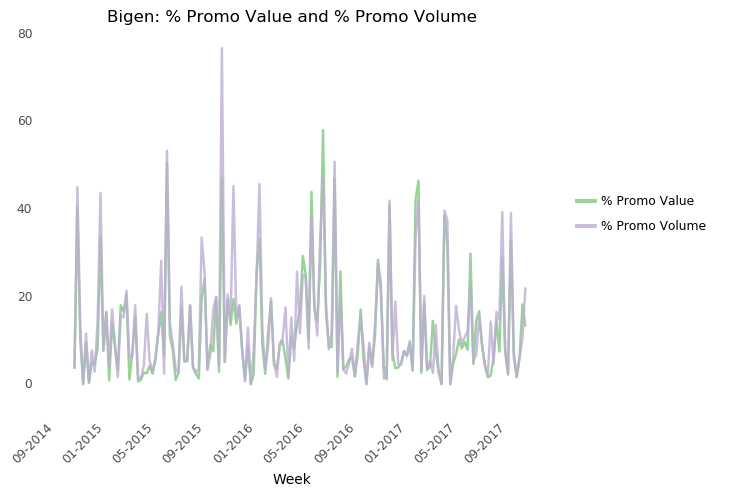

In [292]:
def main(choiceDict,df,topRetailers,topSubBrandsPerType):
    chosenType=choiceDict["chosenType"]  
    topSubBrands=make_top_subrand_list(topSubBrandsPerType,chosenType,"Other Sub Brands")
    resultDict=prepare_and_transform_data(df,choiceDict,topSubBrands)
    elements=['AllRowsExceptOtherSubBrands']
    start_plotting(resultDict,choiceDict,topSubBrands,topRetailers)
    return None




main(choiceDict,dfPrepared,topRetailers,topSubBrandsPerType)

In [293]:
batchPlot=batch_plot_widget()

A Jupyter Widget

In [294]:
button = widgets.Button(description="Batch Plot")
button.on_click(run_all)
display(button)   
okToPlot=batchPlot.value
if okToPlot:
    batch_plot(df,topRetailers,topSubBrandsPerType) 

A Jupyter Widget

In [295]:
HTML('''
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>''')

In [296]:
HTML('''<script>
  $(document).ready(function(){
    $('div#header-container').hide();
    $('div.prompt').hide();
    $('div.output_stderr').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>''')

In [297]:
HTML('''
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  } 
  
  $( document ).ready(function(){
    code_shown=false; 
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>
''')